In [120]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


## Предсказание ухода клиента в телекоммуникационной компании

#### Описание:

Вы работаете с набором данных о клиентах телекоммуникационной компании. Ваша задача — построить модель машинного обучения для предсказания, уйдет ли клиент компании, основываясь на предоставленных характеристиках. Датасет включает в себя информацию о потребительских привычках, финансовых транзакциях, демографических данных и других факторах, которые могут повлиять на решение клиента о продолжении или завершении использования услуг компании.

#### Этапы выполнения:

1. Загрузка и предварительная обработка данных:
+ Загрузите данные из CSV файла.
+ Проанализируйте наличие пропущенных значений и выполните их обработку (например, удаление или заполнение средними/медийными значениями).
+ Проанализируйте категориальные переменные и, при необходимости, выполните кодирование (например, с помощью one-hot encoding или label encoding).

2. Исследование и анализ признаков:
+ Проведите статистический анализ каждого признака (среднее, стандартное отклонение, корреляции и т.д.).
+ Визуализируйте распределение признаков (гистограммы, боксплоты).
+ Проанализируйте важность признаков с помощью методов Feature Selection (например, корреляция, методы отбора на основе важности признаков).

3. Построение модели классификации:
+ Разделите данные на тренировочную и тестовую выборки.
+ Постройте несколько моделей классификации (например, логистическая регрессия, случайный лес, градиентный бустинг, метод опорных векторов, или стекинг).
+ Проведите кросс-валидацию и оцените качество моделей с использованием метрик: accuracy, precision, recall, F1-score и ROC-AUC.
+ Определите наилучшую модель на основе этих метрик.

4. Тонкая настройка модели:
+ Используйте методы гиперпараметрической оптимизации, такие как Grid Search, Randomized Search или Optuna, для улучшения качества модели.
+ Примените методы балансировки классов, если это необходимо (например, с помощью SMOTE или взвешивания классов).

5. Интерпретация результатов:
+ Представьте модель в виде интерпретируемого решения (например, важность признаков).
+ Объясните, какие признаки наиболее важны для предсказания ухода клиента.

6. Отчетность:
+ По каждому из пунктов ожидаю комментарии, почему сделали именно это и что из этого следует. Блокнот должен состоять из пяти блоков соответственно нумерации заданий.

7. Дополнительные задания (на оценку 10 баллов):

+ Используйте методы Feature Engineering для создания новых признаков, которые могут улучшить результаты модели.
+ Проведите сравнение разных методов обработки данных (например, использование разных методов кодирования категориальных переменных).

8. Выполненные задания присылать мне на почту до указанного дедлайна с темой письма "Домашнее задание по модулю 3 Фамилия Имя".

Удачи в выполнении задания!

### Описание признаков
Признаки в датасете telecom_churn могут быть разделены на несколько категорий в зависимости от типа информации, которую они представляют. Вот краткое описание некоторых признаков:

1. Средние значения по различным услугам и операциям

Эти признаки относятся к использованию различных сервисов и потребительским привычкам:

rev_Mean, mou_Mean, totmrc_Mean, da_Mean: Средние значения по доходам, продолжительности разговоров, общим расходам и использованию данных.
ovrmou_Mean, ovrrev_Mean: Среднее превышение по минутам и доходам, что может указывать на клиентов, которые часто выходят за пределы своих тарифов.
vceovr_Mean, datovr_Mean, roam_Mean: Средние значения по голосовым перегрузкам, переплатам за использование данных и роуминговым звонкам.

2. Изменения в использовании

change_mou, change_rev: Изменения в количестве минут и доходах, что может показать тенденции к увеличению или уменьшению использования услуг.
drop_vce_Mean, drop_dat_Mean: Средние значения по потерям голосовых или данных, что может указывать на неудовлетворенность клиентом услугами.

3. Классификация звонков и сообщений

blck_vce_Mean, blck_dat_Mean: Среднее количество заблокированных голосовых вызовов и данных.
unan_vce_Mean, unan_dat_Mean: Среднее количество неоплаченных голосовых вызовов и данных.
recv_vce_Mean, recv_sms_Mean: Среднее количество полученных голосовых сообщений и SMS.

4. Активность и использование услуг

custcare_Mean: Среднее количество обращений в службу поддержки.
ccrndmou_Mean, cc_mou_Mean: Средние значения по звонкам с мобильных номеров.
inonemin_Mean: Среднее количество вызовов, длительность которых составляет более 1 минуты.

5. Демографическая информация

new_cell, crclscod, asl_flag: Признаки, связанные с типом устройства, классификацией региона и флагом нового клиента.
prizm_social_one, area, dualband: Признаки, отражающие социальный статус, географическое положение и наличие двухдиапазонного устройства.
income, numbcars, ethnic: Признаки, касающиеся дохода клиента, количества автомобилей и этнической принадлежности.

6. Психографические и поведенческие характеристики

marital, adults, kid0_2, kid3_5: Семейное положение клиента, количество взрослых и детей в семье.
HHstatin, dwllsize: Признаки, относящиеся к статусу домашнего хозяйства и размеру жилья.

7. Финансовые параметры

totcalls, totmou, totrev: Общие значения по числу звонков, использованию минут и общим доходам.
hnd_price, phones, models: Признаки, связанные с ценой устройства, количеством телефонов и моделей.

8. Целевая переменная

churn: Это целевой признак, который обозначает, ушел ли клиент (1) или остался (0) в компании.

9. Идентификаторы и дополнительные атрибуты

Customer_ID: Уникальный идентификатор клиента.
eqpdays: Количество дней, прошедших с момента последней активности.

# 1. Загрузка и предварительная обработка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import catboost
import missingno as msno
import shap
import optuna
import category_encoders as ce
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.feature_selection import mutual_info_classif,chi2
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Lasso
from sklearn.feature_selection import VarianceThreshold, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier

from catboost import CatBoostClassifier

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import CondensedNearestNeighbour

from scipy import stats
from scipy.stats import randint, uniform


In [2]:
df = pd.read_csv('telcom_customer_churn.csv')
print(df.shape)
df.head()

(100000, 100)


rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  forgntvl  ethnic  \
0          0.0          0.0        0.0     -157.25  ...       0.0       N   
1          9.1          0.0        0.0      532.25  ...       0.0       Z   
2          0.0          0.0        0.0       -4.25  ...       0.0       N   
3          0.0          0.0        0.0       -1.50  ...       0.0       U   
4          0.0          0.0        0.0       38.50  ...       0.0       I   

   kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd  eqpdays  Customer_ID  
0       U       U        U         U         U         Y    361.0      1000001  
1       U       U        U         U         U         Y    240.0      1000002  
2       U       Y        U         U         U         Y   1504.0      1000003  
3       Y       U        U         U         U         Y   1812.0      1000004  
4       U       U        U         U         U         Y    434.0      1000005  

[5 rows x 100 columns]

## 1.1 Анализ пропущенных значений

In [3]:
# смотрим основную информацию о нашем DataFrame которая может показать в каких данных много пропусков и тип данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          99643 non-null   float64
 1   mou_Mean          99643 non-null   float64
 2   totmrc_Mean       99643 non-null   float64
 3   da_Mean           99643 non-null   float64
 4   ovrmou_Mean       99643 non-null   float64
 5   ovrrev_Mean       99643 non-null   float64
 6   vceovr_Mean       99643 non-null   float64
 7   datovr_Mean       99643 non-null   float64
 8   roam_Mean         99643 non-null   float64
 9   change_mou        99109 non-null   float64
 10  change_rev        99109 non-null   float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

In [4]:
# посмотрим на NaN	
df.isnull().sum()

rev_Mean        357
mou_Mean        357
totmrc_Mean     357
da_Mean         357
ovrmou_Mean     357
               ... 
kid11_15       1732
kid16_17       1732
creditcd       1732
eqpdays           1
Customer_ID       0
Length: 100, dtype: int64

<Figure size 1500x900 with 0 Axes>

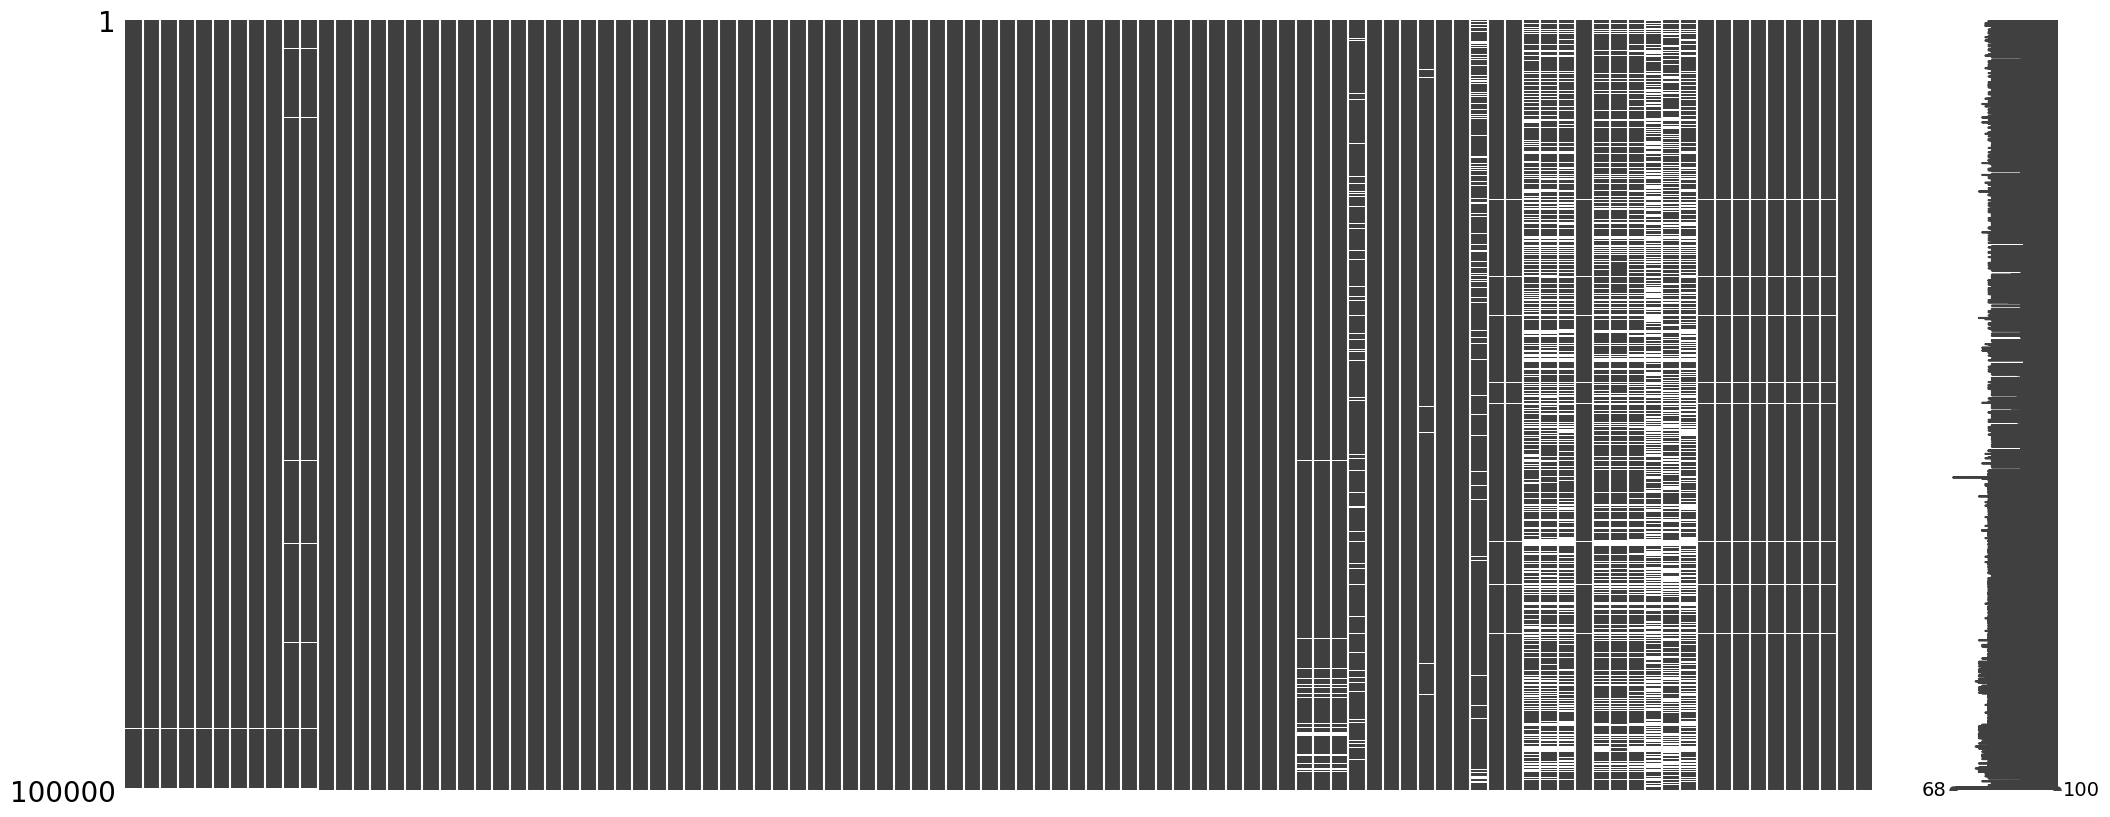

In [5]:
# посмотрим спарклайн для выделения строк в наборе данных с самой высокой и самой низкой плотностью пропущенных значений 
plt.figure(figsize=(15, 9))
msno.matrix(df)
plt.show()

In [6]:
#  создадим функцию для проверки количества пропущенных значений и их доли
def check_missing(df,output_path=None):    
    result = pd.concat([df.isnull().sum(),df.isnull().mean()],axis=1)
    result = result.rename(index=str,columns={0:'total missing',1:'proportion'})
    if output_path is not None:
        result.to_csv(output_path+'missing.csv')
        print(output_path, 'missing.csv')
    return result
    
# применим функцию пропущенных значений
check_missing(df=df)

total missing  proportion
rev_Mean               357     0.00357
mou_Mean               357     0.00357
totmrc_Mean            357     0.00357
da_Mean                357     0.00357
ovrmou_Mean            357     0.00357
...                    ...         ...
kid11_15              1732     0.01732
kid16_17              1732     0.01732
creditcd              1732     0.01732
eqpdays                  1     0.00001
Customer_ID              0     0.00000

[100 rows x 2 columns]

In [7]:
# посмотрим на строки со значениями NaN	
rows_with_nan = df[df.isnull().any(axis=1)]
rows_with_nan

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
1       57.4925    482.75       37.425   0.2475        22.75          9.1   
2       16.9900     10.25       16.990   0.0000         0.00          0.0   
3       38.0000      7.50       38.000   0.0000         0.00          0.0   
5       82.2750   1312.25       75.000   1.2375         0.00          0.0   
6       17.1450      0.00       16.990   0.0000         0.00          0.0   
...         ...       ...          ...      ...          ...          ...   
99995       NaN       NaN          NaN      NaN          NaN          NaN   
99996       NaN       NaN          NaN      NaN          NaN          NaN   
99997       NaN       NaN          NaN      NaN          NaN          NaN   
99998       NaN       NaN          NaN      NaN          NaN          NaN   
99999       NaN       NaN          NaN      NaN          NaN          NaN   

       vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  forgntvl  ethnic  \
1              9.1          0.0        0.0      532.25  ...       0.0       Z   
2              0.0          0.0        0.0       -4.25  ...       0.0       N   
3              0.0          0.0        0.0       -1.50  ...       0.0       U   
5              0.0          0.0        0.0      156.75  ...       0.0       U   
6              0.0          0.0        0.0        0.00  ...       0.0       N   
...            ...          ...        ...         ...  ...       ...     ...   
99995          NaN          NaN        NaN         NaN  ...       0.0       S   
99996          NaN          NaN        NaN         NaN  ...       0.0       N   
99997          NaN          NaN        NaN         NaN  ...       0.0       U   
99998          NaN          NaN        NaN         NaN  ...       0.0       S   
99999          NaN          NaN        NaN         NaN  ...       0.0       H   

       kid0_2  kid3_5  kid6_10  kid11_15  kid16_17  creditcd  eqpdays  \
1           U       U        U         U         U         Y    240.0   
2           U       Y        U         U         U         Y   1504.0   
3           Y       U        U         U         U         Y   1812.0   
5           U       U        U         U         U         Y    458.0   
6           U       U        U         U         U         Y    852.0   
...       ...     ...      ...       ...       ...       ...      ...   
99995       U       U        U         Y         U         Y    773.0   
99996       U       U        Y         Y         Y         Y    835.0   
99997       Y       Y        U         U         U         N    433.0   
99998       U       U        U         U         U         N     75.0   
99999       U       U        U         U         U         N      5.0   

       Customer_ID  
1          1000002  
2          1000003  
3          1000004  
5          1000006  
6          1000007  
...            ...  
99995      1099996  
99996      1099997  
99997      1099998  
99998      1099999  
99999      1100000  

[73295 rows x 100 columns]

In [8]:
# создадим функцию для вывода NaN значений в процентах
def get_numerical_summary(df):
    total = df.shape[0]
    missing_columns = [col for col in df.columns if df[col].isnull().sum() > 0]
    missing_percent = {}
    for col in missing_columns:
        null_count = df[col].isnull().sum()
        per = (null_count/total) * 100
        missing_percent[col] = per
        print("{} : {} ({}%)".format(col, null_count, round(per, 3)))
    return missing_percent

In [9]:
# применим созданную выше функцию для определения пропусков в процентном отношении
missing_percent = get_numerical_summary(df)

rev_Mean : 357 (0.357%)
mou_Mean : 357 (0.357%)
totmrc_Mean : 357 (0.357%)
da_Mean : 357 (0.357%)
ovrmou_Mean : 357 (0.357%)
ovrrev_Mean : 357 (0.357%)
vceovr_Mean : 357 (0.357%)
datovr_Mean : 357 (0.357%)
roam_Mean : 357 (0.357%)
change_mou : 891 (0.891%)
change_rev : 891 (0.891%)
avg6mou : 2839 (2.839%)
avg6qty : 2839 (2.839%)
avg6rev : 2839 (2.839%)
prizm_social_one : 7388 (7.388%)
area : 40 (0.04%)
dualband : 1 (0.001%)
refurb_new : 1 (0.001%)
hnd_price : 847 (0.847%)
phones : 1 (0.001%)
models : 1 (0.001%)
hnd_webcap : 10189 (10.189%)
truck : 1732 (1.732%)
rv : 1732 (1.732%)
ownrent : 33706 (33.706%)
lor : 30190 (30.19%)
dwlltype : 31909 (31.909%)
marital : 1732 (1.732%)
adults : 23019 (23.019%)
infobase : 22079 (22.079%)
income : 25436 (25.436%)
numbcars : 49366 (49.366%)
HHstatin : 37923 (37.923%)
dwllsize : 38308 (38.308%)
forgntvl : 1732 (1.732%)
ethnic : 1732 (1.732%)
kid0_2 : 1732 (1.732%)
kid3_5 : 1732 (1.732%)
kid6_10 : 1732 (1.732%)
kid11_15 : 1732 (1.732%)
kid16_17 : 173

#### Анализ пропусков показывает,что наибольшее количество пропусков:
1. 49.366% в столбце numbcars (количество автомобилей клиента),
2. 38.308% в столбце dwllsize (размер жилья клиента),
3. 37.923% в столбце HHstatin (статус домашнего хозяйства клиента),
4. 33.706% в столбце ownrent (в собственности жилье или арендное),
5. 31.909% в столбце dwlltype (тип жилья клиента),
6. 30.19% в столбце lor (),
7. 25.436% в столбце income (доход клиента)
8. 23.019% в столбце adults (количество взрослых в семье)
9. 22.079% в столбце infobase ()
10. 10.189% в столбце hnd_webcap ()
11. 7.388% в столбце prizm_social_one (социальный статус клиента)
12. 2.839% в столбцах avg6mou (),avg6qty (), avg6rev () 
13. 1.732%  в столбцах truck (), rv (),  marital (семейное положение клиента), forgntvl (), ethnic (этническая принадлежность клиента),  kid0_2 (количество детей в семье) , kid3_5 (количество детей в семье), kid6_10 (количество детей в семье), kid11_15 (количество детей в семье), kid16_17 (количество детей в семье), creditcd ()
14. 0.891% в столбцах change_mou (Изменения в количестве минут) , change_rev (Изменения в количестве доходов)
15. 0.847% в столбце hnd_price (Признаки, связанные с ценой устройства)
16. 0.357% в столбцах rev_Mean (Среднее превышение по  доходам), mou_Mean (Среднее превышение по минутам), totmrc_Mean (Средние значения по общим расходам), da_Mean (Средние значения по использованию данных), ovrmou_Mean (Среднее превышение по минутам), vceovr_Mean (Среднее превышение по доходам), datovr_Mean (Средние значения по переплатам за использование данных), roam_Mean (Средние значения по роуминговым звонкам)
17. 0.04% в столбце area (Признаки, отражающие географическое положение )
18. 0.001% в столбцах dualband (Признаки, отражающие наличие двухдиапазонного устройства), refurb_new (), phones (Признаки, связанные количеством телефонов), models (Признаки, связанные с количеством моделей), eqpdays (Количество дней, прошедших с момента последней активности).

In [10]:
# Посмотрим какие могут быть уникальные значения для некоторых колонок и из количество
for col in df.columns:
    count = len(df[col].unique())
    print(f'{col}: {count}')
    if count < 30:
        print(df[col].unique())

rev_Mean: 37469
mou_Mean: 9731
totmrc_Mean: 8492
da_Mean: 173
ovrmou_Mean: 2639
ovrrev_Mean: 12316
vceovr_Mean: 7517
datovr_Mean: 775
roam_Mean: 5338
change_mou: 7712
change_rev: 32538
drop_vce_Mean: 328
drop_dat_Mean: 60
blck_vce_Mean: 442
blck_dat_Mean: 54
unan_vce_Mean: 986
unan_dat_Mean: 52
plcd_vce_Mean: 2907
plcd_dat_Mean: 389
recv_vce_Mean: 1829
recv_sms_Mean: 94
comp_vce_Mean: 2316
comp_dat_Mean: 366
custcare_Mean: 209
ccrndmou_Mean: 458
cc_mou_Mean: 9231
inonemin_Mean: 1312
threeway_Mean: 91
mou_cvce_Mean: 68951
mou_cdat_Mean: 4420
mou_rvce_Mean: 51988
owylis_vce_Mean: 882
mouowylisv_Mean: 26847
iwylis_vce_Mean: 536
mouiwylisv_Mean: 21287
peak_vce_Mean: 2125
peak_dat_Mean: 236
mou_peav_Mean: 64094
mou_pead_Mean: 3168
opk_vce_Mean: 1928
opk_dat_Mean: 257
mou_opkv_Mean: 59693
mou_opkd_Mean: 3539
drop_blk_Mean: 514
attempt_Mean: 2918
complete_Mean: 2346
callfwdv_Mean: 45
callwait_Mean: 263
churn: 2
[1 0]
months: 56
uniqsubs: 15
[  2   1   3   5   4   6   7   9   8  12  11  10  13

In [11]:
#  создадим функцию для построения графиков распределения значений для разных столбцов датасета 
# и проверки значений на нормальность
def plot_distribution(df, columns):
    
    for column in columns:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[column], bins=30, kde=True)
        plt.title(f'Распределение значений в столбце {column}')
        plt.xlabel(column)
        plt.ylabel('Частота')
        plt.show()
        
        # Проверка на нормальность
        # Для больших N используем D'Agostino's K-squared test
        if df[column].dropna().shape[0] > 5000:
            stat, p_value = stats.normaltest(df[column].dropna())
            print(f'D\'Agostino\'s K-squared тест для {column}: статистика={stat:.3f}, p-значение={p_value:.3f}')
        else:
            stat, p_value = stats.shapiro(df[column].dropna())
            print(f'Тест Шапиро-Уилка для {column}: статистика={stat:.3f}, p-значение={p_value:.3f}')
        
        if p_value > 0.05:
            print(f'Распределение в {column} может быть нормальным.\n')
        else:
            print(f'Распределение в {column} не нормально.\n')

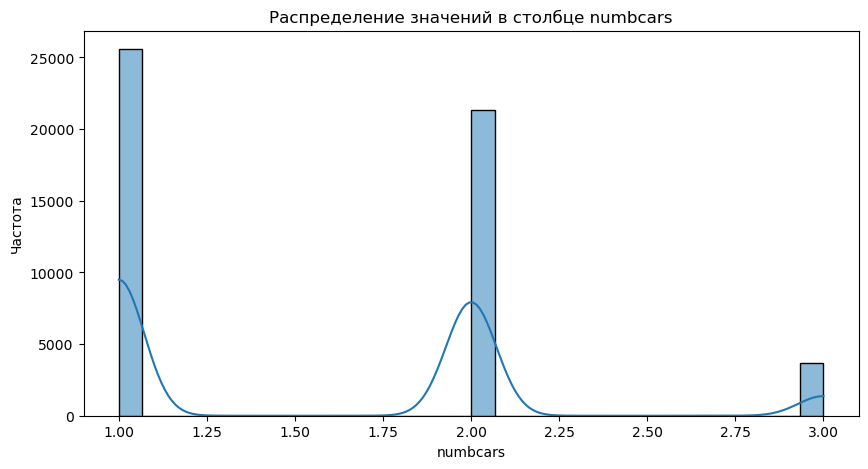

D'Agostino's K-squared тест для numbcars: статистика=4205.339, p-значение=0.000
Распределение в numbcars не нормально.



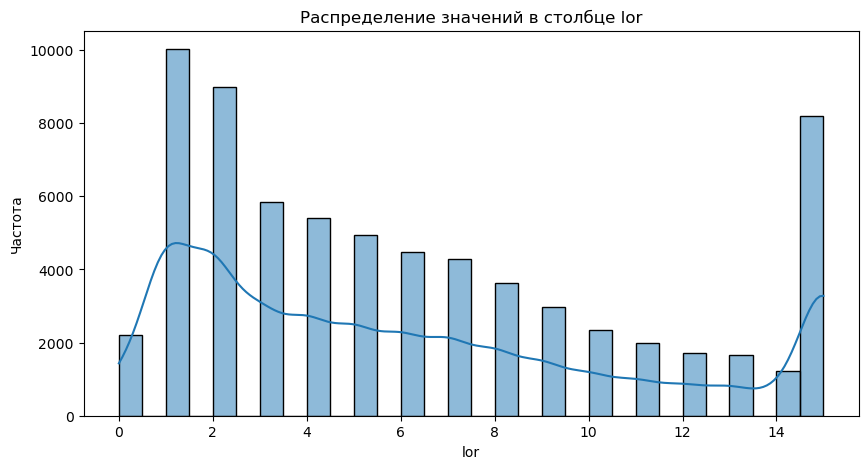

D'Agostino's K-squared тест для lor: статистика=11636.818, p-значение=0.000
Распределение в lor не нормально.



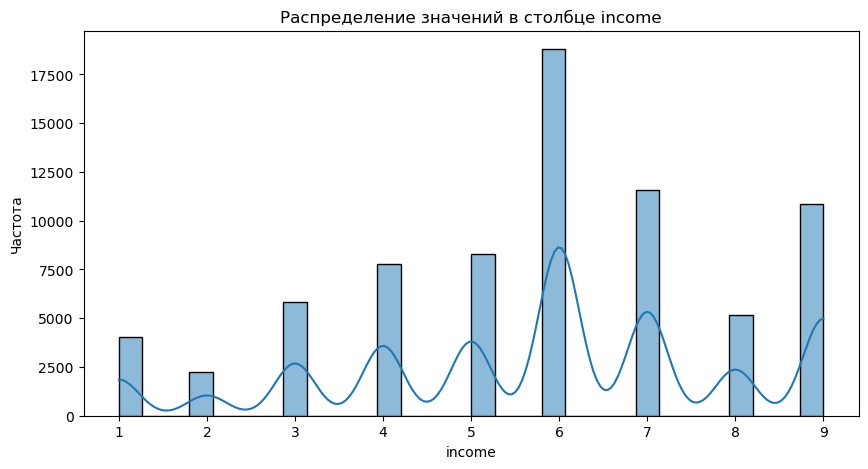

D'Agostino's K-squared тест для income: статистика=2795.547, p-значение=0.000
Распределение в income не нормально.



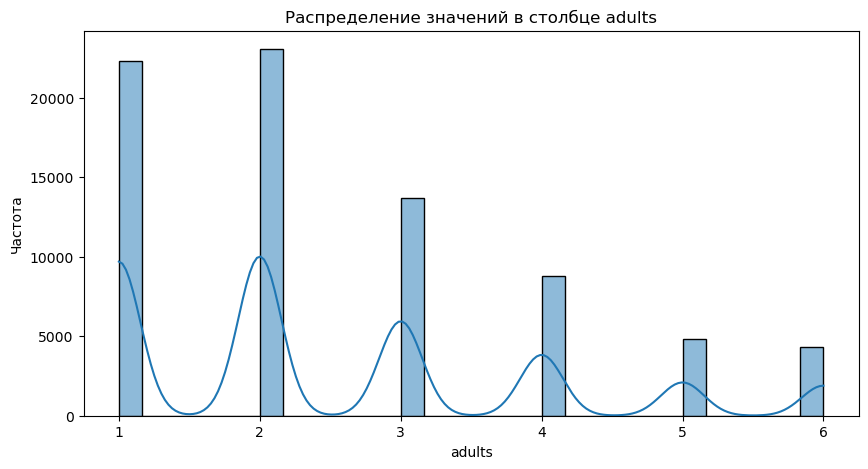

D'Agostino's K-squared тест для adults: статистика=7156.332, p-значение=0.000
Распределение в adults не нормально.



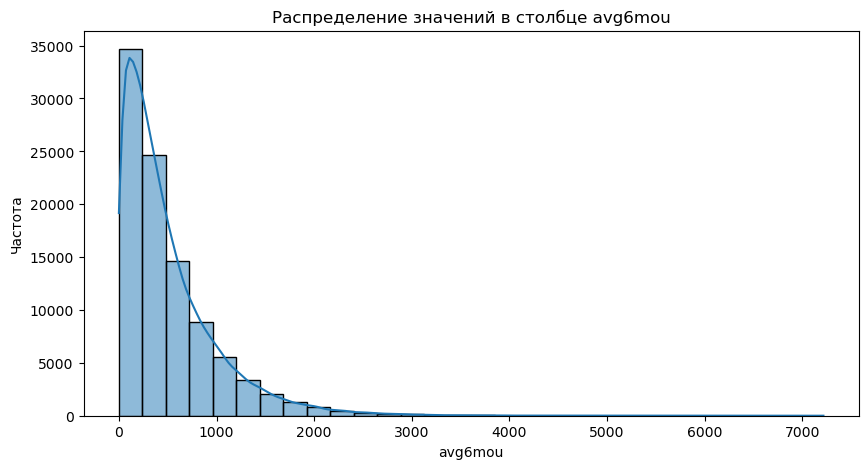

D'Agostino's K-squared тест для avg6mou: статистика=43794.339, p-значение=0.000
Распределение в avg6mou не нормально.



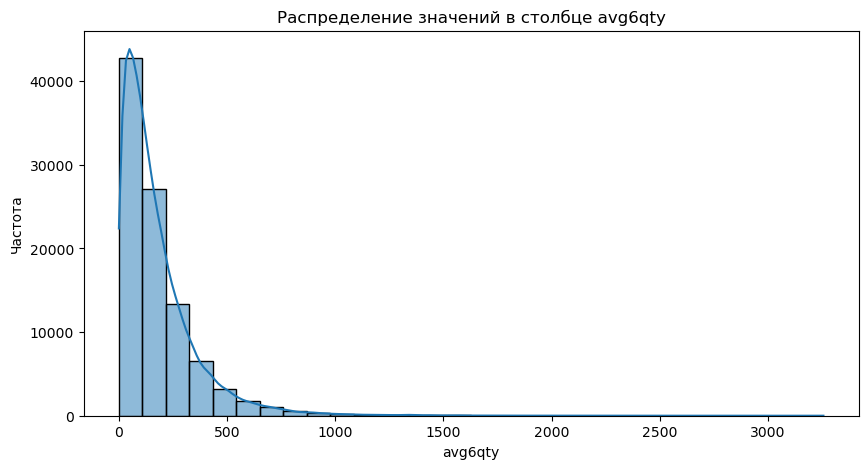

D'Agostino's K-squared тест для avg6qty: статистика=65109.033, p-значение=0.000
Распределение в avg6qty не нормально.



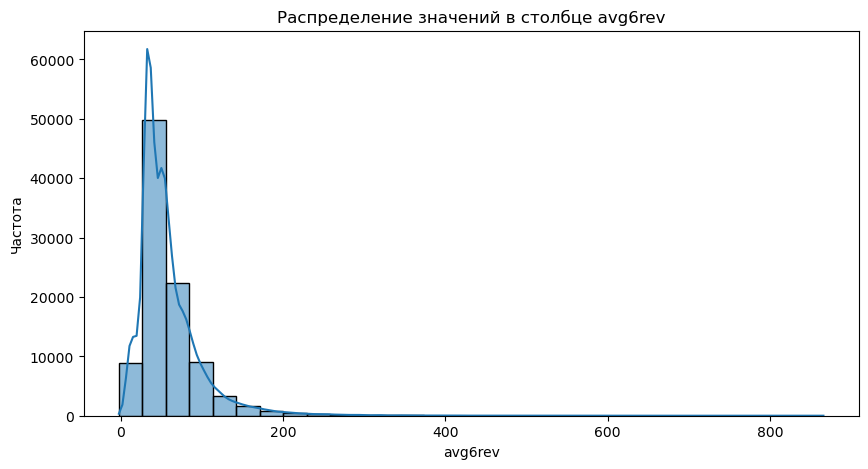

D'Agostino's K-squared тест для avg6rev: статистика=76854.934, p-значение=0.000
Распределение в avg6rev не нормально.



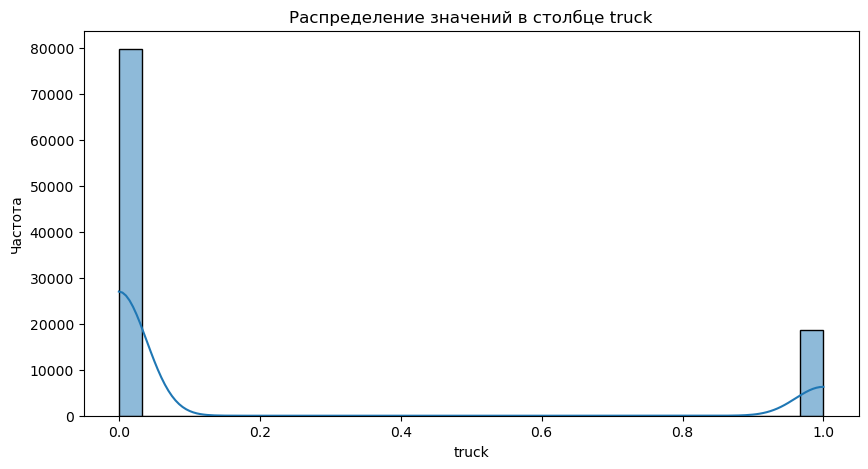

D'Agostino's K-squared тест для truck: статистика=22748.717, p-значение=0.000
Распределение в truck не нормально.



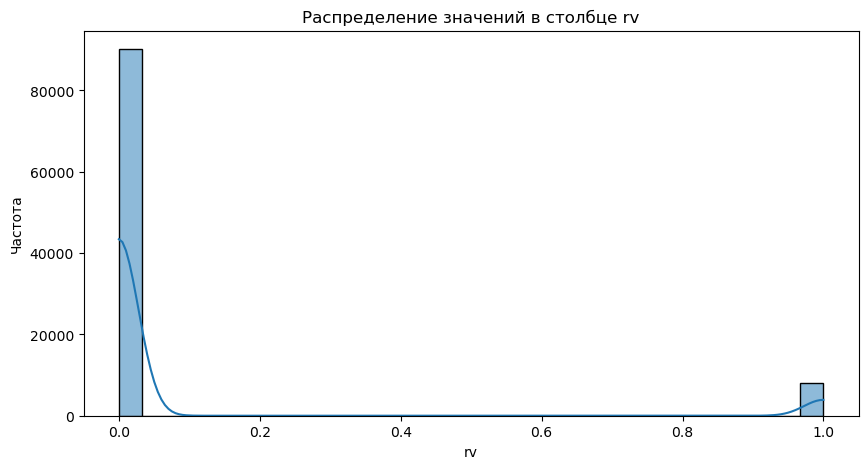

D'Agostino's K-squared тест для rv: статистика=58657.439, p-значение=0.000
Распределение в rv не нормально.



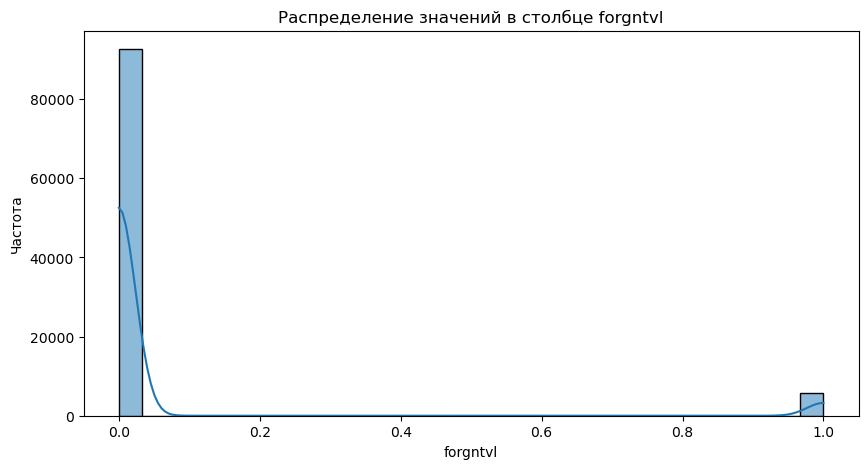

D'Agostino's K-squared тест для forgntvl: статистика=73769.461, p-значение=0.000
Распределение в forgntvl не нормально.



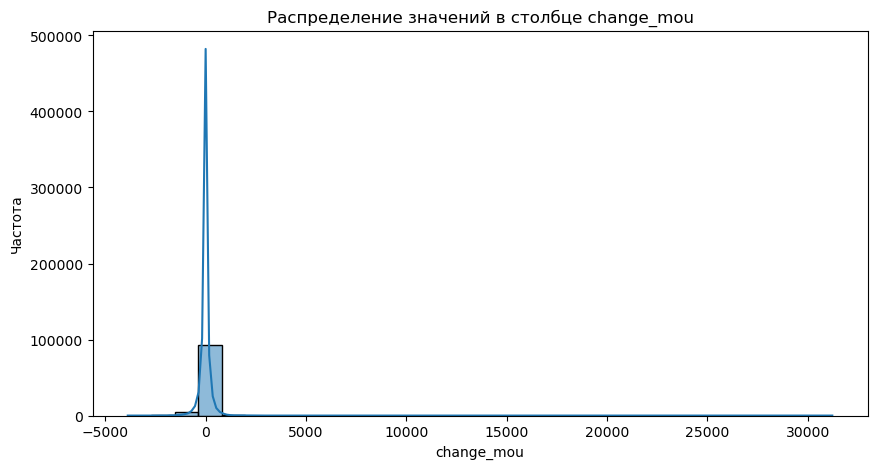

D'Agostino's K-squared тест для change_mou: статистика=194281.586, p-значение=0.000
Распределение в change_mou не нормально.



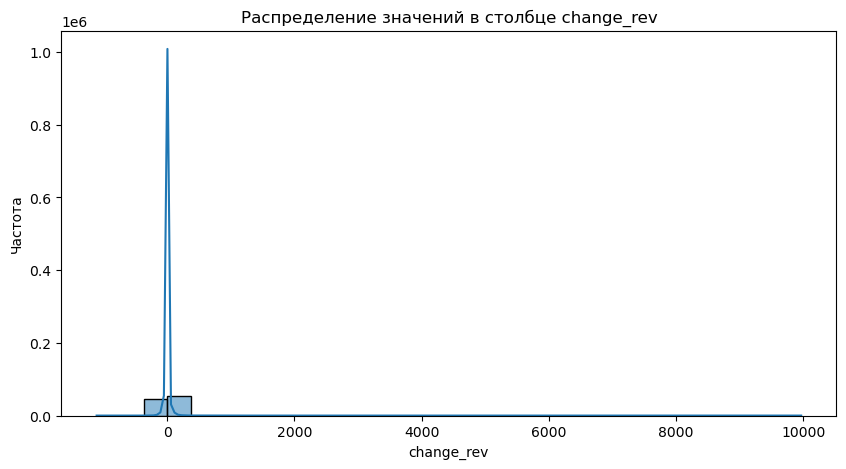

D'Agostino's K-squared тест для change_rev: статистика=368060.613, p-значение=0.000
Распределение в change_rev не нормально.



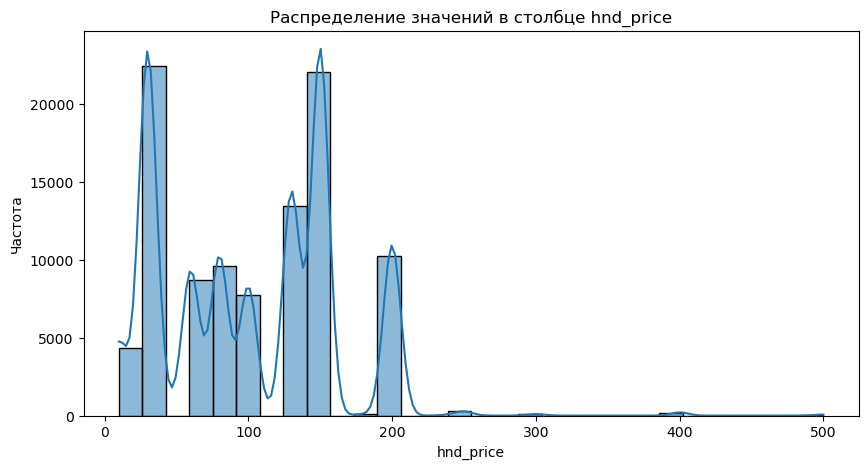

D'Agostino's K-squared тест для hnd_price: статистика=5112.076, p-значение=0.000
Распределение в hnd_price не нормально.



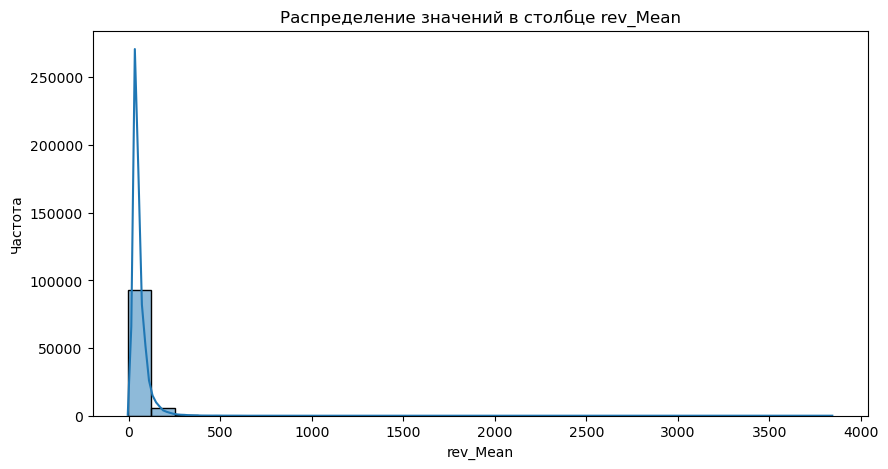

D'Agostino's K-squared тест для rev_Mean: статистика=156380.090, p-значение=0.000
Распределение в rev_Mean не нормально.



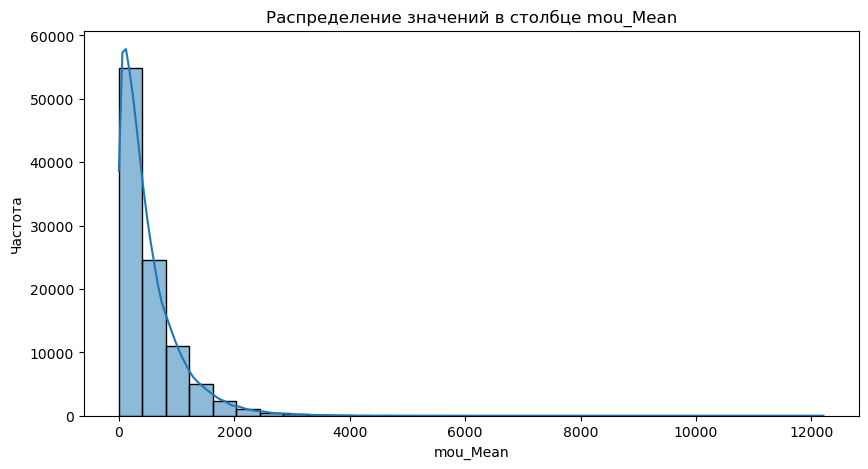

D'Agostino's K-squared тест для mou_Mean: статистика=52531.467, p-значение=0.000
Распределение в mou_Mean не нормально.



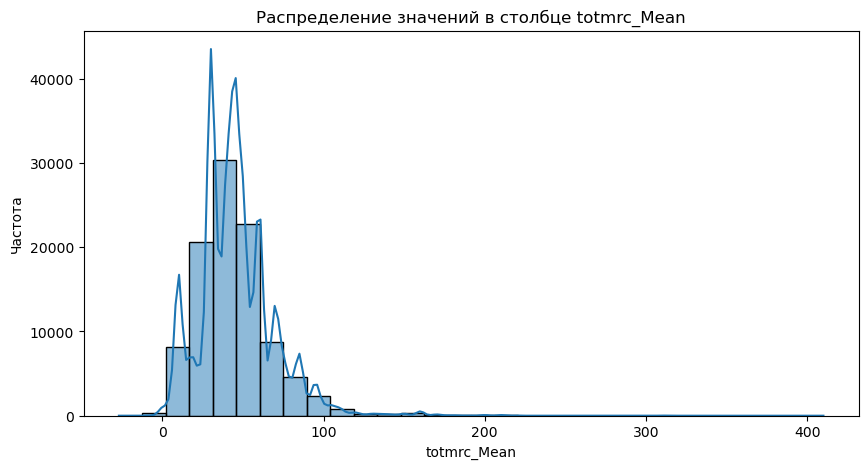

D'Agostino's K-squared тест для totmrc_Mean: статистика=39593.472, p-значение=0.000
Распределение в totmrc_Mean не нормально.



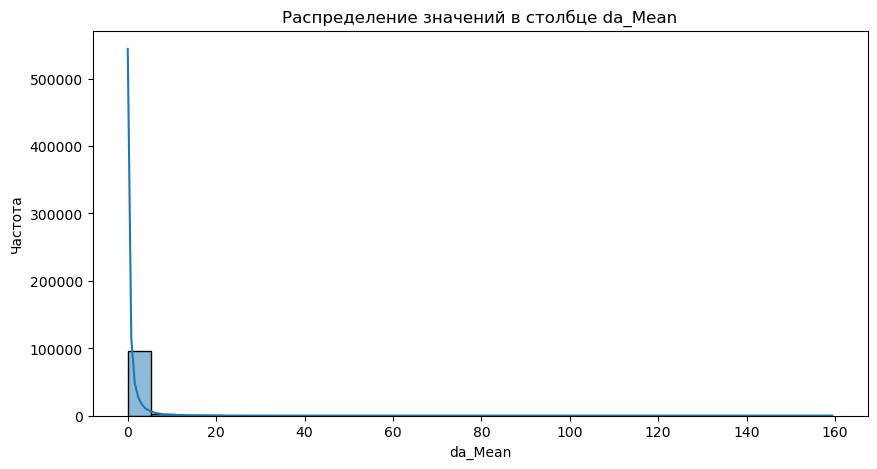

D'Agostino's K-squared тест для da_Mean: статистика=166933.119, p-значение=0.000
Распределение в da_Mean не нормально.



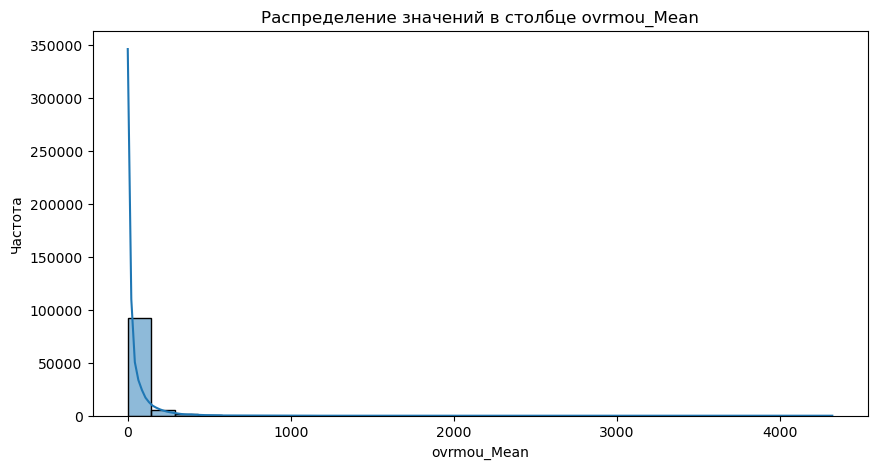

D'Agostino's K-squared тест для ovrmou_Mean: статистика=133878.550, p-значение=0.000
Распределение в ovrmou_Mean не нормально.



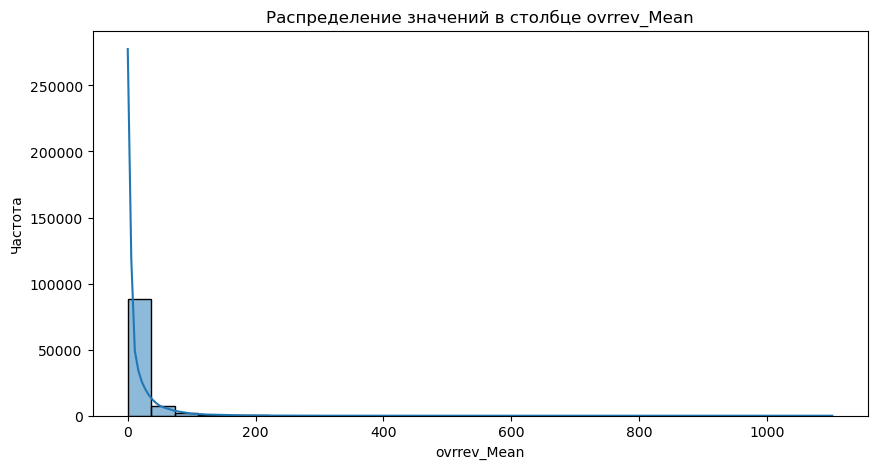

D'Agostino's K-squared тест для ovrrev_Mean: статистика=119500.508, p-значение=0.000
Распределение в ovrrev_Mean не нормально.



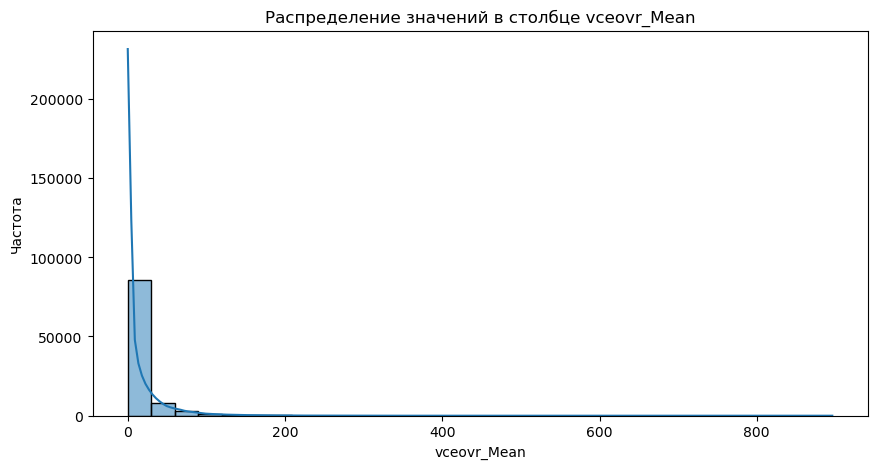

D'Agostino's K-squared тест для vceovr_Mean: статистика=116417.990, p-значение=0.000
Распределение в vceovr_Mean не нормально.



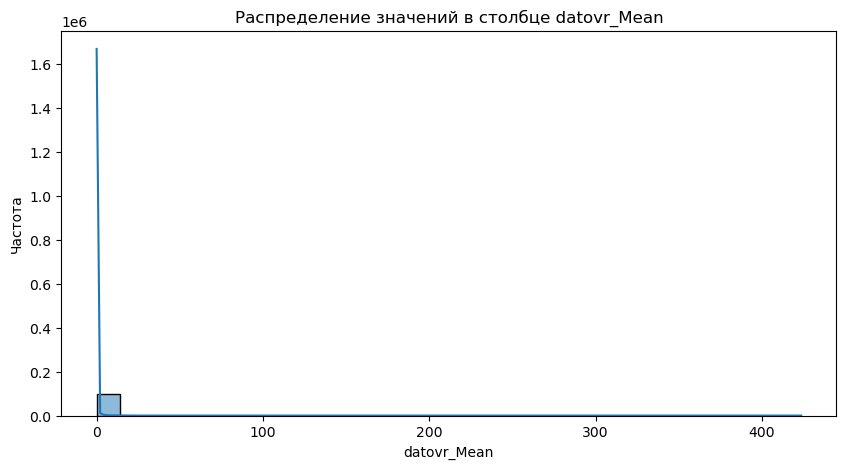

D'Agostino's K-squared тест для datovr_Mean: статистика=330563.596, p-значение=0.000
Распределение в datovr_Mean не нормально.



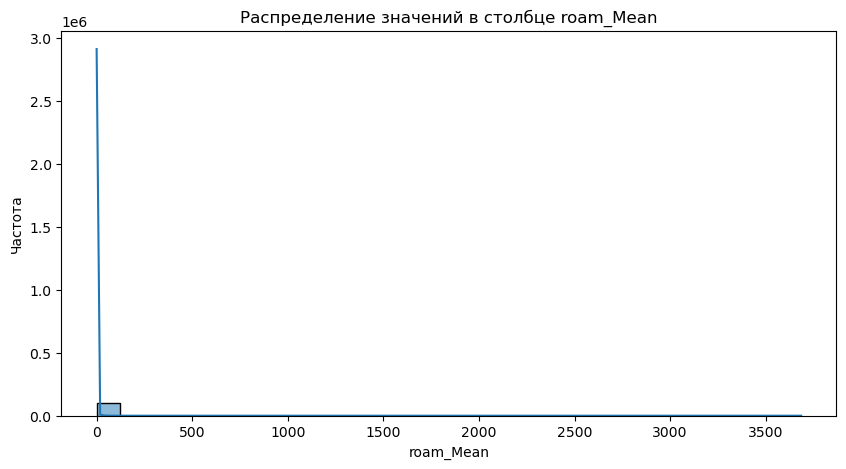

D'Agostino's K-squared тест для roam_Mean: статистика=464260.797, p-значение=0.000
Распределение в roam_Mean не нормально.



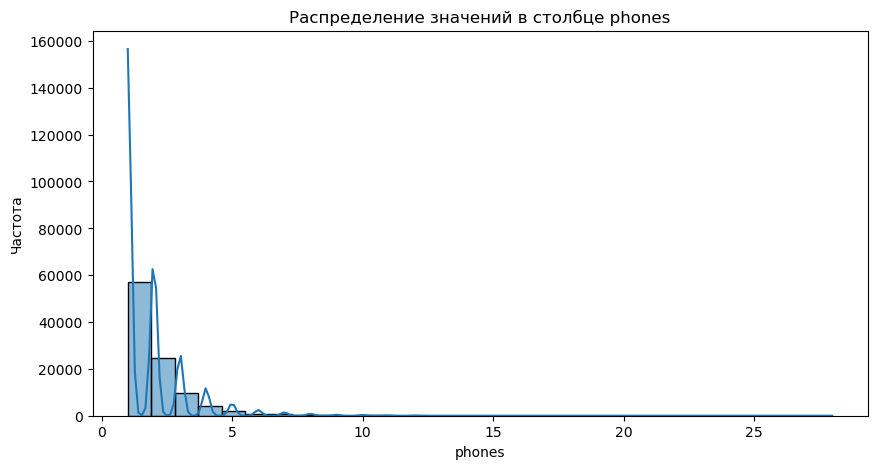

D'Agostino's K-squared тест для phones: статистика=73415.835, p-значение=0.000
Распределение в phones не нормально.



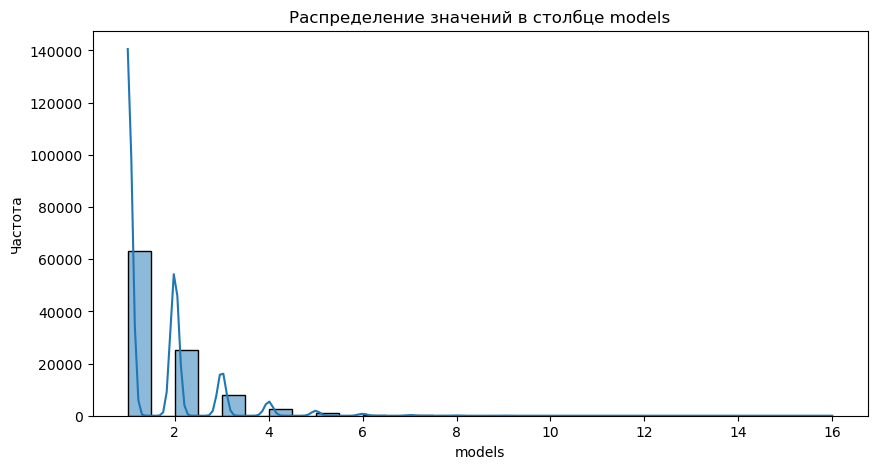

D'Agostino's K-squared тест для models: статистика=53568.216, p-значение=0.000
Распределение в models не нормально.



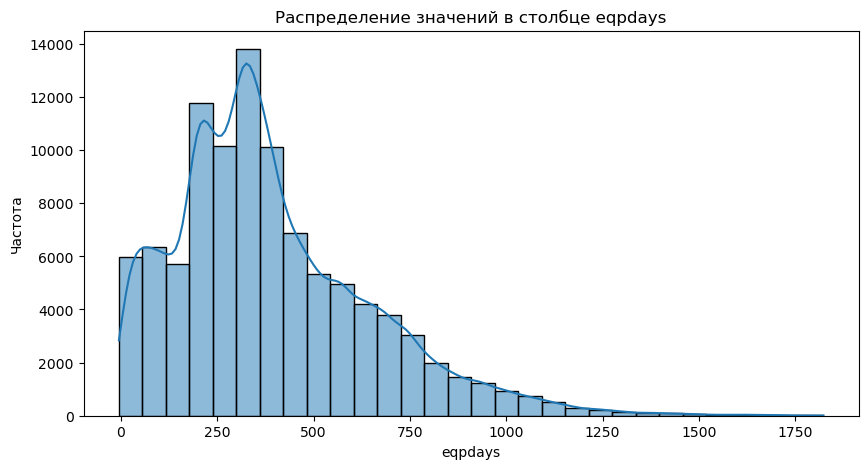

D'Agostino's K-squared тест для eqpdays: статистика=15720.343, p-значение=0.000
Распределение в eqpdays не нормально.



In [12]:
# выведем зависимости в столбцах с числовыми данными
plot_distribution(df, ['numbcars','lor','income','adults', 
                       'avg6mou','avg6qty','avg6rev','truck','rv',
                       'forgntvl','change_mou','change_rev','hnd_price',
                      'rev_Mean','mou_Mean','totmrc_Mean','da_Mean','ovrmou_Mean', 'ovrrev_Mean',
                      'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'phones','models','eqpdays'])

### Графики выше показывают, что среди столбцов с пропущенными числовыми значениями нет столбцов с нормальным (гауссовским) распределением, что позволяет сделать предположение о предпочтении применения медианы (если данные содержат выбросы) или моды (данные имеют выраженные повторения)

In [13]:
# создадим функцию для определения зависимостей между столбцами
def calculate_correlation(df, columns):
    # проверяем что колонки существуют и данные в них являются числовыми
    valid_columns = [column for column in columns if column in df.columns and pd.api.types.is_numeric_dtype(df[column])]
    
    if not valid_columns:
        raise ValueError("No valid numeric columns found for correlation calculation.")

    selected_data = df[valid_columns]
    
    # расчет матрицы корреляции
    correlation_matrix = selected_data.corr()
    
    return correlation_matrix

In [14]:
# посмотрим значения корреляции между столбцами с числовыми значениями
calculate_correlation(df, ['churn','numbcars','lor','income','adults', 
                       'avg6mou','avg6qty','avg6rev','truck','rv',
                       'forgntvl','change_mou','change_rev','hnd_price',
                      'rev_Mean','mou_Mean','totmrc_Mean','da_Mean','ovrmou_Mean', 'ovrrev_Mean',
                      'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'phones','models','eqpdays'])


churn  numbcars       lor    income    adults   avg6mou  \
churn        1.000000  0.002392 -0.044713  0.005260 -0.007968 -0.044060   
numbcars     0.002392  1.000000  0.113999  0.069197  0.237031  0.013728   
lor         -0.044713  0.113999  1.000000  0.068491  0.366560 -0.064691   
income       0.005260  0.069197  0.068491  1.000000  0.089325 -0.096629   
adults      -0.007968  0.237031  0.366560  0.089325  1.000000 -0.021573   
avg6mou     -0.044060  0.013728 -0.064691 -0.096629 -0.021573  1.000000   
avg6qty     -0.038826  0.029181 -0.044760 -0.097526  0.005984  0.877815   
avg6rev     -0.018751  0.001290 -0.061597 -0.041995 -0.036887  0.732158   
truck       -0.004097  0.027228  0.089032  0.037975  0.260806 -0.058710   
rv           0.000489  0.014937  0.041988  0.086854  0.162654 -0.032048   
forgntvl    -0.004986  0.025110  0.072458  0.088237  0.112912 -0.055745   
change_mou  -0.031536  0.000997 -0.001645 -0.008239 -0.002512 -0.164169   
change_rev   0.007832  0.000202 -0.004281 -0.008522 -0.001974 -0.075699   
hnd_price   -0.103184  0.015421 -0.038702 -0.020497 -0.010353  0.240048   
rev_Mean    -0.010883  0.001509 -0.056251 -0.040699 -0.033564  0.630410   
mou_Mean    -0.057027  0.013006 -0.063562 -0.093709 -0.023166  0.945447   
totmrc_Mean -0.068558  0.004181 -0.053149 -0.026211 -0.034945  0.579936   
da_Mean     -0.013551 -0.000643 -0.042996  0.032336 -0.037116  0.377133   
ovrmou_Mean  0.019720 -0.000350 -0.037157 -0.030198 -0.020575  0.494148   
ovrrev_Mean  0.023736 -0.000347 -0.038044 -0.038617 -0.021399  0.453627   
vceovr_Mean  0.024240  0.000074 -0.038283 -0.037516 -0.021327  0.453334   
datovr_Mean -0.001290 -0.004351 -0.001738 -0.015531 -0.003055  0.065668   
roam_Mean    0.009324 -0.005464 -0.008189 -0.008839 -0.001428  0.066482   
phones      -0.039457  0.006111 -0.008882 -0.047666 -0.001800  0.308325   
models      -0.045065  0.013237 -0.009956 -0.043265  0.002282  0.300495   
eqpdays      0.112691 -0.019281  0.041334  0.105680  0.011267 -0.321272   

              avg6qty   avg6rev     truck        rv  ...  totmrc_Mean  \
churn       -0.038826 -0.018751 -0.004097  0.000489  ...    -0.068558   
numbcars     0.029181  0.001290  0.027228  0.014937  ...     0.004181   
lor         -0.044760 -0.061597  0.089032  0.041988  ...    -0.053149   
income      -0.097526 -0.041995  0.037975  0.086854  ...    -0.026211   
adults       0.005984 -0.036887  0.260806  0.162654  ...    -0.034945   
avg6mou      0.877815  0.732158 -0.058710 -0.032048  ...     0.579936   
avg6qty      1.000000  0.668563 -0.035808 -0.019083  ...     0.521678   
avg6rev      0.668563  1.000000 -0.043558 -0.015709  ...     0.667410   
truck       -0.035808 -0.043558  1.000000  0.621854  ...    -0.035703   
rv          -0.019083 -0.015709  0.621854  1.000000  ...    -0.016609   
forgntvl    -0.055713 -0.044588  0.040533  0.046756  ...    -0.034726   
change_mou  -0.144251 -0.154195  0.006847  0.006981  ...    -0.020845   
change_rev  -0.065975 -0.155842  0.003769  0.002400  ...    -0.022506   
hnd_price    0.223956  0.188396 -0.052827 -0.013078  ...     0.223978   
rev_Mean     0.578217  0.857309 -0.035863 -0.010322  ...     0.602148   
mou_Mean     0.827084  0.693763 -0.054795 -0.027519  ...     0.575567   
totmrc_Mean  0.521678  0.667410 -0.035703 -0.016609  ...     1.000000   
da_Mean      0.385849  0.413717 -0.032306 -0.007566  ...     0.306966   
ovrmou_Mean  0.459078  0.650337 -0.024408 -0.003892  ...     0.200732   
ovrrev_Mean  0.411604  0.631646 -0.029851 -0.007631  ...     0.164401   
vceovr_Mean  0.411740  0.629593 -0.029295 -0.007452  ...     0.163038   
datovr_Mean  0.055132  0.107007 -0.009344 -0.002641  ...     0.035428   
roam_Mean    0.051479  0.161837  0.003401  0.003532  ...     0.046865   
phones       0.371279  0.264844  0.000659  0.003030  ...     0.223322   
models       0.361271  0.259510  0.001789  0.007732  ...     0.219285   
eqpdays     -0.308946 -0.233039  0.043237  0.030765  ...    -0.247781   

              da_M

In [15]:
# создадим функцию для построения графика heat map для столбцов с числовыми значениями
def calculate_correlation(df, columns):
    # рассчитываем матрицу корреляции
    correlation_matrix = df[columns].corr()
    
    # устанавливаем matplotlib форму большого размера графика
    plt.figure(figsize=(14, 10))
    
    # создаем график heatmap для визуализации матрицы корреляции
    sns.heatmap(correlation_matrix, 
                annot=True, 
                fmt='.2f', 
                cmap='coolwarm',  
                square=True, 
                linewidths=0.5,  # добавляем линию между ячейками
                linecolor='black',  # цвет линии
                cbar_kws={"shrink": .8, "ticks": [-1, -0.5, 0, 0.5, 1], "label": "Correlation Coefficient"})  

    # утснавливаем названия и метки
    plt.title('График корреляции численных признаков Heatmap', fontsize=18)
    plt.xticks(rotation=45, ha='right', fontsize=12)  # поворачиваем
    plt.yticks(rotation=0, fontsize=12)  # сохраняем местки в горизонтальном положении
    
    # выводим график
    plt.tight_layout()  # калибруем макет во избежание обрезания меток 
    plt.show()

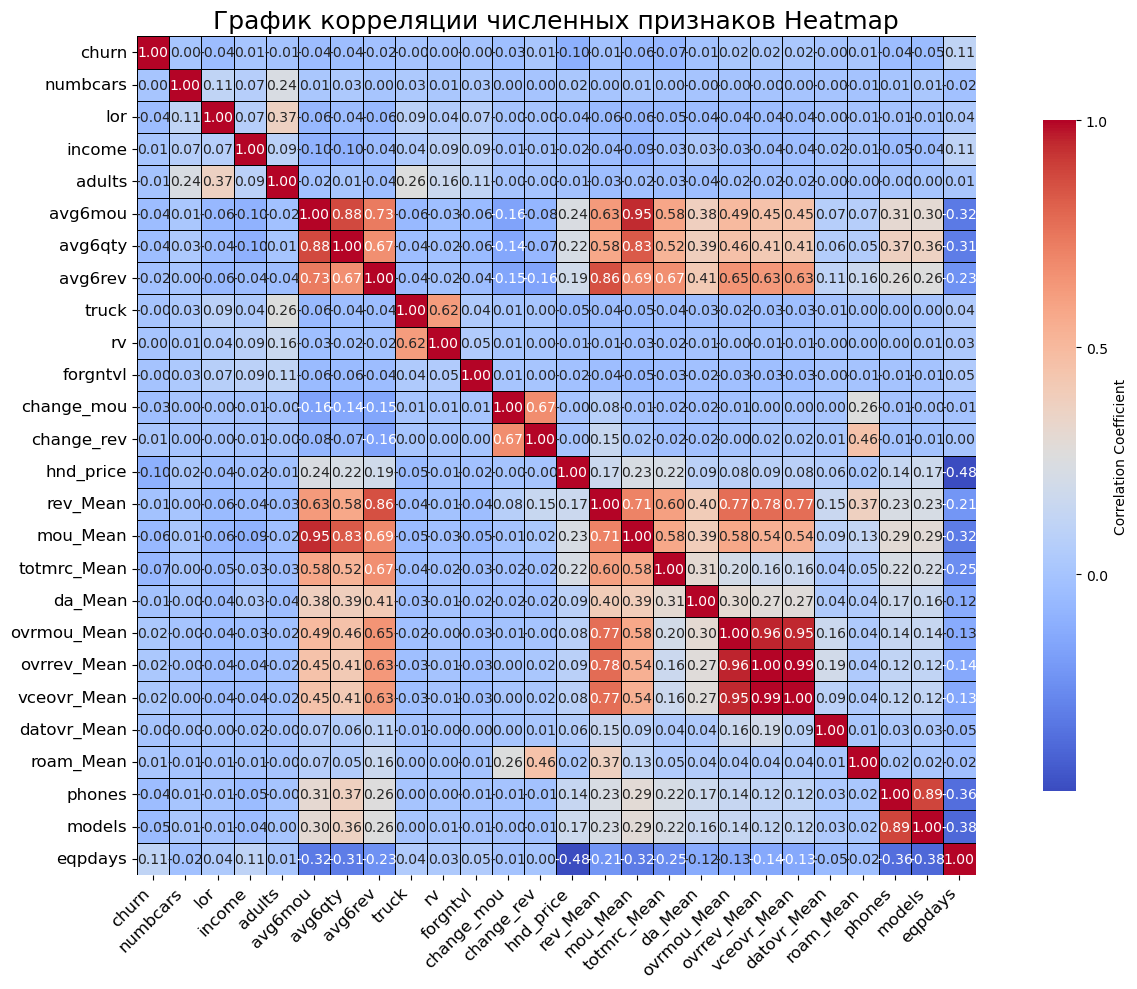

In [16]:
# выводим результат для столбцов с числовыми значениями
calculate_correlation(df, ['churn','numbcars','lor','income','adults', 
                            'avg6mou','avg6qty','avg6rev','truck','rv',
                            'forgntvl','change_mou','change_rev','hnd_price',
                            'rev_Mean','mou_Mean','totmrc_Mean','da_Mean','ovrmou_Mean', 'ovrrev_Mean',
                            'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'phones','models','eqpdays'])

### Как видно из графика выше показатели корреляции со стороны столбцов с числовыми показателями по шкале Чеддока не существенны для нашего целевого показателя churn. 

## 1.2 Обработка пропущенных числовых значений

### Mode

In [17]:
# заполняем nan пропуски в столбцах avg6mou,avg6qty,avg6rev модой
columns_to_fill = ['avg6mou', 'avg6qty', 'avg6rev','adults', 'income','truck', 'rv', 'forgntvl']

for column in columns_to_fill:
    mode_value = df[column].mode()[0]  # вычисляем моду
    df[column] = df[column].fillna(mode_value)  # заполняем NaN значениями моды

### Median

In [18]:
# заполним пропуски для столбцов 'hnd_price', 'phones','models' медианными значениями
for column in ['hnd_price', 'phones','models','rev_Mean','mou_Mean',
               'totmrc_Mean', 'da_Mean', 'ovrmou_Mean', 'ovrrev_Mean',
              'vceovr_Mean', 'datovr_Mean', 'roam_Mean','change_mou','change_rev',
              'numbcars']:
    median_value = df[column].median()  # вичисляем медиану
    df[column] = df[column].fillna(median_value)  # заполняем nan медианными значениями


### Mean

In [19]:
# заполним пропуски для столбцов 'lor' , 'eqpdays' средними значениями
for column in ['lor', 'eqpdays']:
    mean_value = df[column].mean()  # вычисляем среднее
    df[column] = df[column].fillna(mean_value)  # заполняем nan средними значениями

In [20]:
# посмотрим что получилось
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   rev_Mean          100000 non-null  float64
 1   mou_Mean          100000 non-null  float64
 2   totmrc_Mean       100000 non-null  float64
 3   da_Mean           100000 non-null  float64
 4   ovrmou_Mean       100000 non-null  float64
 5   ovrrev_Mean       100000 non-null  float64
 6   vceovr_Mean       100000 non-null  float64
 7   datovr_Mean       100000 non-null  float64
 8   roam_Mean         100000 non-null  float64
 9   change_mou        100000 non-null  float64
 10  change_rev        100000 non-null  float64
 11  drop_vce_Mean     100000 non-null  float64
 12  drop_dat_Mean     100000 non-null  float64
 13  blck_vce_Mean     100000 non-null  float64
 14  blck_dat_Mean     100000 non-null  float64
 15  unan_vce_Mean     100000 non-null  float64
 16  unan_dat_Mean     10

## 1.3 Обработка категориальных переменных

In [21]:
# посмотрим на пропущенные значения в столбцах с категориальными признаками
categorical_columns = [
    'new_cell', 'crclscod', 'asl_flag', 'prizm_social_one',
    'area', 'dualband', 'refurb_new', 'hnd_webcap', 
    'ownrent', 'dwlltype', 'marital', 'infobase', 
    'HHstatin', 'ethnic', 'kid0_2', 'kid3_5', 
    'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'
]
# создадим датасет с NaN значениями
nan_counts = df[categorical_columns].isna().sum()

# выведем колонки с категориальными признаками и количество NaN значений в них
nan_counts = nan_counts[nan_counts > 0]  # отфильтруем наши колонки по отсутсвию NaN значений
print(nan_counts)

prizm_social_one     7388
area                   40
dualband                1
refurb_new              1
hnd_webcap          10189
ownrent             33706
dwlltype            31909
marital              1732
infobase            22079
HHstatin            37923
ethnic               1732
kid0_2               1732
kid3_5               1732
kid6_10              1732
kid11_15             1732
kid16_17             1732
creditcd             1732
dtype: int64


In [22]:
# создадим функцию для определения процента пропущенных значений в колонках с категориальными фичами
def print_missing_percentage(df, columns):
    missing_percentage = df[columns].isna().mean() * 100  # определим процент NaN значений
    missing_percentage = missing_percentage[missing_percentage > 0]  # отфильтруем наши колонки по пропущенным нулевым значениям
    
    print("Процент пропущенных признаков:")
    print(missing_percentage)

# список столбцов для проверки
categorical_columns = ['prizm_social_one', 'area', 'dualband', 'refurb_new',
                       'hnd_webcap', 'ownrent', 'dwlltype', 'marital', 
                       'infobase', 'HHstatin', 'dwllsize', 'ethnic', 
                       'kid0_2', 'kid3_5', 'kid6_10', 'kid11_15', 
                       'kid16_17', 'creditcd']

# применим функцию
print_missing_percentage(df, categorical_columns)

Процент пропущенных признаков:
prizm_social_one     7.388
area                 0.040
dualband             0.001
refurb_new           0.001
hnd_webcap          10.189
ownrent             33.706
dwlltype            31.909
marital              1.732
infobase            22.079
HHstatin            37.923
dwllsize            38.308
ethnic               1.732
kid0_2               1.732
kid3_5               1.732
kid6_10              1.732
kid11_15             1.732
kid16_17             1.732
creditcd             1.732
dtype: float64


Заменим пропущенные значения в столбцах с категориальными признаками модой

In [23]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    if not df[col].mode().empty:  # проверяем не пуста ли мода
        df[col] = df[col].fillna(df[col].mode()[0])  # заполняем значения NaN модой
    else:
      #  заполняем если мода пуста
        df[col] = df[col].fillna('N/A')  

Посмотрим на уникальные значения категориальных фичей

In [24]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    count = len(df[col].unique())
    print(f'{col}: {count} unique values - {df[col].unique()}')

new_cell: 3 unique values - ['U' 'N' 'Y']
crclscod: 54 unique values - ['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']
asl_flag: 2 unique values - ['N' 'Y']
prizm_social_one: 5 unique values - ['S' 'U' 'T' 'C' 'R']
area: 19 unique values - ['NORTHWEST/ROCKY MOUNTAIN AREA' 'CHICAGO AREA' 'GREAT LAKES AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' 'LOS ANGELES AREA']
dualband: 4 unique values - ['Y' 'N' 'T' 'U']
refurb_new: 2 unique values - ['N' 'R']
hnd_webcap: 3 unique values - ['WCMB' 'WC' 'UNKW']
ownrent: 2 unique values - ['O

### OneHotEncoder

In [25]:
# Initialize OneHotEncoder with sparse_output instead of sparse
ohe = OneHotEncoder(sparse_output=False, drop='first')

# List of categorical columns that need to be one-hot encoded
multi_cardinality_cols = ['prizm_social_one', 'dualband','marital']

# Fit and transform using OneHotEncoder
encoded_cols = ohe.fit_transform(df[multi_cardinality_cols])

# Create a DataFrame with One-Hot Encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=ohe.get_feature_names_out(multi_cardinality_cols))

# Drop the original categorical columns from the DataFrame and concatenate the new DataFrame
df = df.drop(multi_cardinality_cols, axis=1).reset_index(drop=True)
df = pd.concat([df, encoded_df], axis=1)

# Display the first few rows to see the changes
print(df.head())

   rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  prizm_social_one_S  \
0          0.0          0.0        0.0     -157.25  ...                 1.0   
1          9.1          0.0        0.0      532.25  ...                 0.0   
2          0.0          0.0        0.0       -4.25  ...                 1.0   
3          0.0          0.0        0.0       -1.50  ...                 0.0   
4          0.0          0.0        0.0       38.50  ...                 0.0   

   prizm_social_one_T  prizm_social_one_U  dualband_T  dualband_U  dualband_Y  \
0    

### LabelEncoder

Посмотрим на признаки имеющие только 2 уникальных значения

In [26]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    count = len(df[col].unique())
    if count == 2:
       print(f'{col}: {count} unique values - {df[col].unique()}')


asl_flag: 2 unique values - ['N' 'Y']
refurb_new: 2 unique values - ['N' 'R']
ownrent: 2 unique values - ['O' 'R']
dwlltype: 2 unique values - ['S' 'M']
infobase: 2 unique values - ['M' 'N']
kid0_2: 2 unique values - ['U' 'Y']
kid3_5: 2 unique values - ['U' 'Y']
kid6_10: 2 unique values - ['U' 'Y']
kid11_15: 2 unique values - ['U' 'Y']
kid16_17: 2 unique values - ['U' 'Y']
creditcd: 2 unique values - ['Y' 'N']


Применим LabelEncoder

In [27]:
# Ensure there are no whitespace issues with column names
df.columns = df.columns.str.strip()

# Instantiate the LabelEncoder
le = LabelEncoder()

# List of categorical columns that need to be label encoded
binary_and_low_cardinality_cols = ['asl_flag', 'new_cell', 'refurb_new', 'ownrent', 
                                   'kid0_2', 'kid3_5', 'infobase',
                                   'kid6_10', 'kid11_15', 'kid16_17', 'creditcd']
# Apply LabelEncoder to the specified columns
for col in binary_and_low_cardinality_cols:
    df[col] = le.fit_transform(df[col])

# Display the first few rows to see the changes
print(df[binary_and_low_cardinality_cols].head())

   asl_flag  new_cell  refurb_new  ownrent  kid0_2  kid3_5  infobase  kid6_10  \
0         0         1           0        0       0       0         0        0   
1         0         0           0        0       0       0         0        0   
2         0         2           0        0       0       1         0        0   
3         0         2           0        0       1       0         0        0   
4         0         2           0        1       0       0         0        0   

   kid11_15  kid16_17  creditcd  
0         0         0         1  
1         0         0         1  
2         0         0         1  
3         0         0         1  
4         0         0         1  


Посмотрим на оставшиеся категориальные значения

In [28]:
for col in df.select_dtypes(include=['object', 'category']).columns:
    count = len(df[col].unique())
    print(f'{col}: {count} unique values - {df[col].unique()}')

crclscod: 54 unique values - ['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']
area: 19 unique values - ['NORTHWEST/ROCKY MOUNTAIN AREA' 'CHICAGO AREA' 'GREAT LAKES AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' 'LOS ANGELES AREA']
hnd_webcap: 3 unique values - ['WCMB' 'WC' 'UNKW']
dwlltype: 2 unique values - ['S' 'M']
HHstatin: 6 unique values - ['C' 'I' 'B' 'A' 'G' 'H']
dwllsize: 15 unique values - ['A' 'D' 'O' 'E' 'J' 'C' 'B' 'I' 'N' 'K' 'L' 'G' 'H' 'M' 'F']
ethnic: 17 unique values - ['N' 'Z' 'U' 'I' 'S' 'F' 'J' 'M' 'H' 'G' 'D'

### Удаление ненужных признаков

удалим ненужные признаки по условиям отсутствия данных

In [29]:
columns_to_drop = ['hnd_webcap', 'Customer_ID', 'ethnic', 'HHstatin', 'dwlltype', 'dwllsize', 'hnd_webcap','area', 'crclscod']
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])
df.head()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
0   23.9975    219.25       22.500   0.2475         0.00          0.0   
1   57.4925    482.75       37.425   0.2475        22.75          9.1   
2   16.9900     10.25       16.990   0.0000         0.00          0.0   
3   38.0000      7.50       38.000   0.0000         0.00          0.0   
4   55.2300    570.50       71.980   0.0000         0.00          0.0   

   vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  prizm_social_one_S  \
0          0.0          0.0        0.0     -157.25  ...                 1.0   
1          9.1          0.0        0.0      532.25  ...                 0.0   
2          0.0          0.0        0.0       -4.25  ...                 1.0   
3          0.0          0.0        0.0       -1.50  ...                 0.0   
4          0.0          0.0        0.0       38.50  ...                 0.0   

   prizm_social_one_T  prizm_social_one_U  dualband_T  dualband_U  dualband_Y  \
0                 0.0                 0.0         0.0         0.0         1.0   
1                 0.0                 1.0         0.0         0.0         0.0   
2                 0.0                 0.0         0.0         0.0         0.0   
3                 1.0                 0.0         0.0         0.0         0.0   
4                 0.0                 1.0         0.0         0.0         1.0   

   marital_B  marital_M  marital_S  marital_U  
0        0.0        0.0        1.0        0.0  
1        0.0        0.0        1.0        0.0  
2        0.0        1.0        0.0        0.0  
3        0.0        1.0        0.0        0.0  
4        0.0        0.0        1.0        0.0  

[5 rows x 100 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 100 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   rev_Mean            100000 non-null  float64
 1   mou_Mean            100000 non-null  float64
 2   totmrc_Mean         100000 non-null  float64
 3   da_Mean             100000 non-null  float64
 4   ovrmou_Mean         100000 non-null  float64
 5   ovrrev_Mean         100000 non-null  float64
 6   vceovr_Mean         100000 non-null  float64
 7   datovr_Mean         100000 non-null  float64
 8   roam_Mean           100000 non-null  float64
 9   change_mou          100000 non-null  float64
 10  change_rev          100000 non-null  float64
 11  drop_vce_Mean       100000 non-null  float64
 12  drop_dat_Mean       100000 non-null  float64
 13  blck_vce_Mean       100000 non-null  float64
 14  blck_dat_Mean       100000 non-null  float64
 15  unan_vce_Mean       100000 non-nul

# 2. Исследование и анализ признаков

## 2.1 Cтатистический анализ каждого признака 

Посмотрим статистику

In [31]:
df.describe()

rev_Mean       mou_Mean   totmrc_Mean        da_Mean  \
count  100000.000000  100000.000000  100000.00000  100000.000000   
mean       58.682411     512.995663      46.17489       0.886538   
std        46.213236     524.314625      23.58139       2.174065   
min        -6.167500       0.000000     -26.91500       0.000000   
25%        33.311875     151.500000      30.00000       0.000000   
50%        48.195000     355.500000      44.99000       0.247500   
75%        70.630000     701.250000      59.99000       0.742500   
max      3843.262500   12206.750000     409.99000     159.390000   

         ovrmou_Mean    ovrrev_Mean    vceovr_Mean    datovr_Mean  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       40.935436      13.514722      13.250035       0.260385   
std        97.149211      30.455606      30.011820       3.120984   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         2.750000       1.000000       0.682500       0.000000   
75%        42.000000      14.350000      13.950000       0.000000   
max      4320.750000    1102.400000     896.087500     423.540000   

           roam_Mean     change_mou  ...  prizm_social_one_S  \
count  100000.000000  100000.000000  ...       100000.000000   
mean        1.281812     -13.865355  ...            0.394850   
std        14.685291     274.855723  ...            0.488821   
min         0.000000   -3875.000000  ...            0.000000   
25%         0.000000     -86.000000  ...            0.000000   
50%         0.000000      -6.250000  ...            0.000000   
75%         0.235000      61.750000  ...            1.000000   
max      3685.200000   31219.250000  ...            1.000000   

       prizm_social_one_T  prizm_social_one_U     dualband_T     dualband_U  \
count       100000.000000       100000.000000  100000.000000  100000.000000   
mean             0.149890            0.236130       0.043160       0.002220   
std              0.356965            0.424705       0.203218       0.047065   
min              0.000000            0.000000       0.000000       0.000000   
25%              0.000000            0.000000       0.000000       0.000000   
50%              0.000000            0.000000       0.000000       0.000000   
75%              0.000000            0.000000       0.000000       0.000000   
max              1.000000            1.000000       1.000000       1.000000   

          dualband_Y      marital_B      marital_M      marital_S  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean        0.722660       0.071160       0.310520       0.176270   
std         0.447688       0.257093       0.462709       0.381052   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         1.000000       0.000000       0.000000       0.000000   
75%         1.000000       0.000000       1.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

           marital_U  
count  100000.000000  
mean        0.390650  
std         0.487899  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         1.000000  
max         1.000000  

[8 rows x 100 columns]

Посмотрим корреляцию признаков

In [32]:
correlations = df.corr()
correlations

rev_Mean  mou_Mean  totmrc_Mean   da_Mean  ovrmou_Mean  \
rev_Mean     1.000000  0.706093     0.602131  0.403946     0.772151   
mou_Mean     0.706093  1.000000     0.575526  0.394775     0.575781   
totmrc_Mean  0.602131  0.575526     1.000000  0.306970     0.200746   
da_Mean      0.403946  0.394775     0.306970  1.000000     0.304879   
ovrmou_Mean  0.772151  0.575781     0.200746  0.304879     1.000000   
...               ...       ...          ...       ...          ...   
dualband_Y   0.048605  0.042126     0.076777  0.018364     0.015694   
marital_B    0.017737  0.019353     0.021325  0.017408     0.010170   
marital_M   -0.093304 -0.137366    -0.091661 -0.045807    -0.060464   
marital_S    0.012163  0.020860     0.004846 -0.004512     0.007357   
marital_U    0.073132  0.115111     0.076769  0.035868     0.048150   

             ovrrev_Mean  vceovr_Mean  datovr_Mean  roam_Mean  change_mou  \
rev_Mean        0.776675     0.772185     0.152716   0.374749    0.075515   
mou_Mean        0.541441     0.540005     0.090423   0.125514   -0.008262   
totmrc_Mean     0.164424     0.163062     0.035443   0.046880   -0.020893   
da_Mean         0.274652     0.274474     0.040372   0.044984   -0.021595   
ovrmou_Mean     0.956081     0.953257     0.163003   0.040482   -0.011179   
...                  ...          ...          ...        ...         ...   
dualband_Y      0.012273     0.011786     0.006751   0.031403   -0.004459   
marital_B       0.008274     0.008162     0.002133  -0.002407    0.003230   
marital_M      -0.066333    -0.065607    -0.016012  -0.006513    0.004224   
marital_S       0.010803     0.010420     0.005032   0.000568    0.008775   
marital_U       0.052796     0.052157     0.013378   0.004971   -0.010676   

             ...  prizm_social_one_S  prizm_social_one_T  prizm_social_one_U  \
rev_Mean     ...           -0.010208           -0.029416            0.037517   
mou_Mean     ...           -0.016853           -0.046592            0.057295   
totmrc_Mean  ...           -0.007895           -0.018441            0.020794   
da_Mean      ...            0.007920           -0.015806            0.015733   
ovrmou_Mean  ...           -0.003882           -0.022880            0.024343   
...          ...                 ...                 ...                 ...   
dualband_Y   ...           -0.005266            0.056446           -0.081162   
marital_B    ...           -0.020749           -0.032103            0.056847   
marital_M    ...            0.041079            0.097816           -0.140312   
marital_S    ...           -0.044400           -0.044854            0.092734   
marital_U    ...            0.011203           -0.056123            0.046502   

             dualband_T  dualband_U  dualband_Y  marital_B  marital_M  \
rev_Mean       0.027536    0.014592    0.048605   0.017737  -0.093304   
mou_Mean       0.046484    0.019490    0.042126   0.019353  -0.137366   
totmrc_Mean    0.025204    0.011619    0.076777   0.021325  -0.091661   
da_Mean        0.020984    0.007518    0.018364   0.017408  -0.045807   
ovrmou_Mean    0.017927    0.009731    0.015694   0.010170  -0.060464   
...                 ...         ...         ...        ...        ...   
dualband_Y    -0.342832   -0.076141    1.000000  -0.003427   0.015494   
marital_B     -0.003278    0.000167   -0.003427   1.000000  -0.185751   
marital_M     -0.003957   -0.002726    0.015494  -0.185751   1.000000   
marital_S     -0.002684    0.006060   -0.003830  -0.128040  -0.310442   
marital_U      0.004231   -0.003364   -0.009189  -0.221620  -0.537334   

             marital_S  marital_U  
rev_Mean      0.012163   0.073132  
mou_Mean      0.020860   0.115111  
totmrc_Mean   0.004846   0.076769  
da_Mean      -0.004512   0.035868  
ovrmou_Mean   0.007357   0.048150  
...                ...        ...  
dualband_Y   -0.003830  -0.009189  
marital_B    -0.128040  -0.221620  
marital_M    -0.310442  -0.537334  
marital_S     1.000000  -0.370388  
m

## 2.2 Построим графики

#### Построим гистограммы

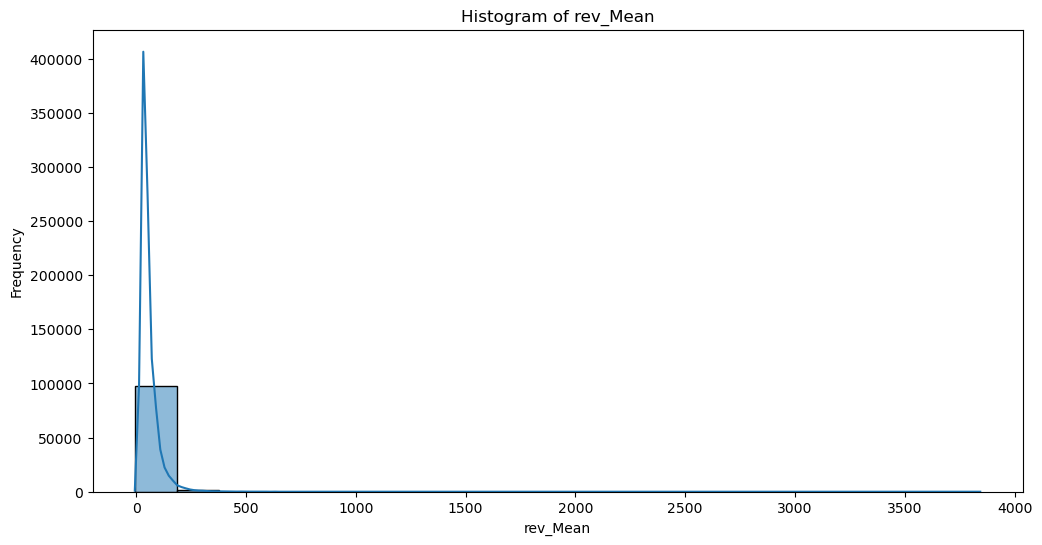

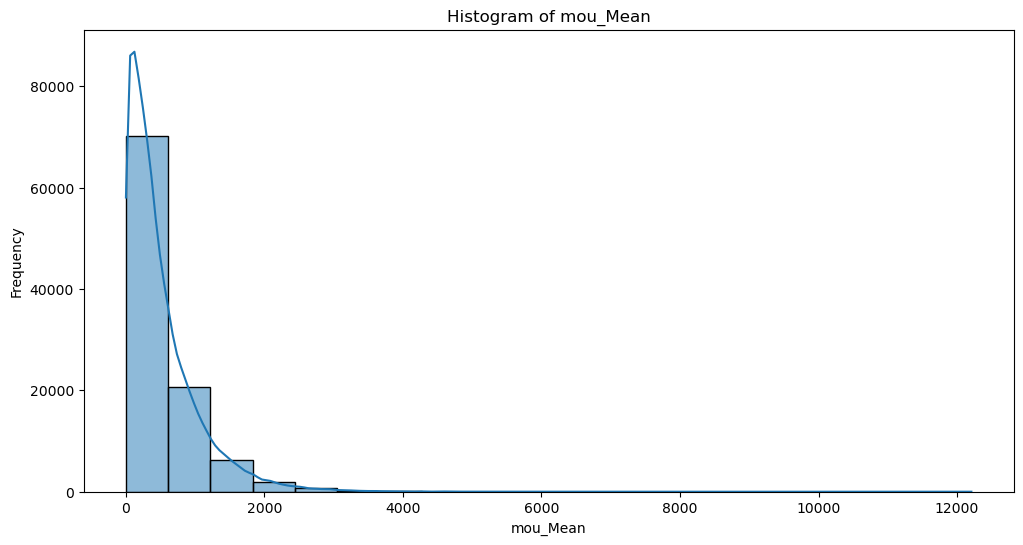

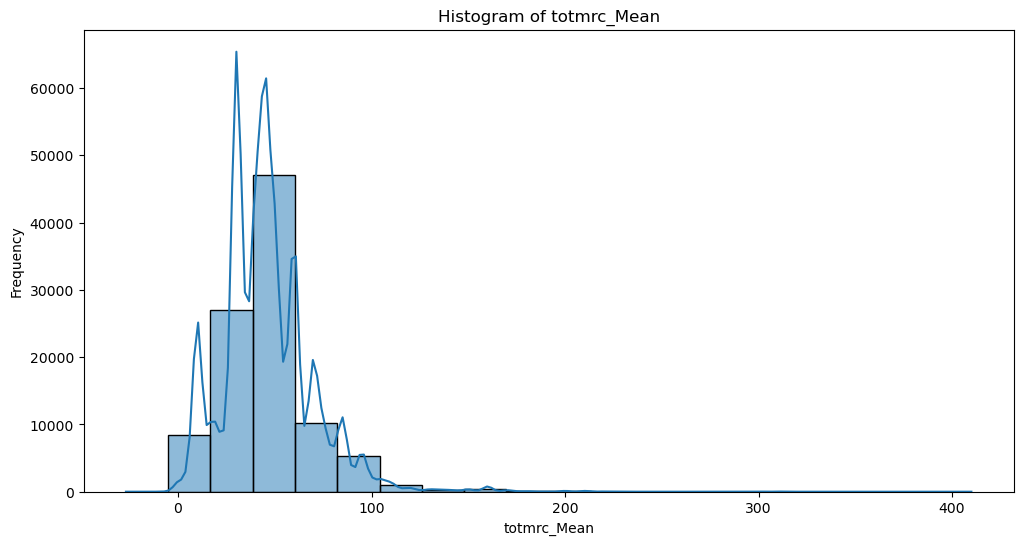

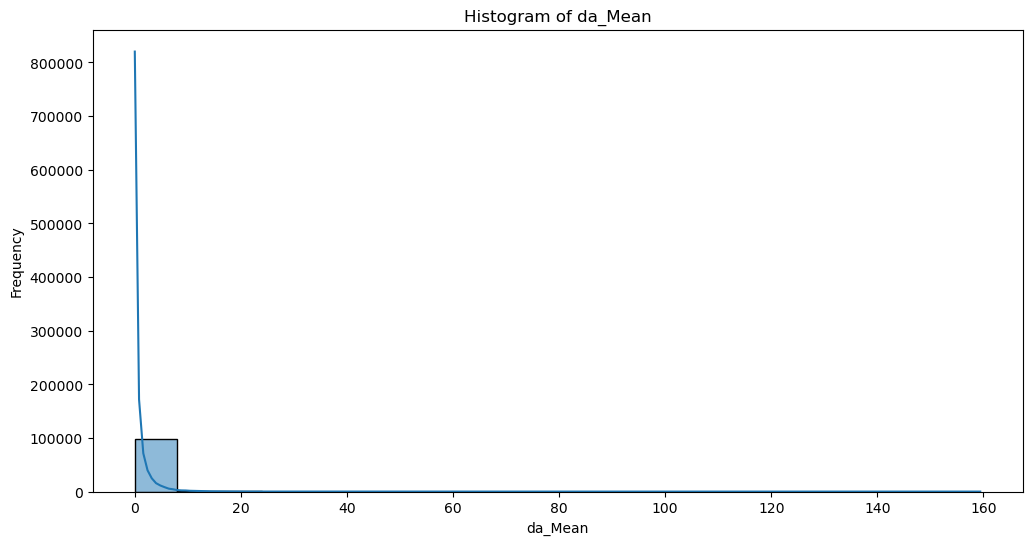

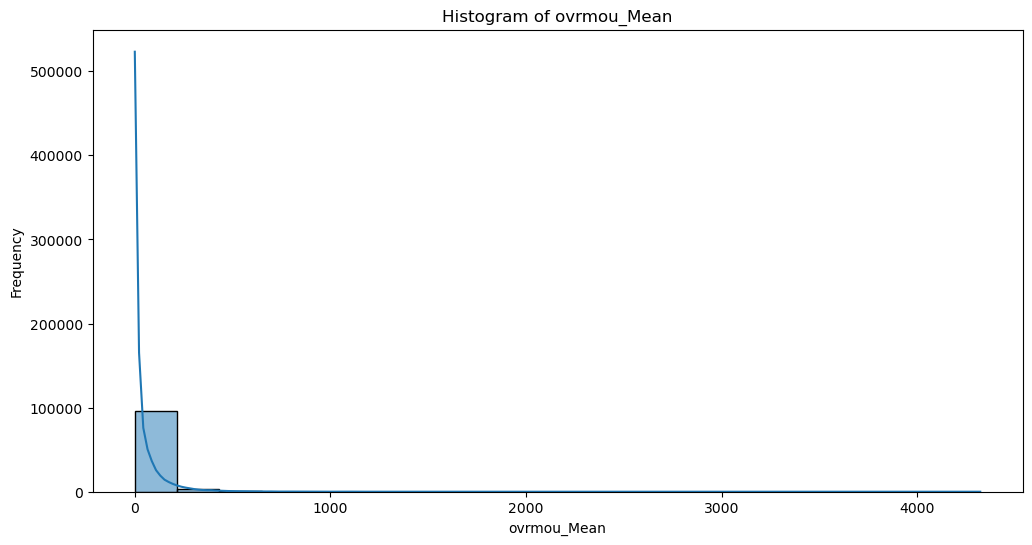

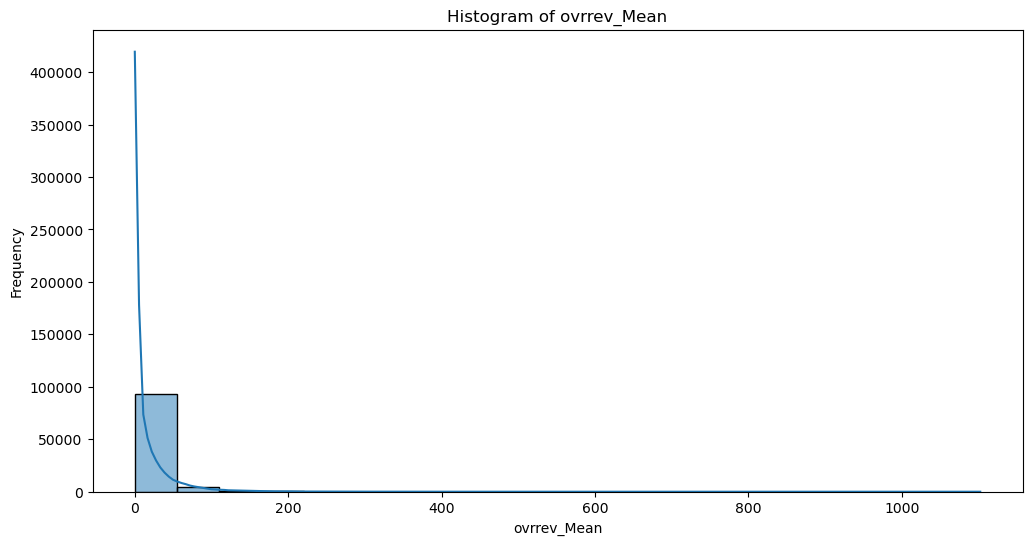

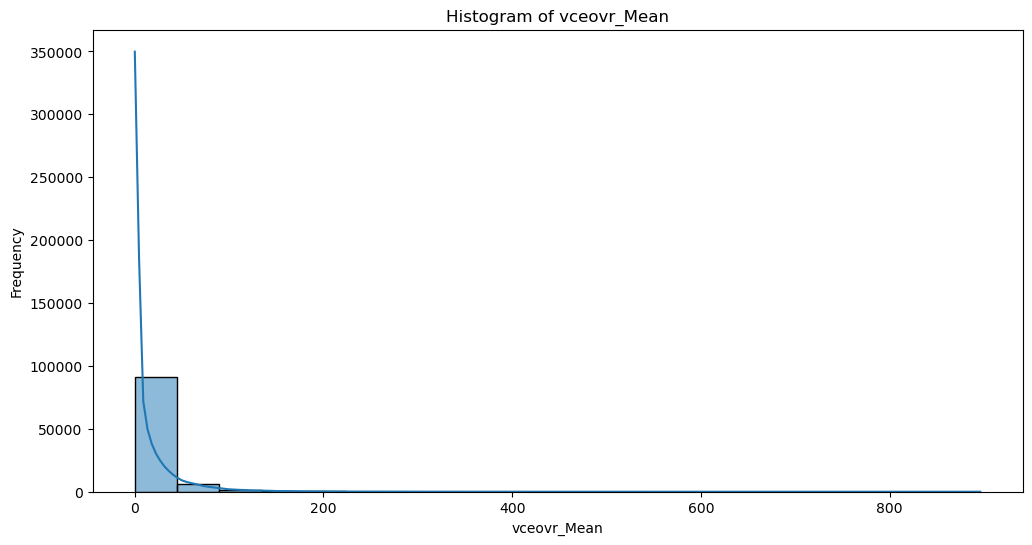

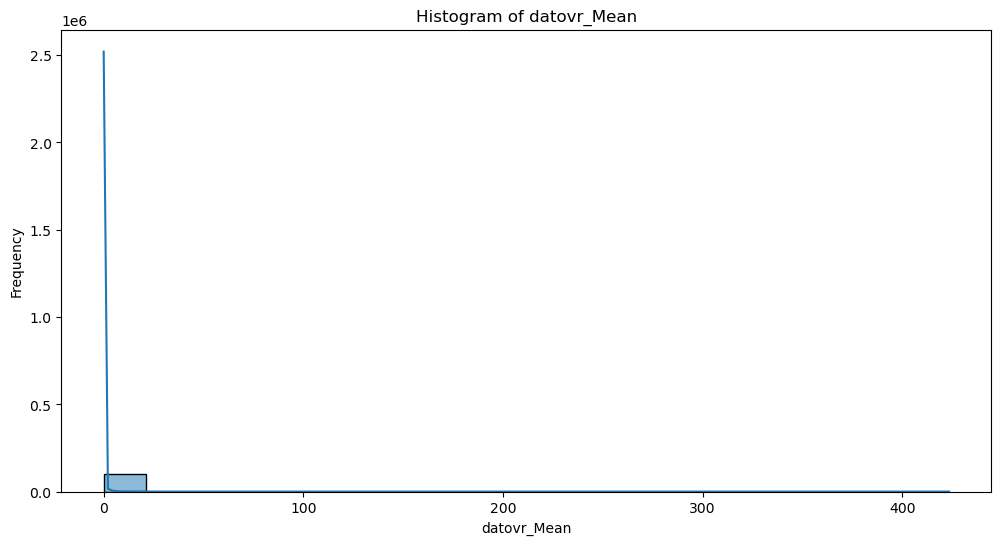

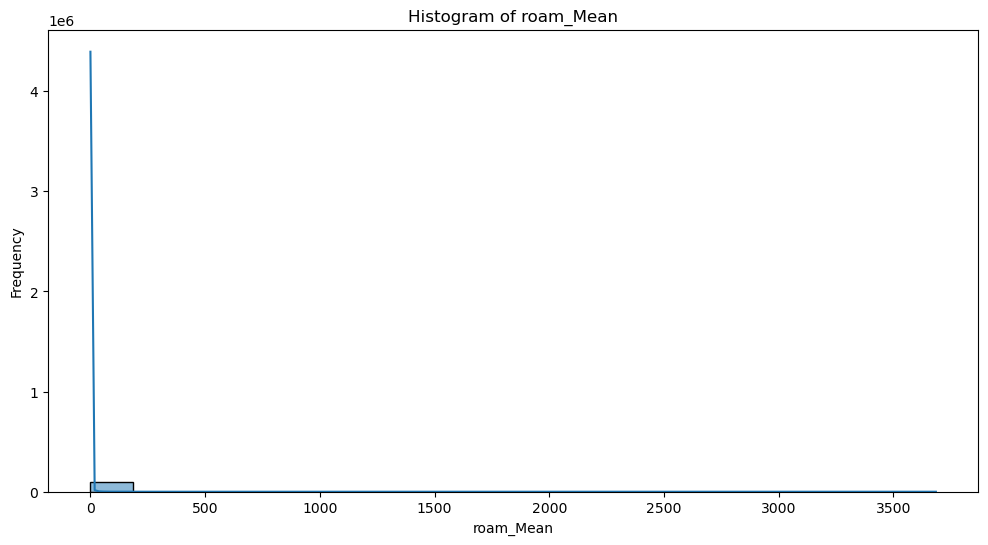

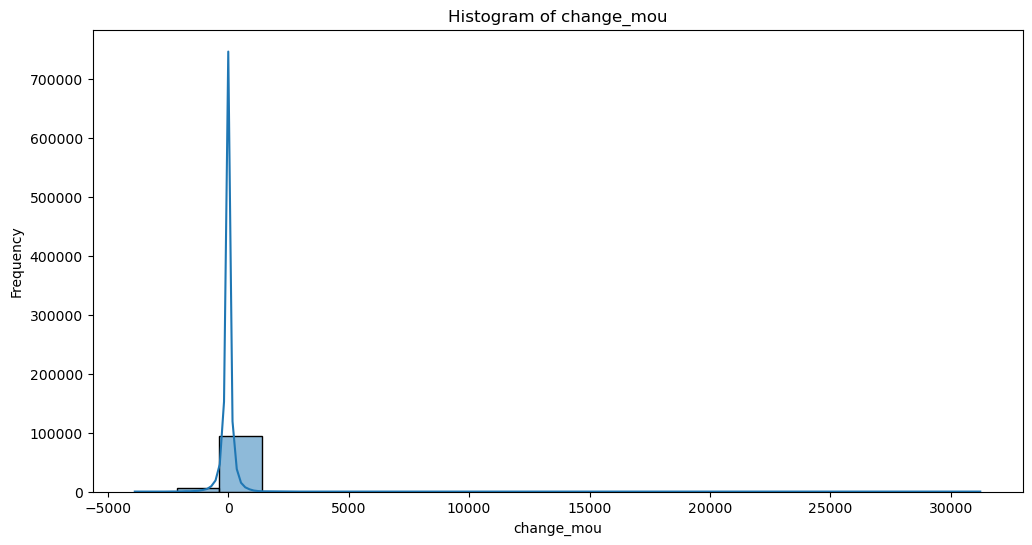

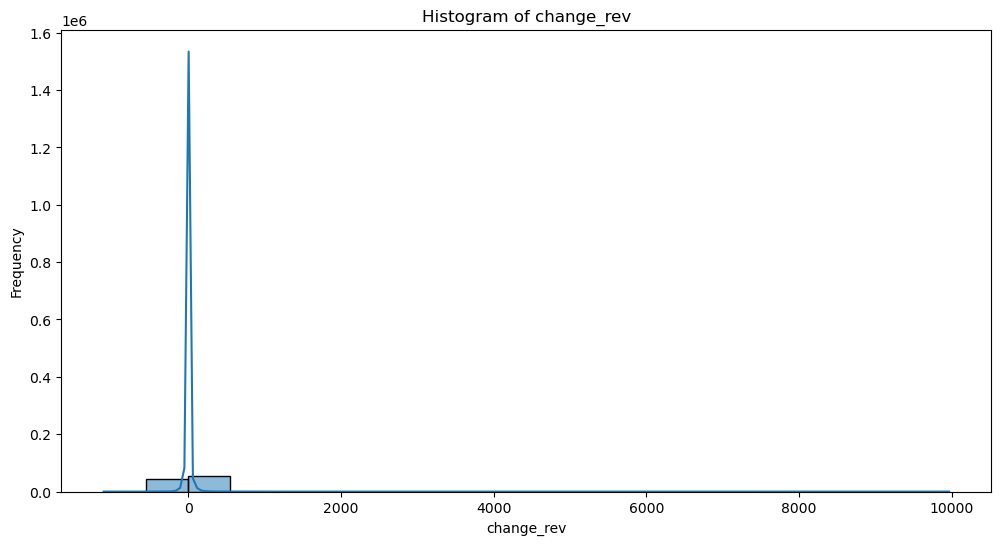

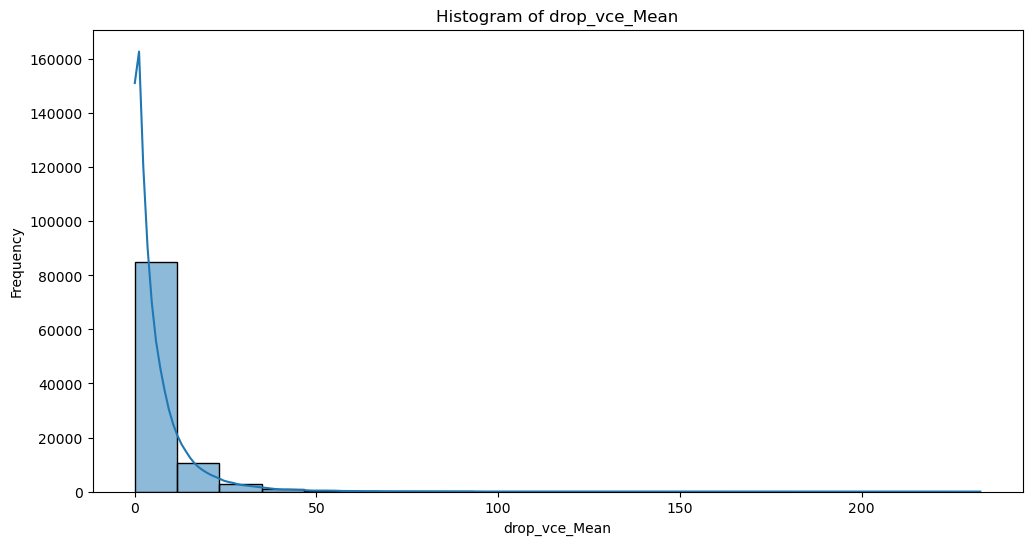

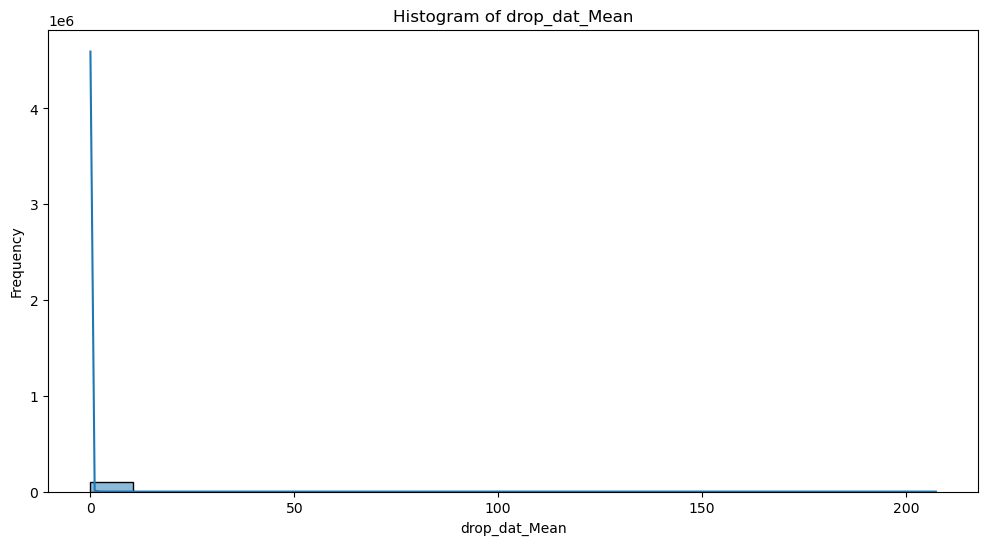

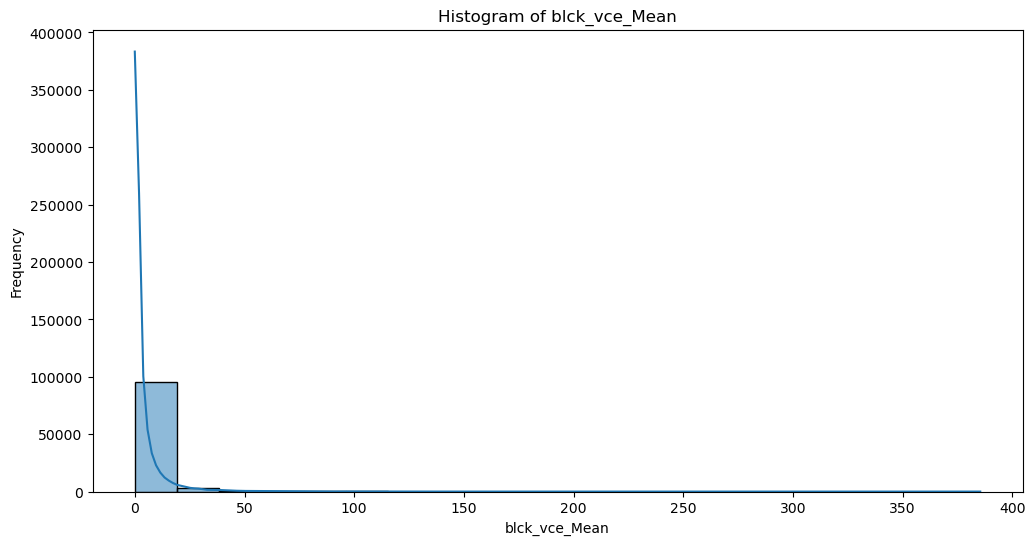

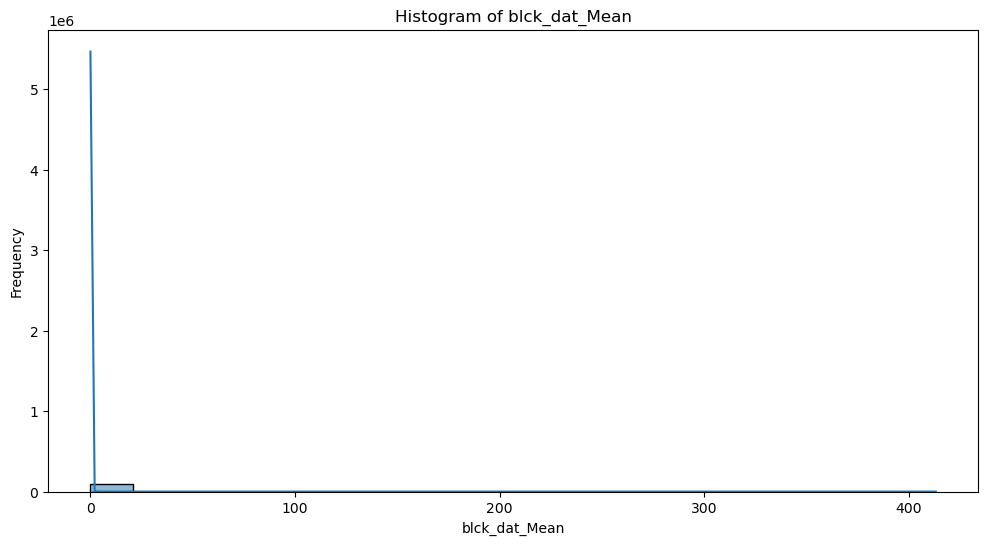

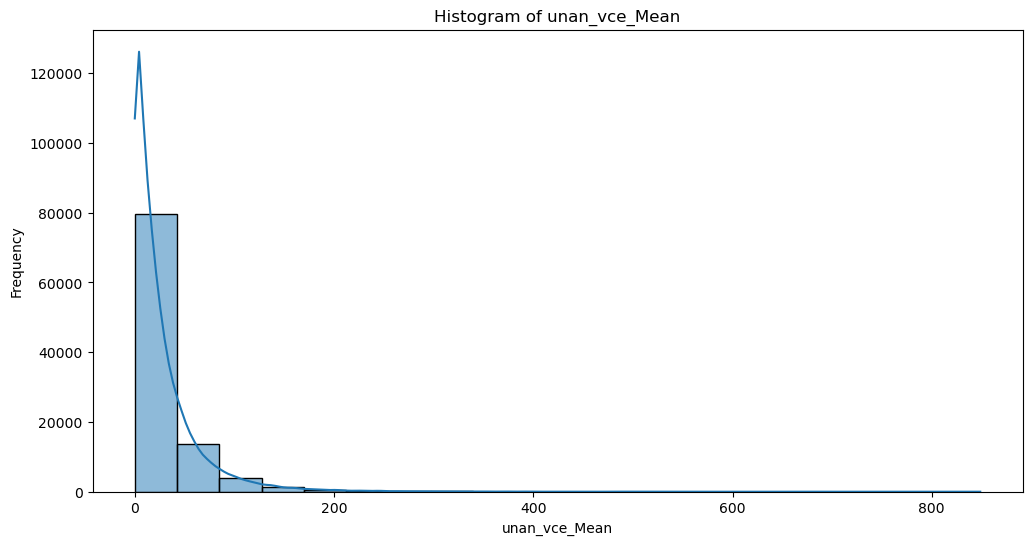

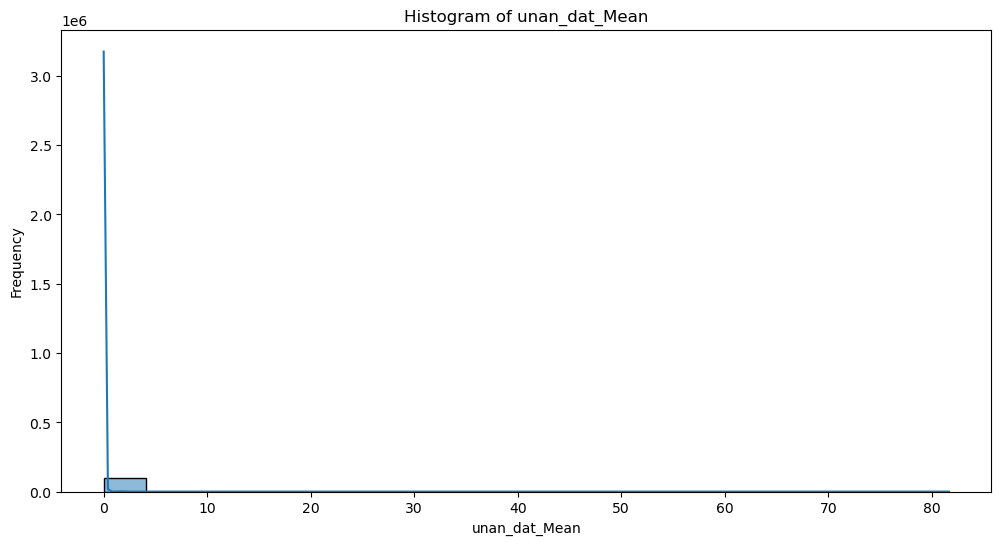

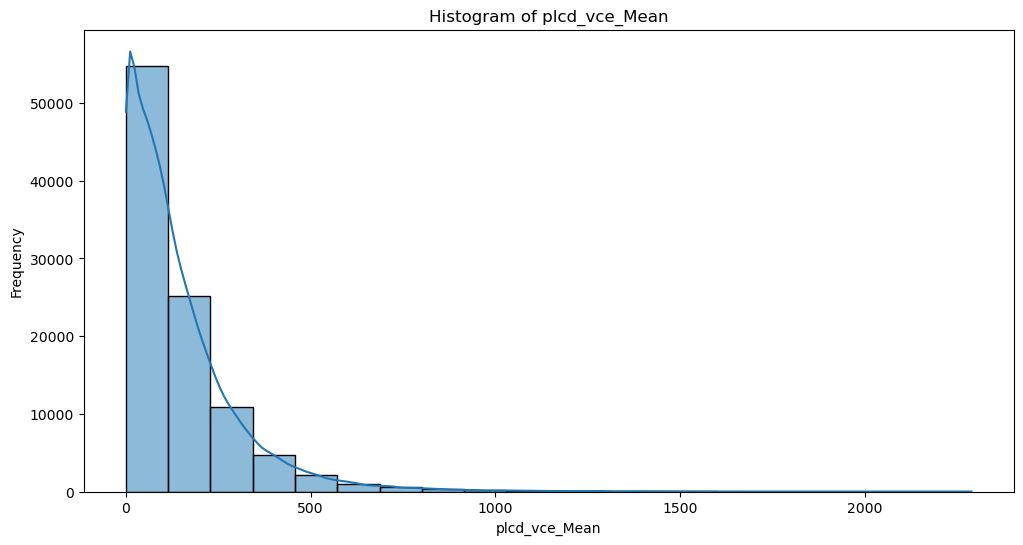

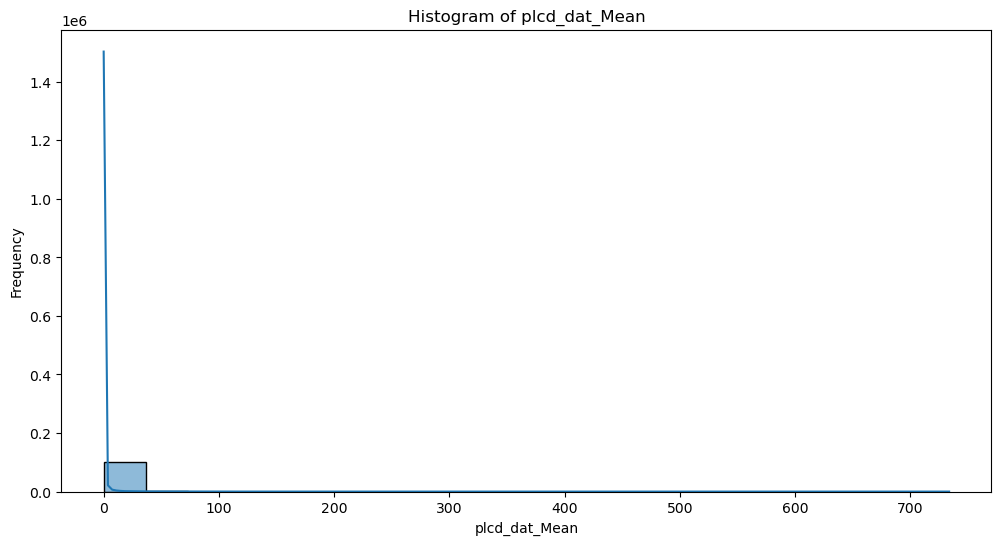

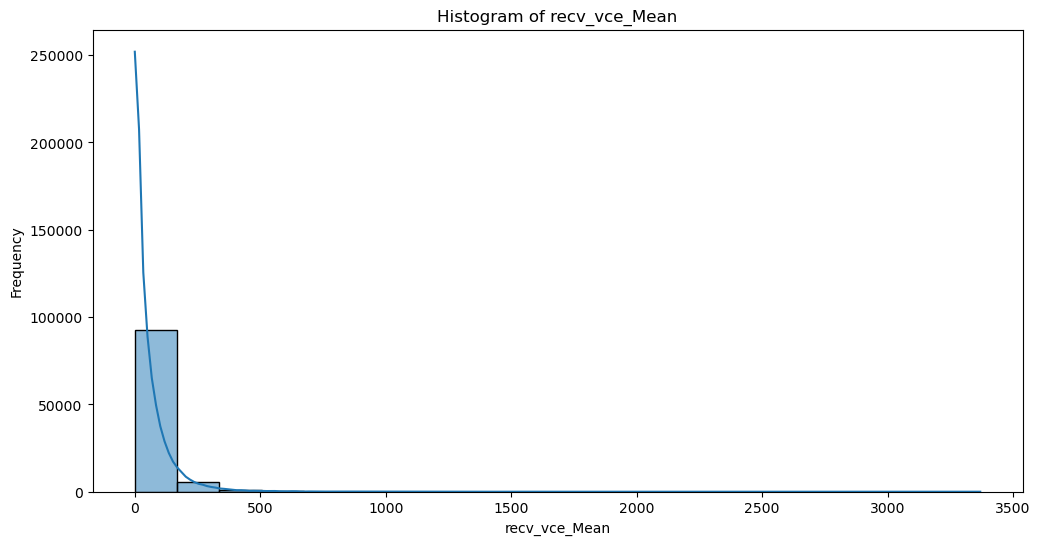

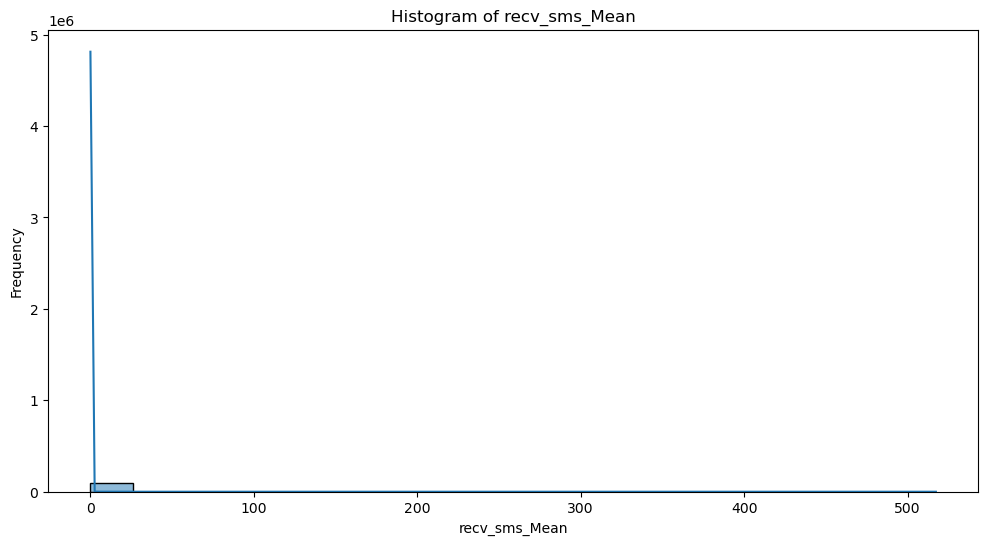

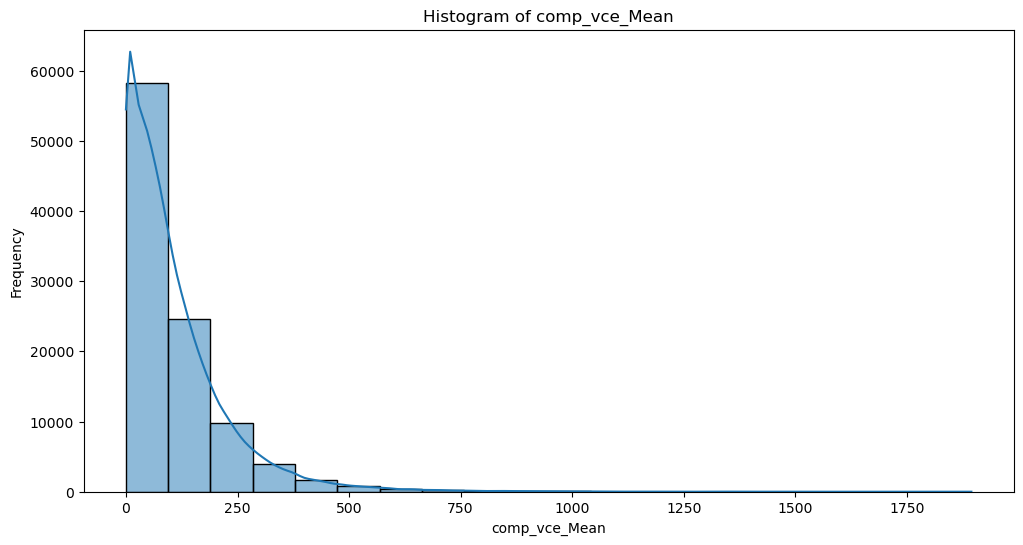

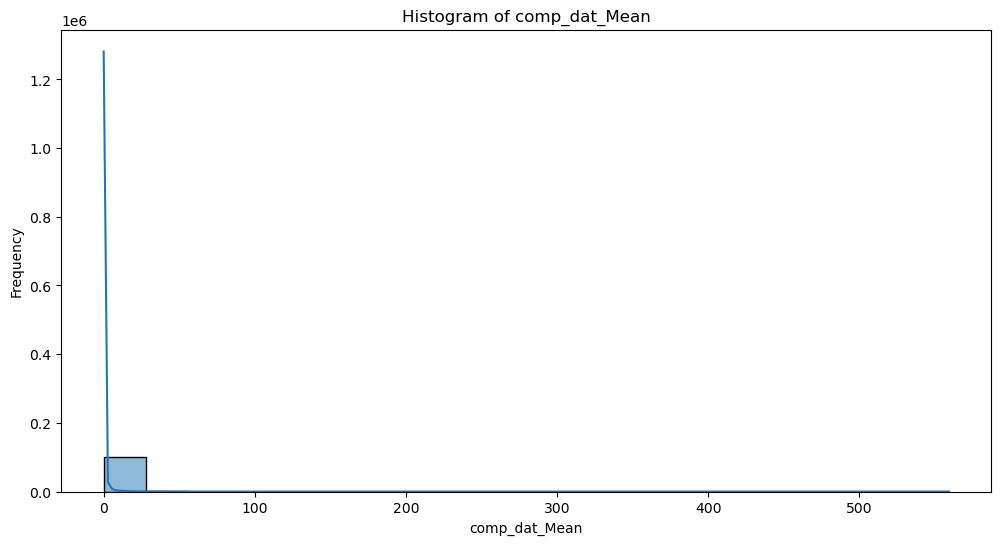

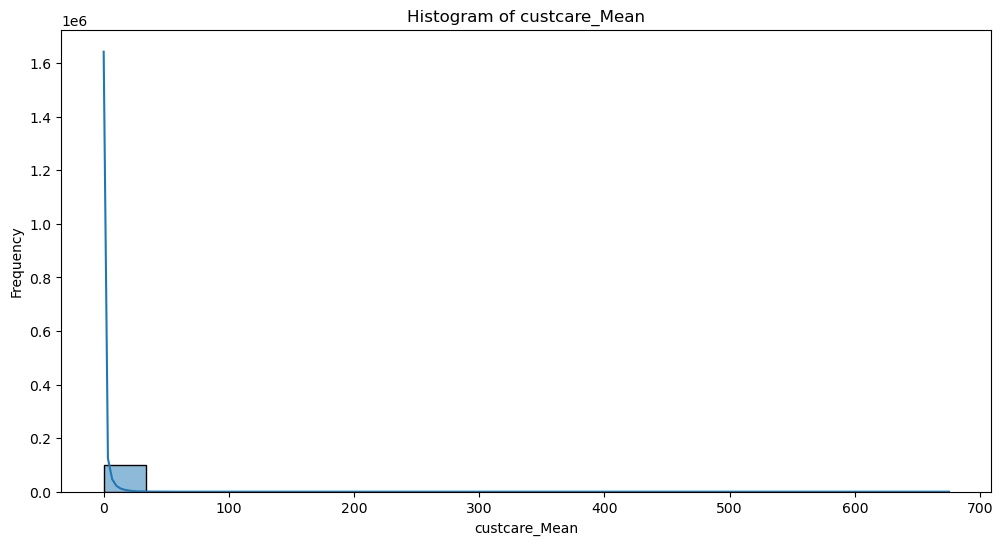

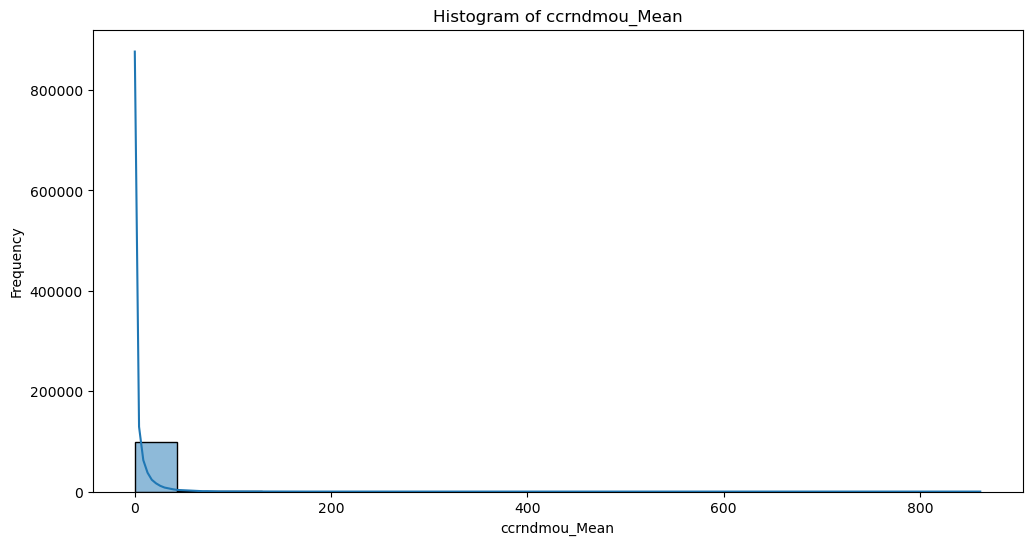

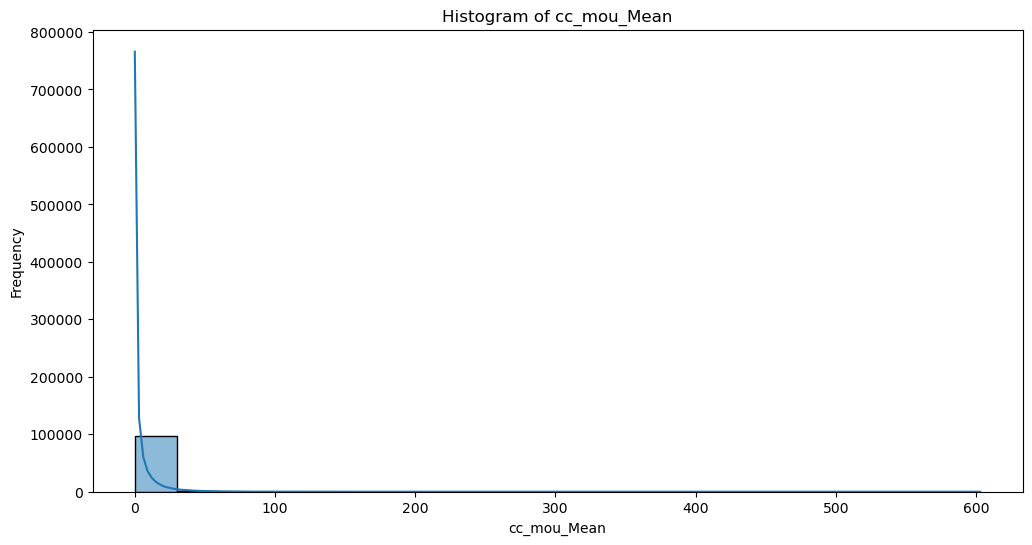

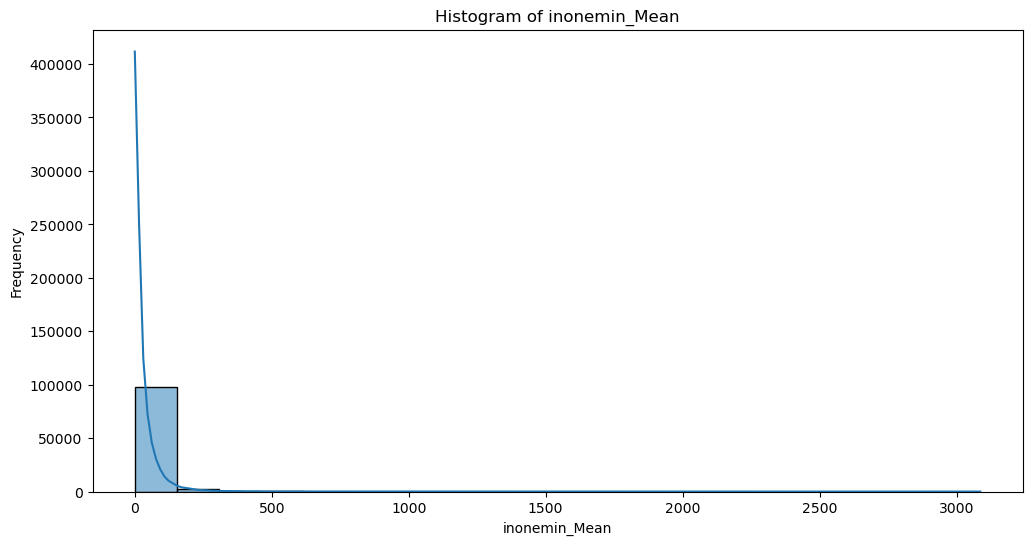

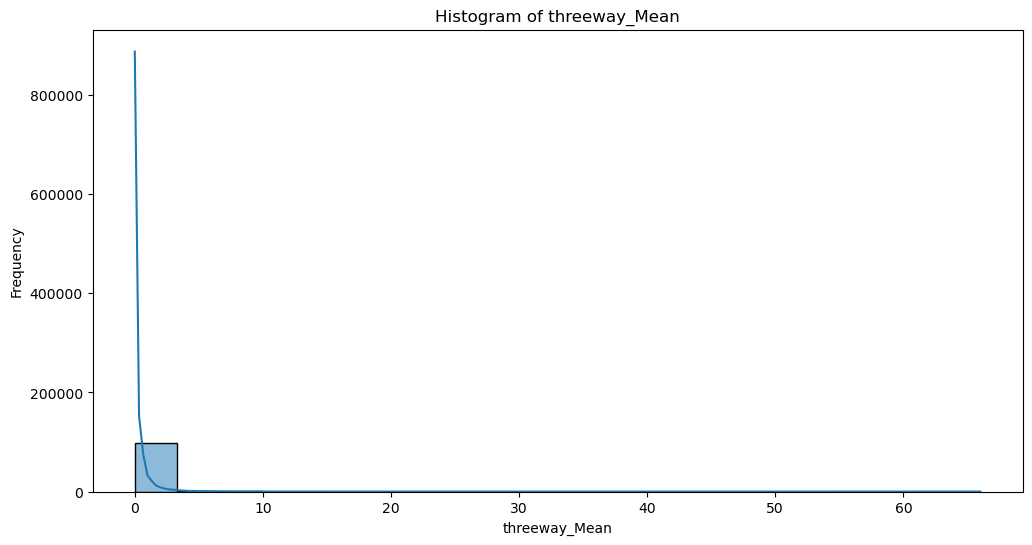

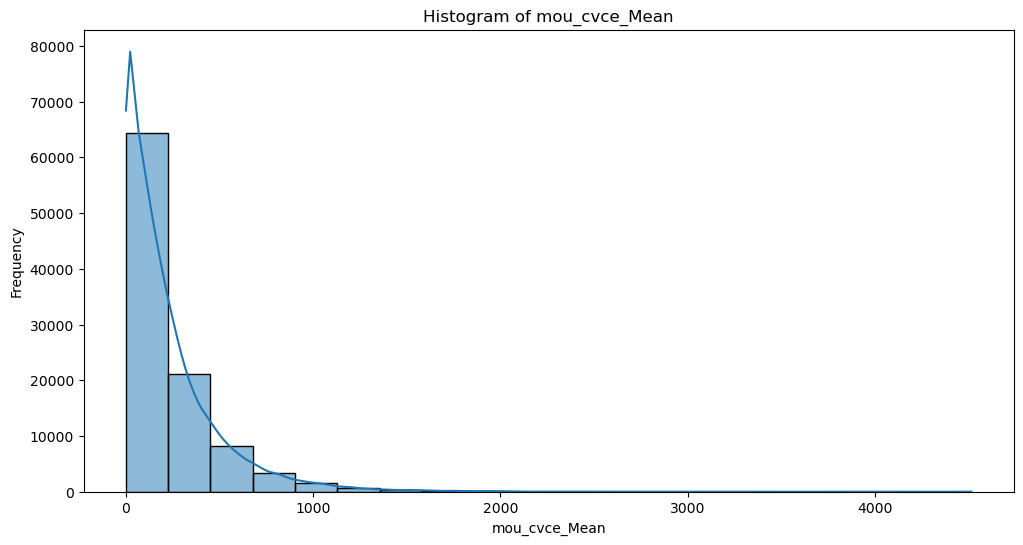

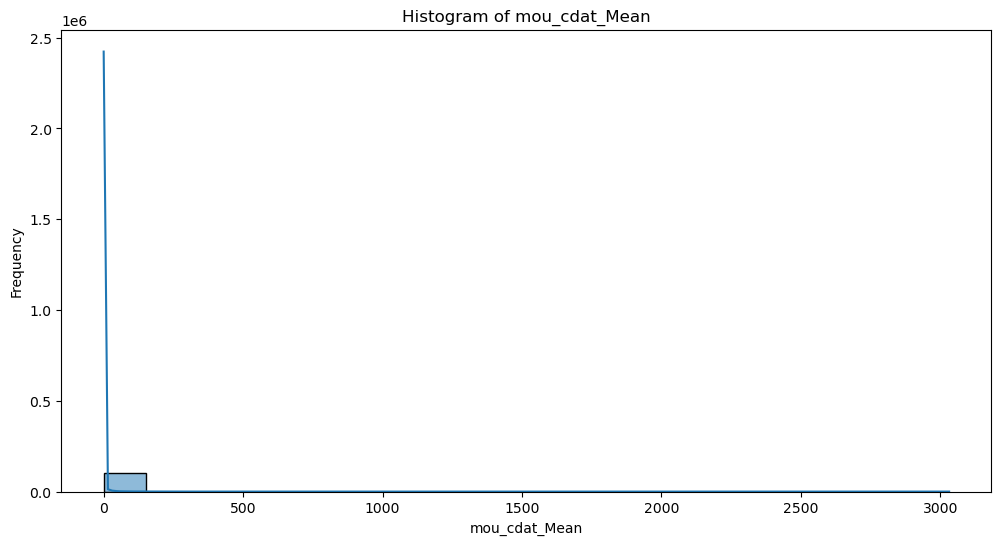

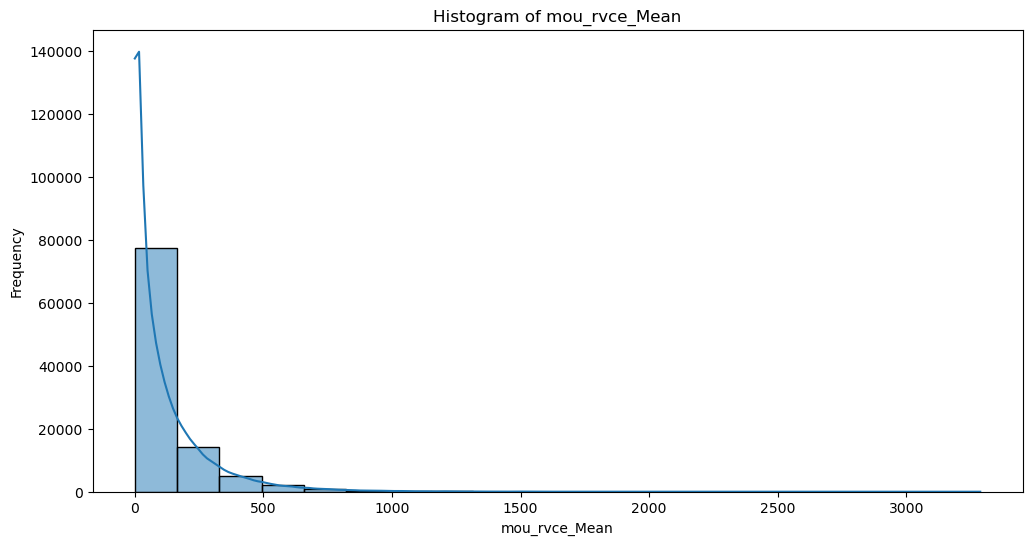

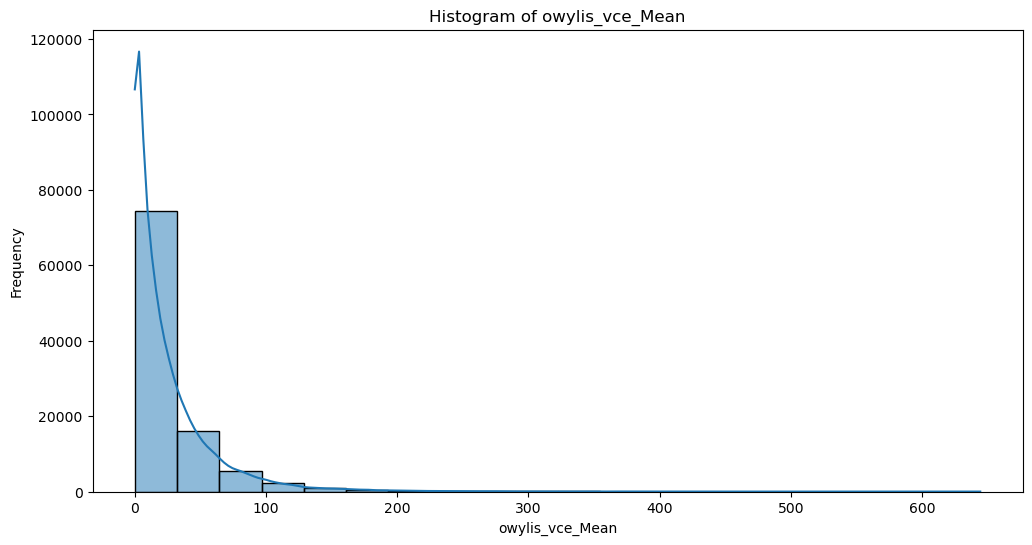

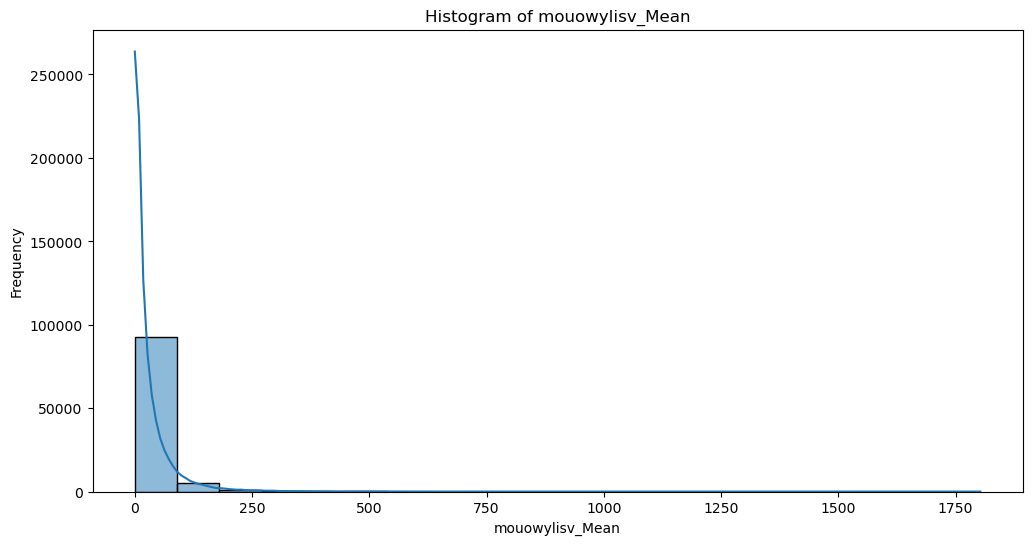

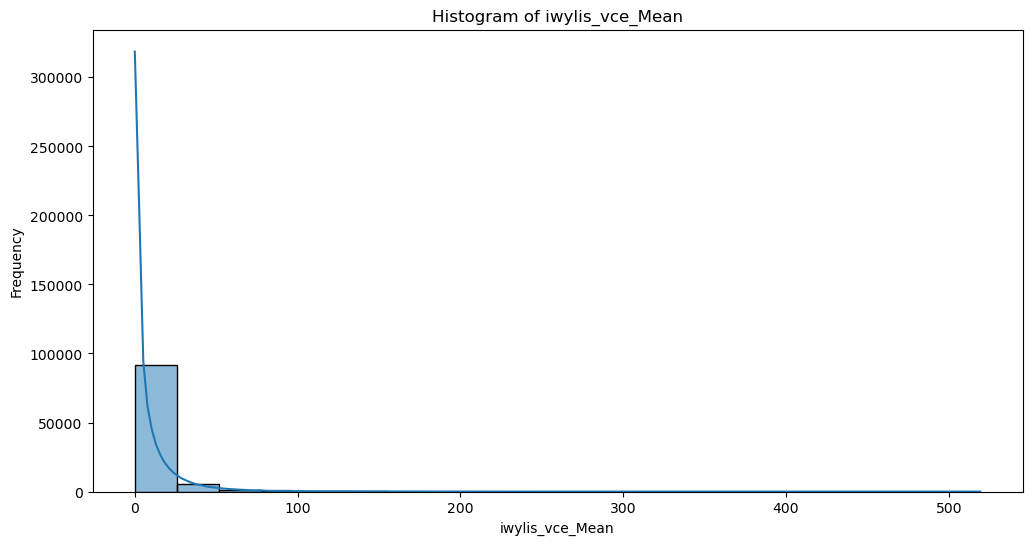

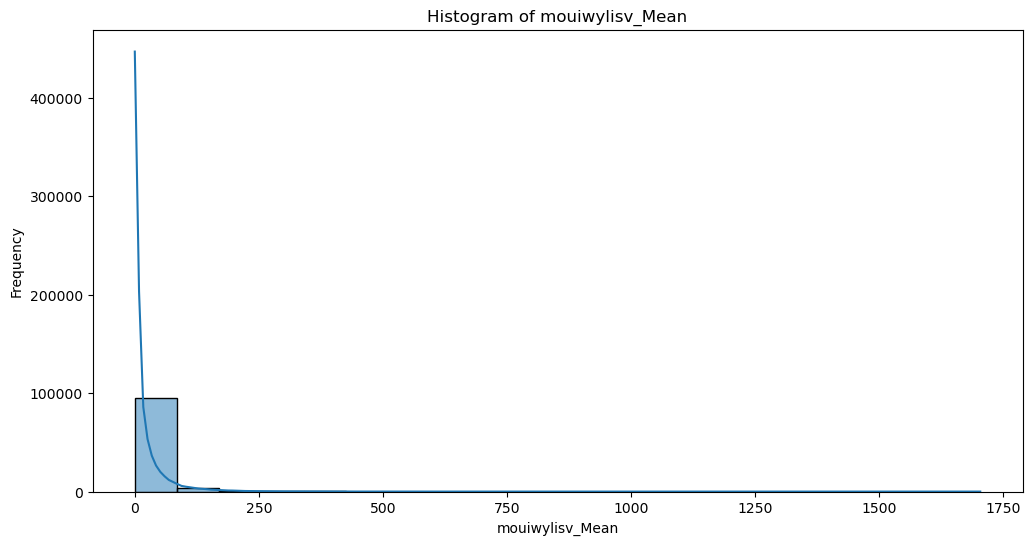

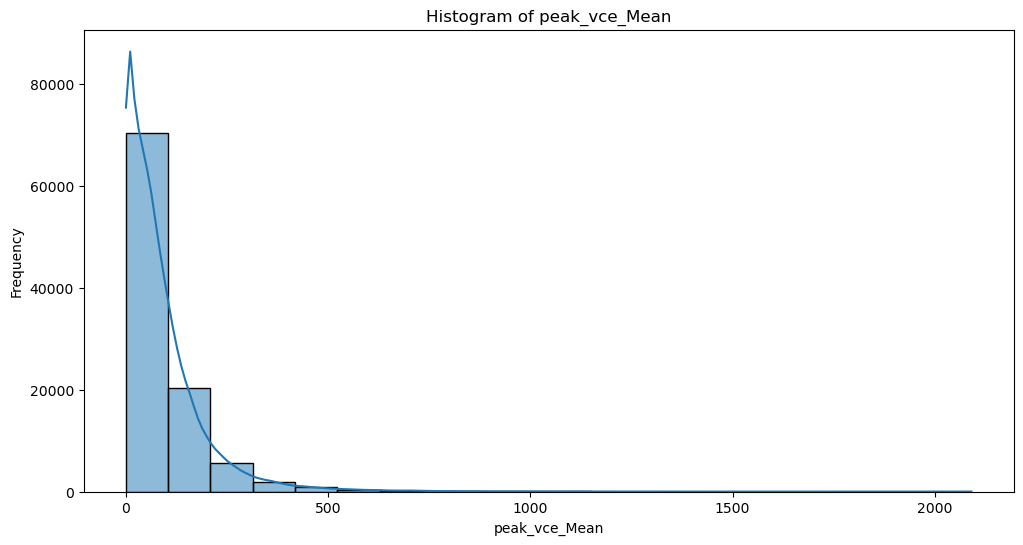

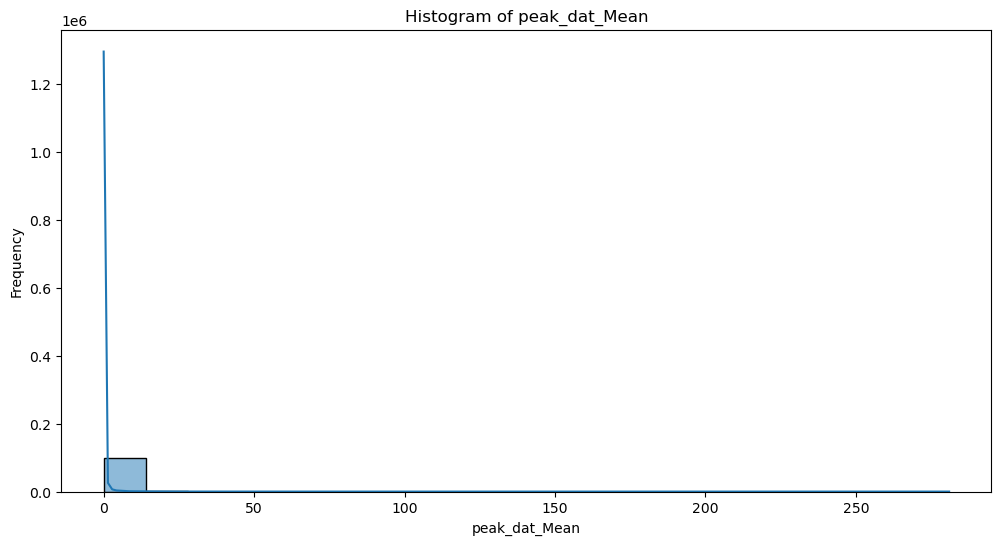

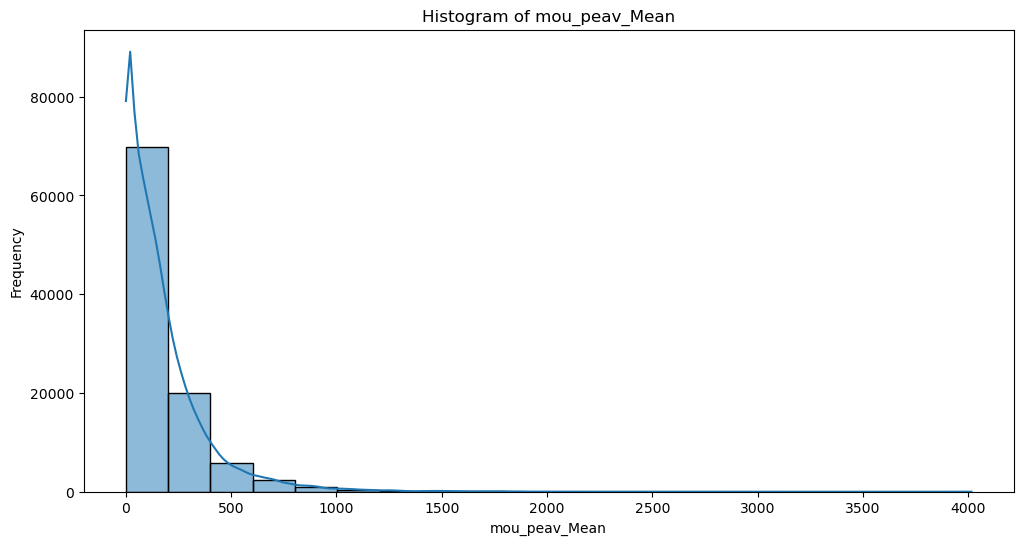

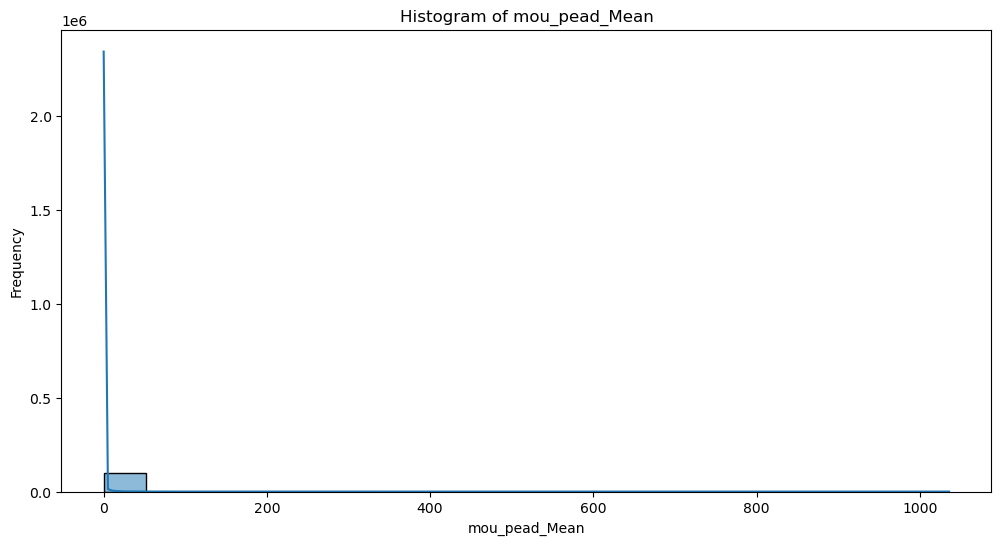

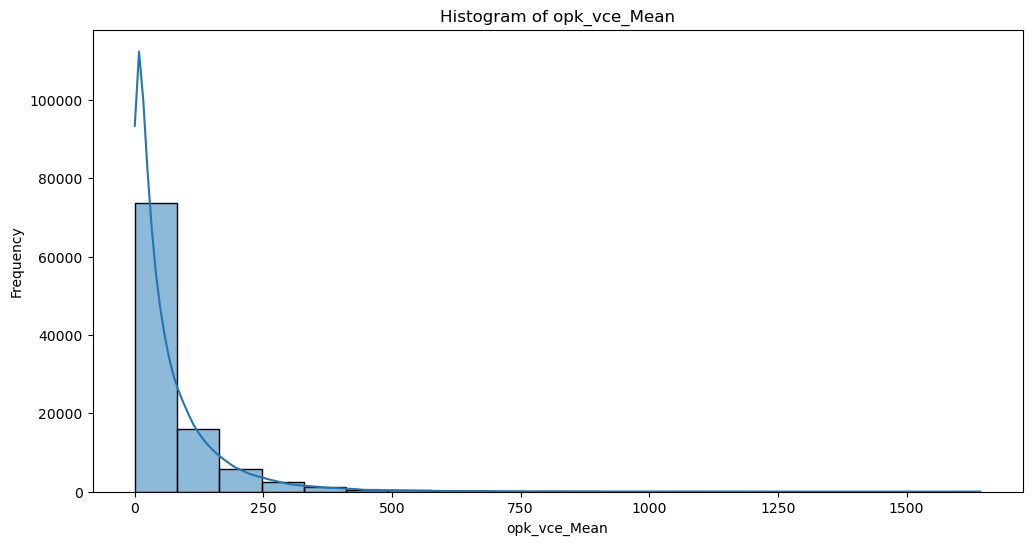

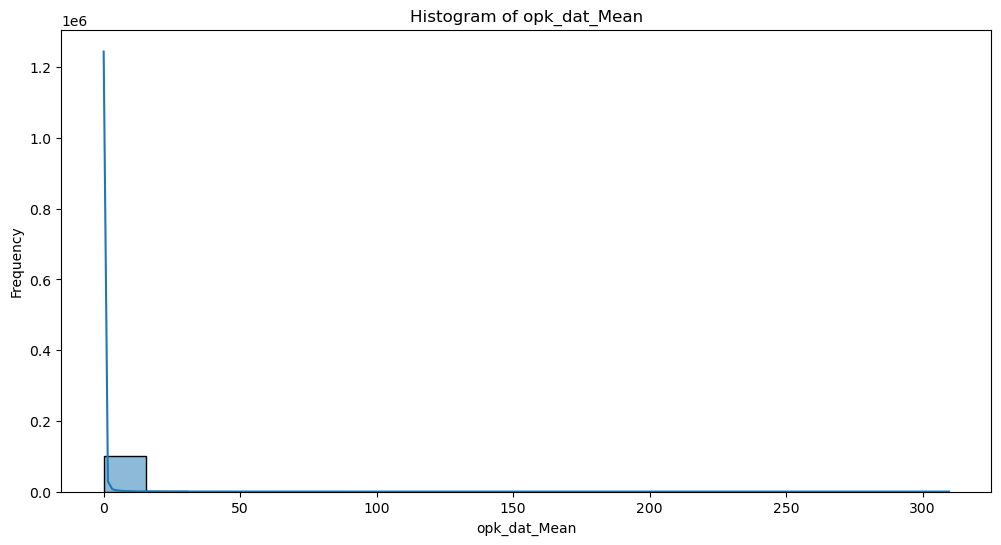

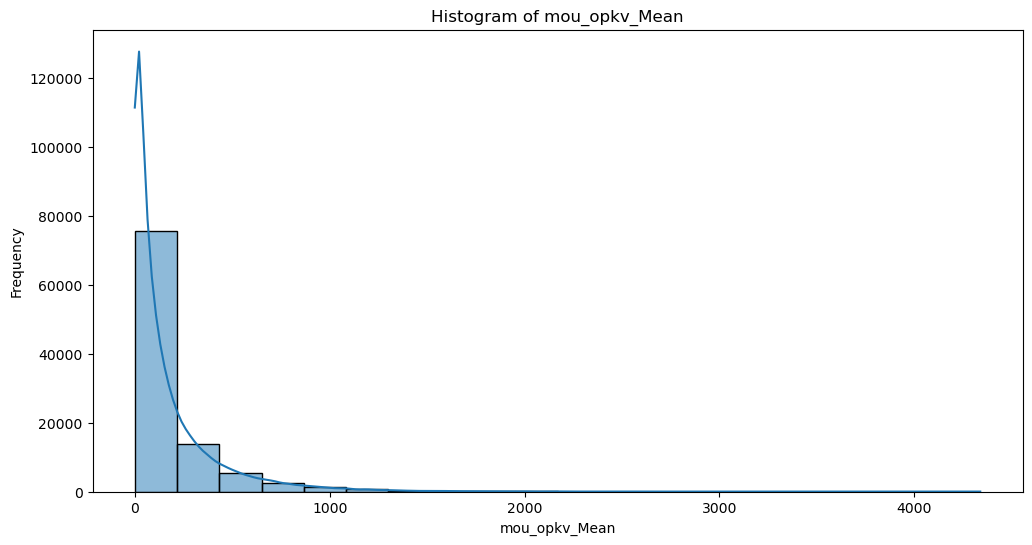

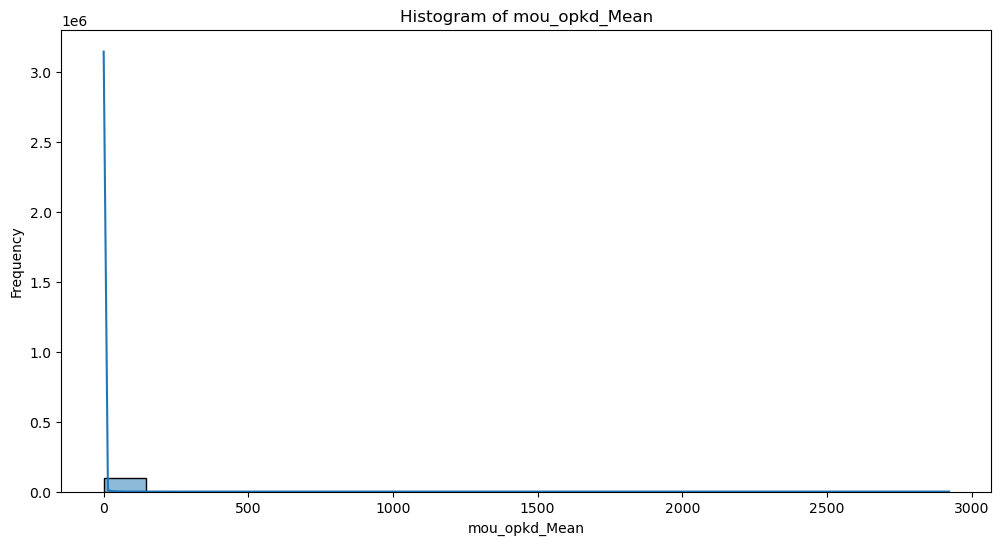

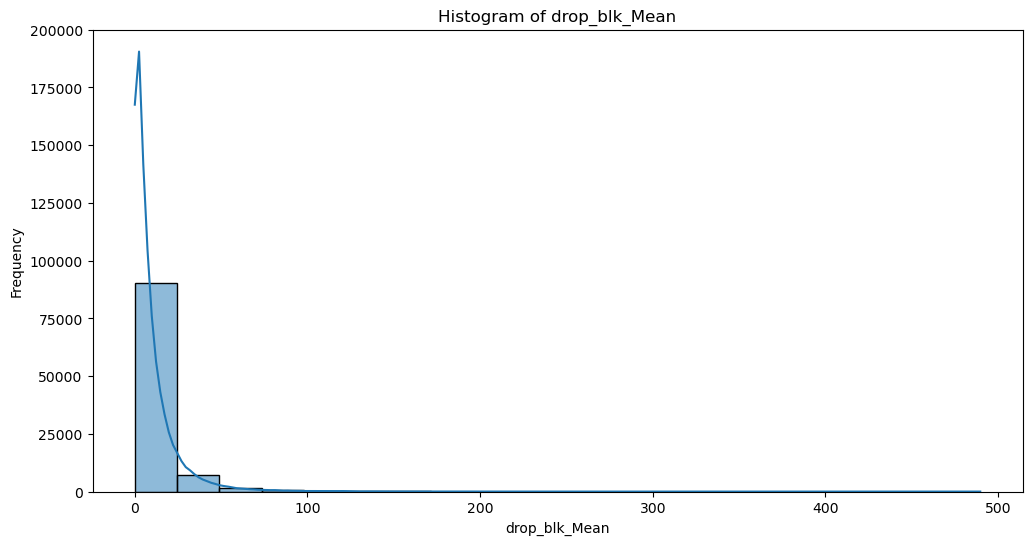

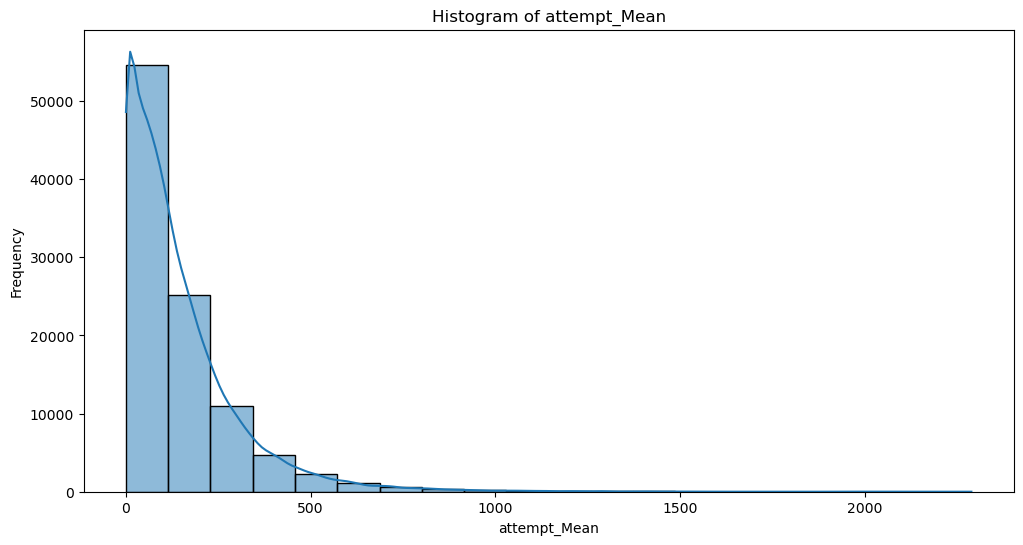

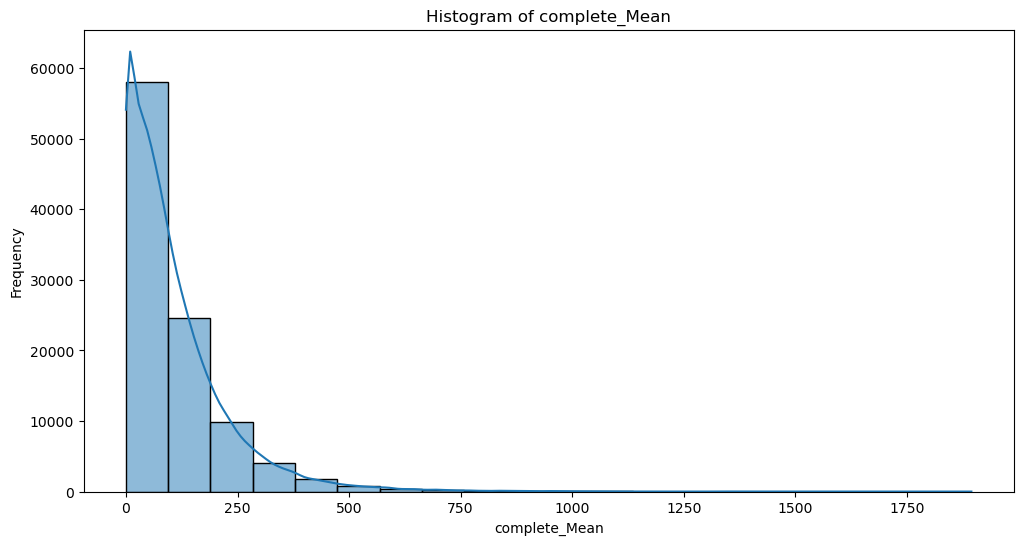

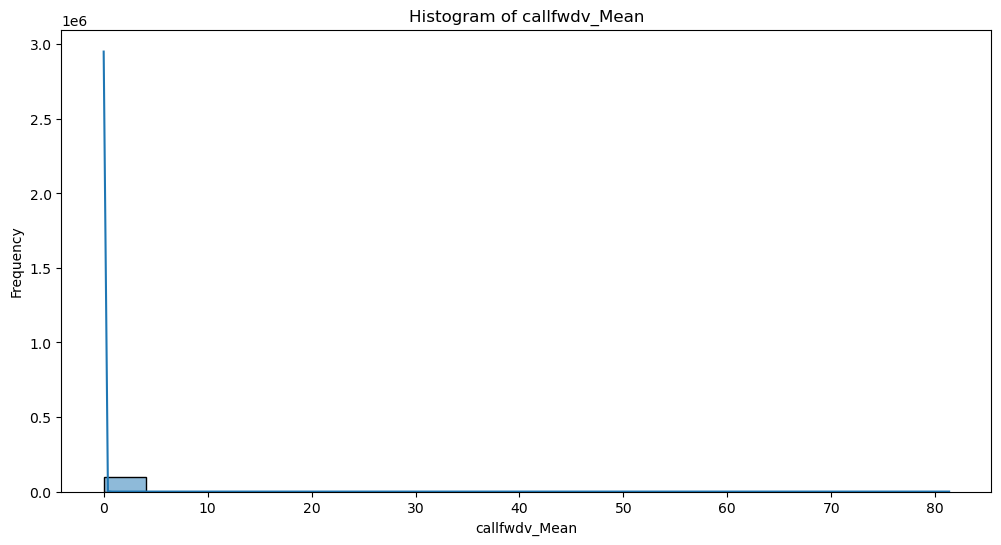

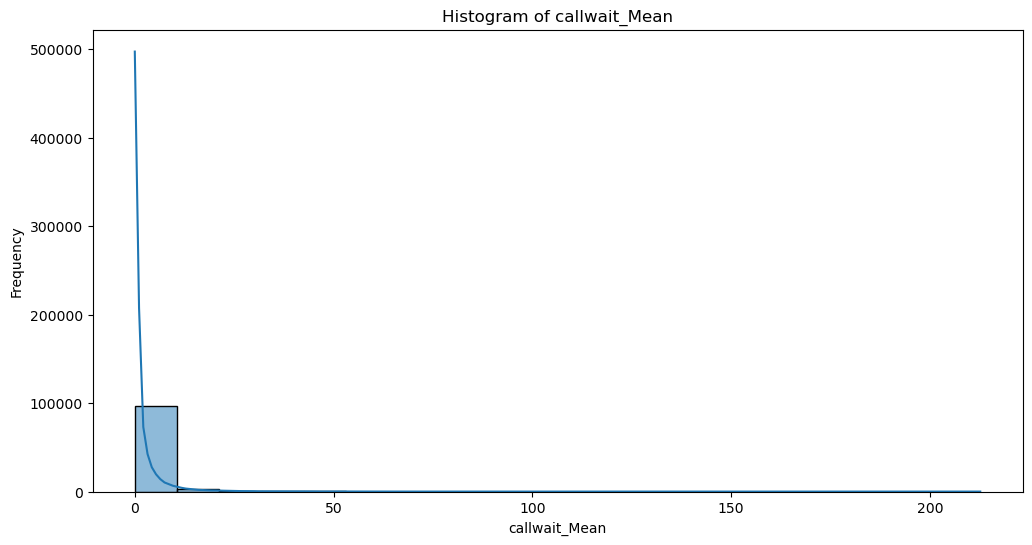

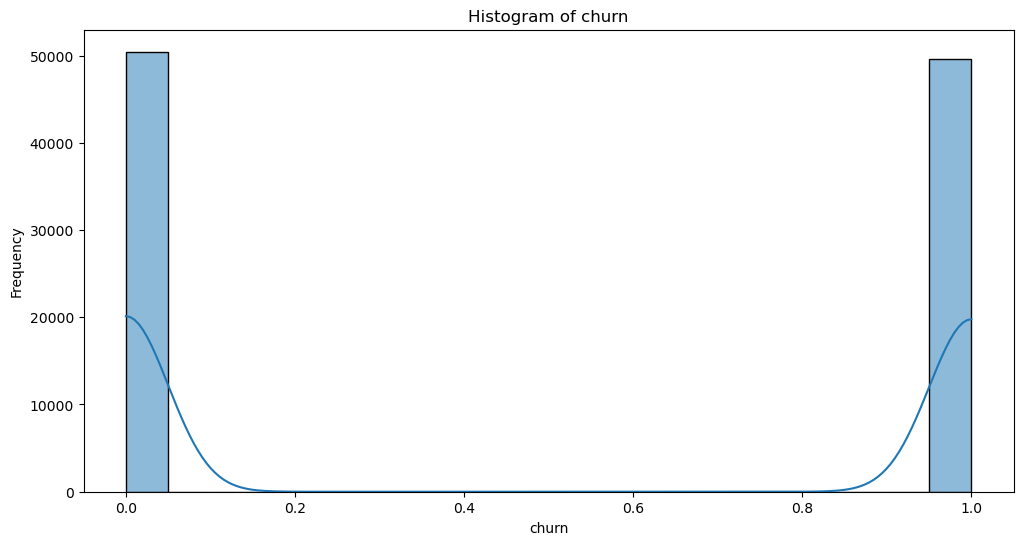

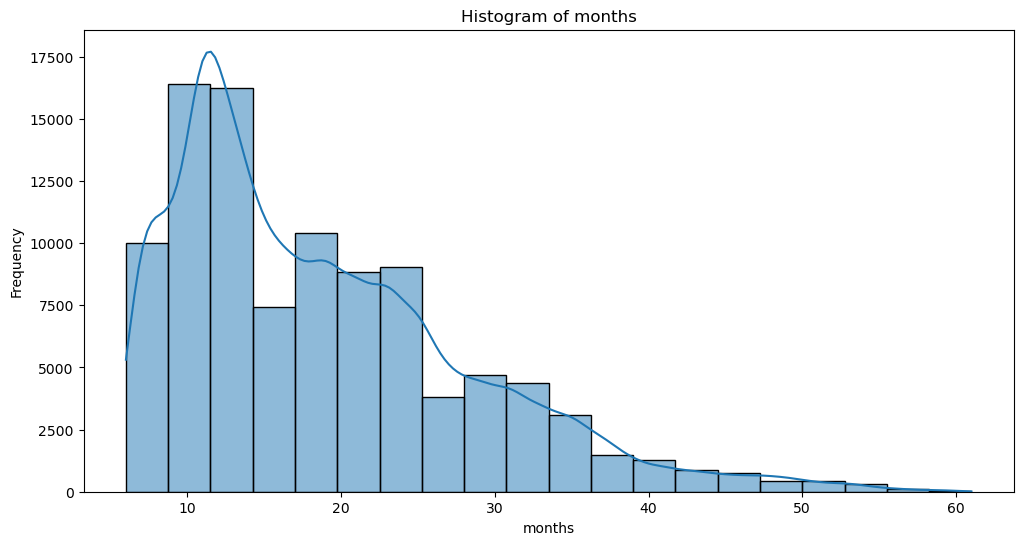

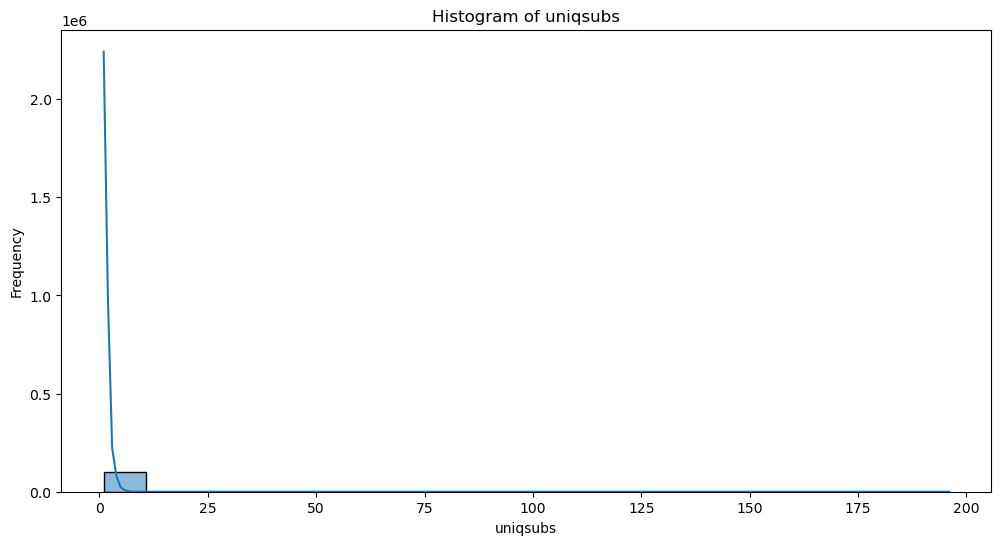

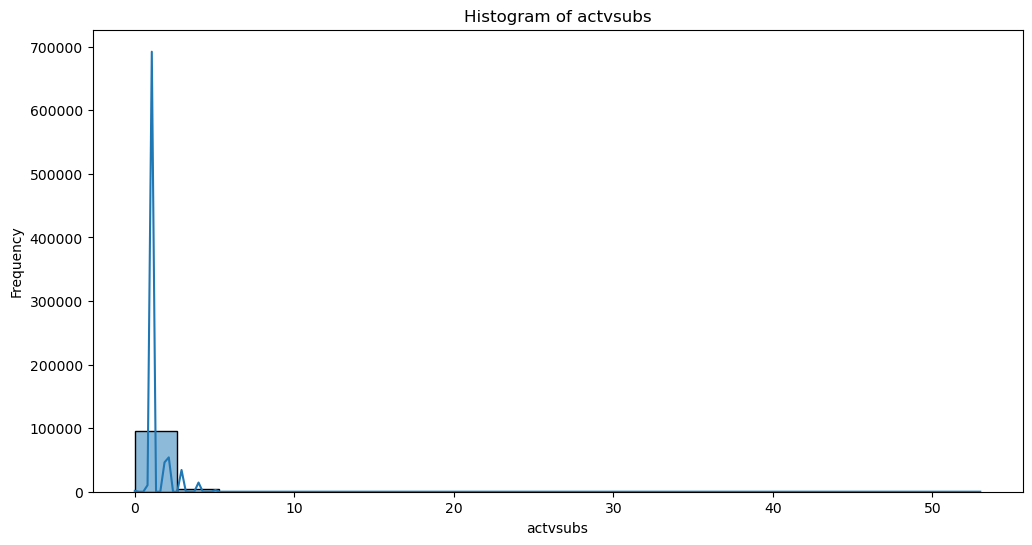

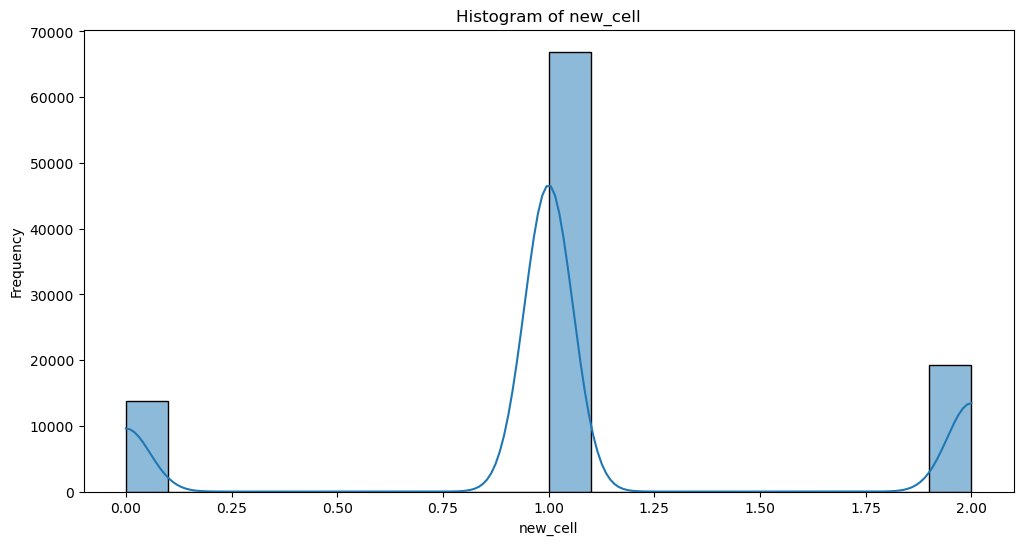

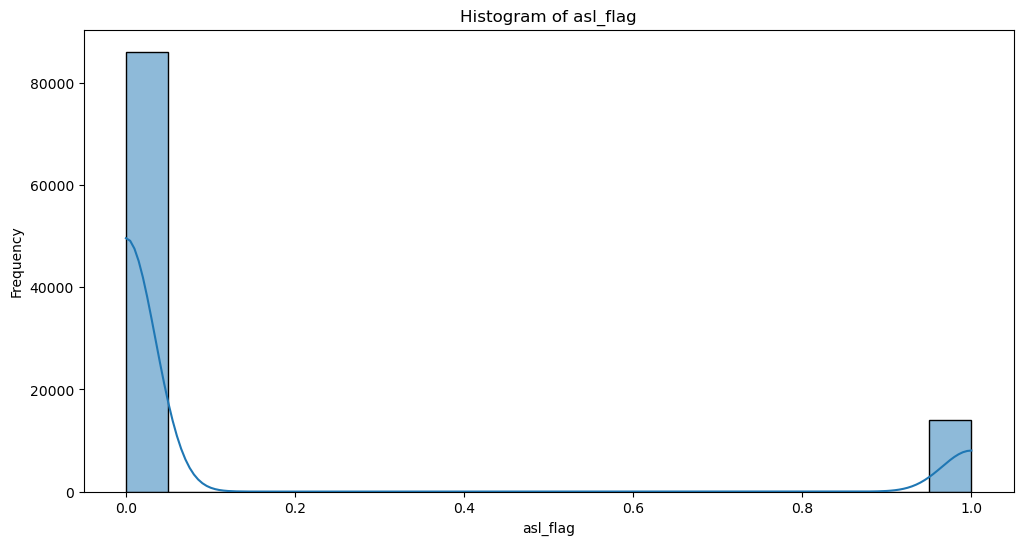

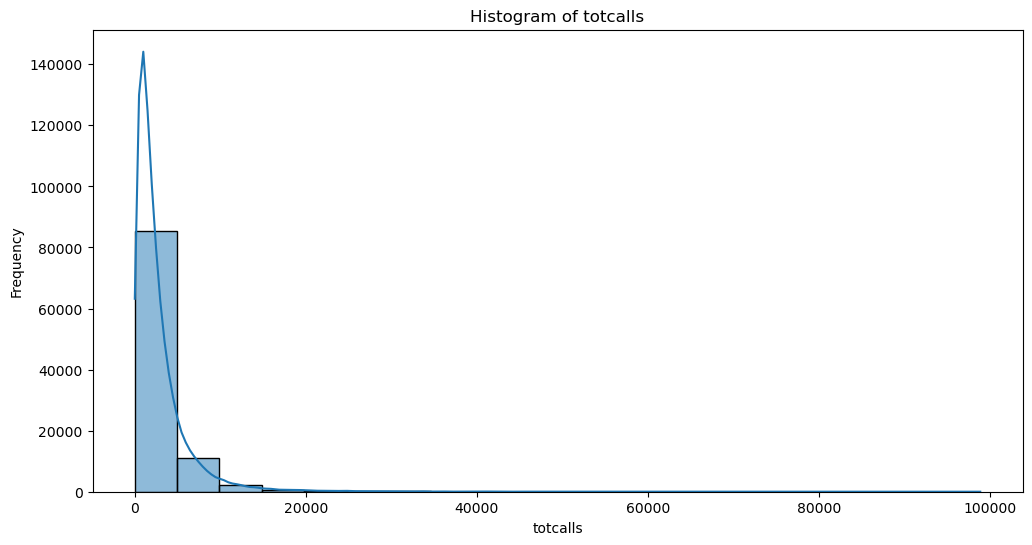

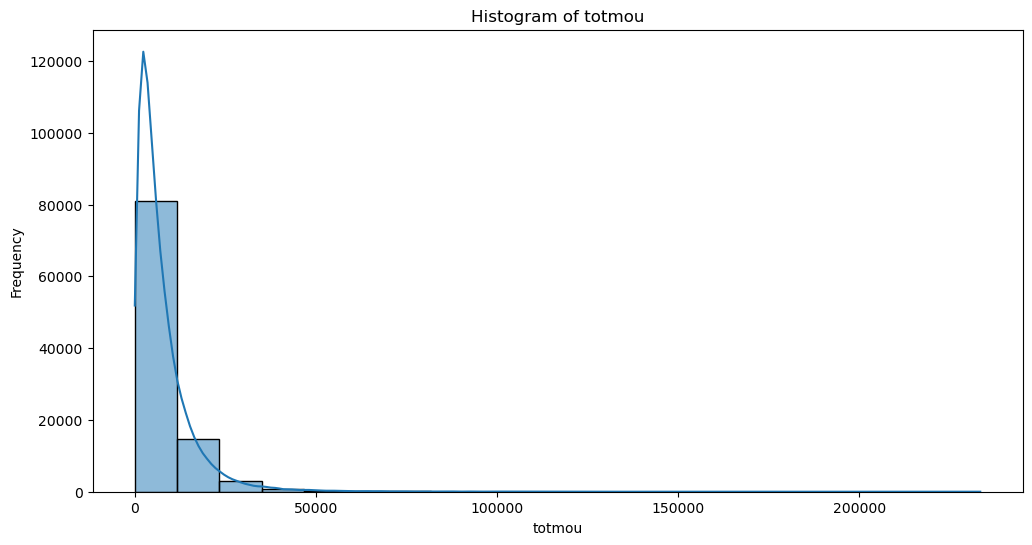

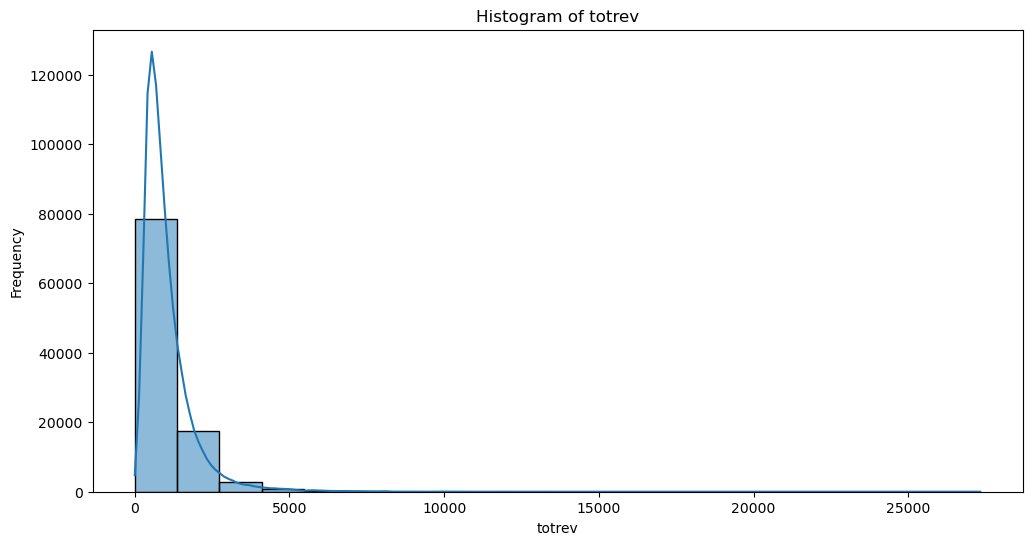

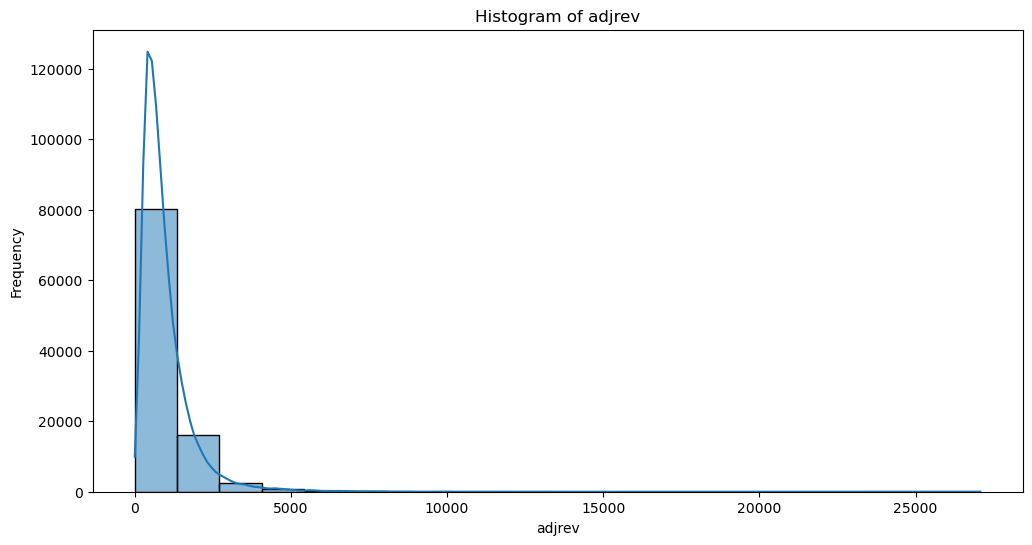

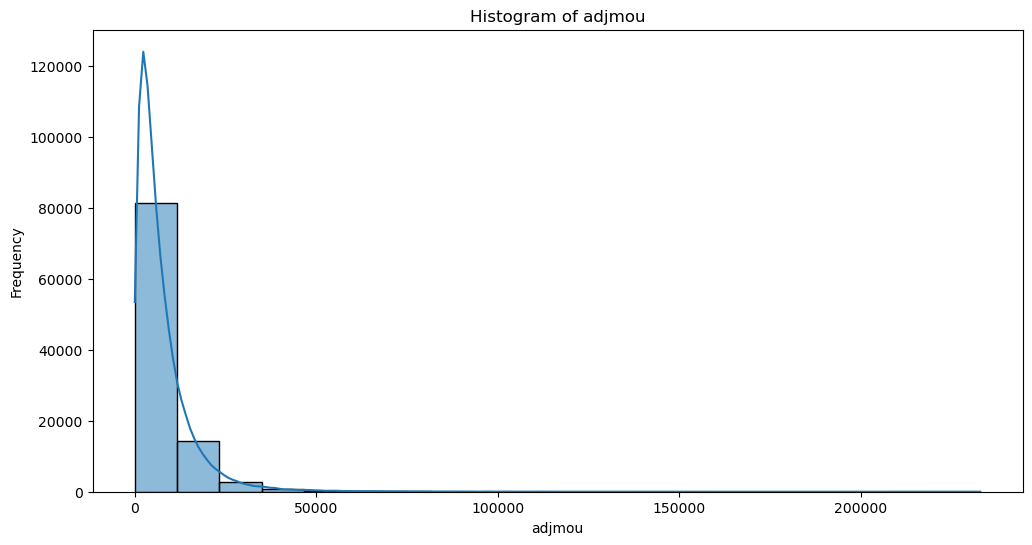

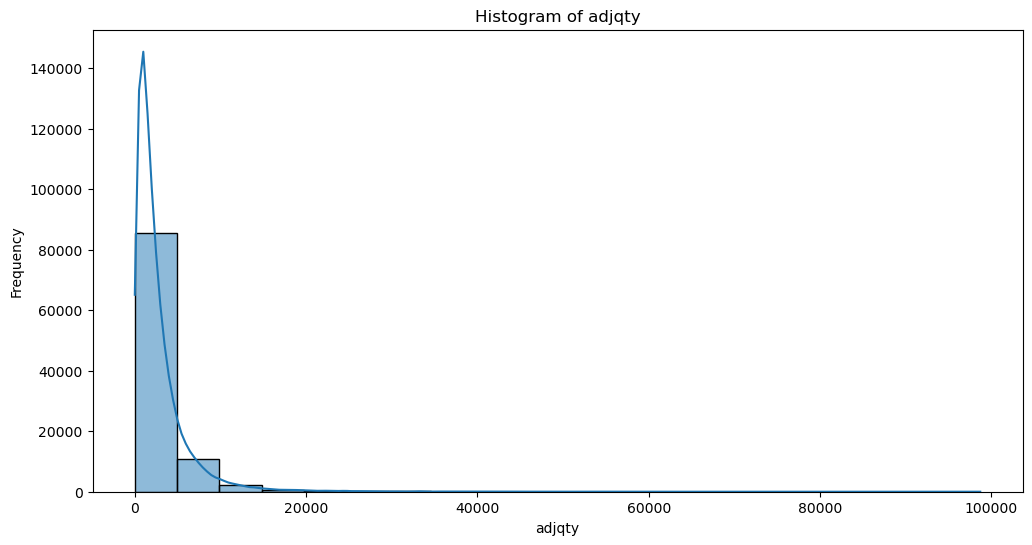

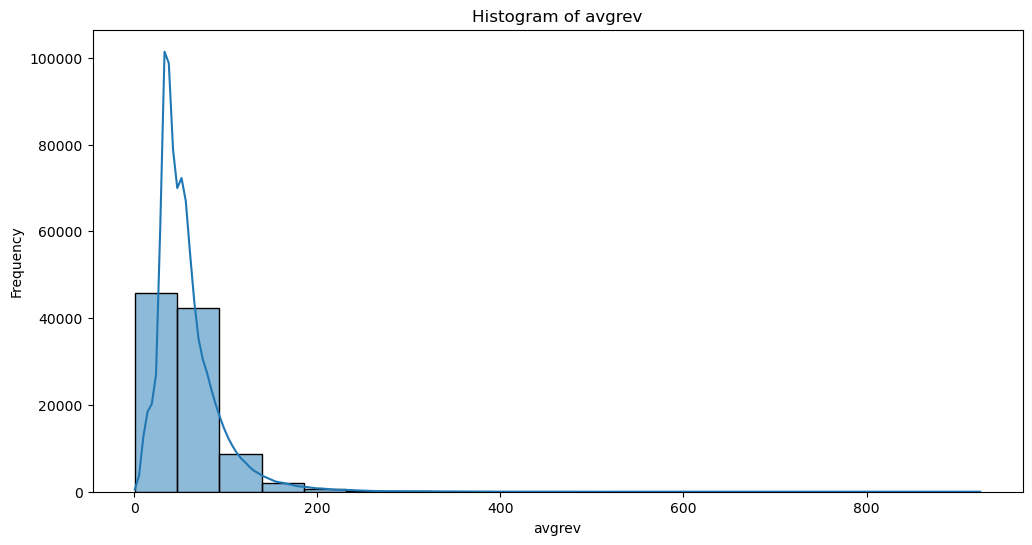

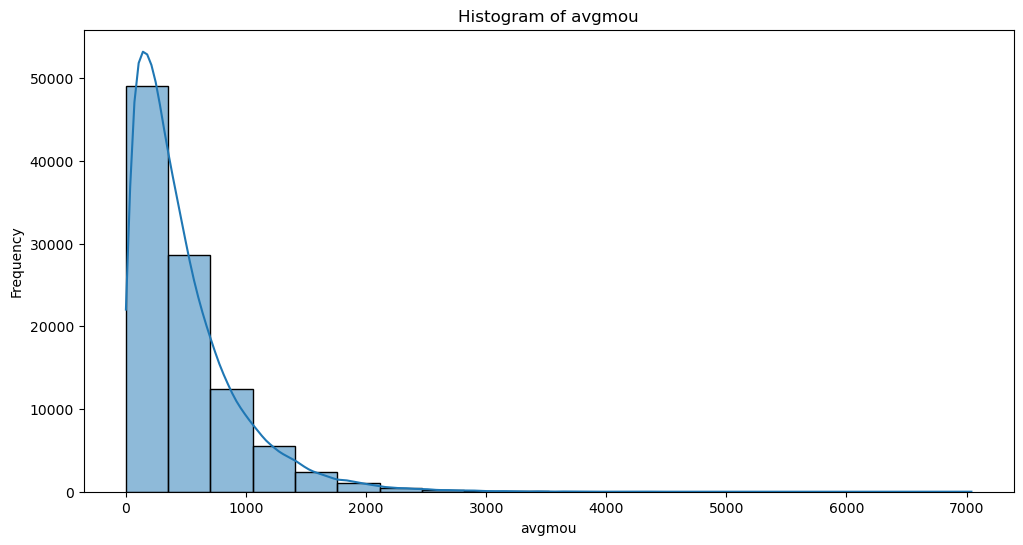

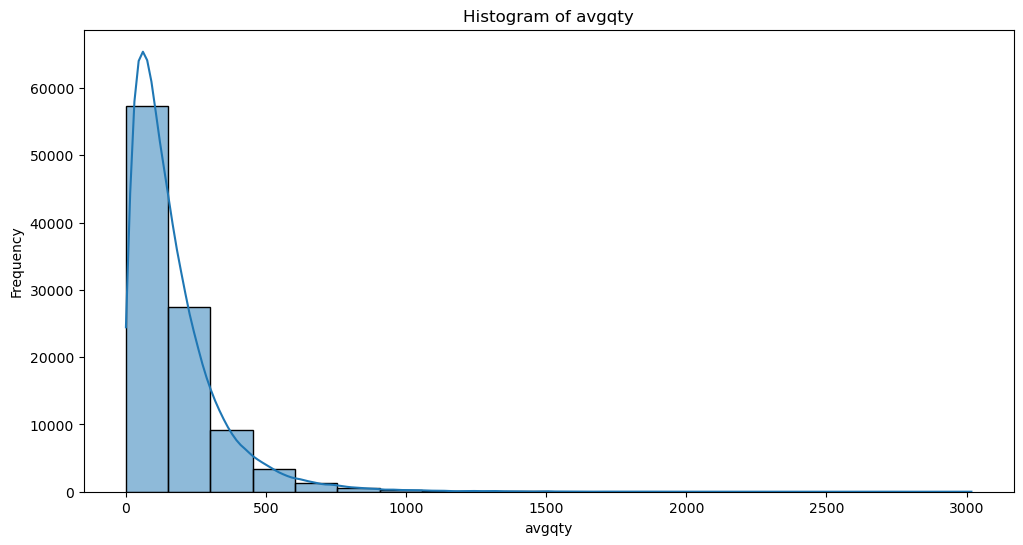

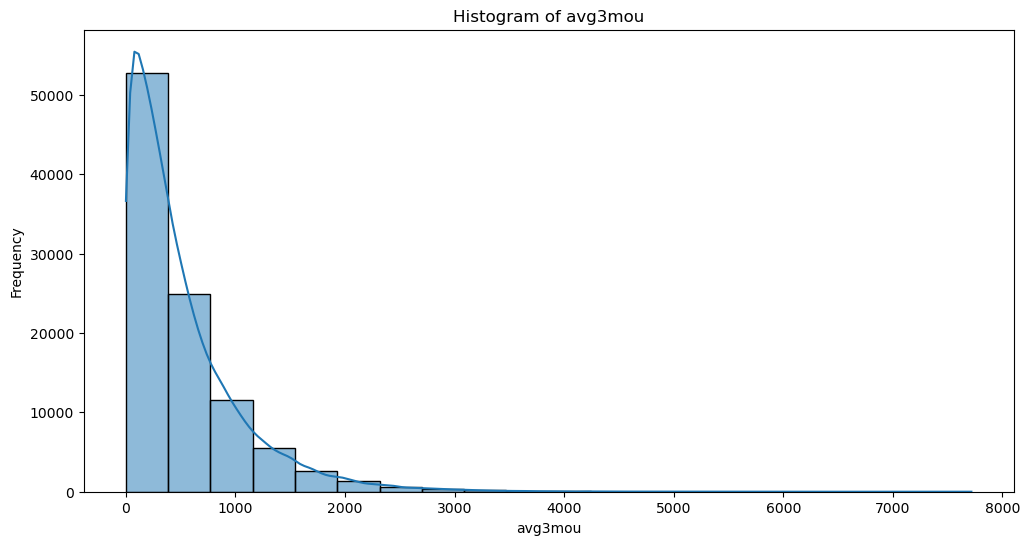

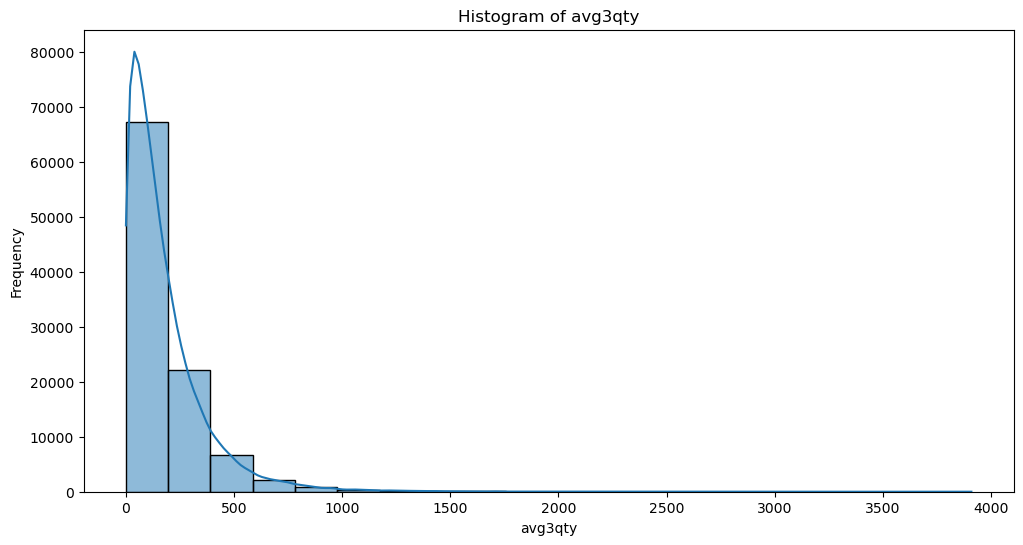

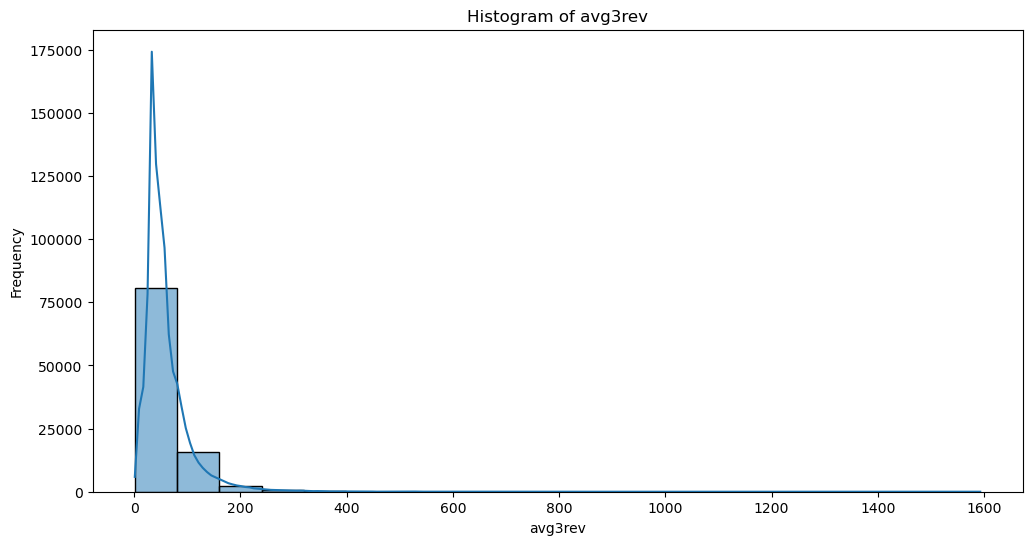

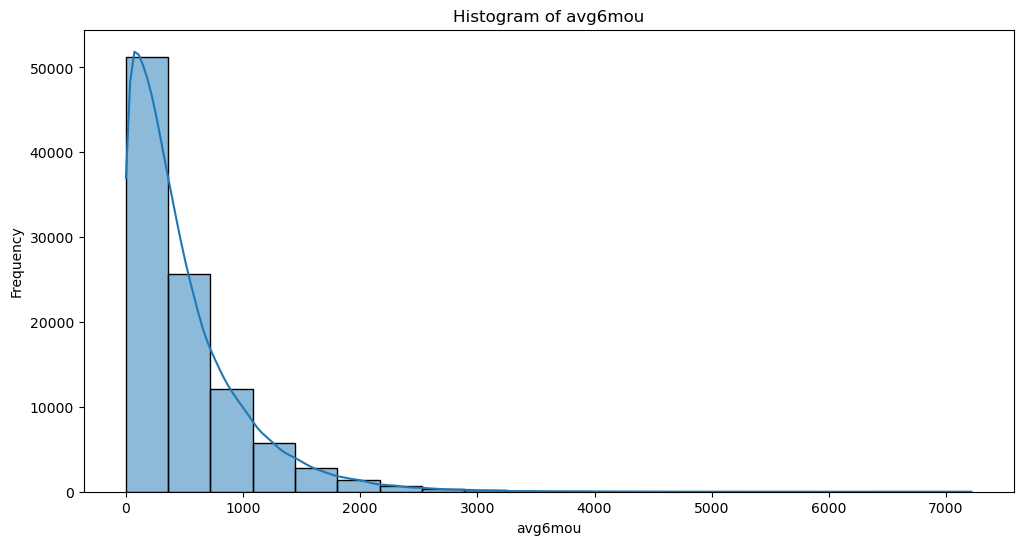

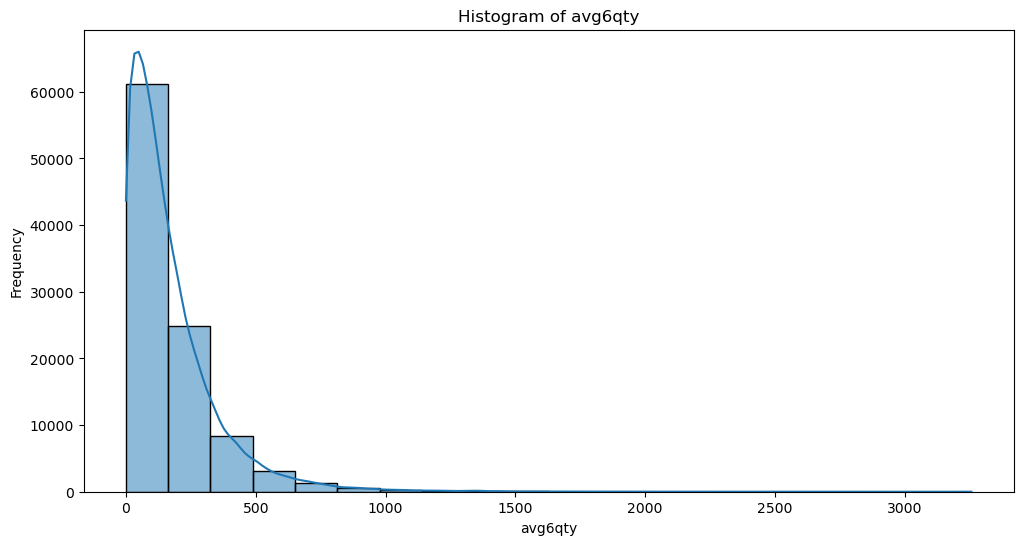

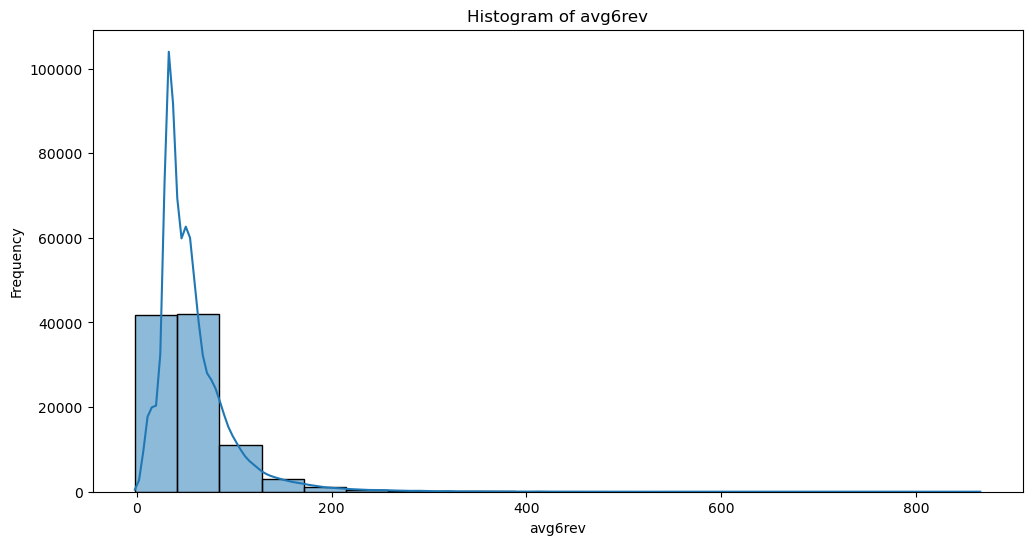

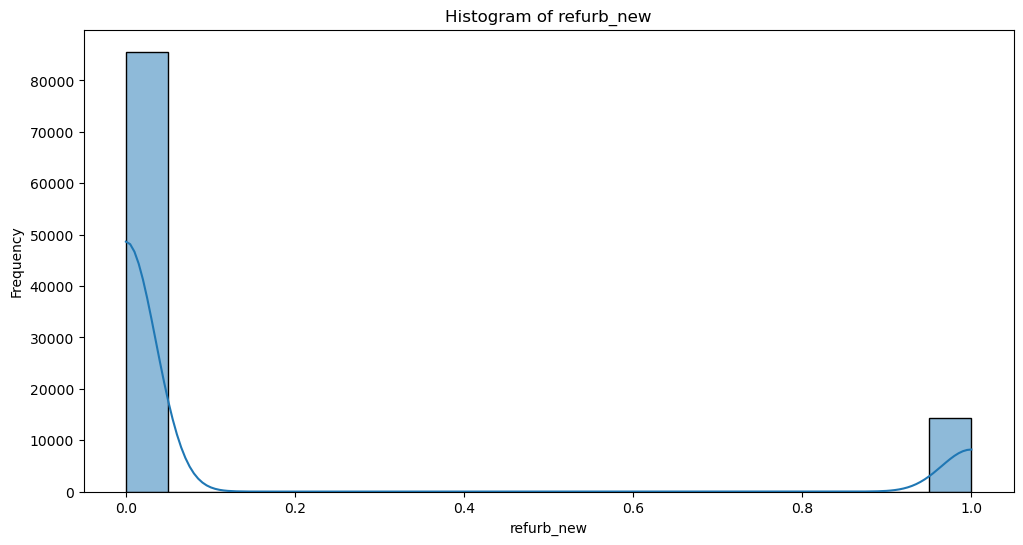

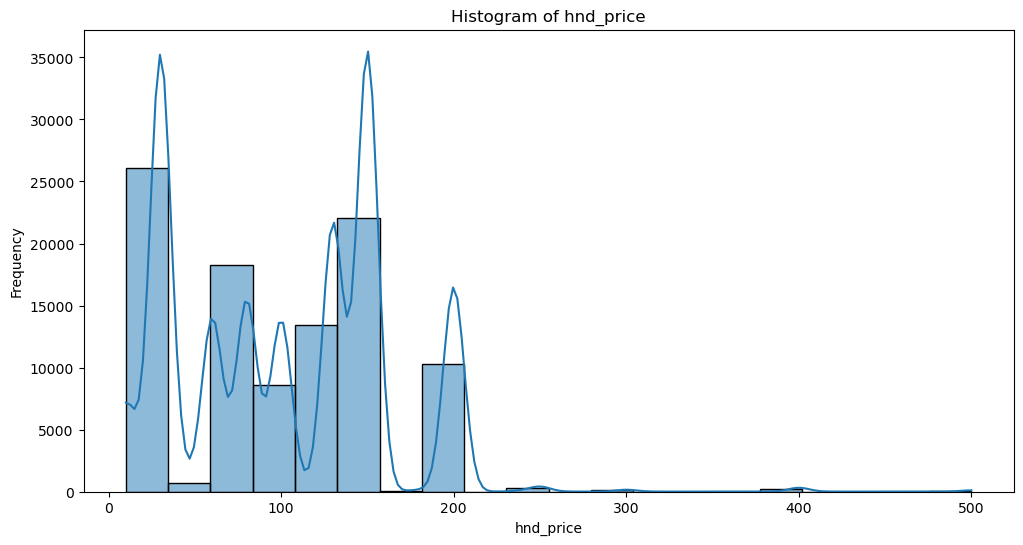

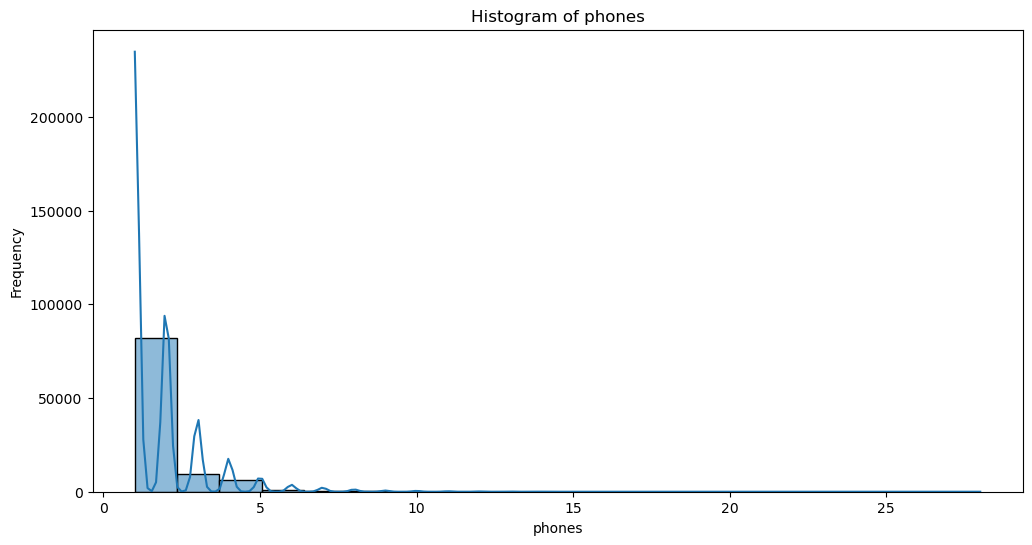

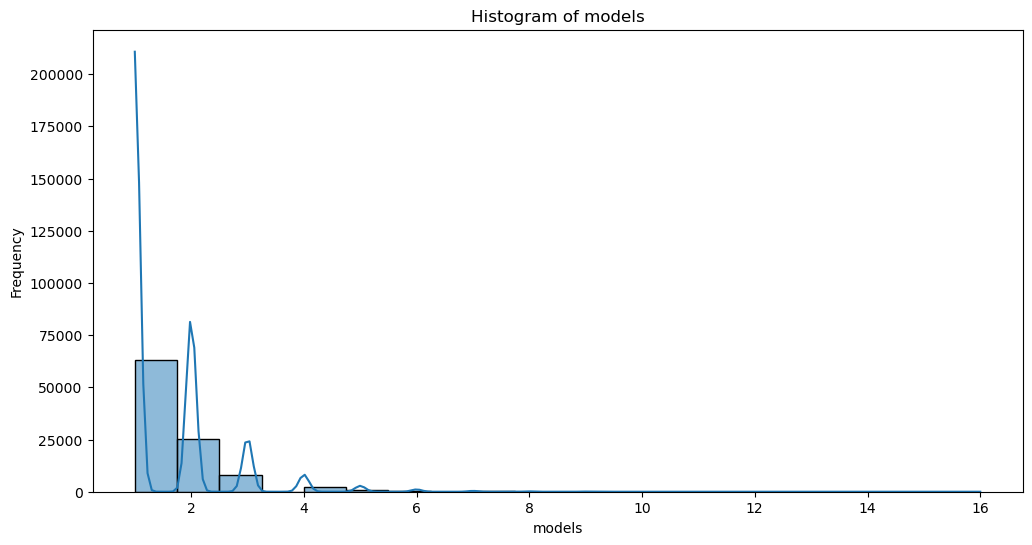

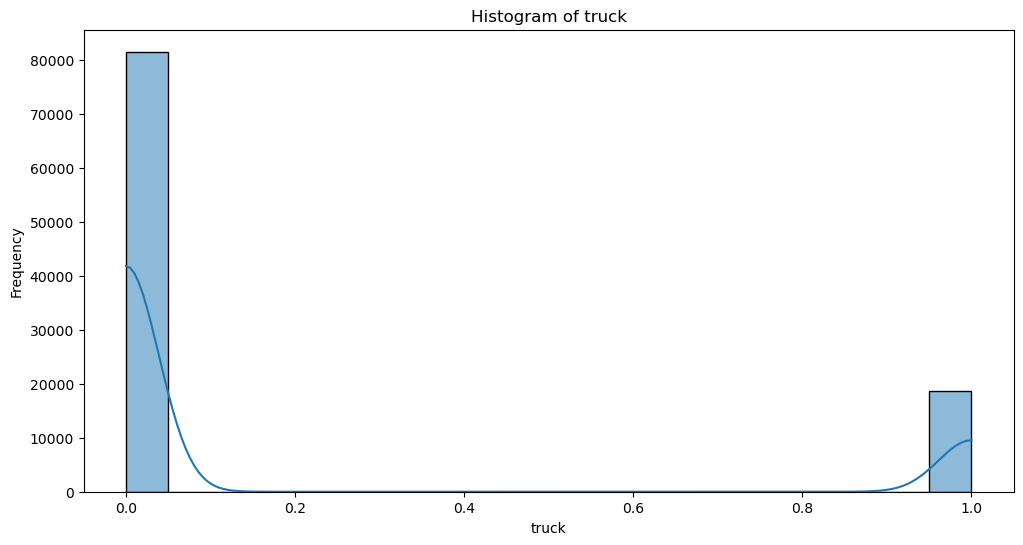

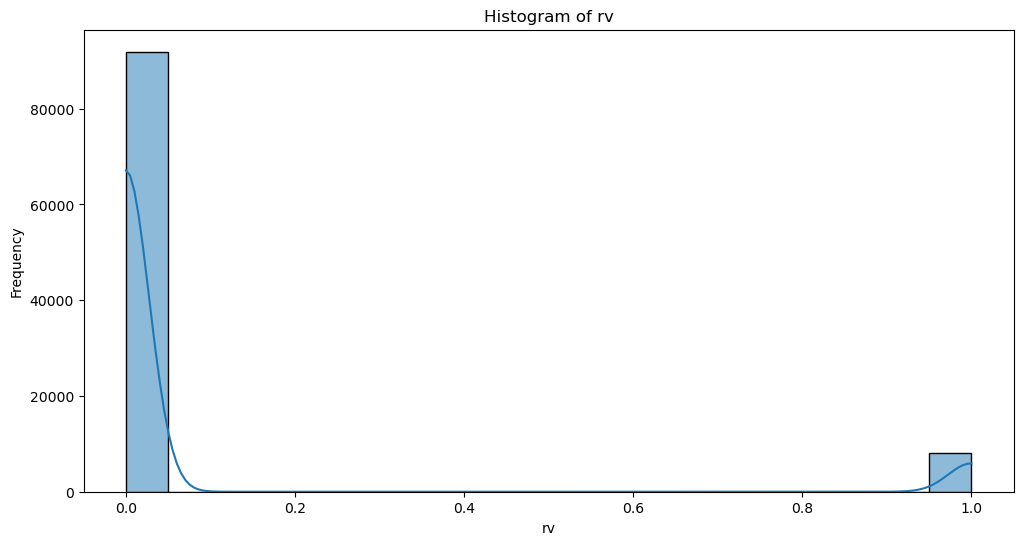

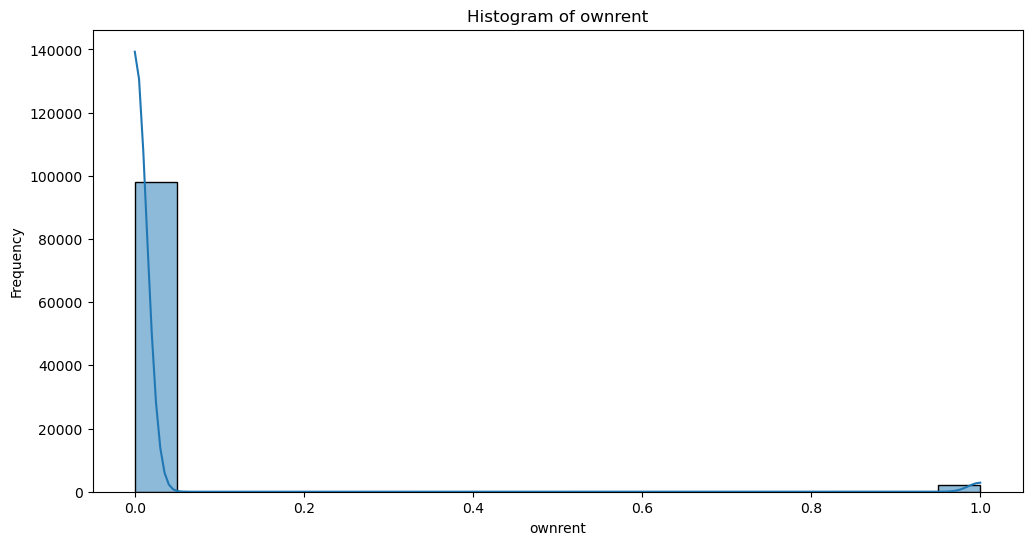

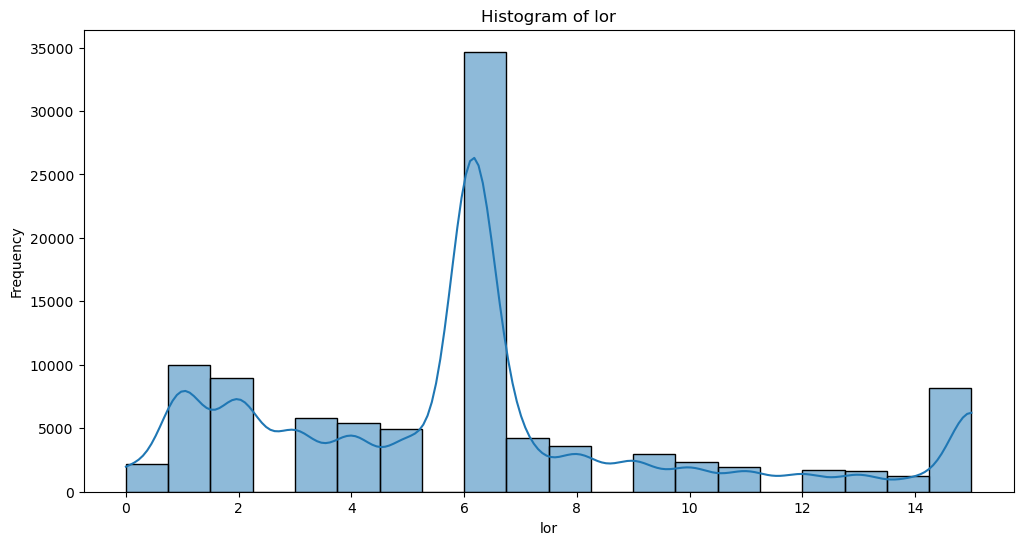

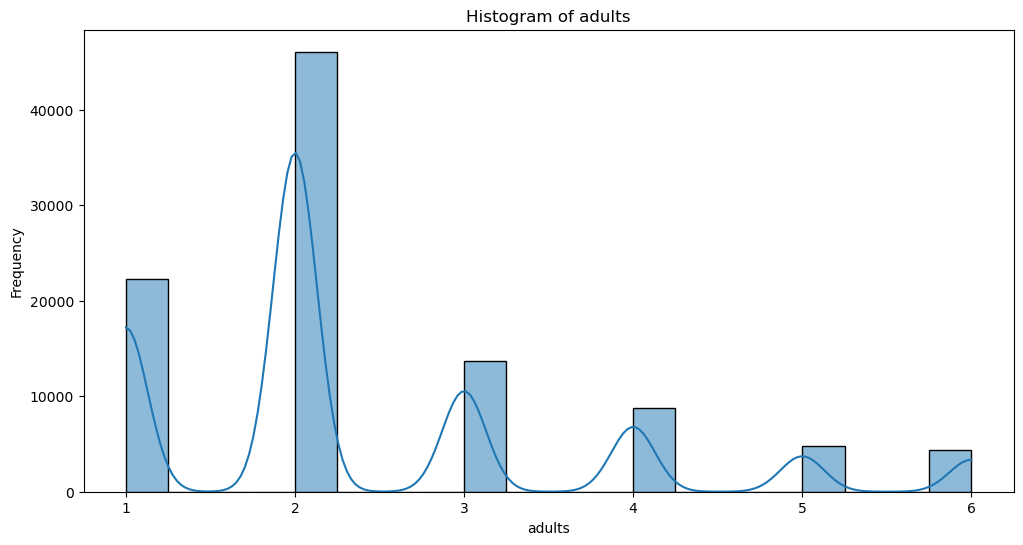

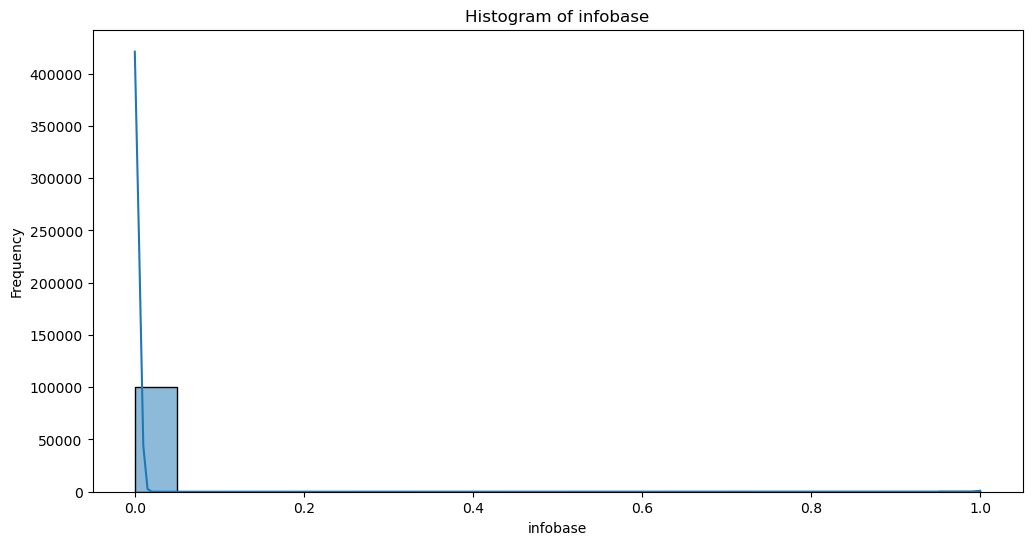

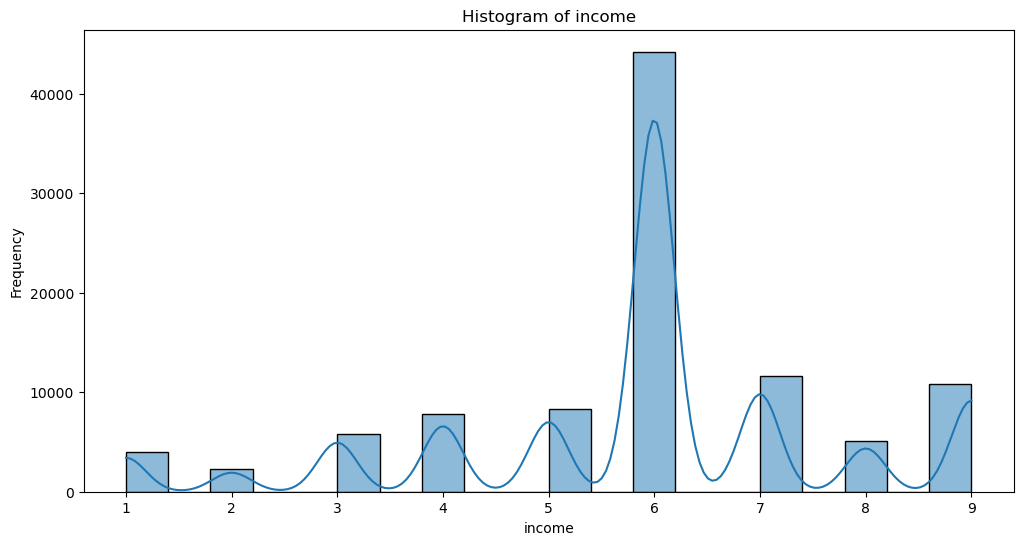

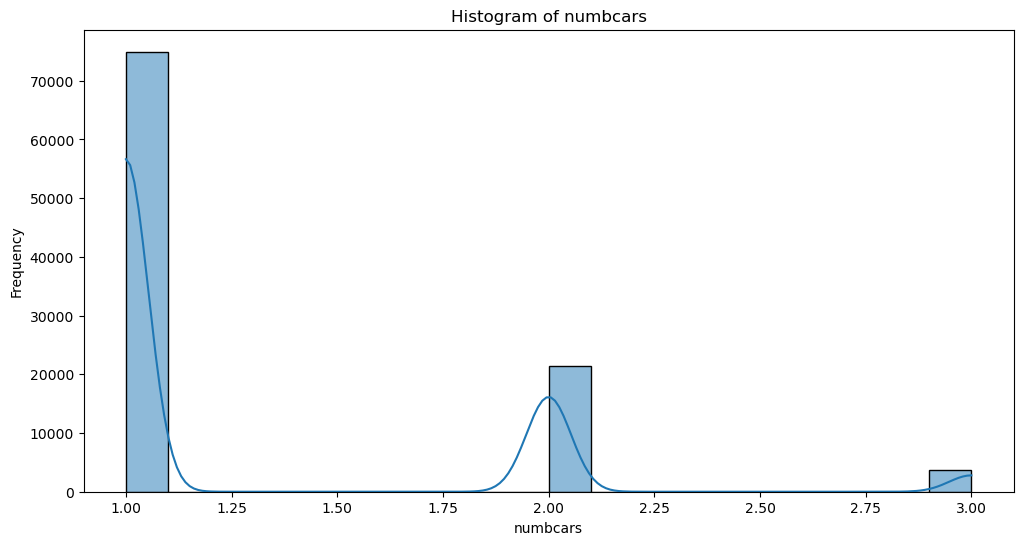

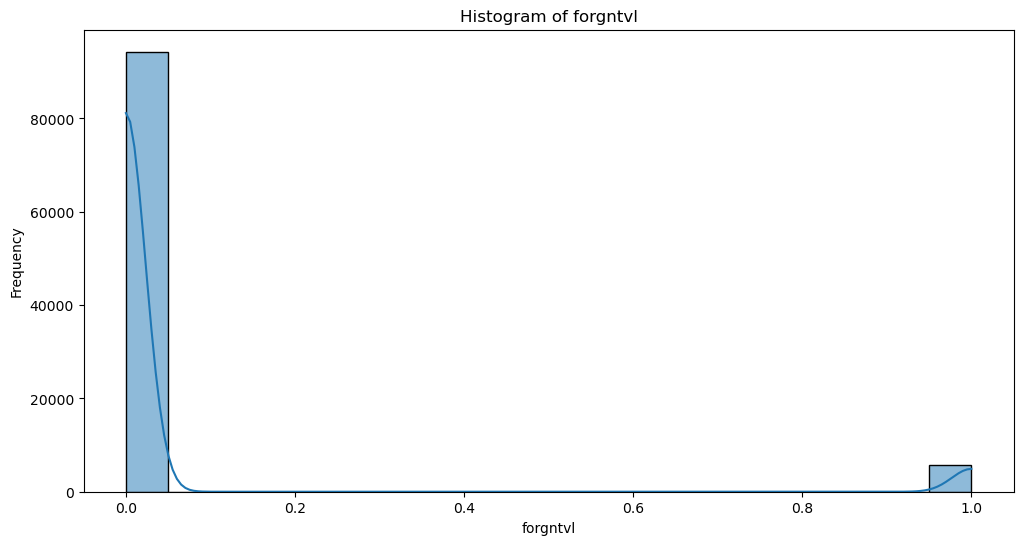

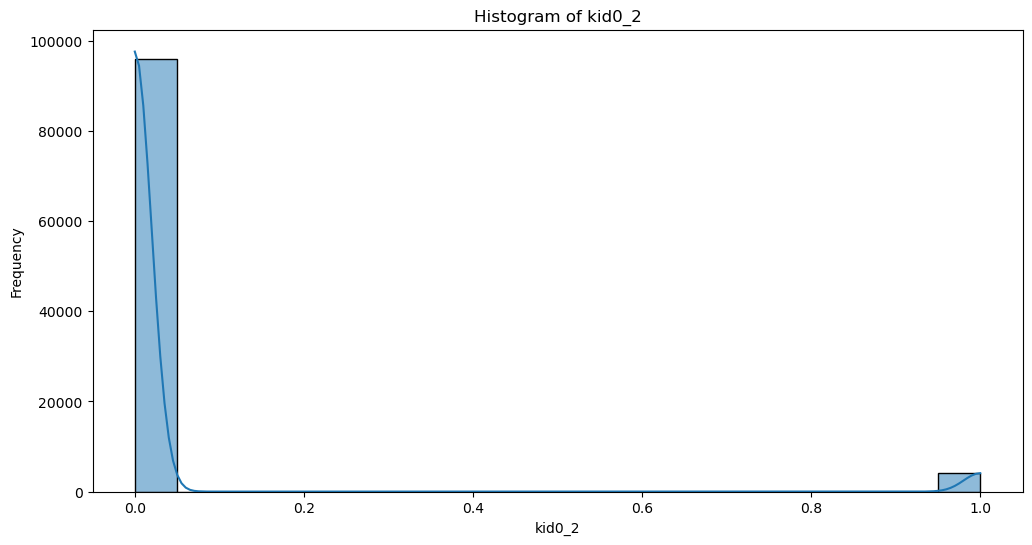

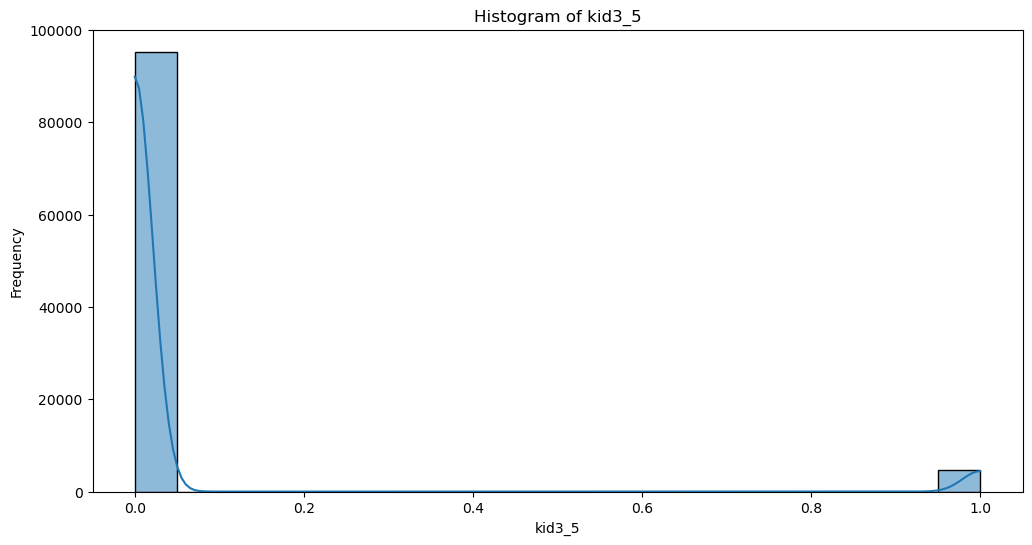

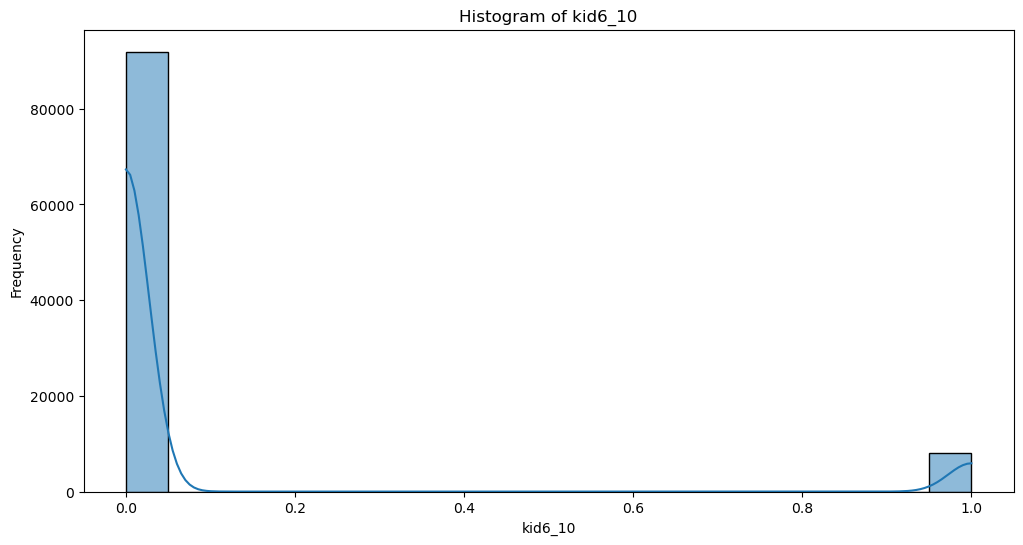

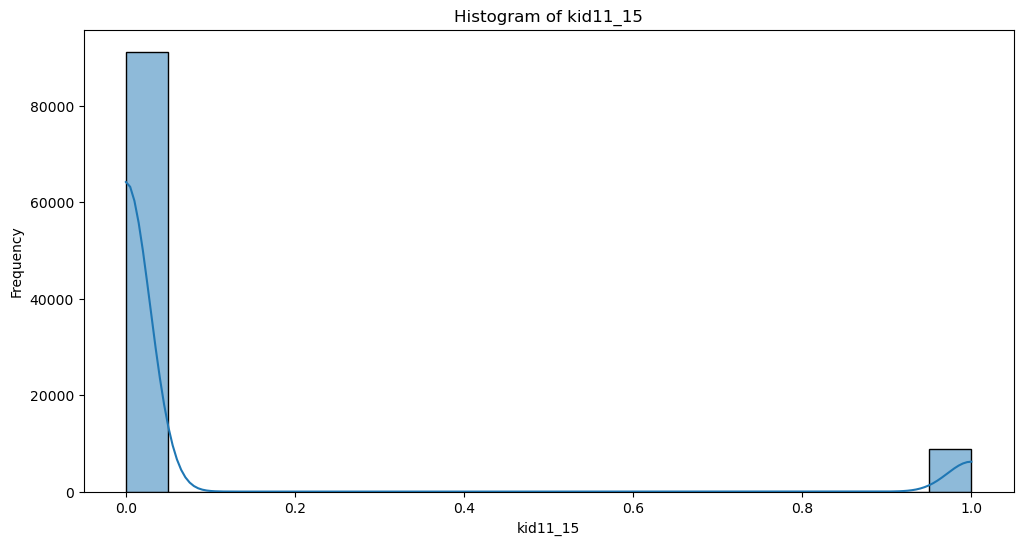

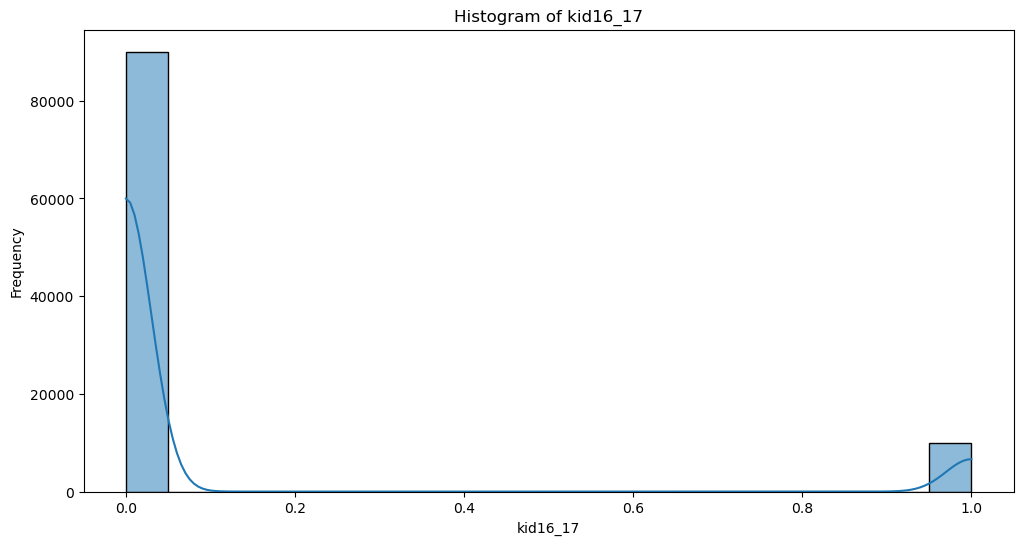

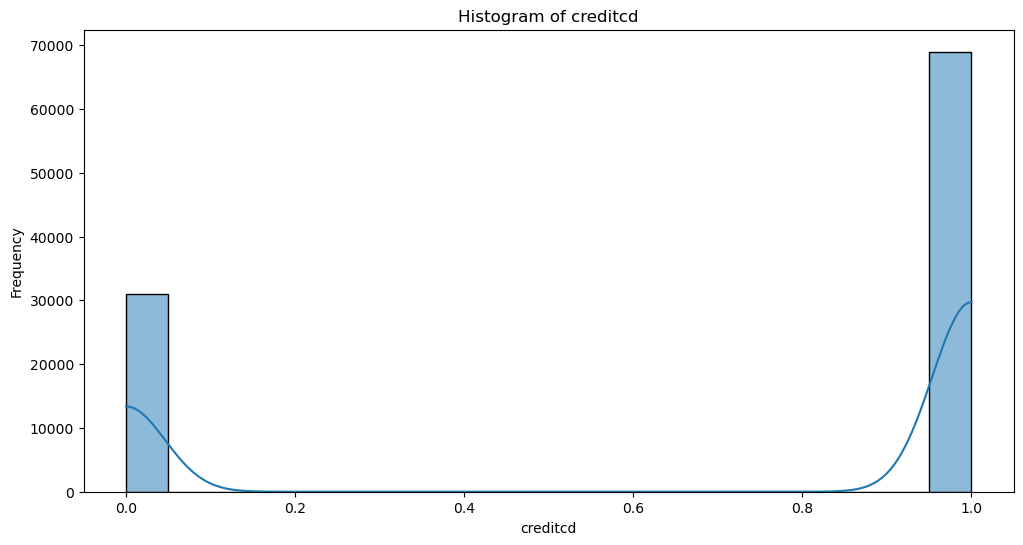

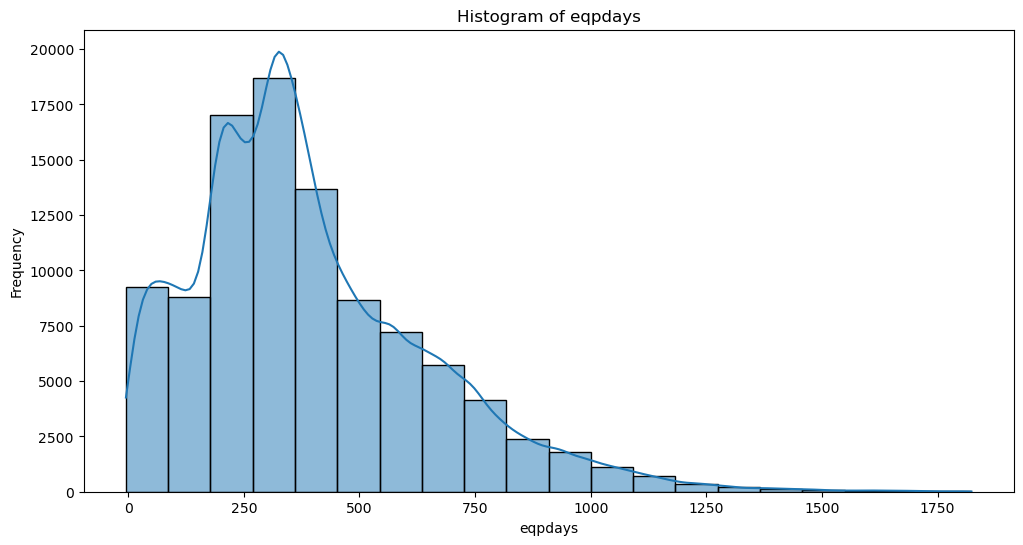

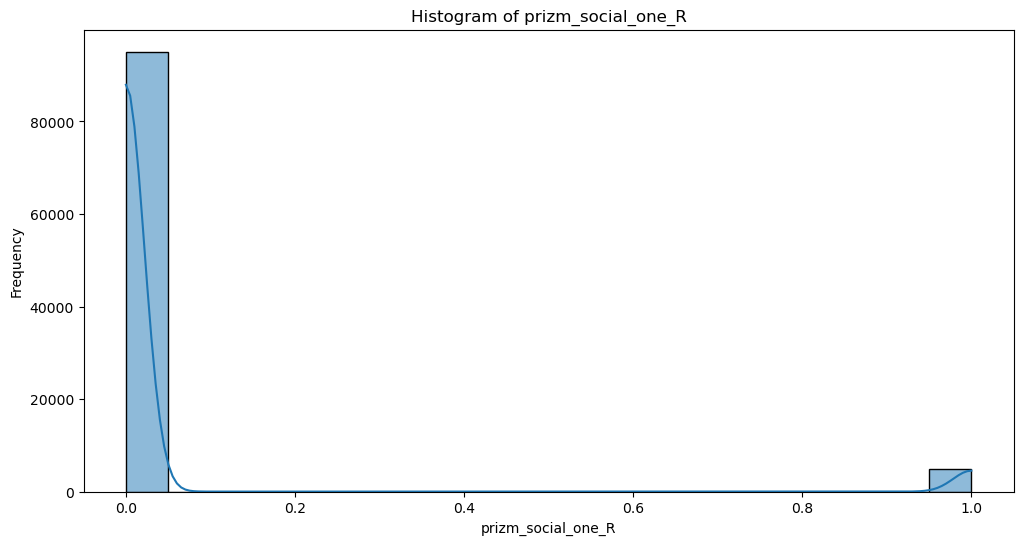

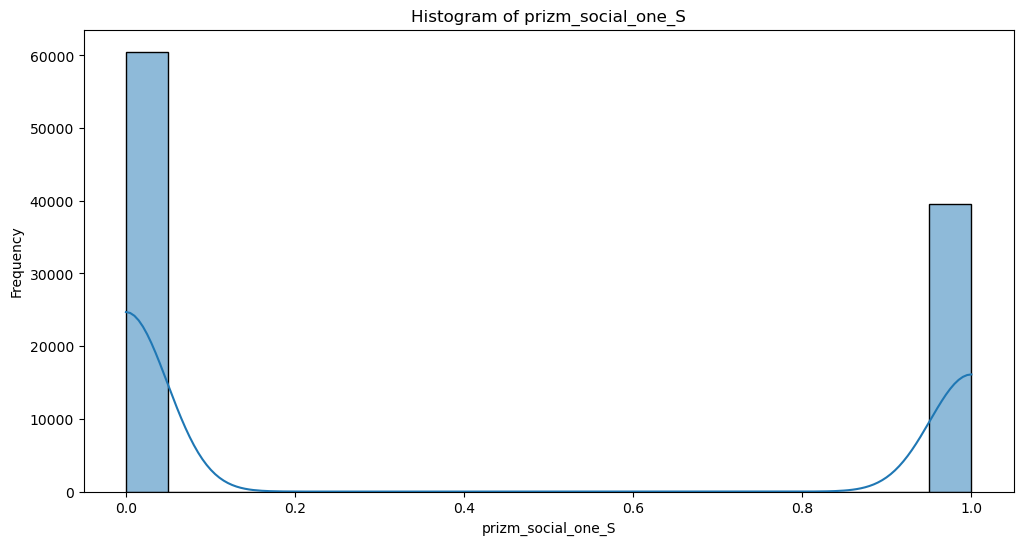

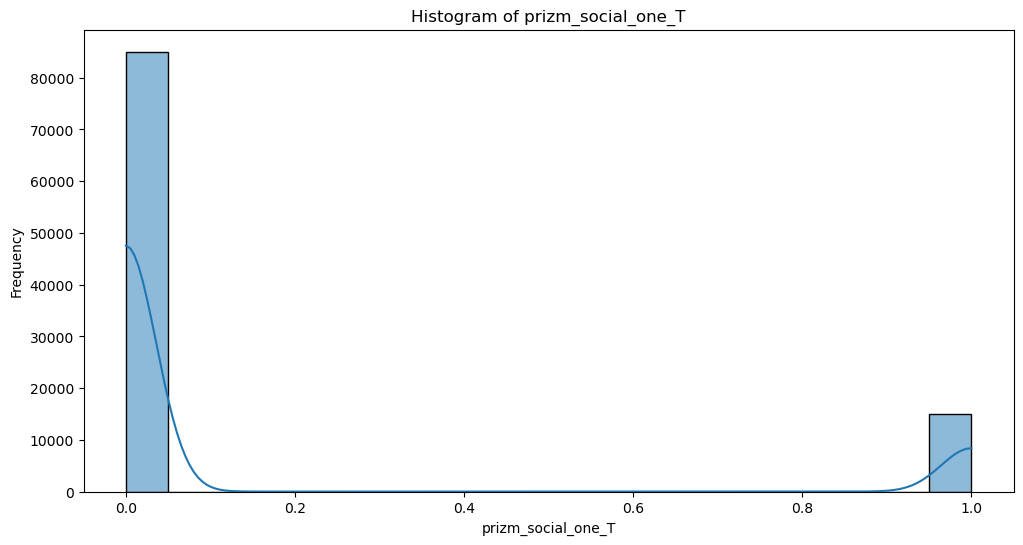

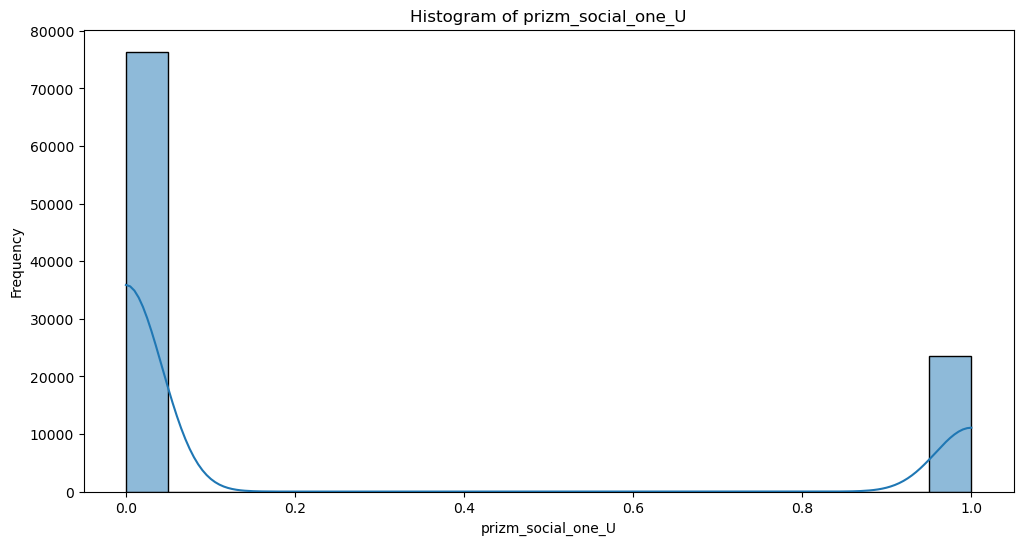

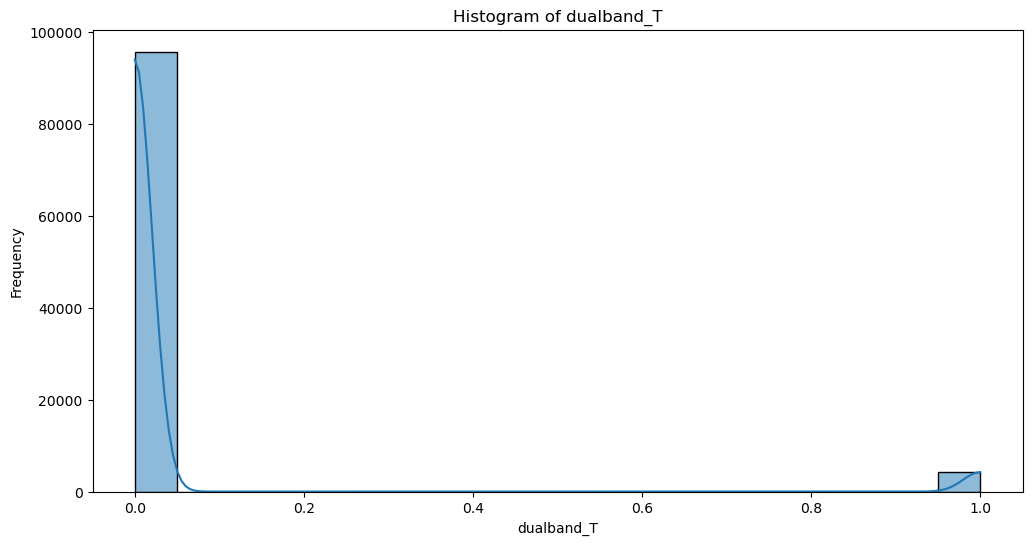

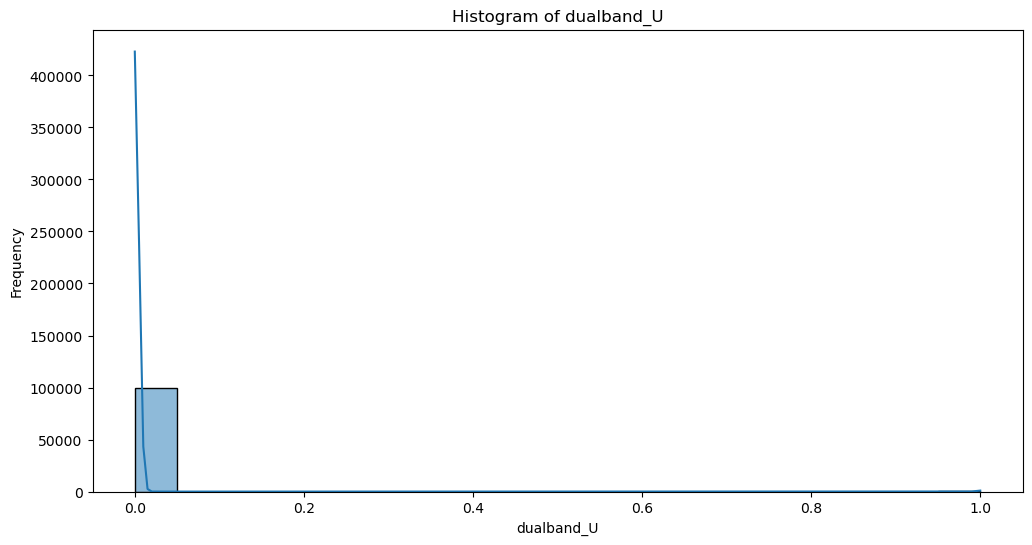

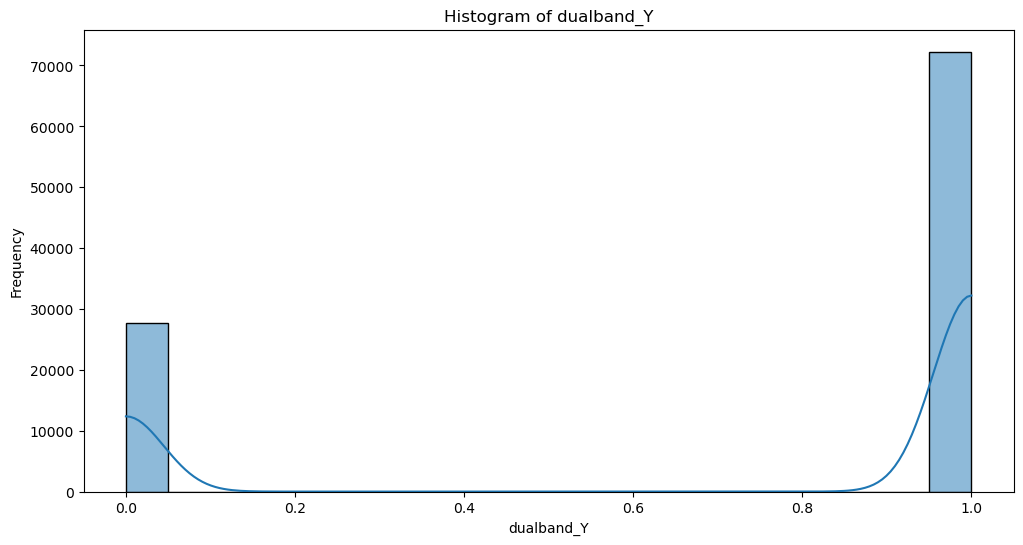

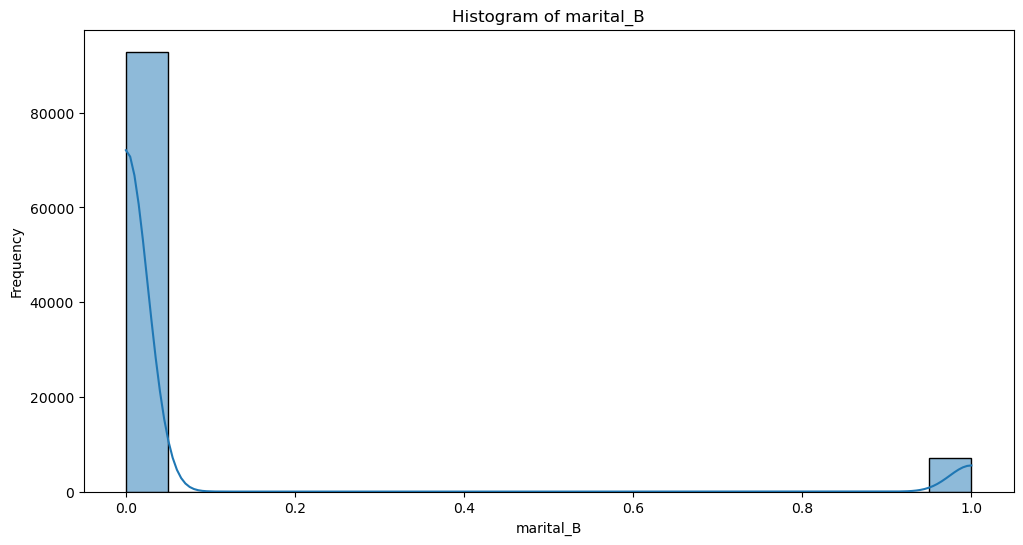

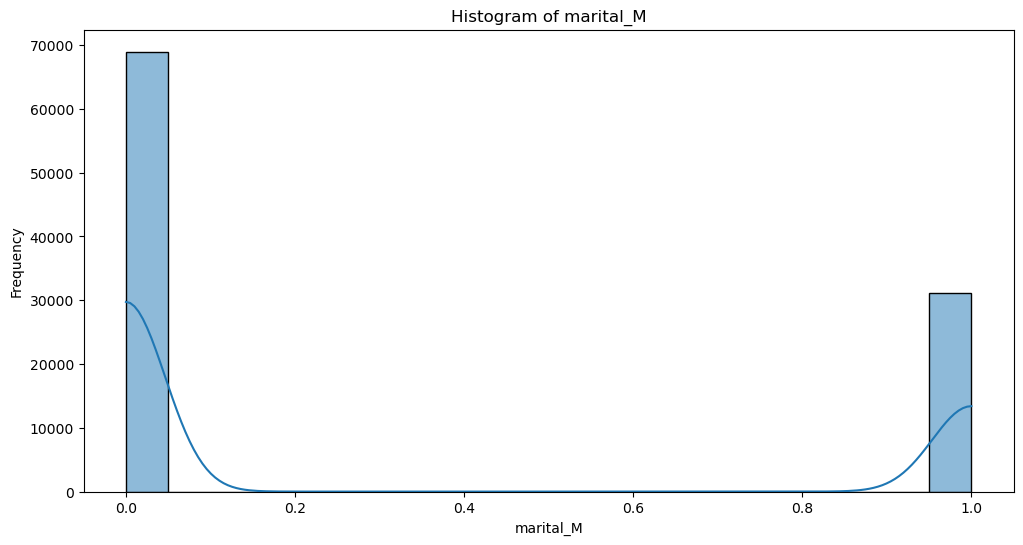

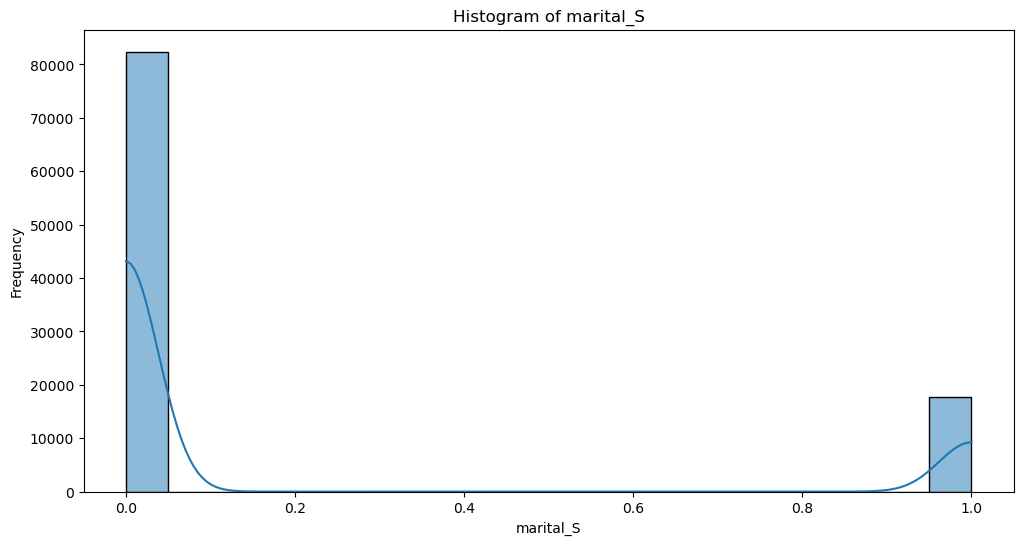

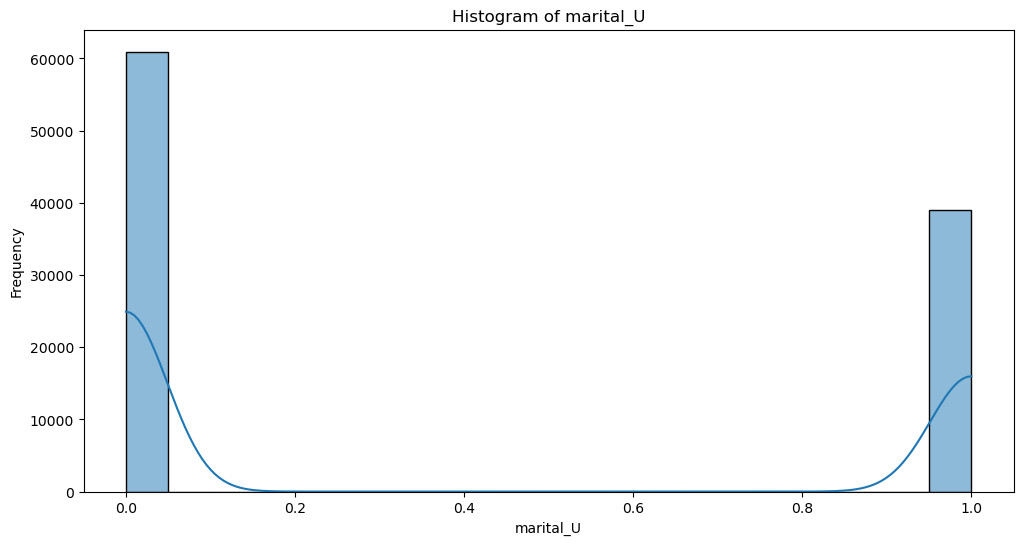

In [33]:
# Гистограммы
for column in df.columns:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


#### Построим Boxplots

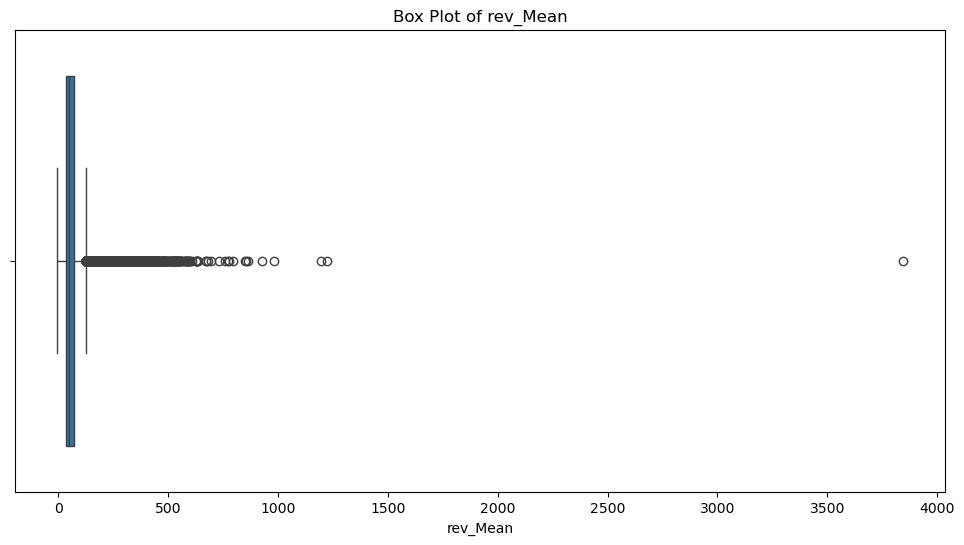

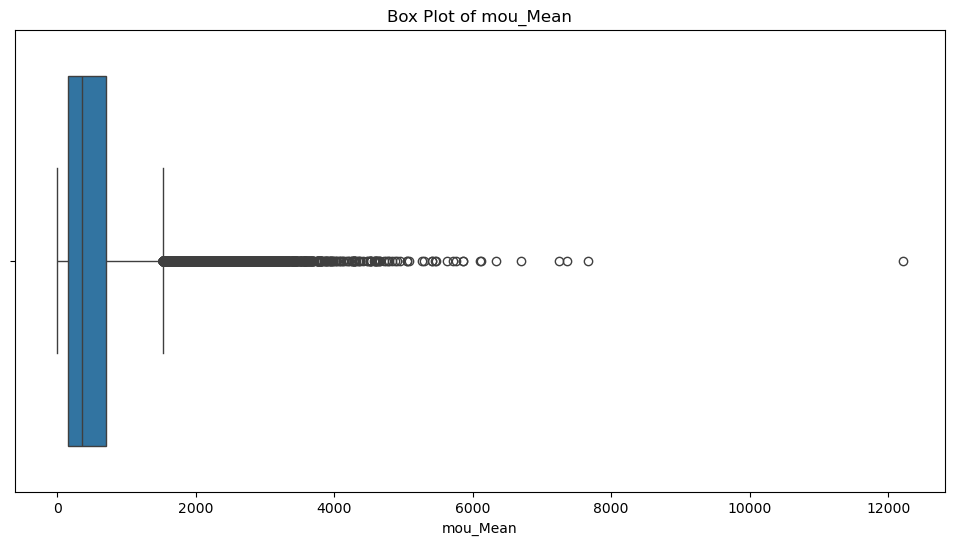

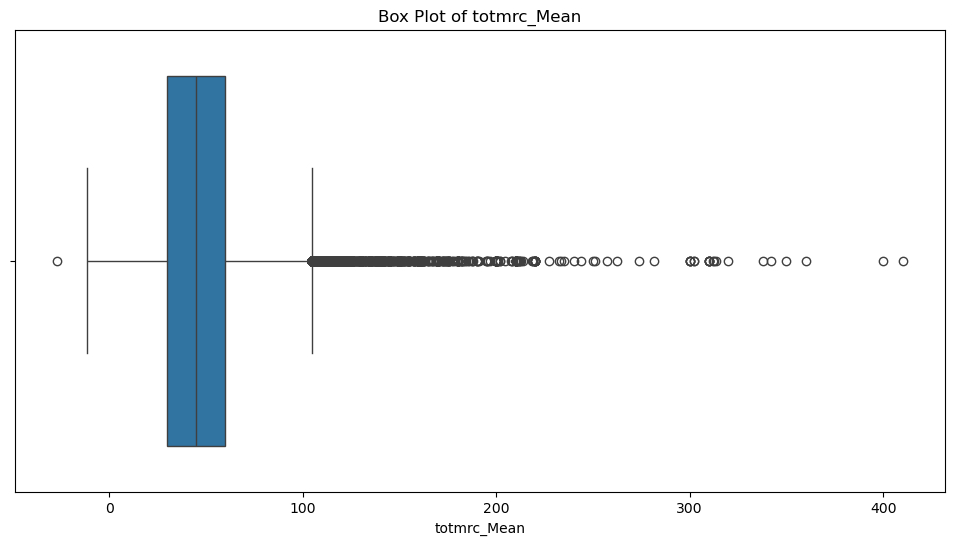

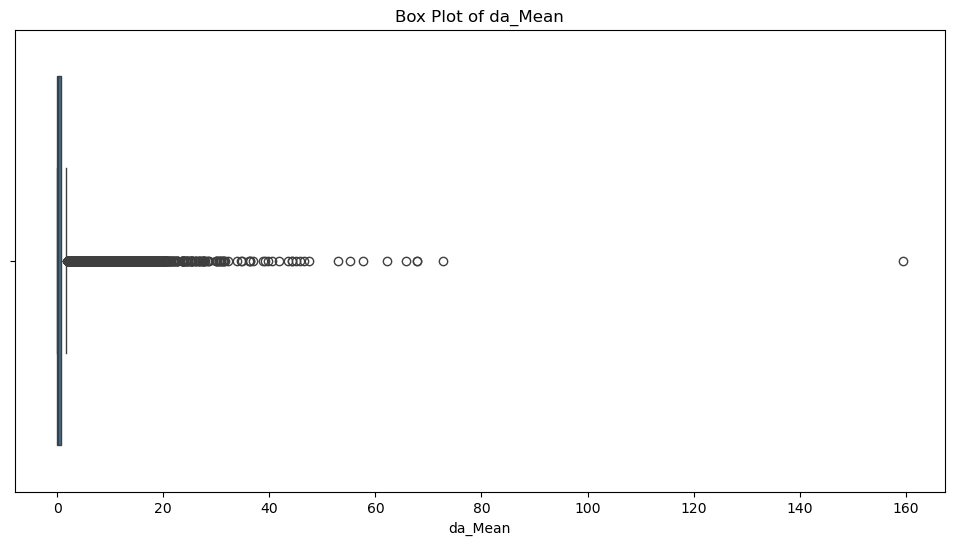

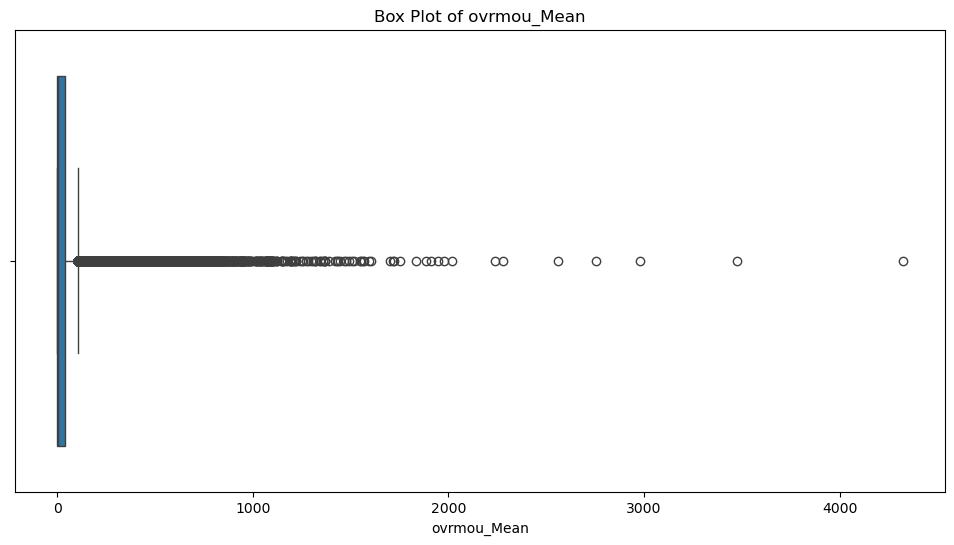

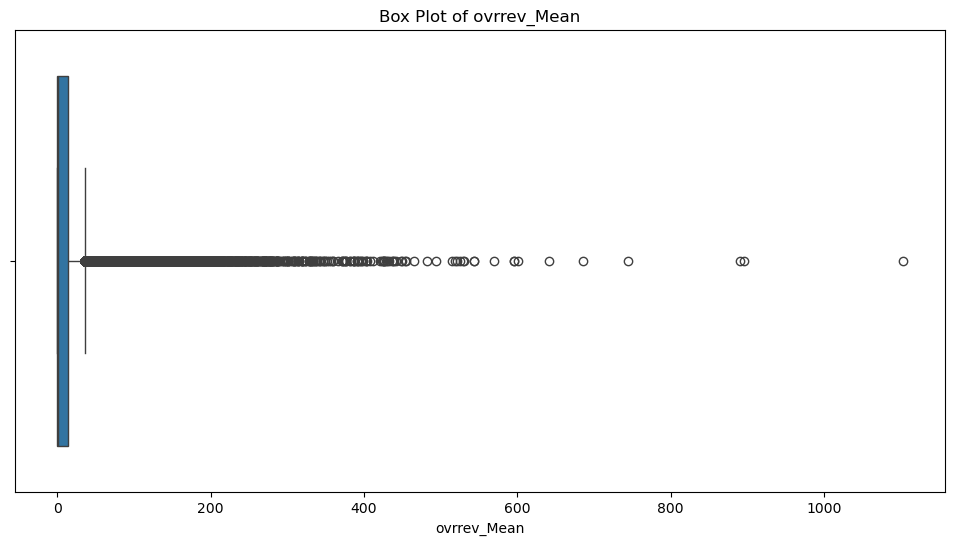

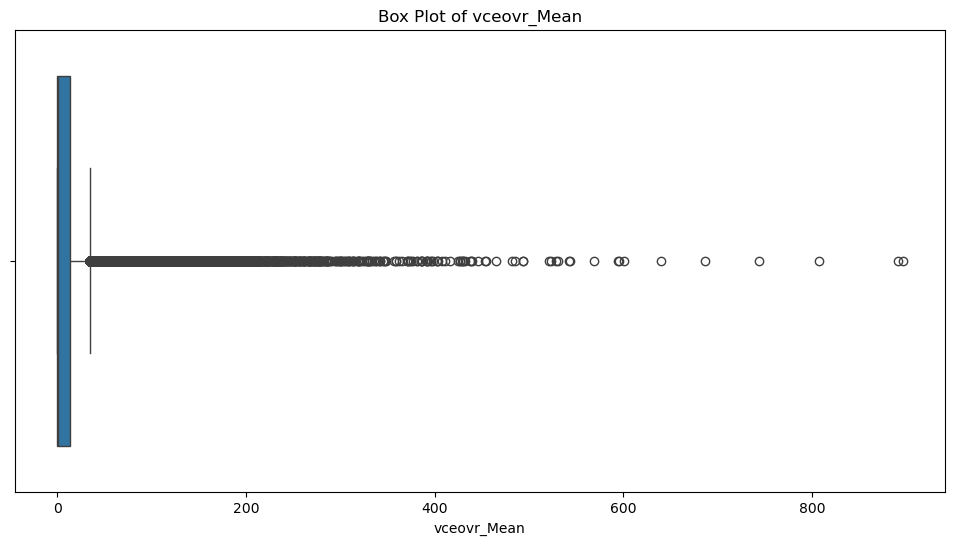

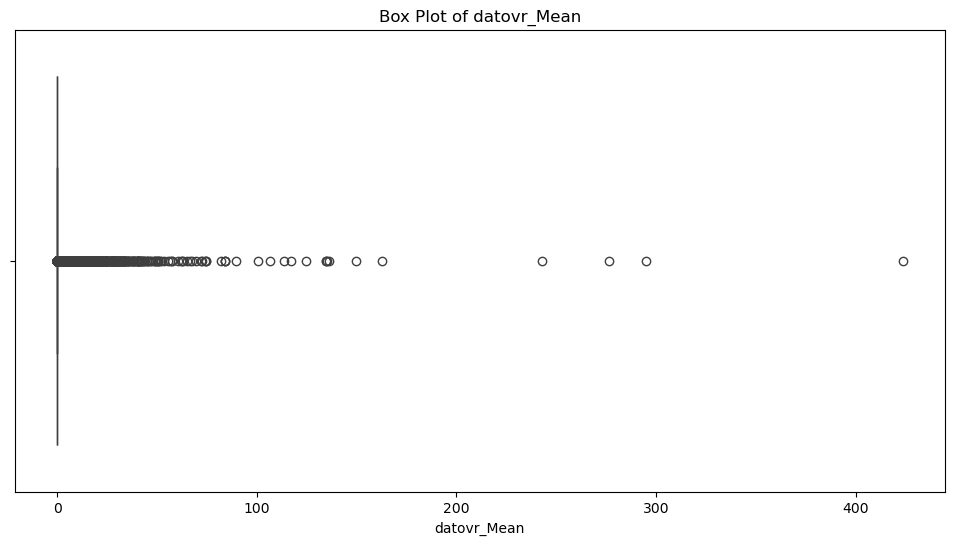

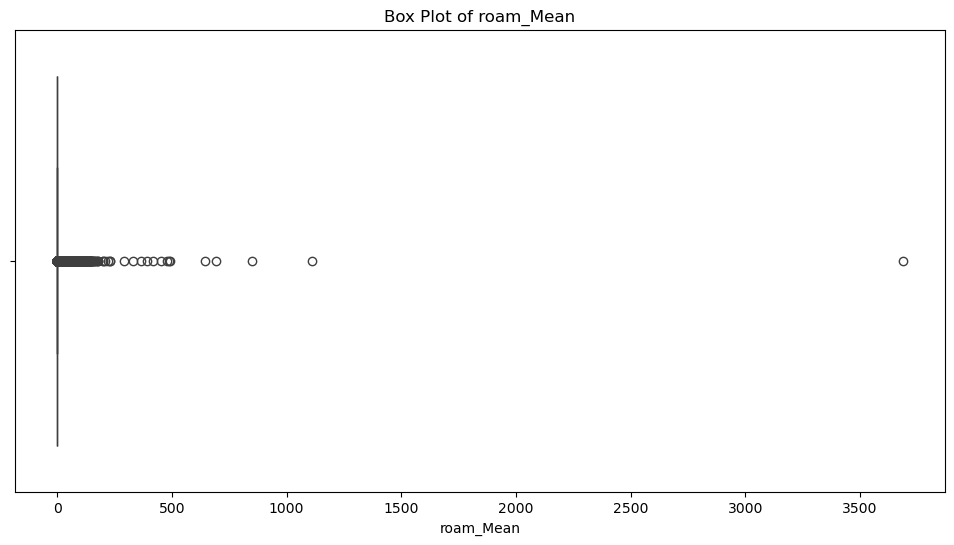

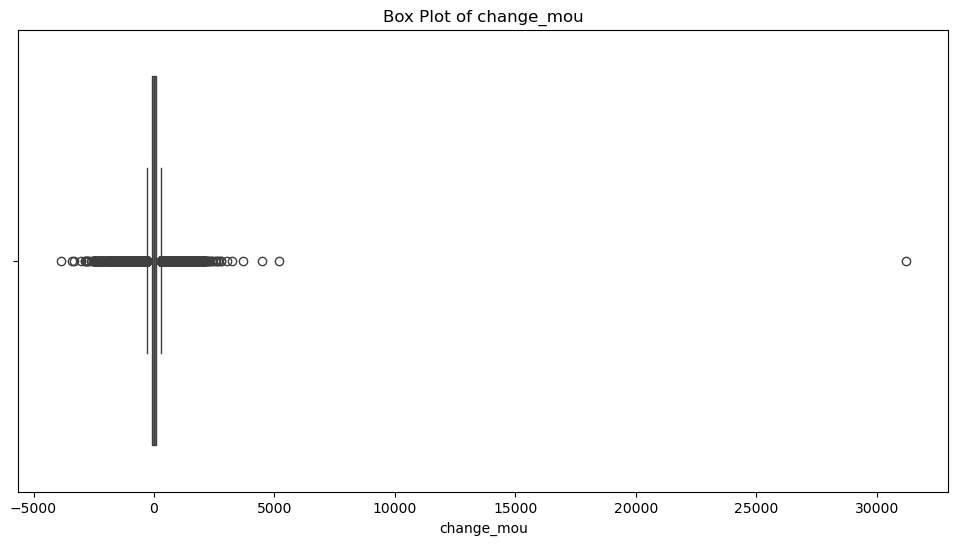

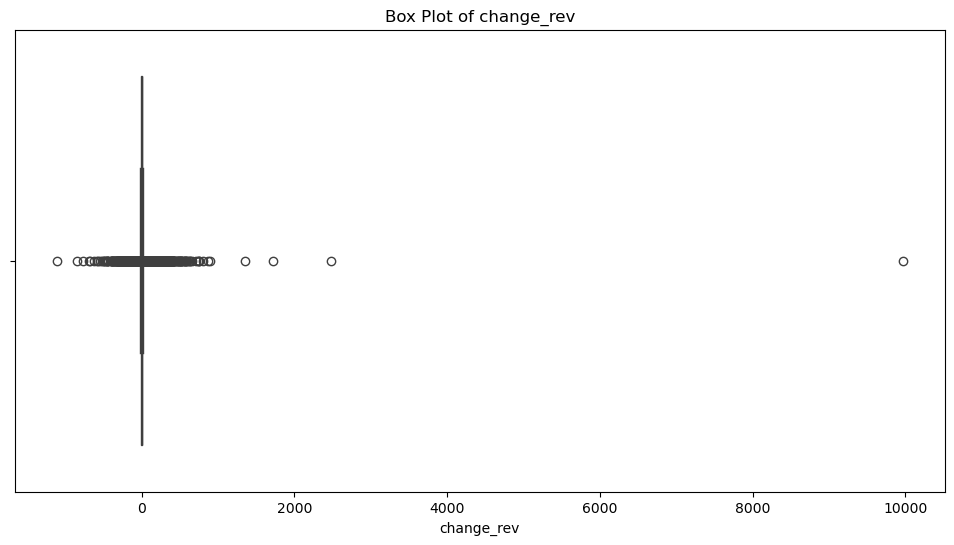

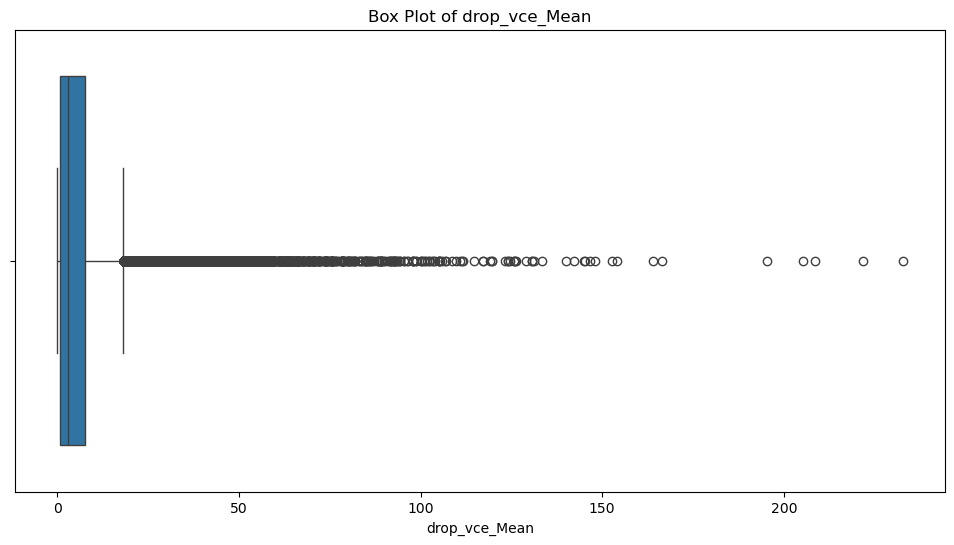

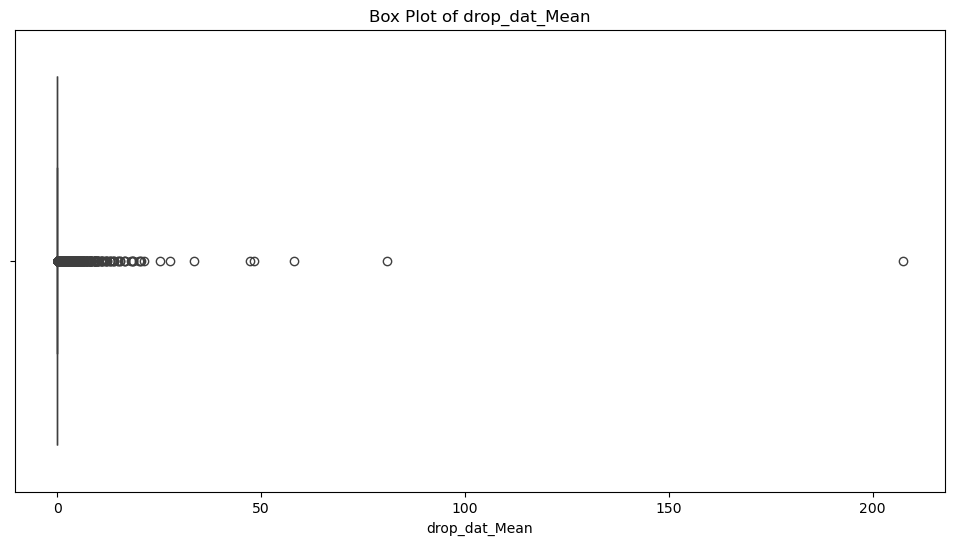

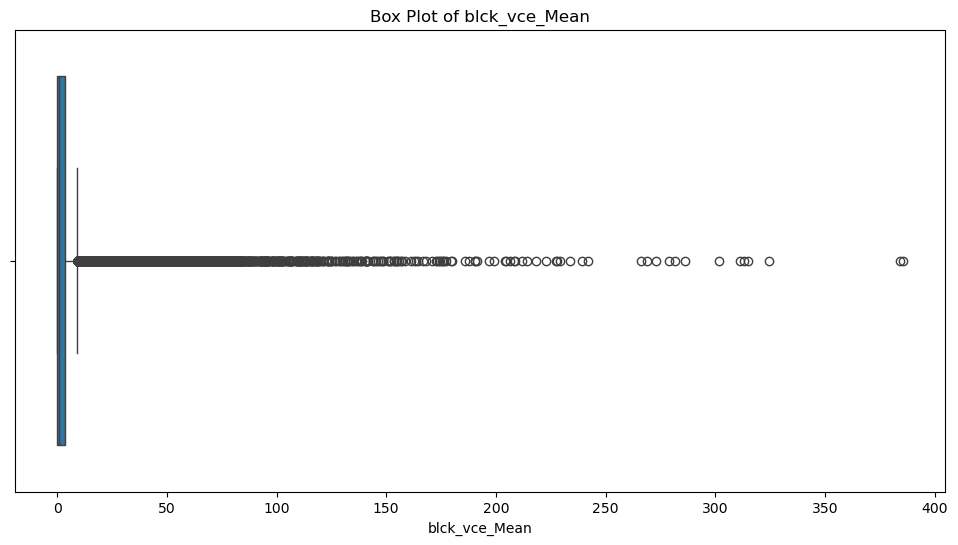

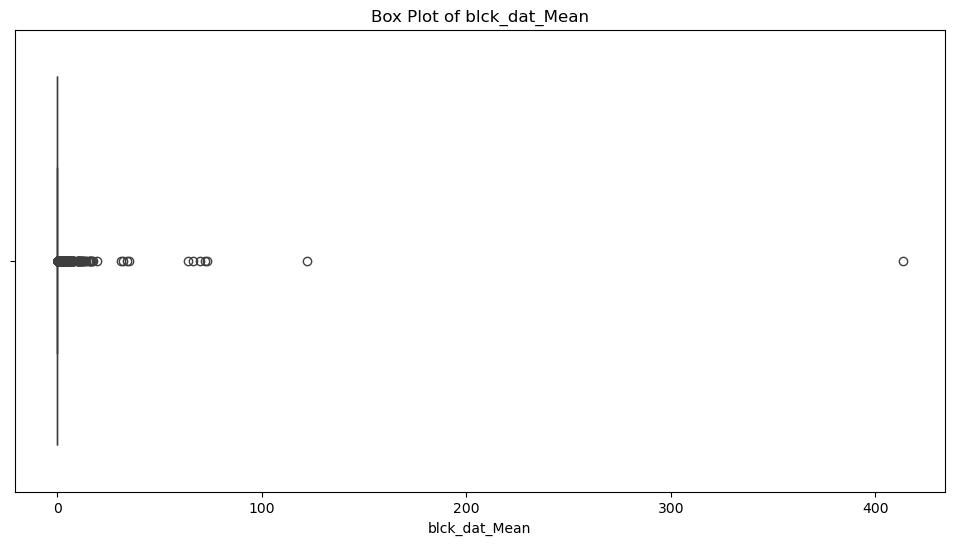

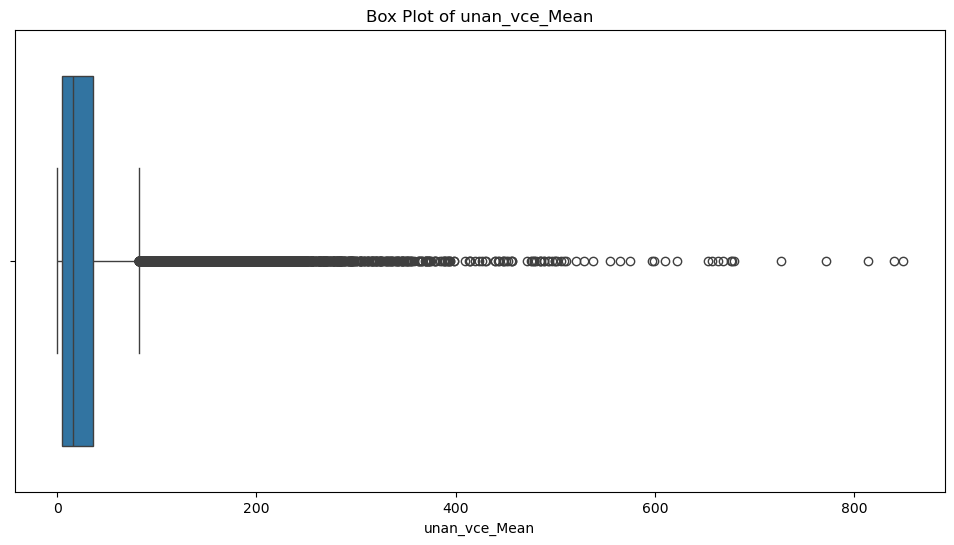

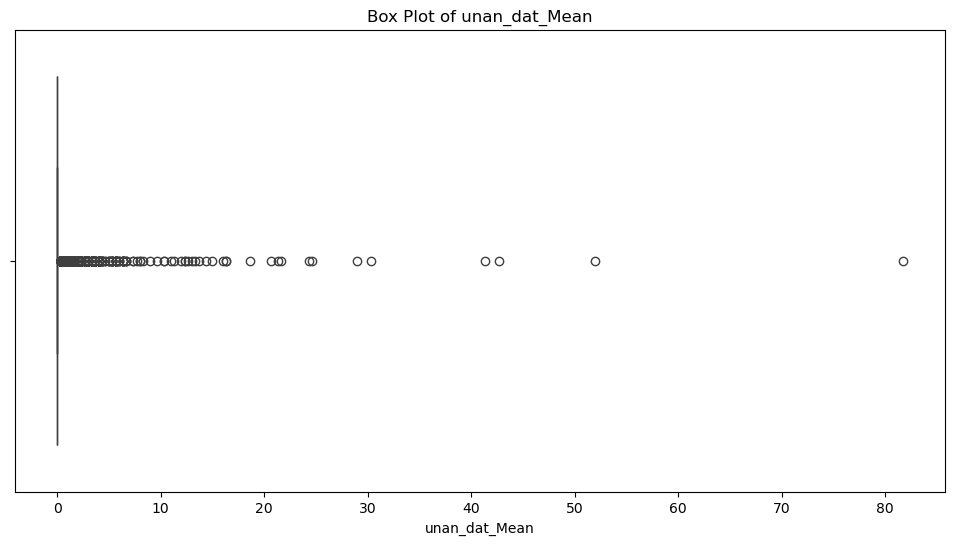

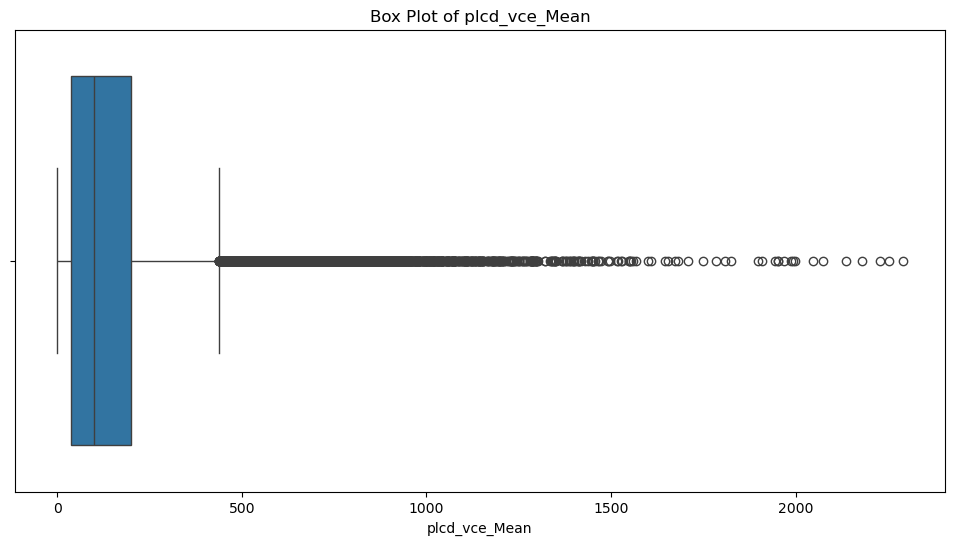

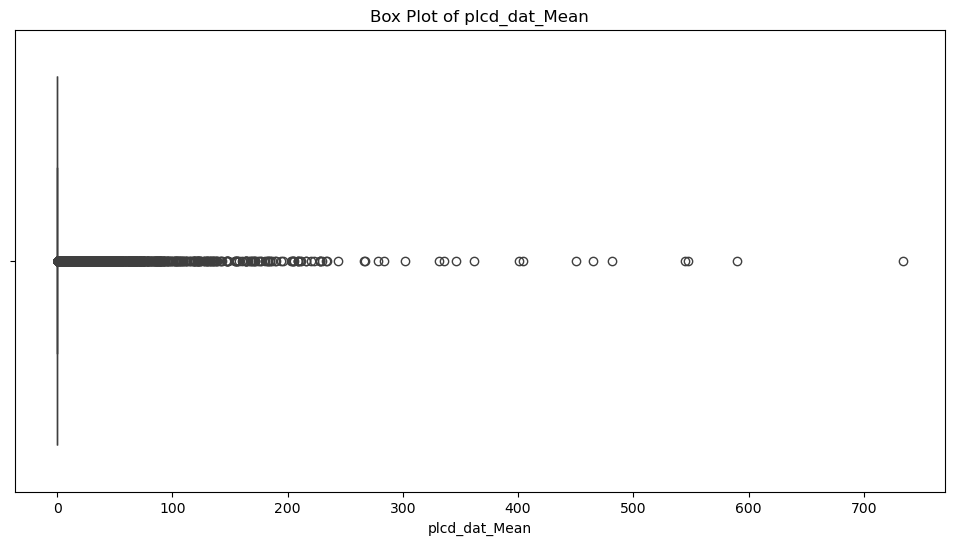

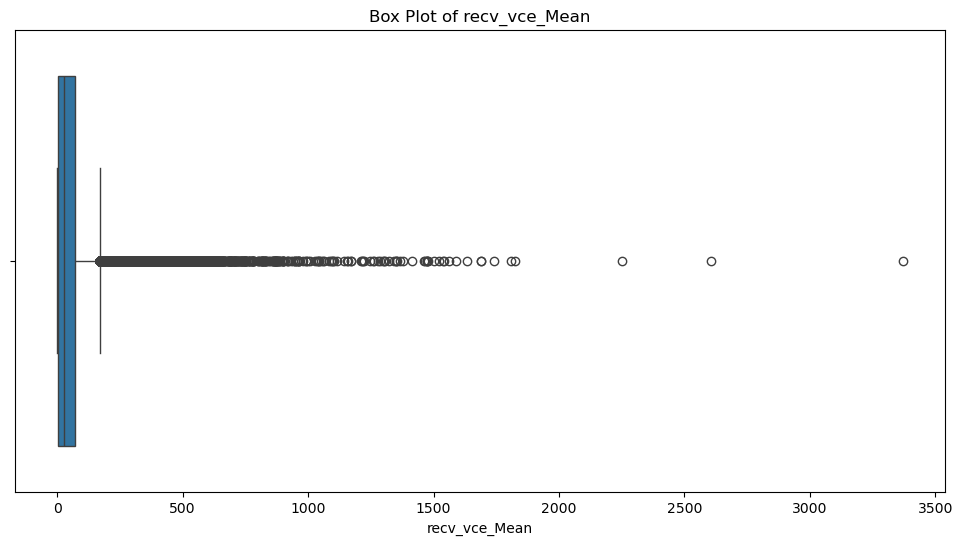

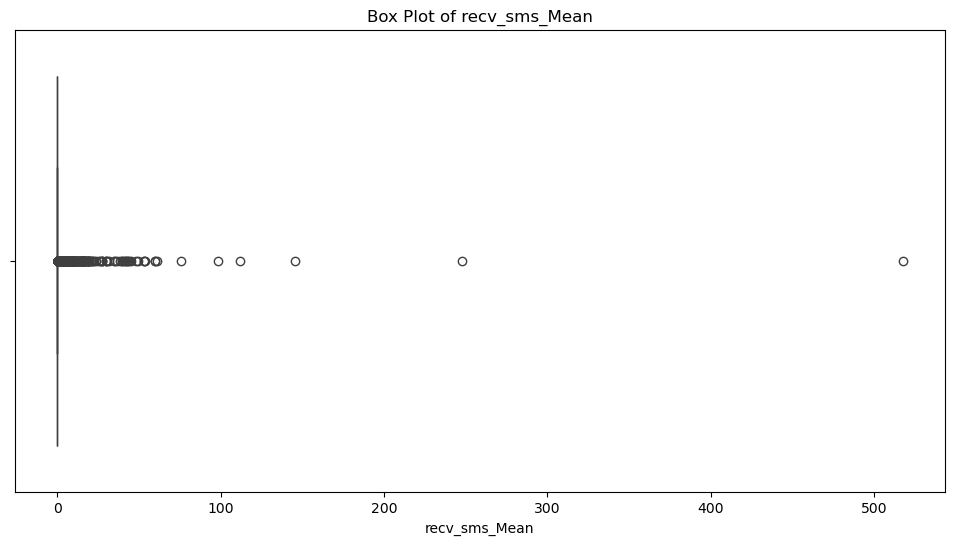

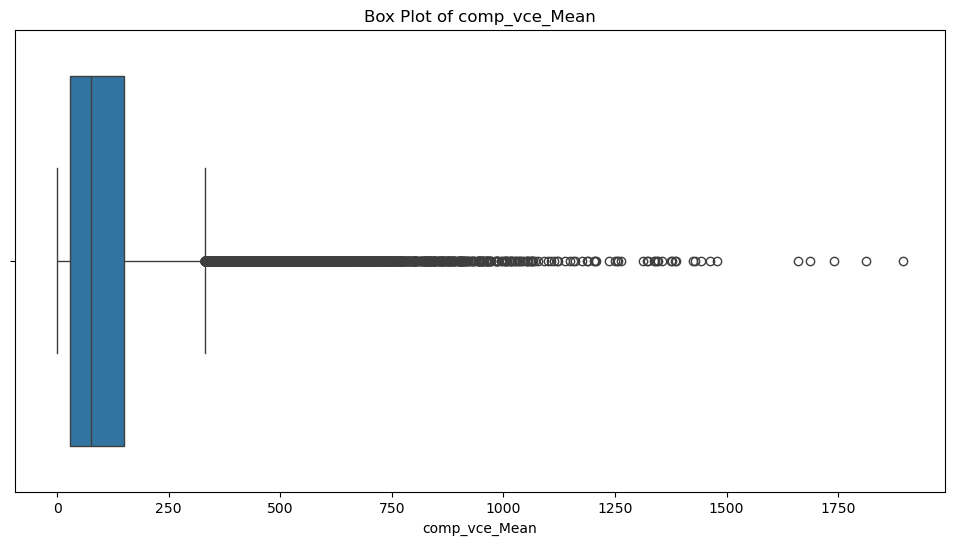

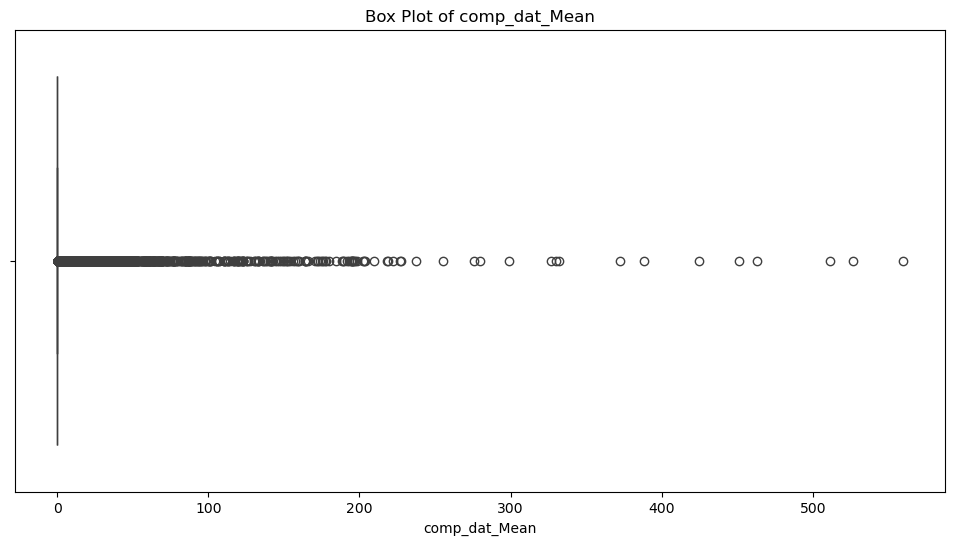

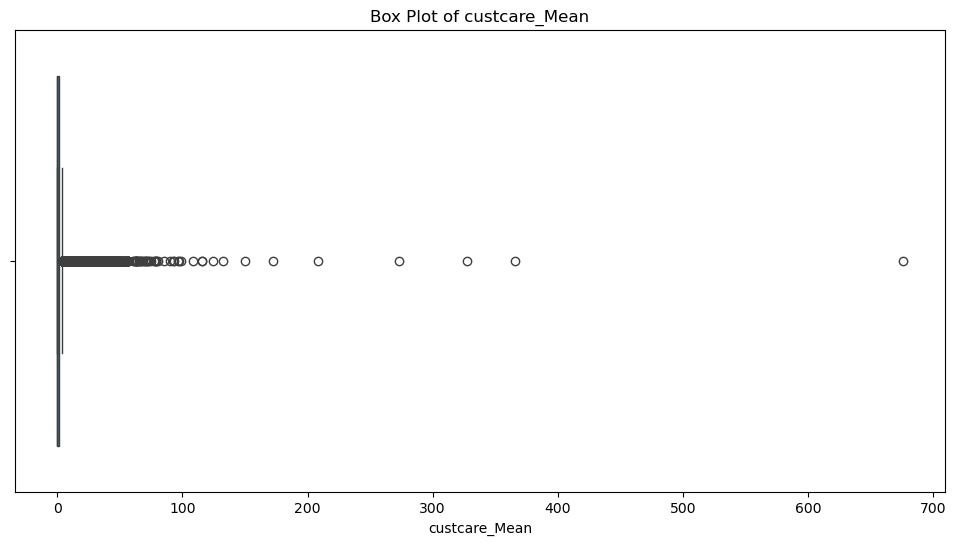

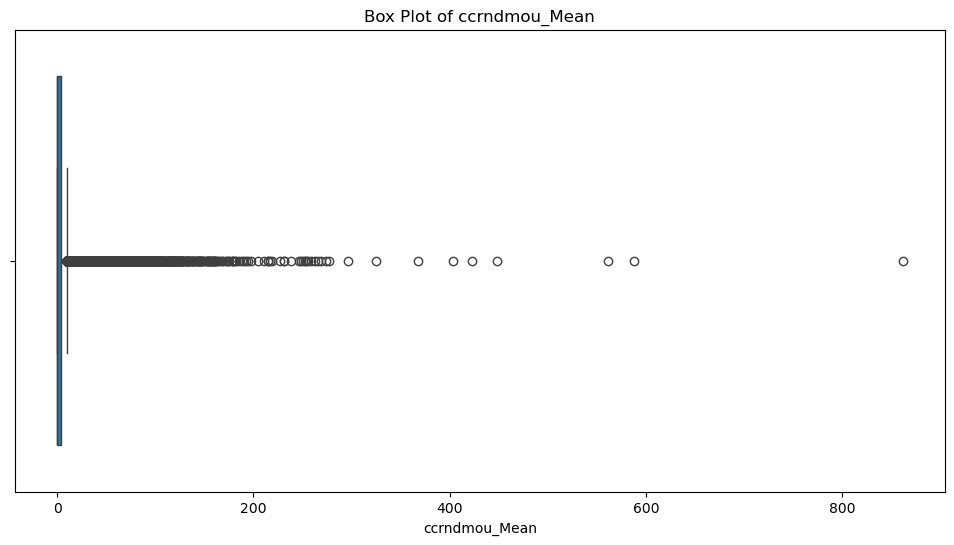

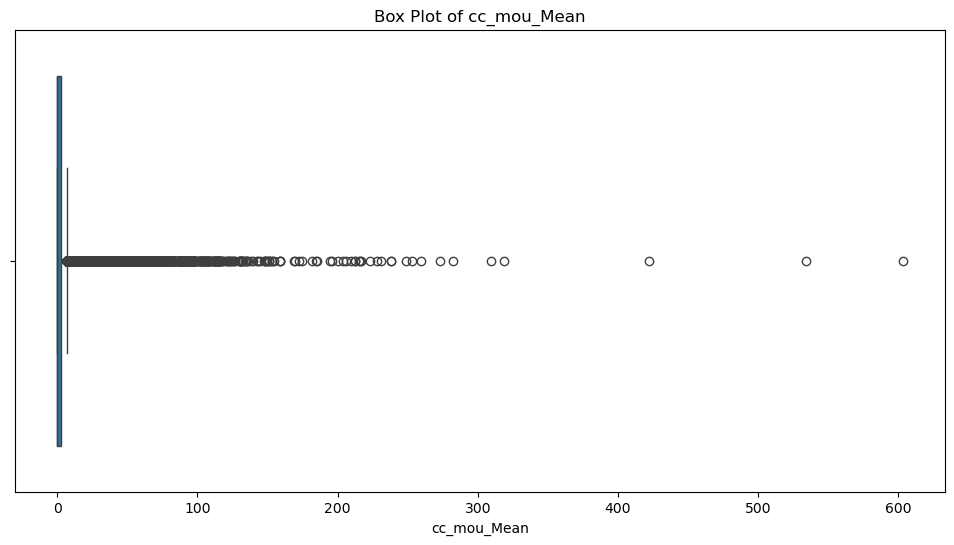

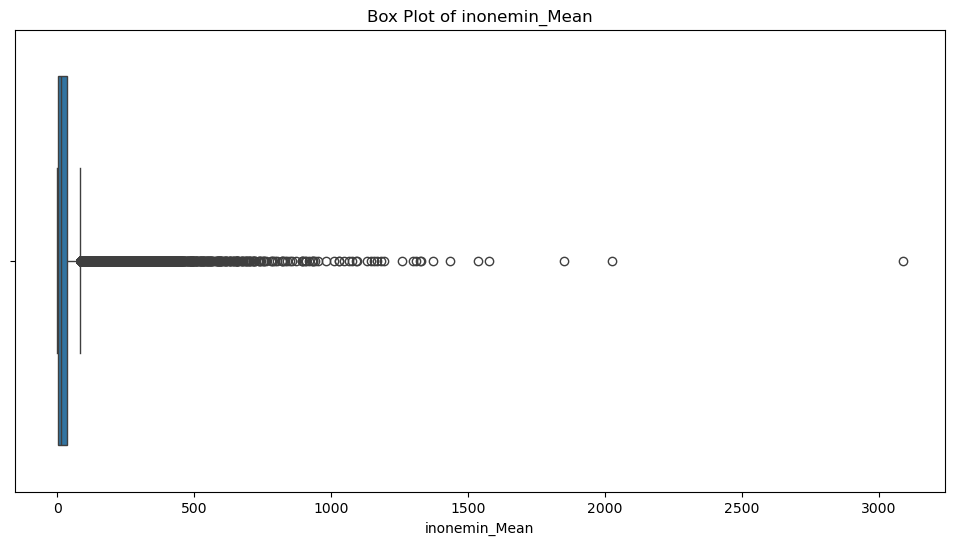

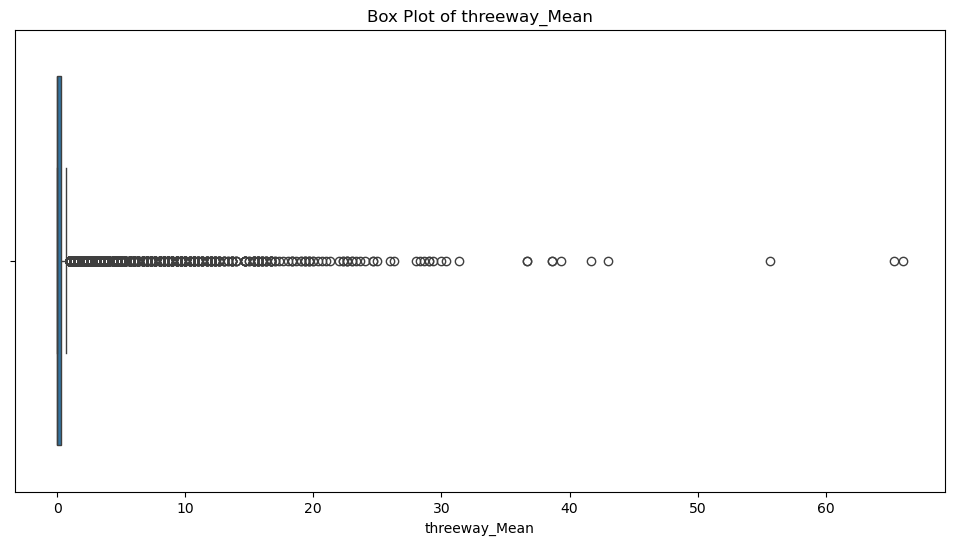

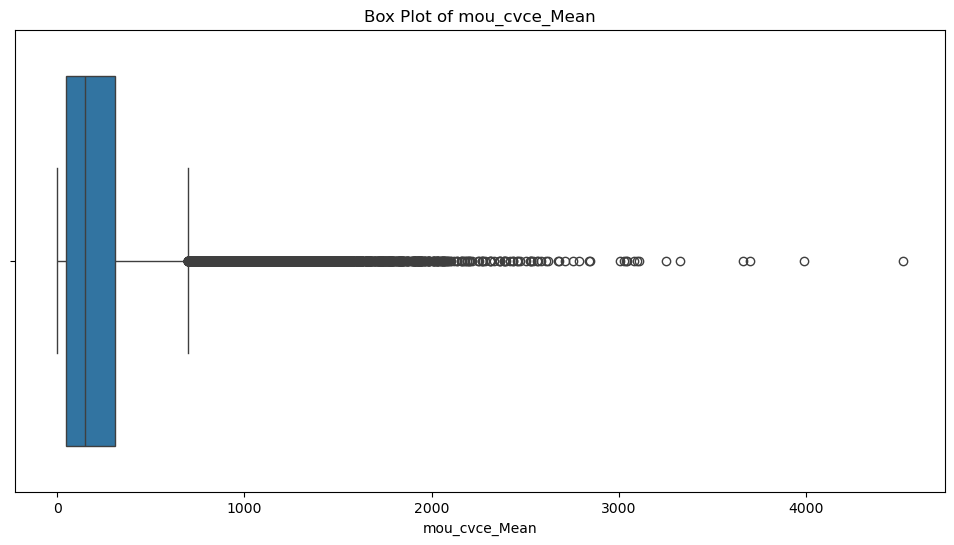

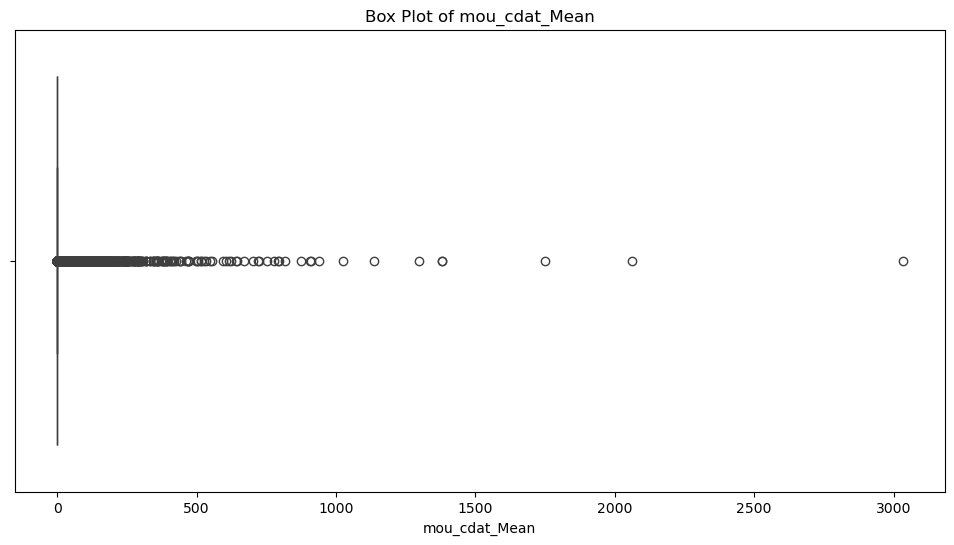

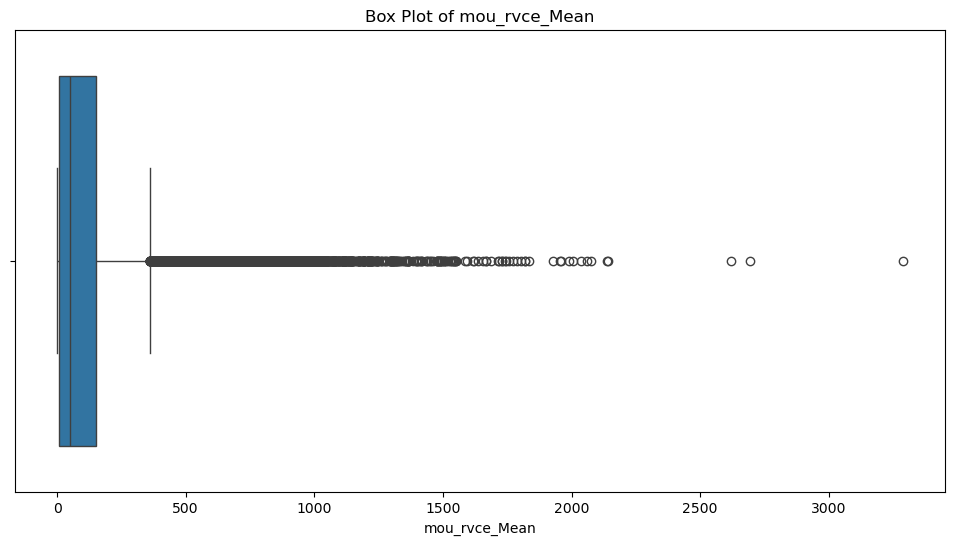

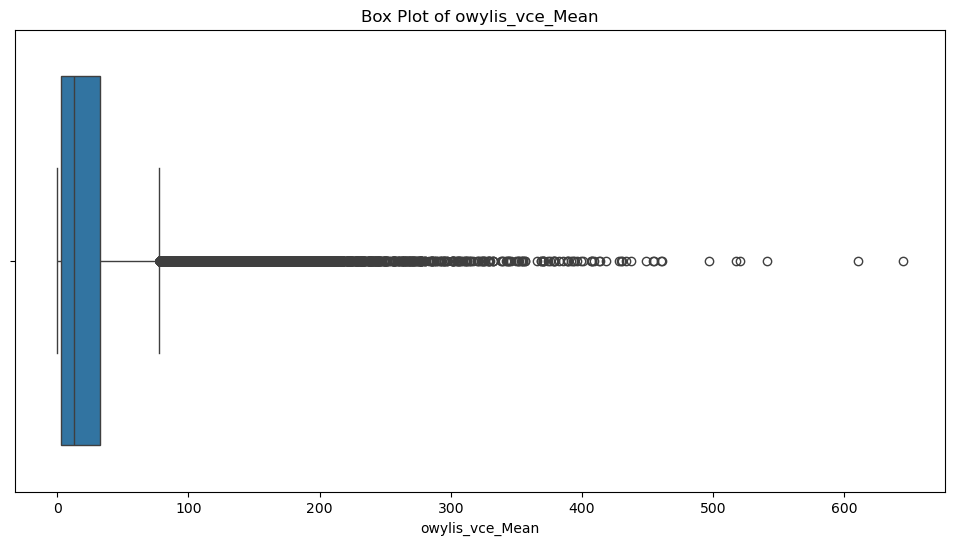

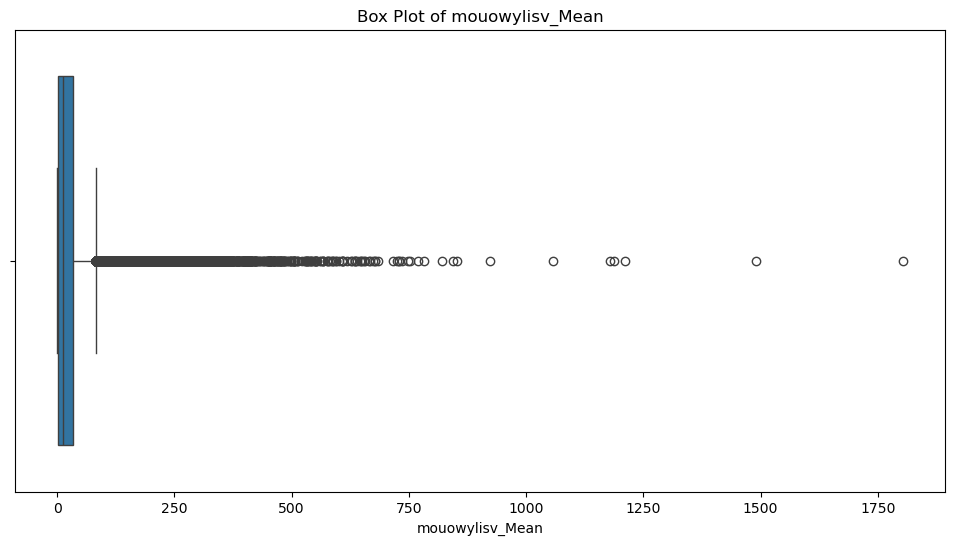

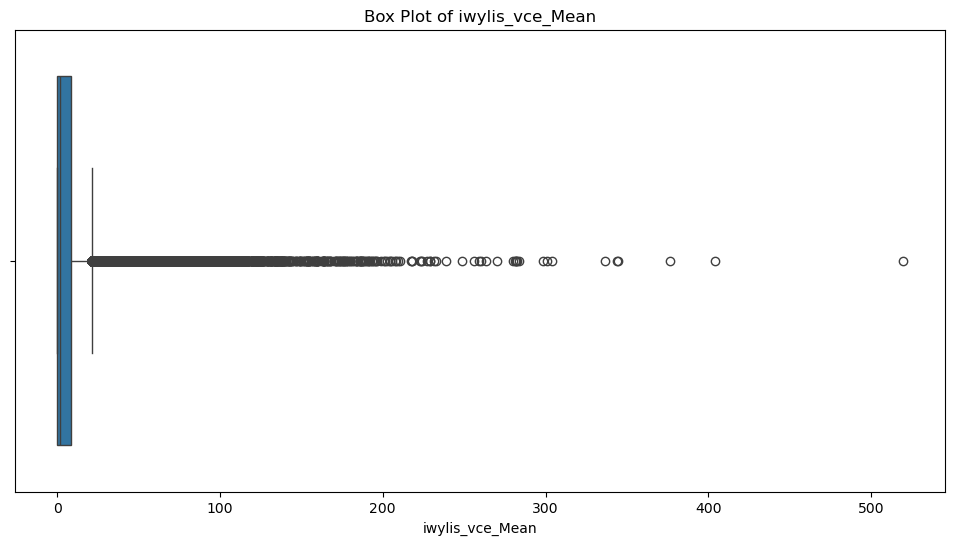

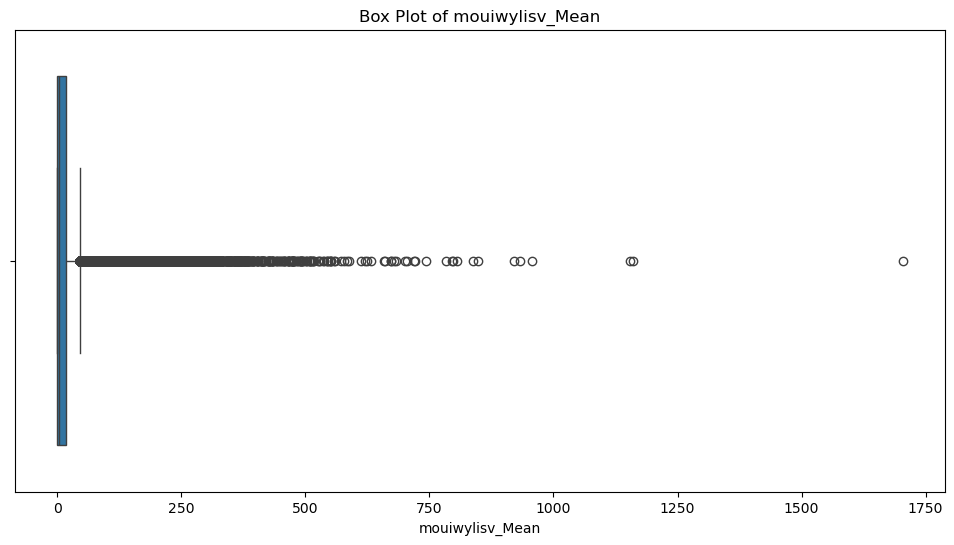

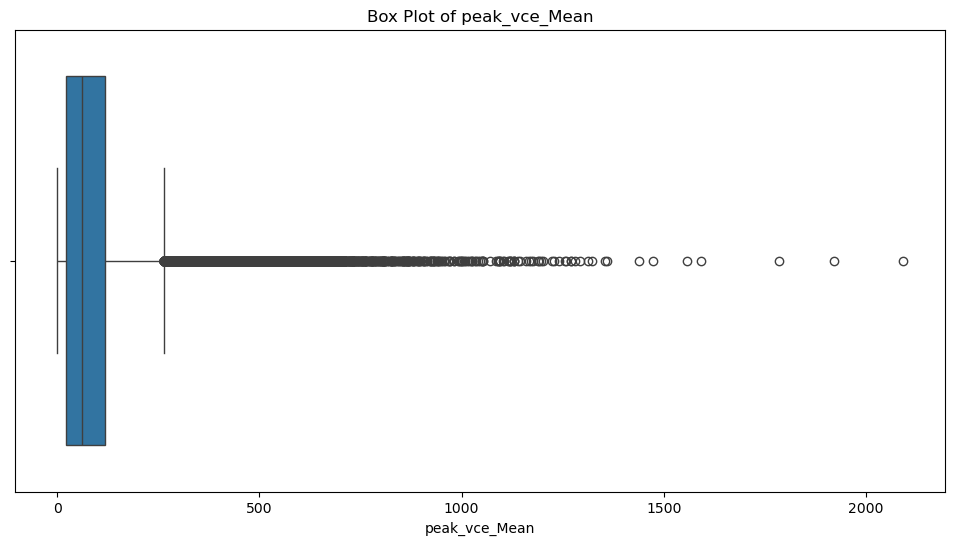

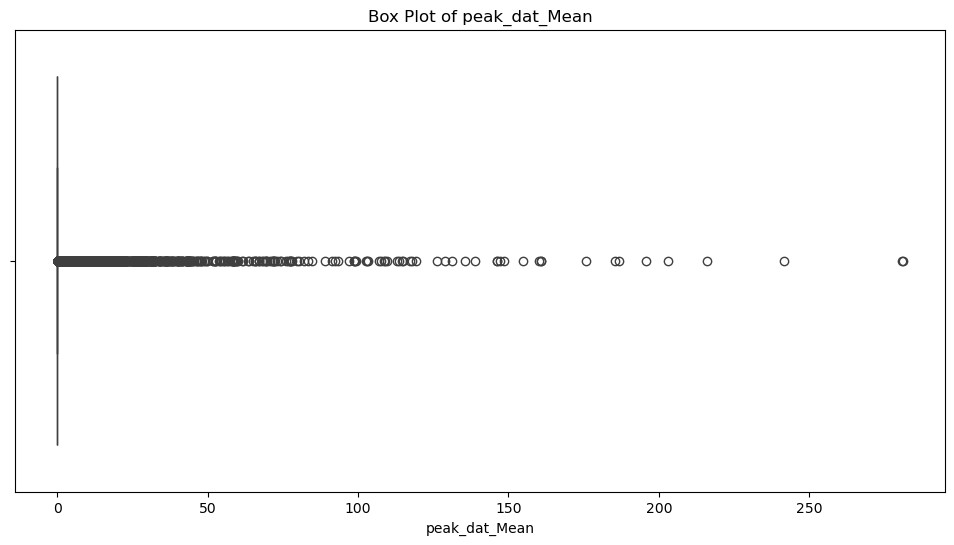

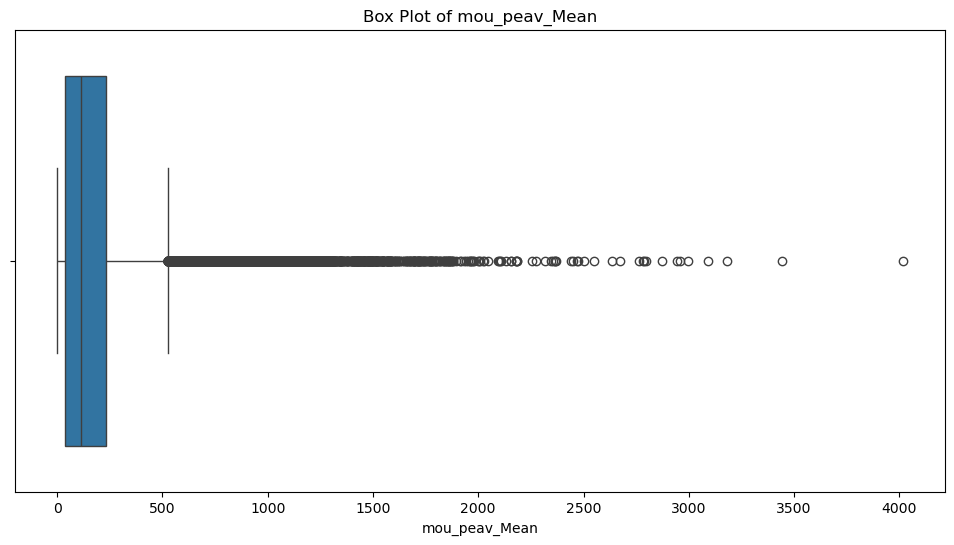

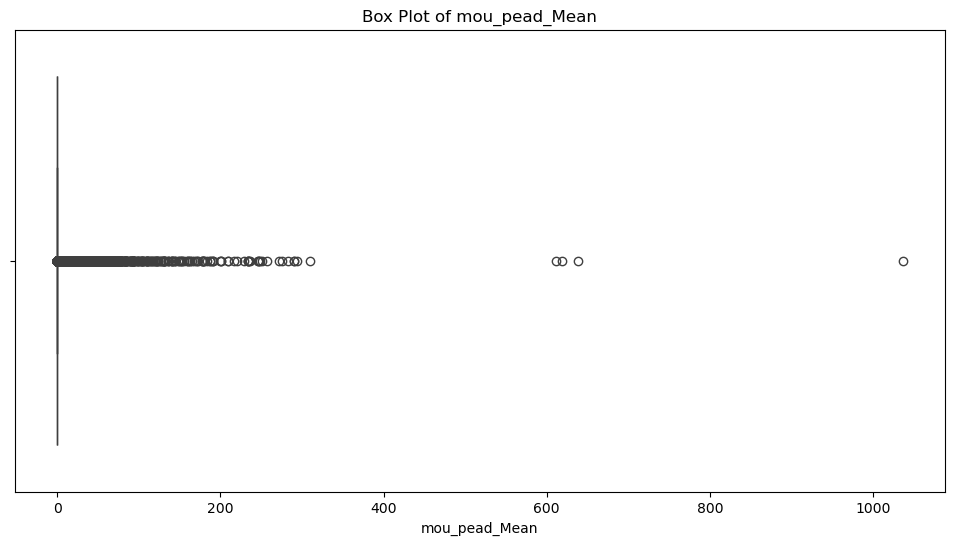

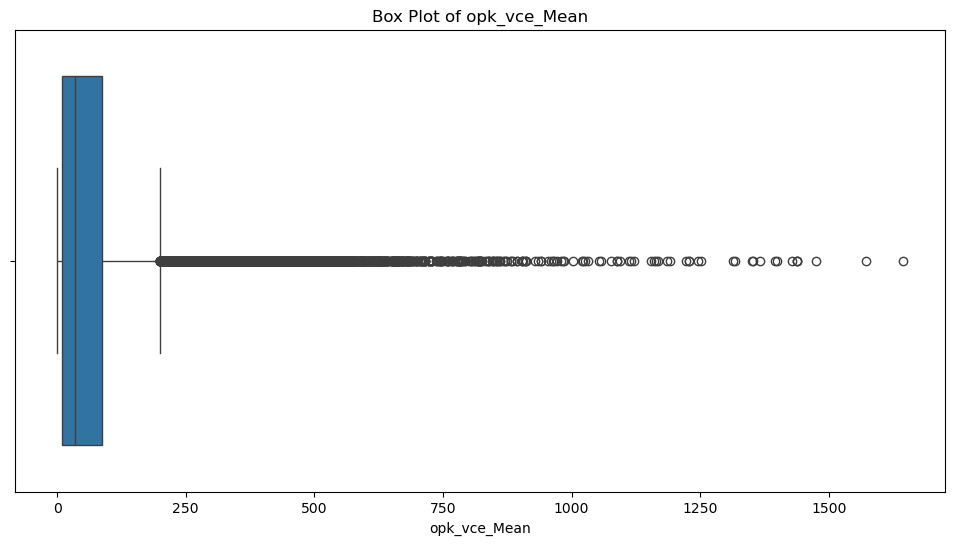

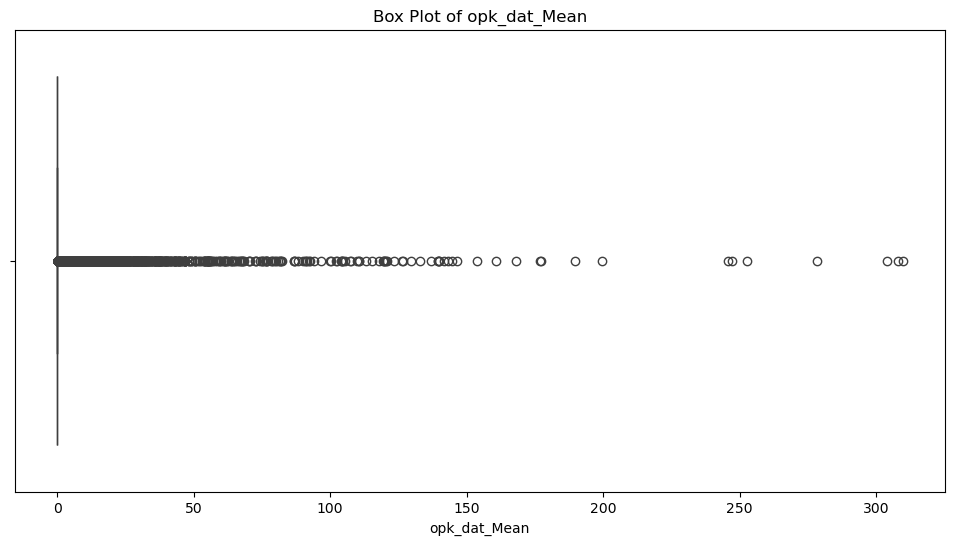

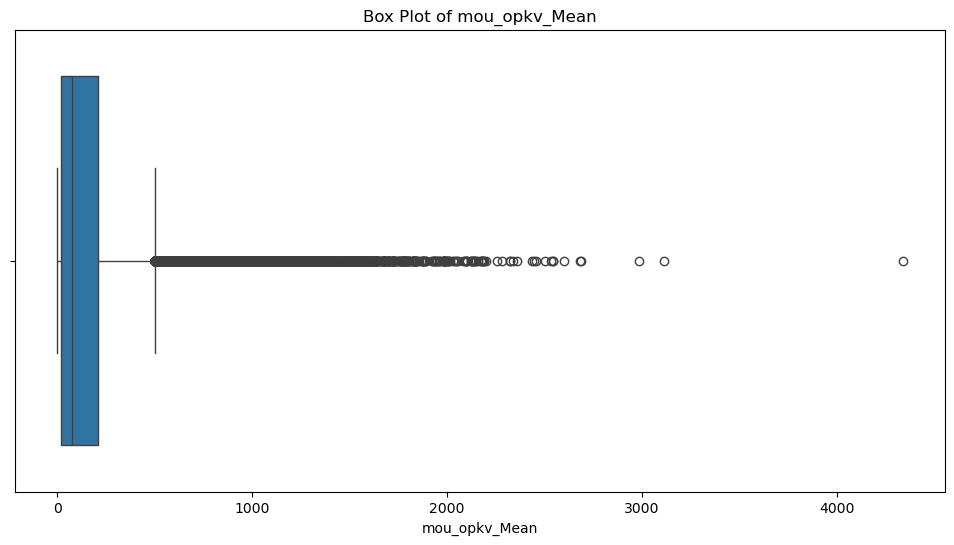

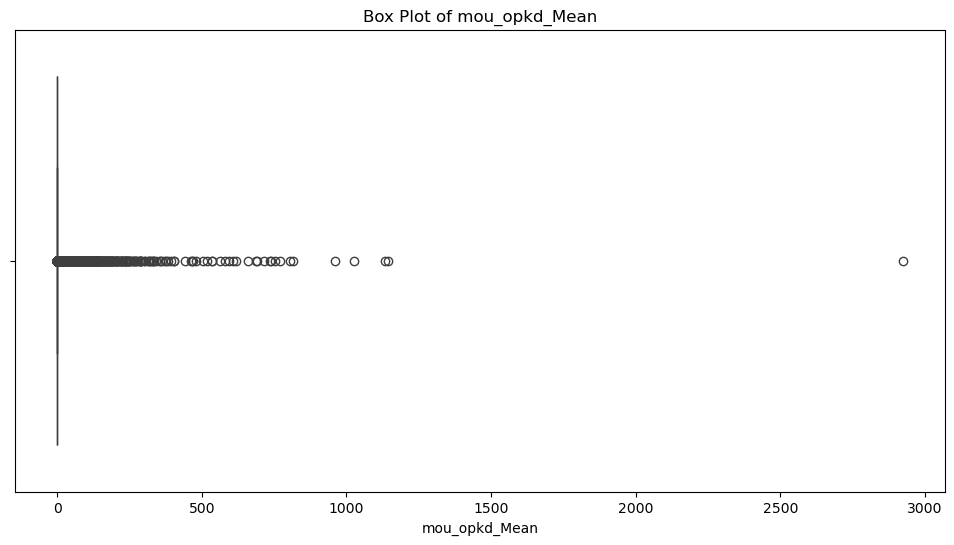

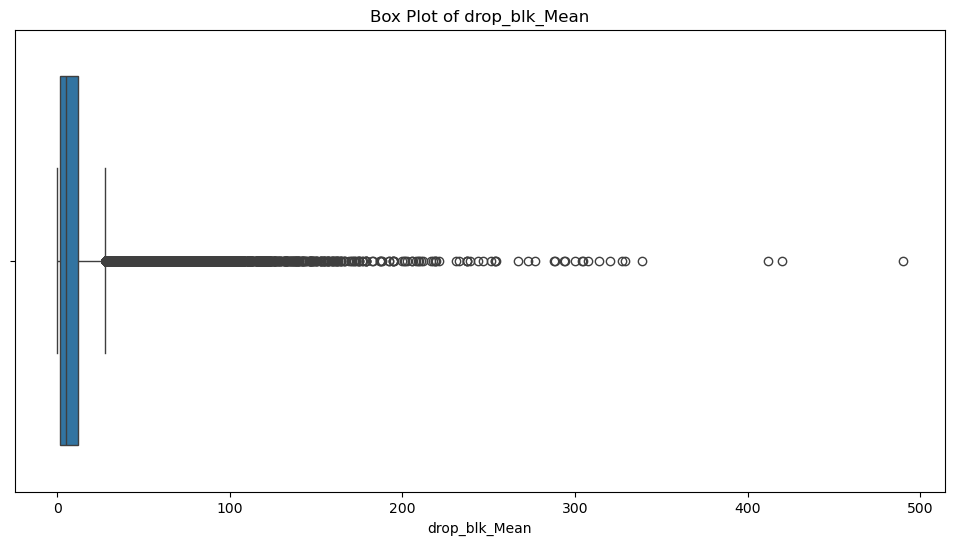

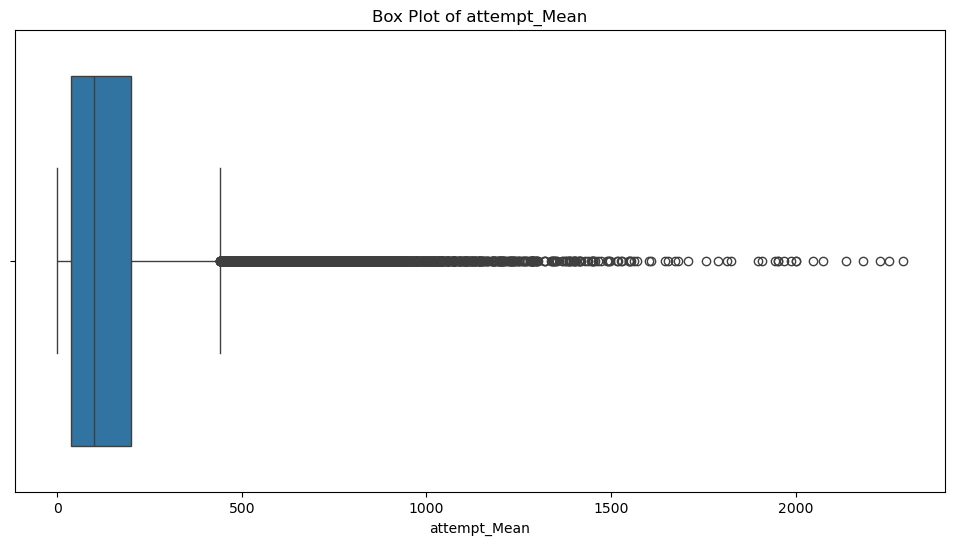

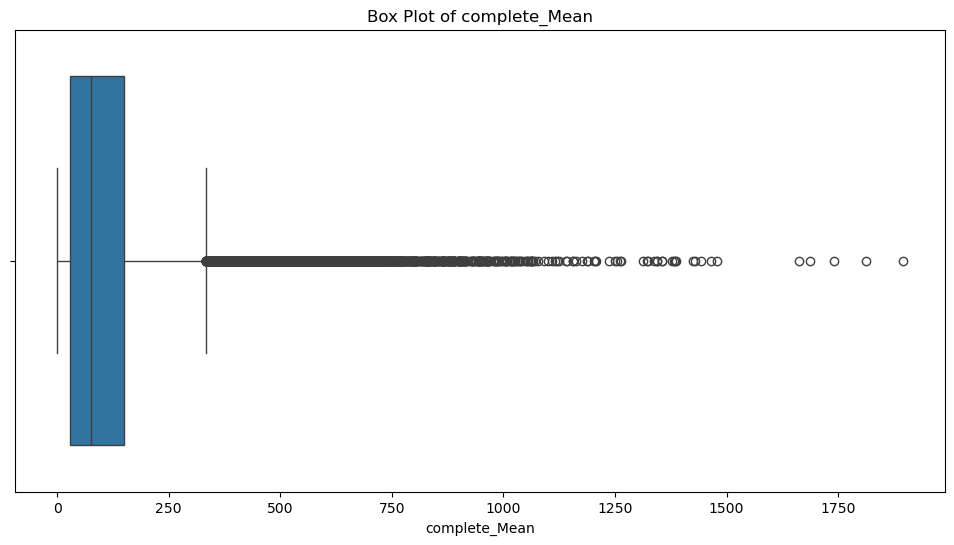

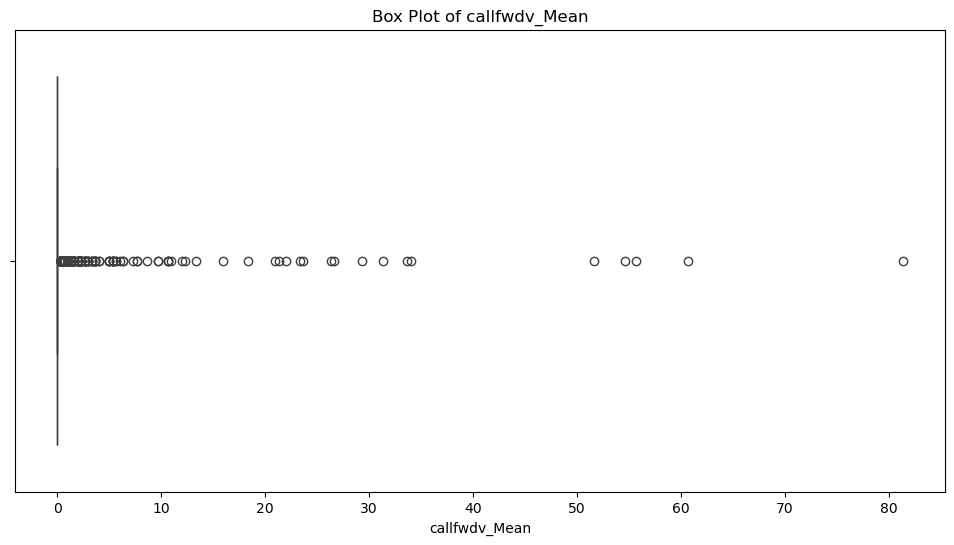

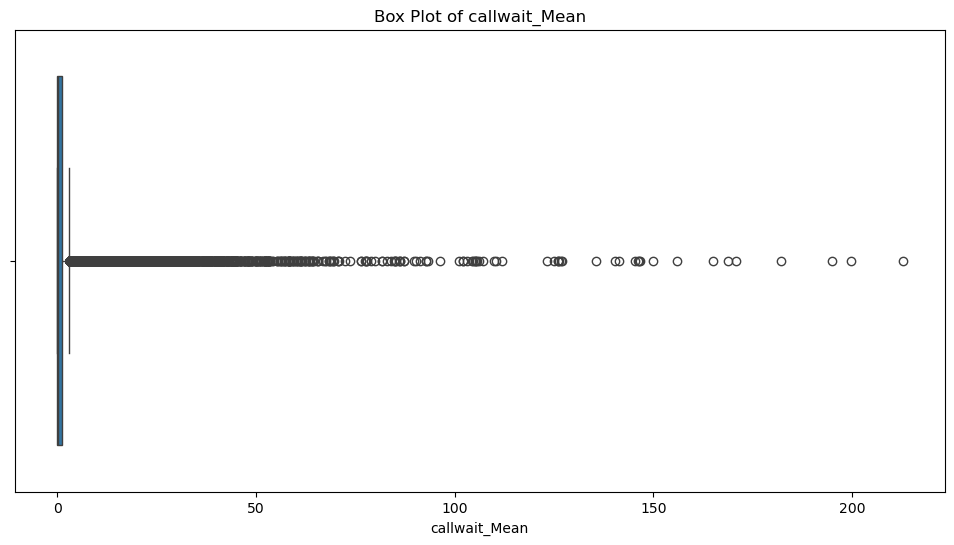

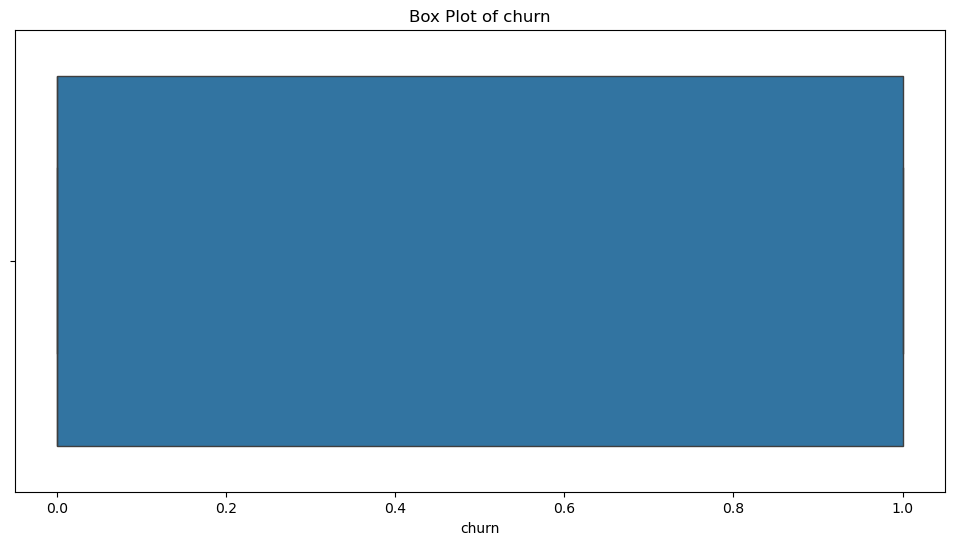

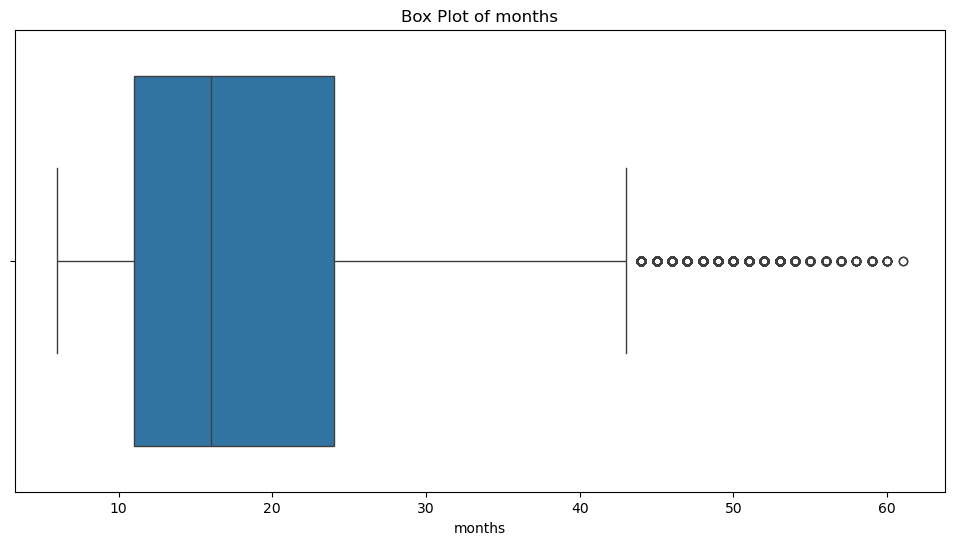

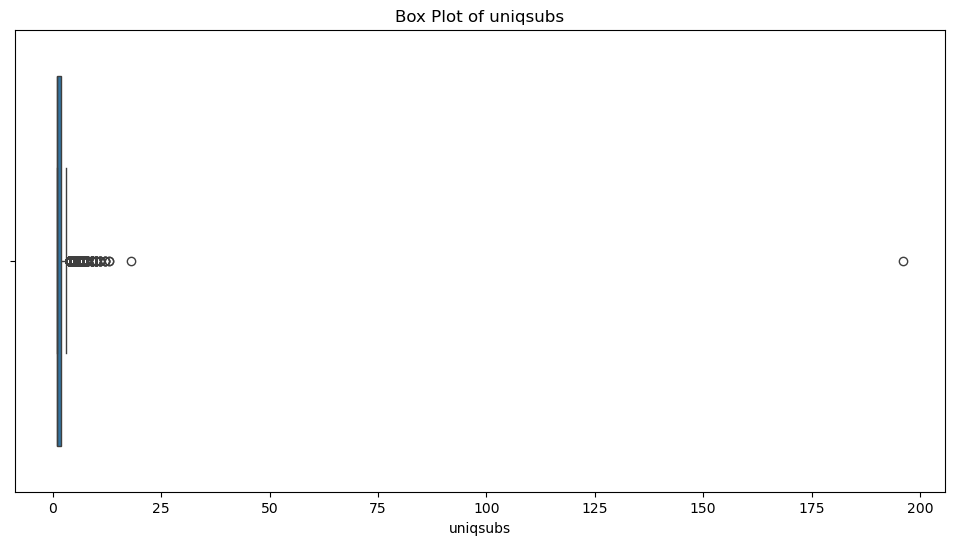

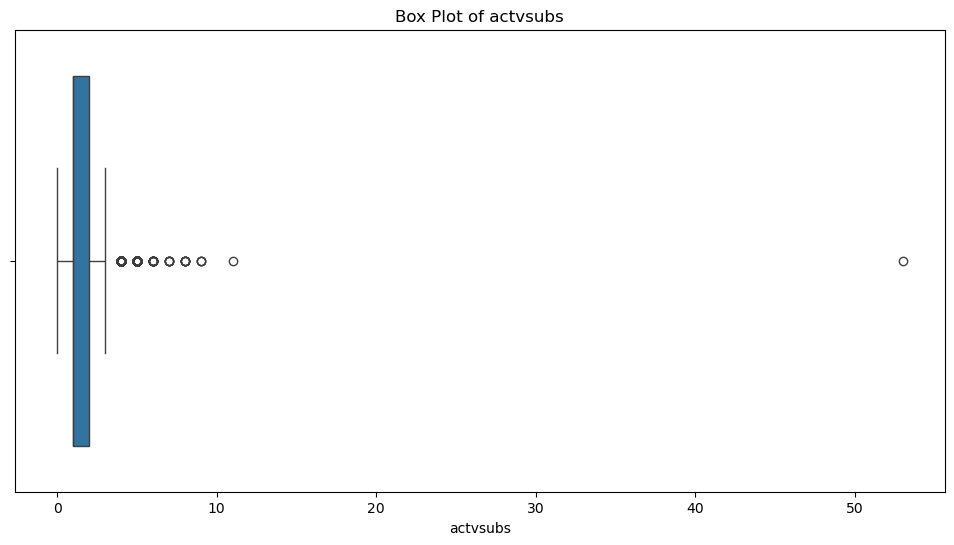

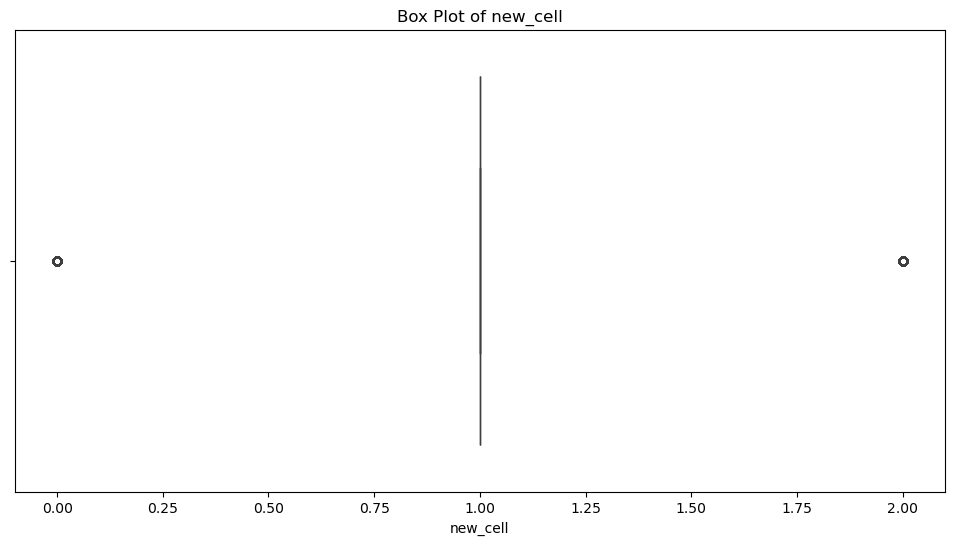

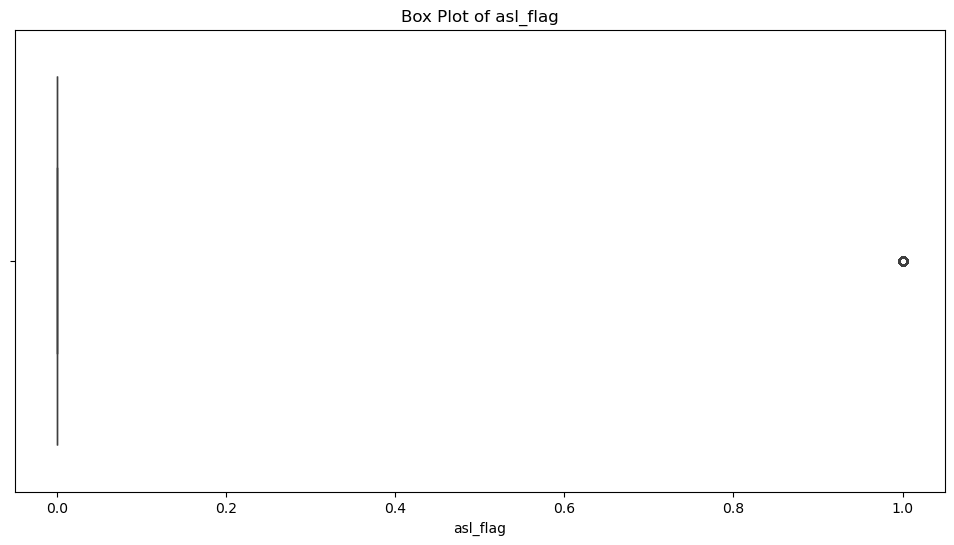

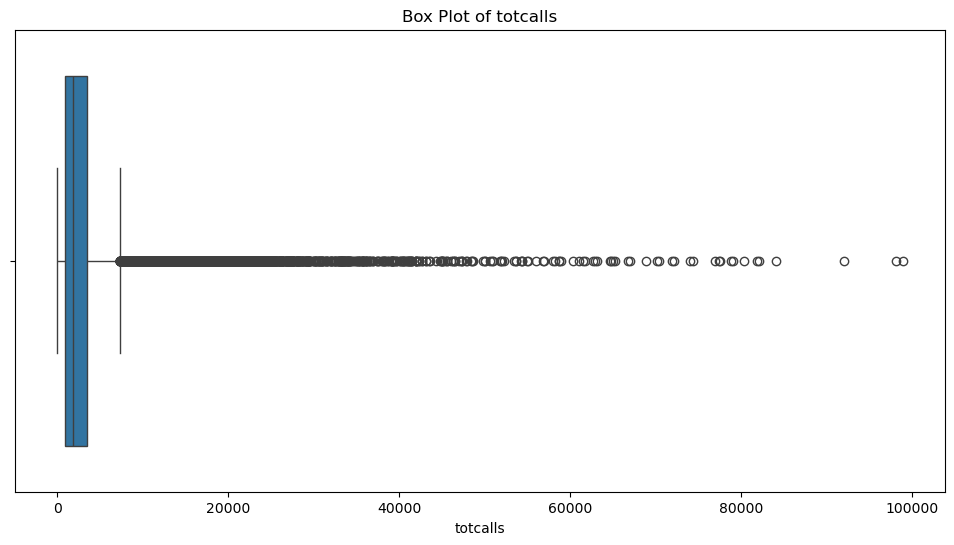

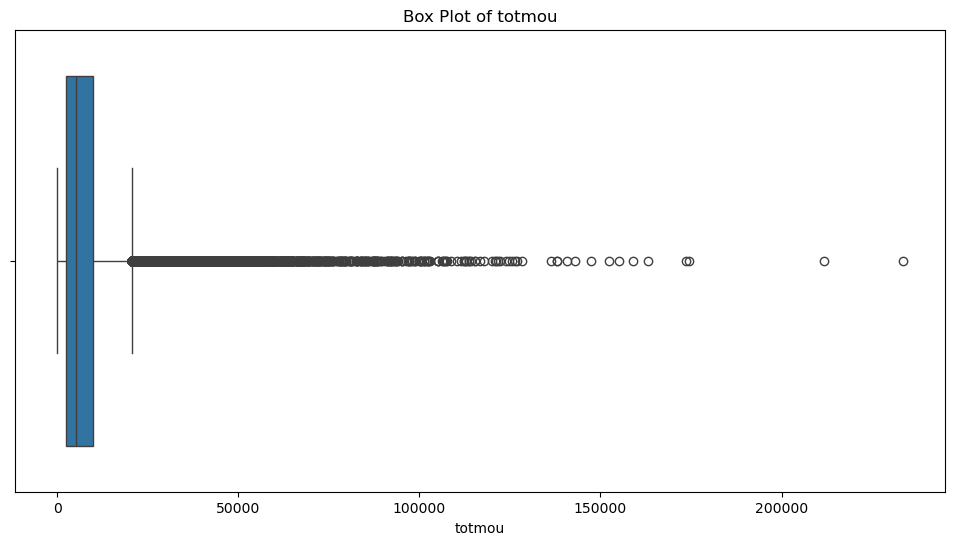

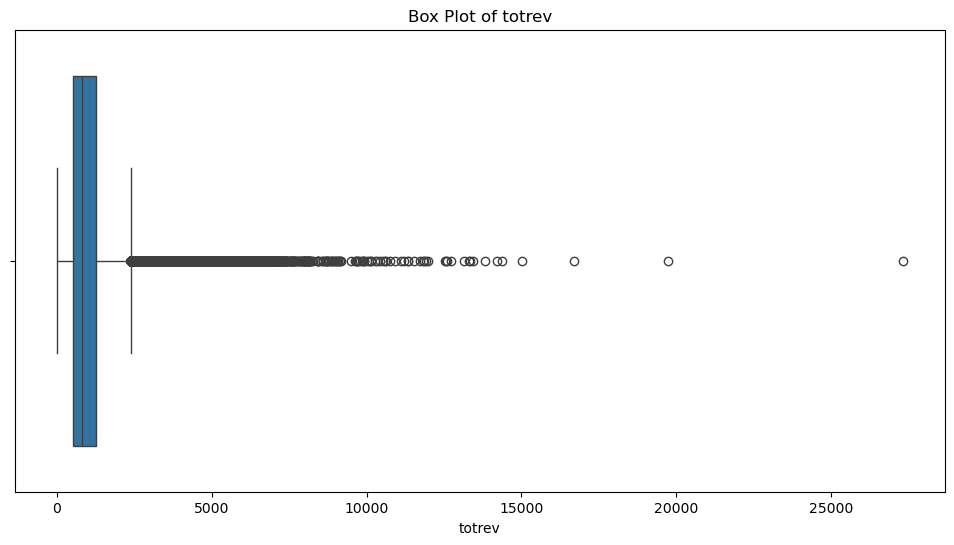

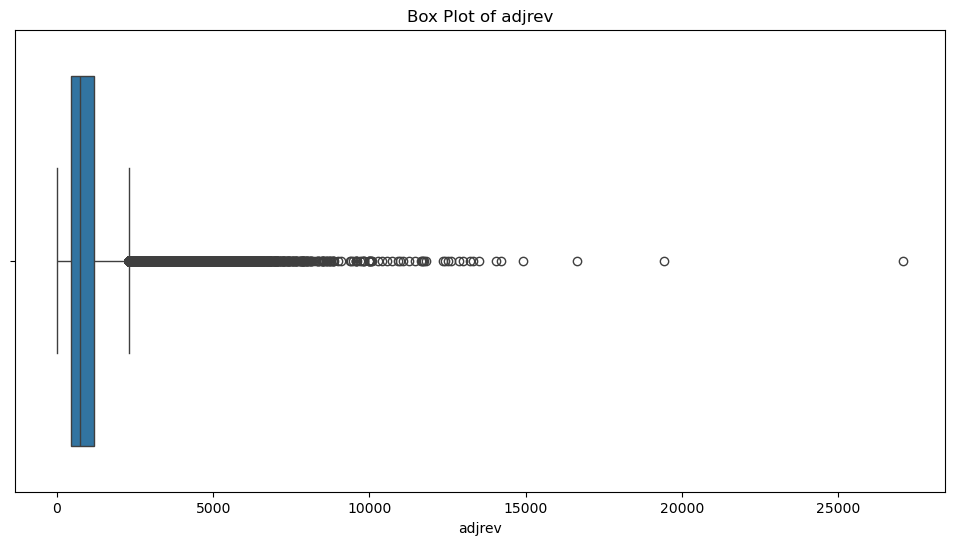

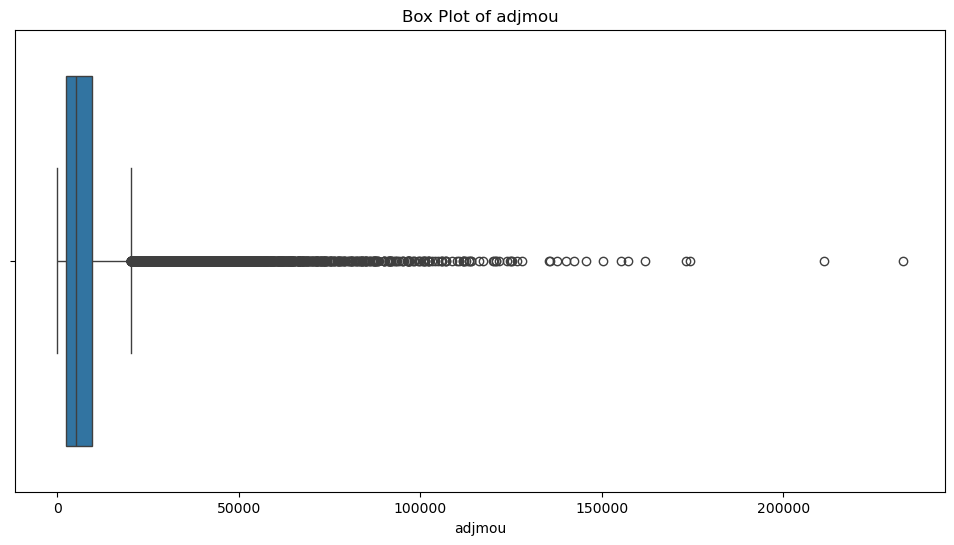

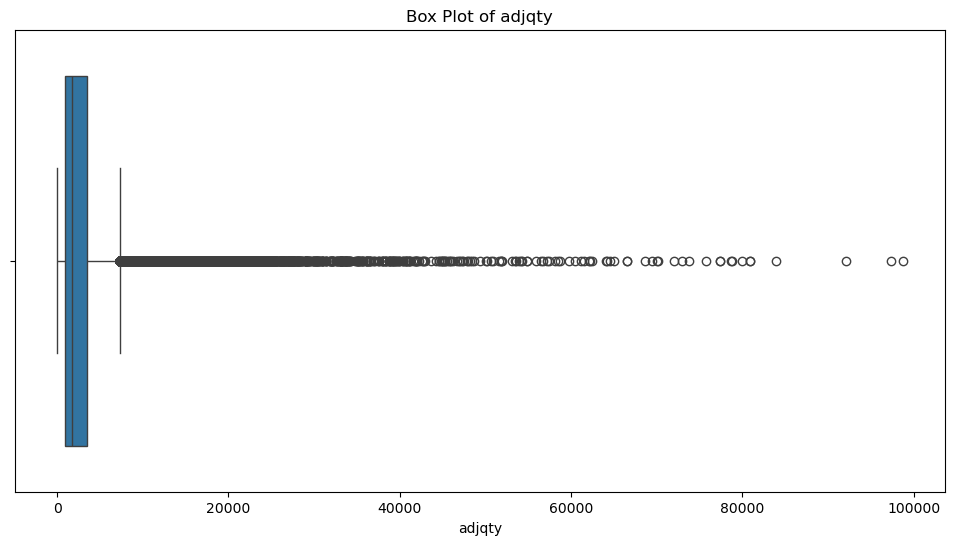

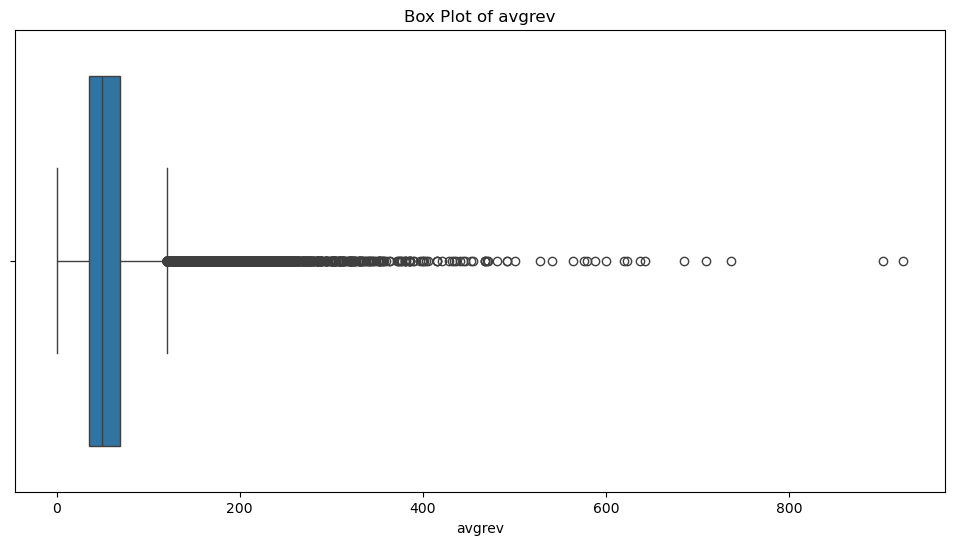

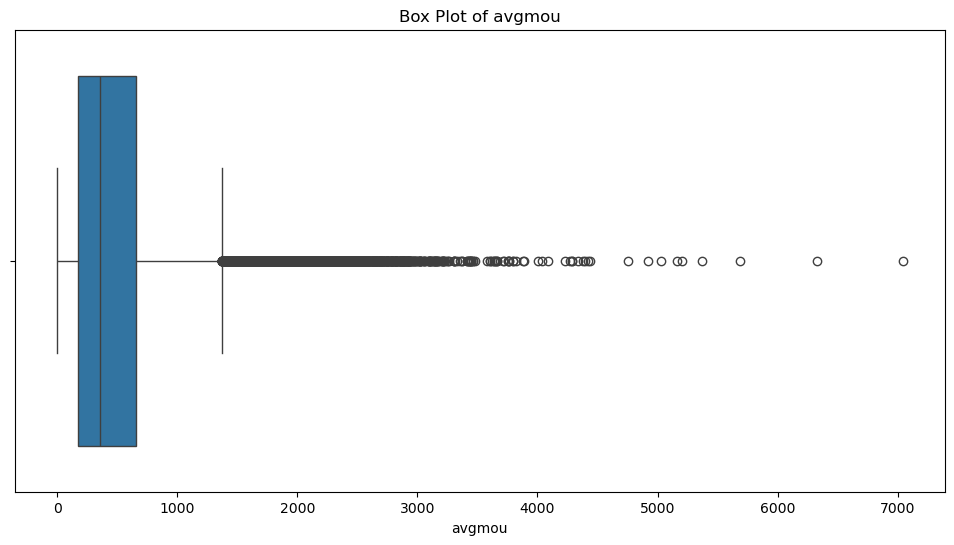

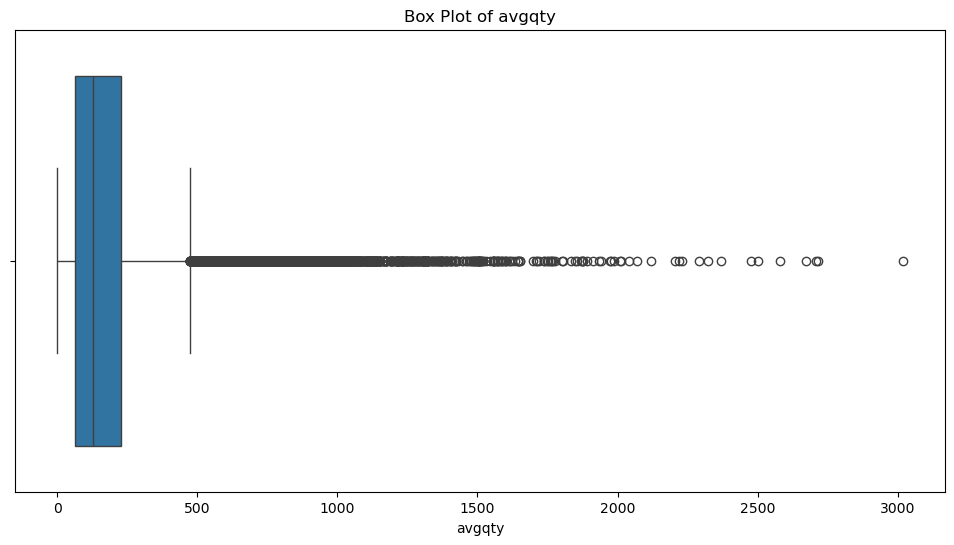

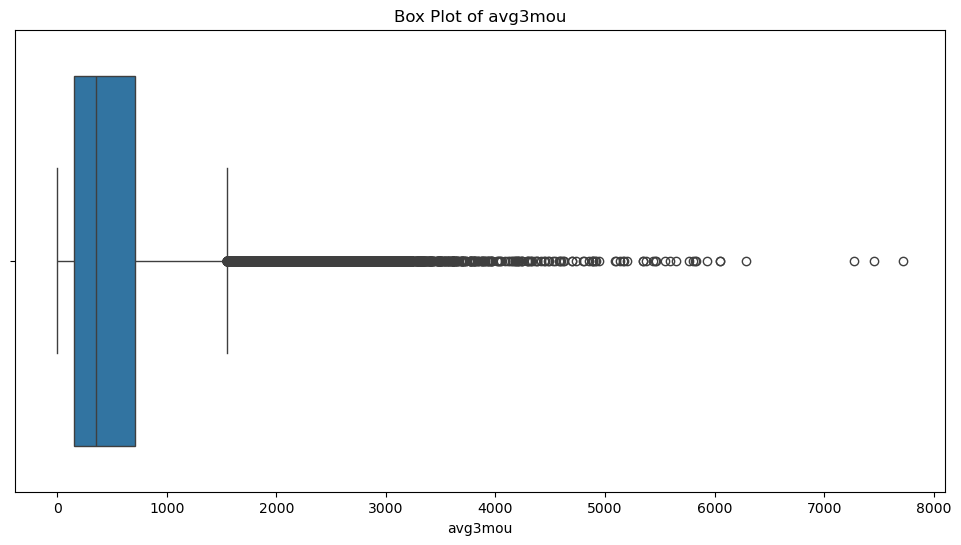

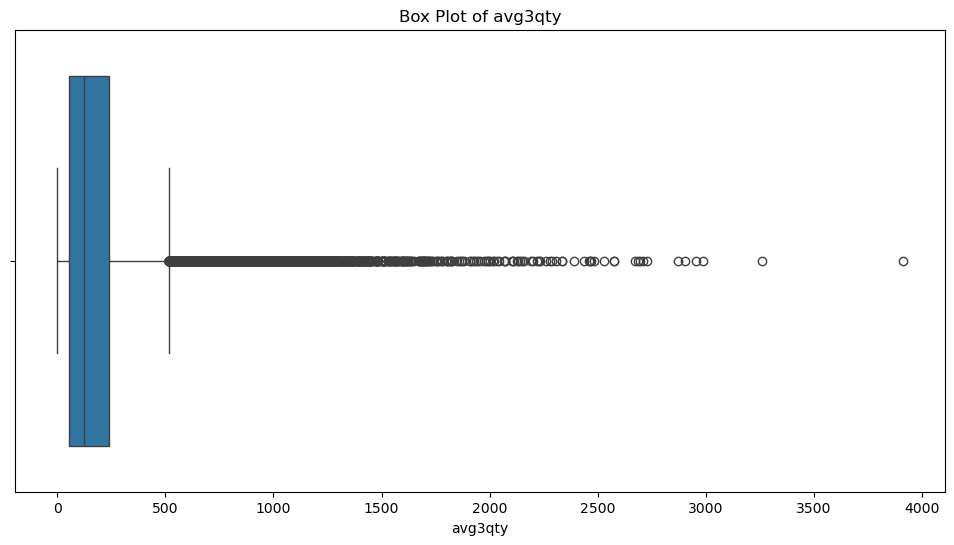

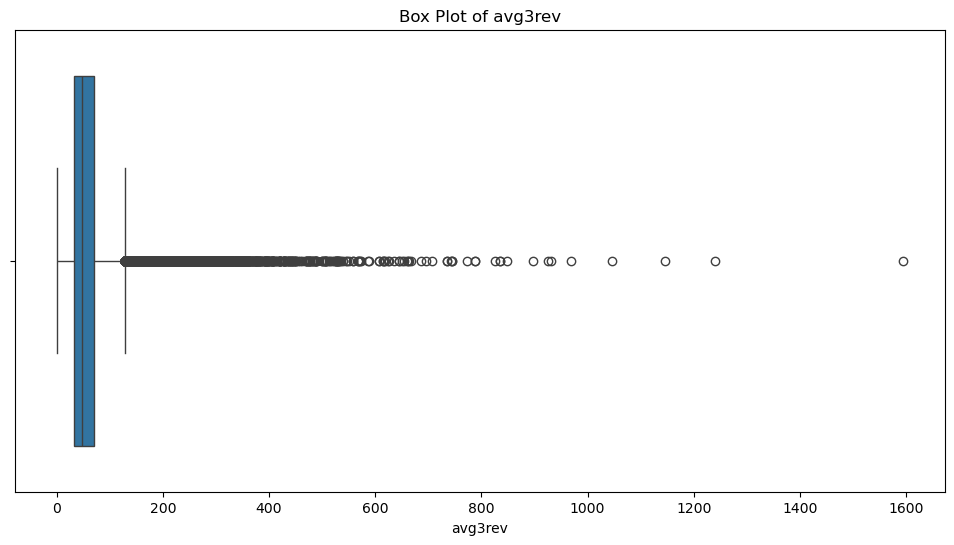

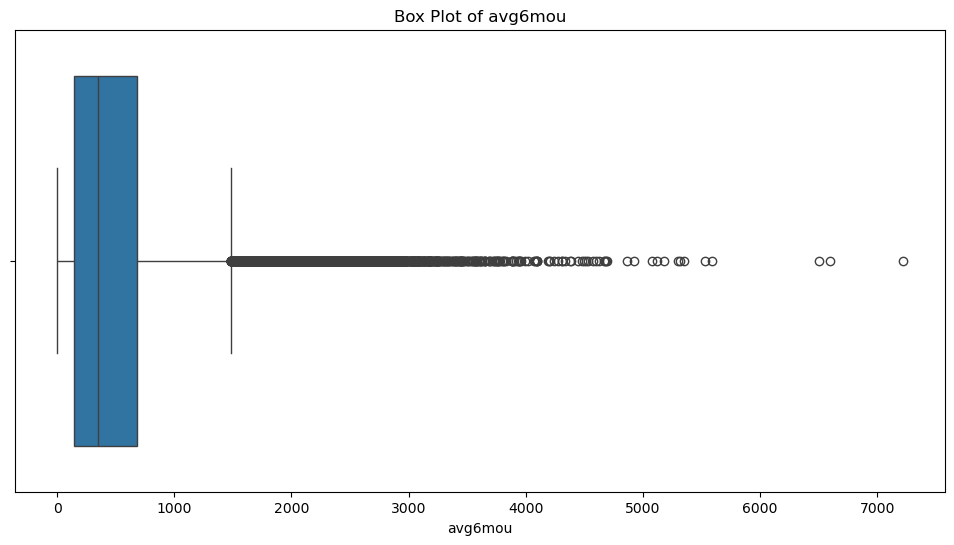

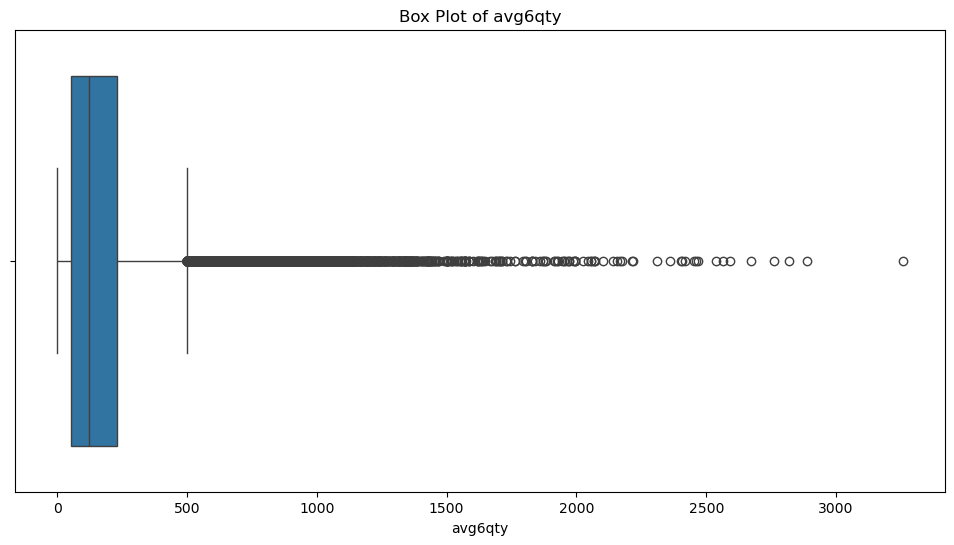

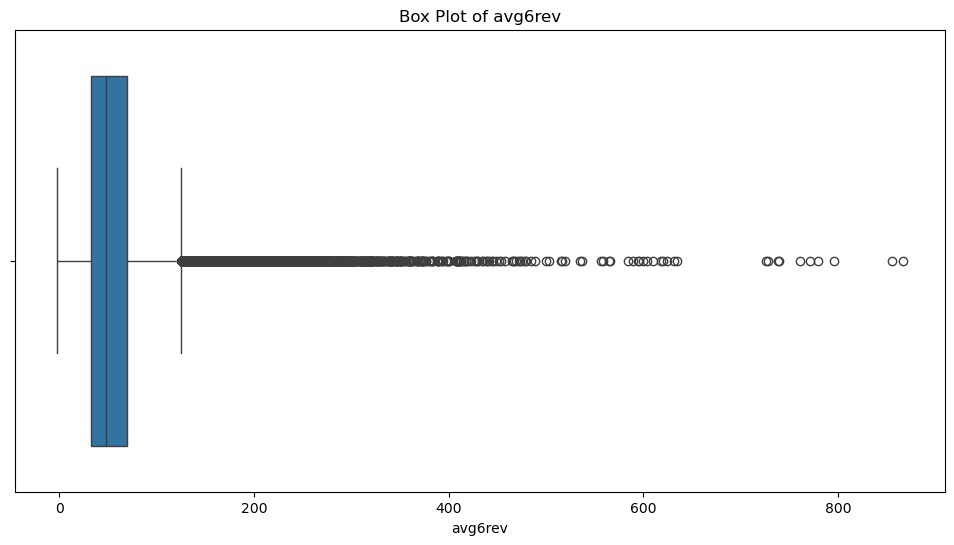

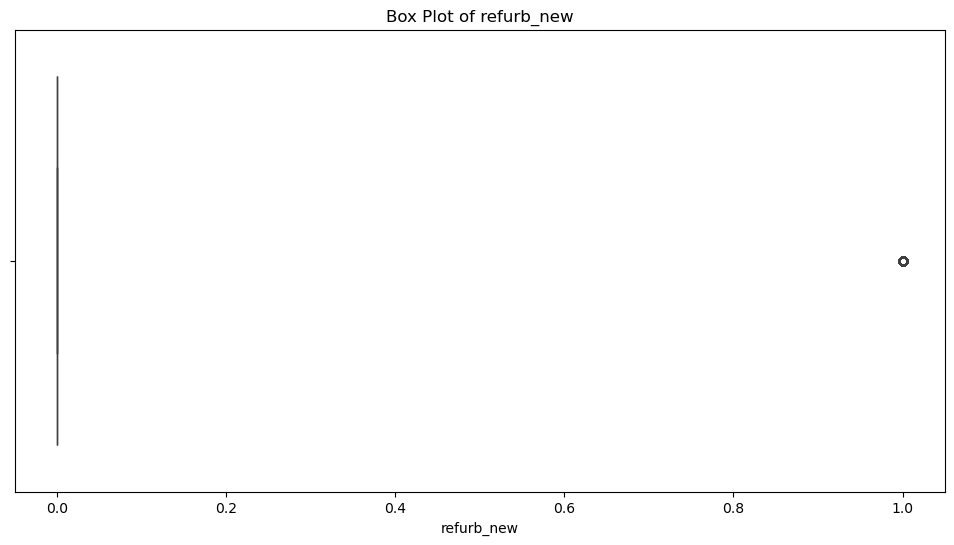

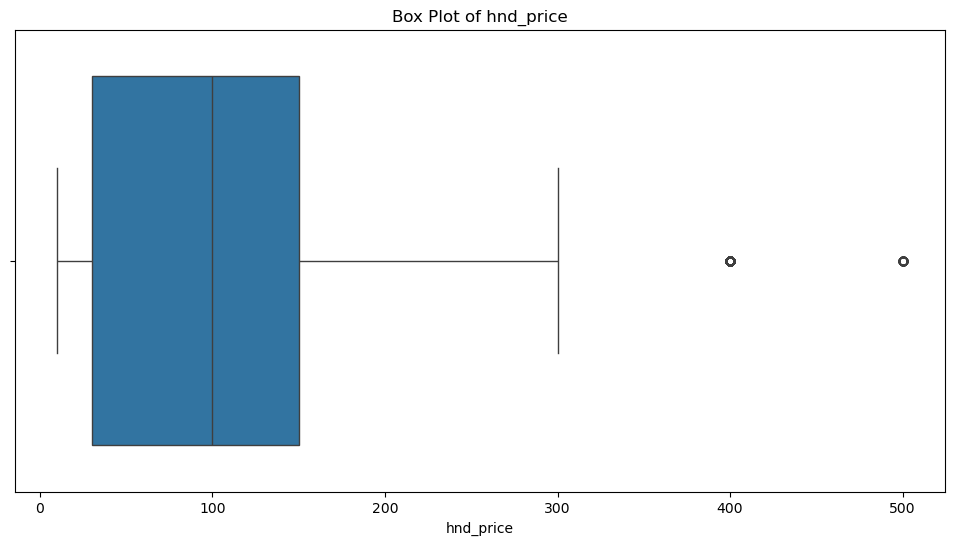

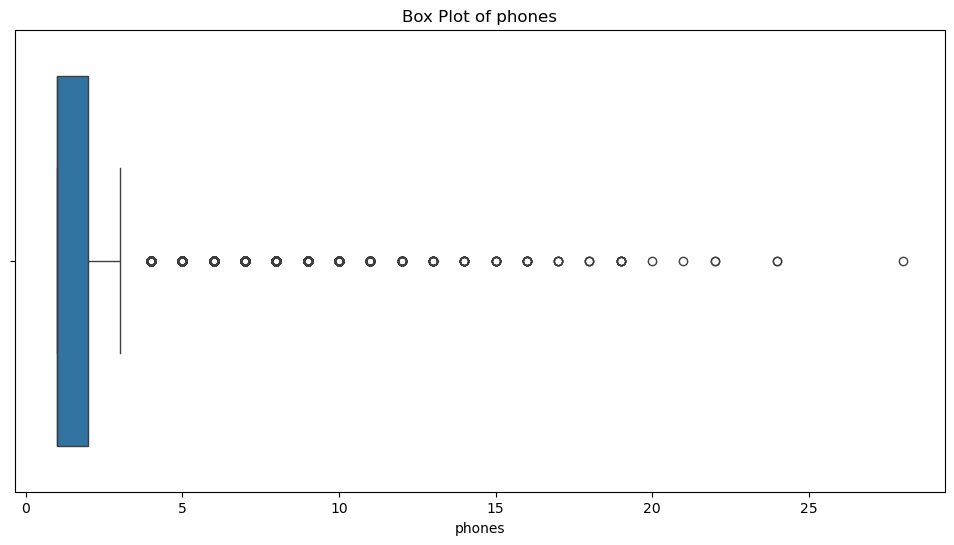

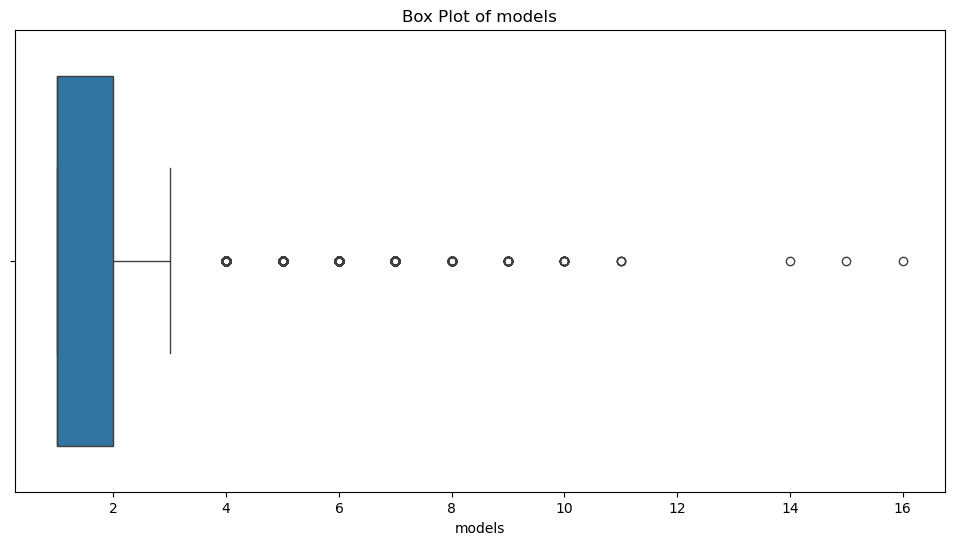

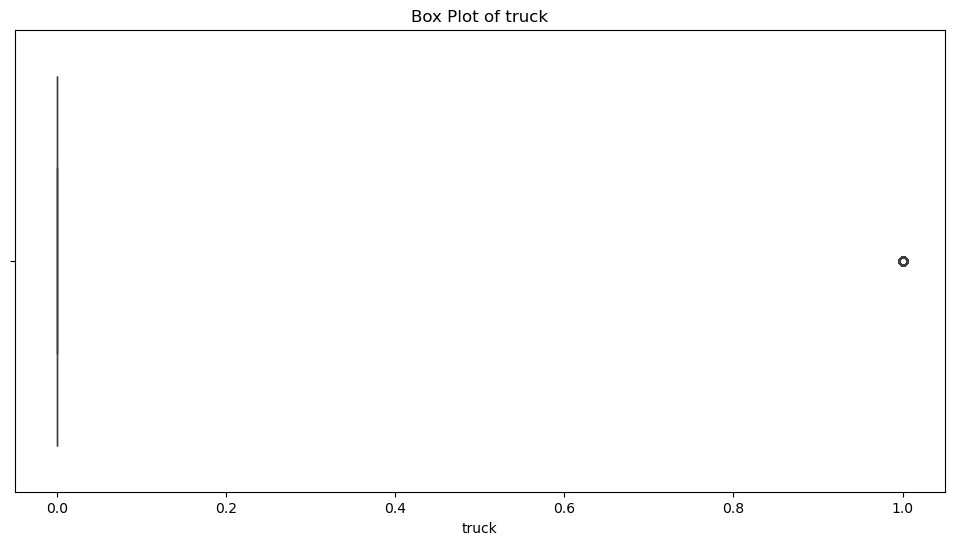

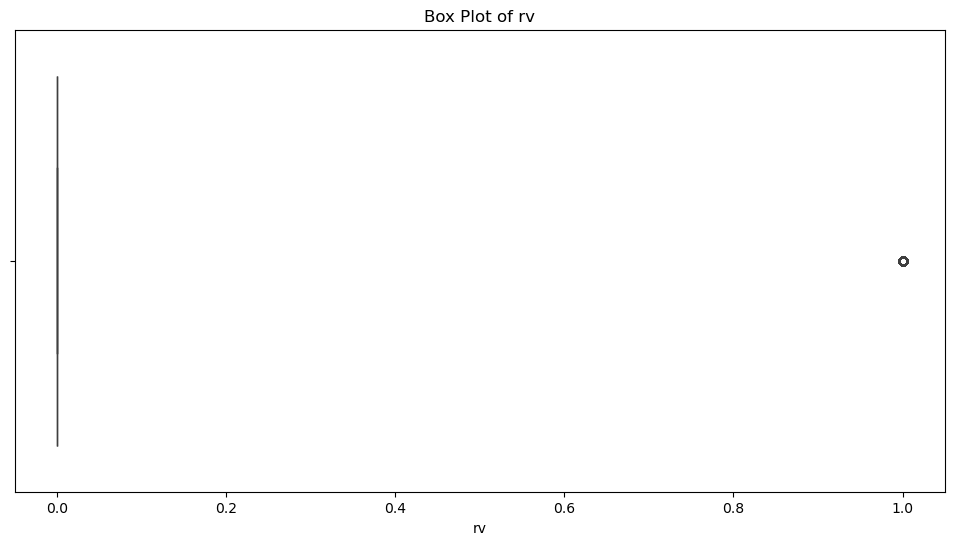

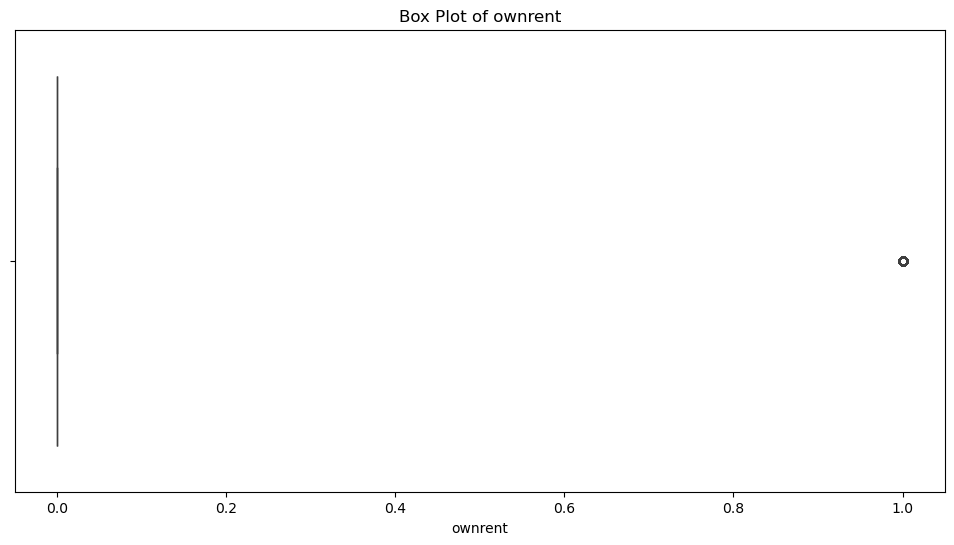

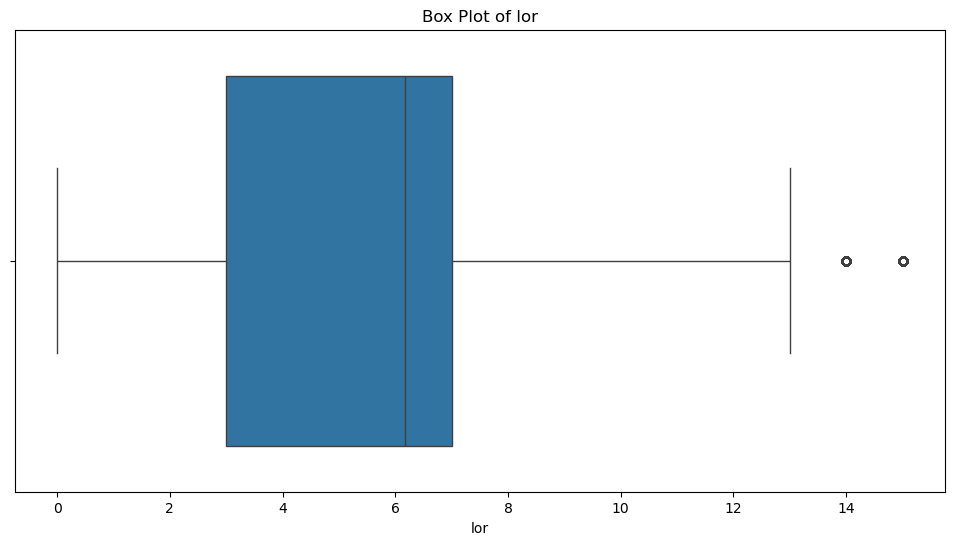

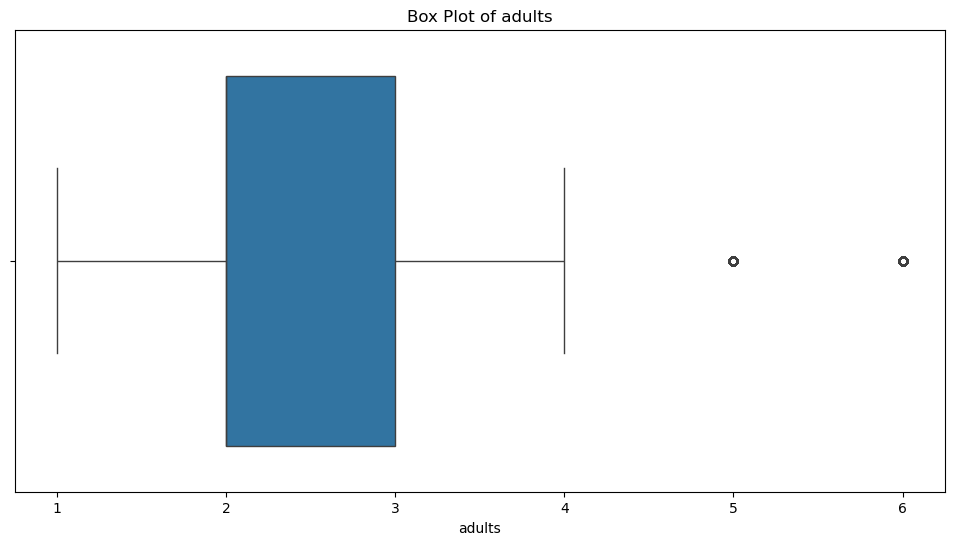

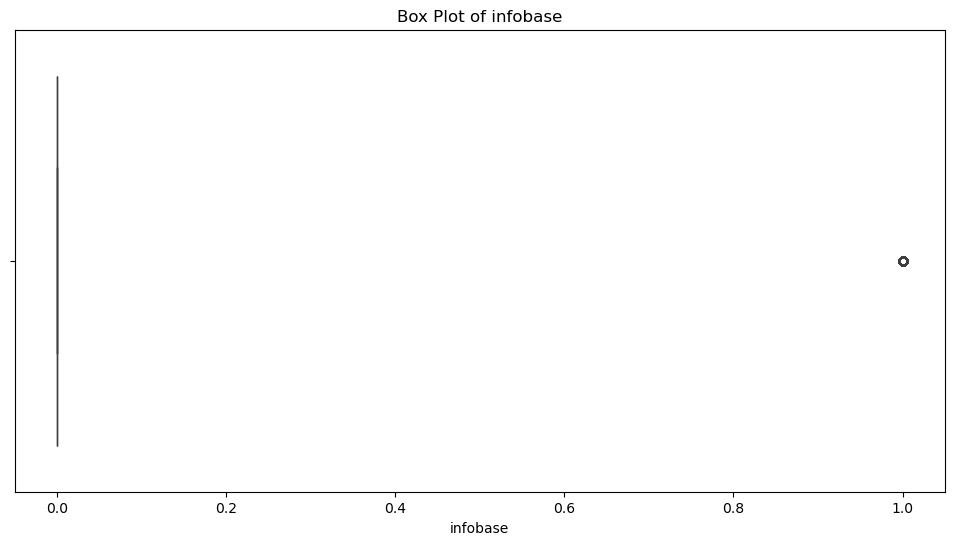

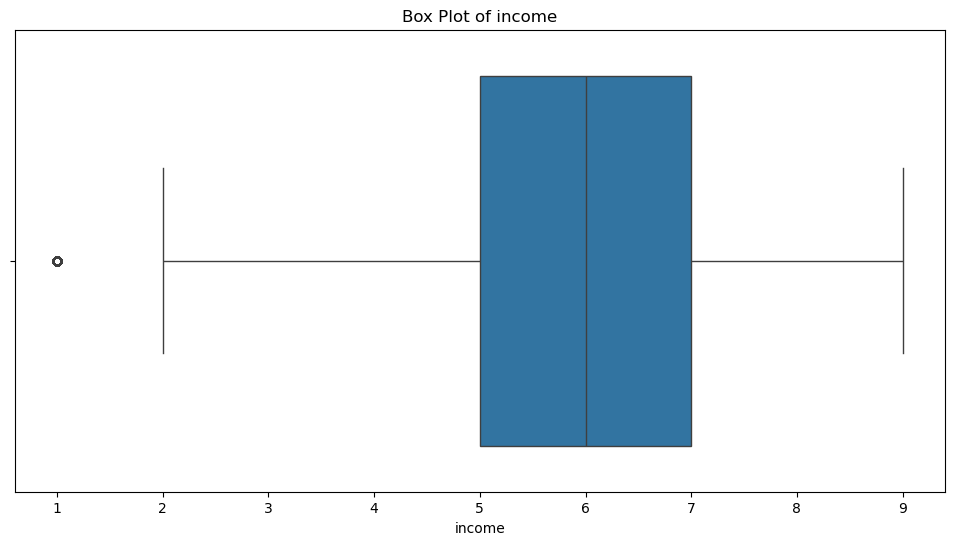

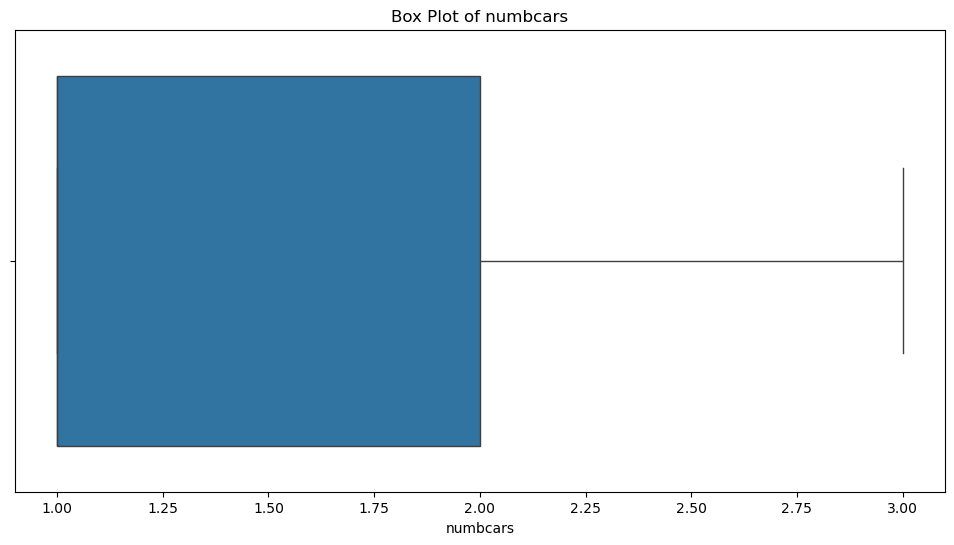

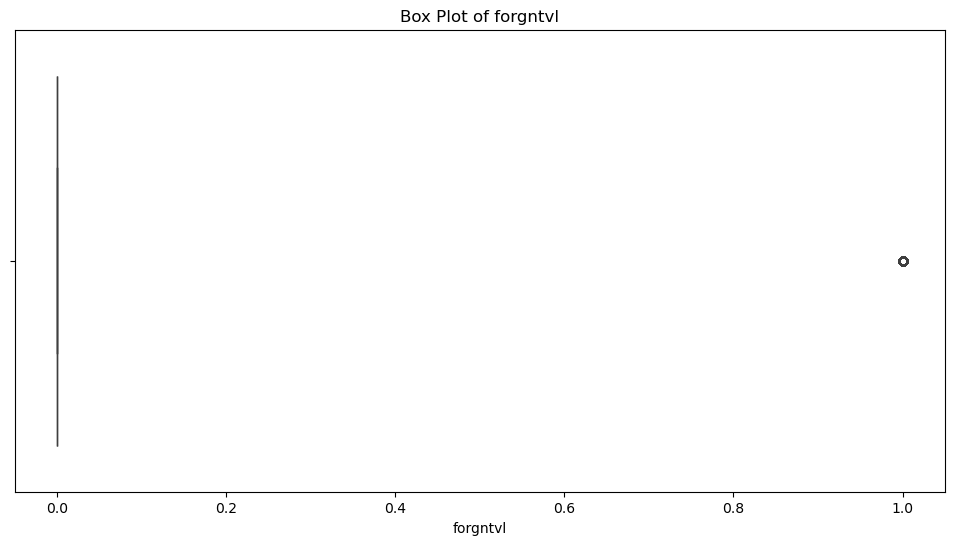

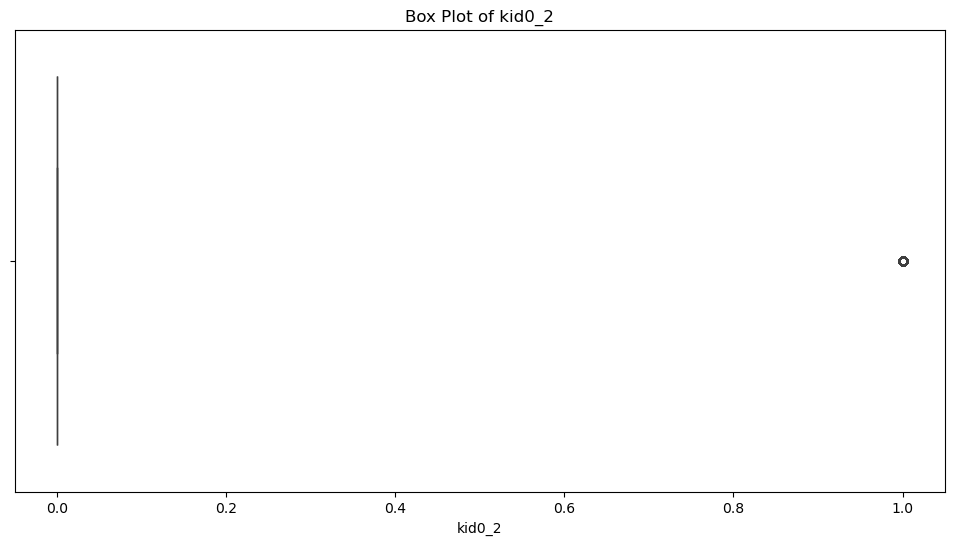

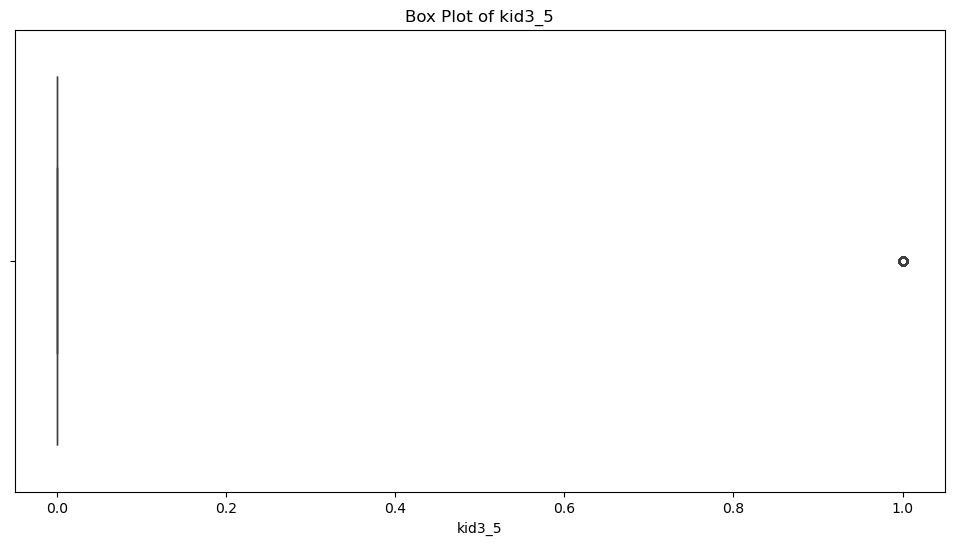

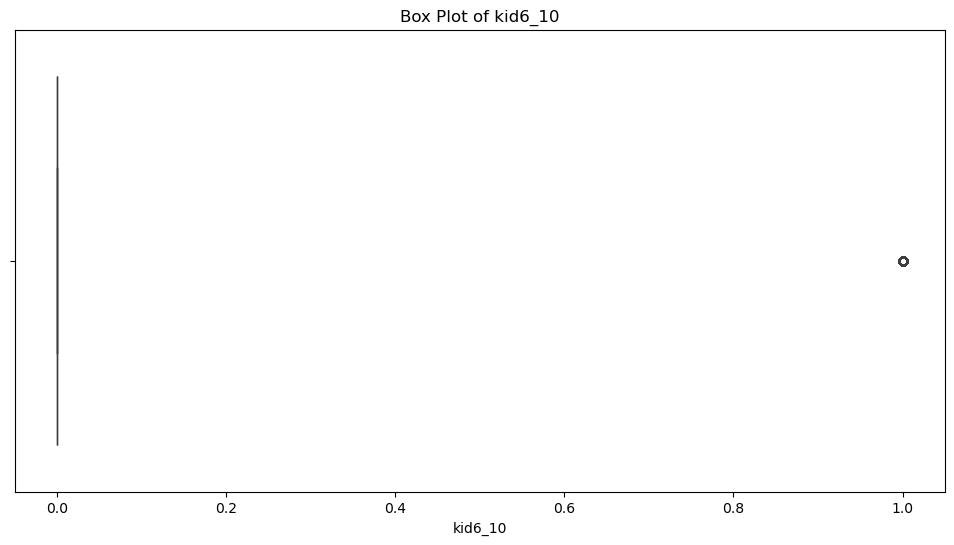

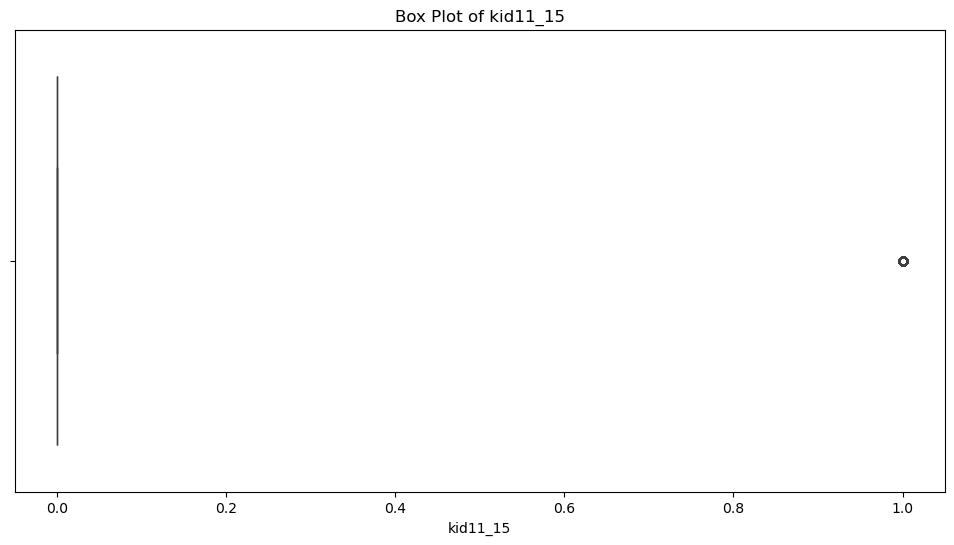

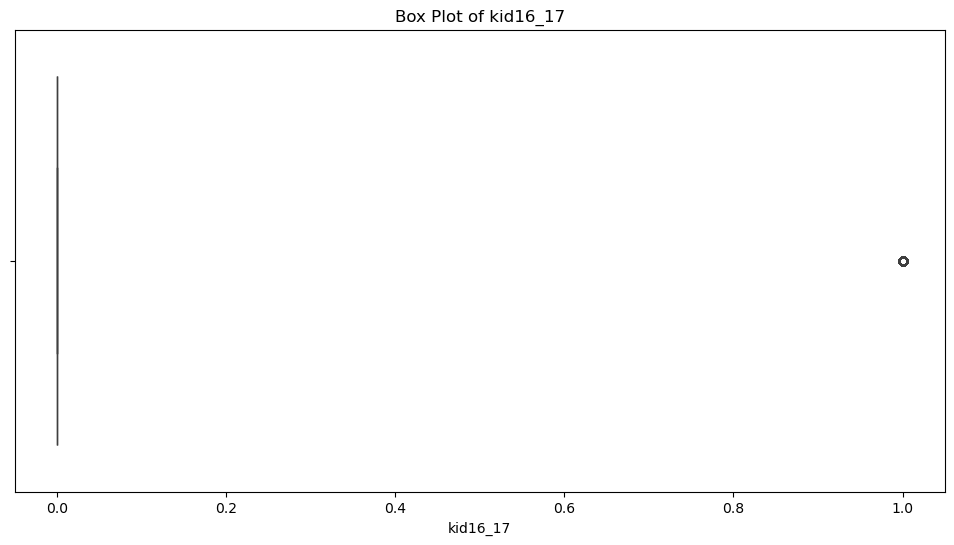

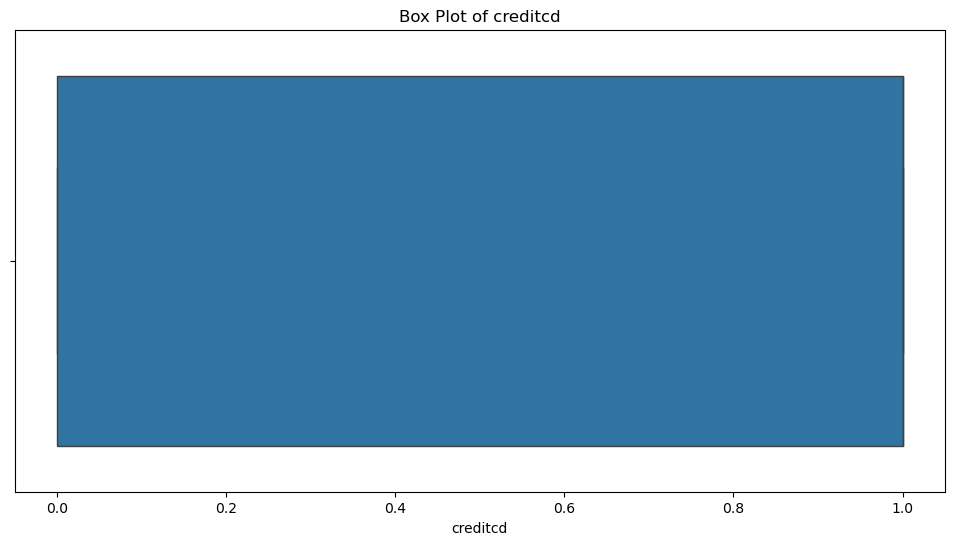

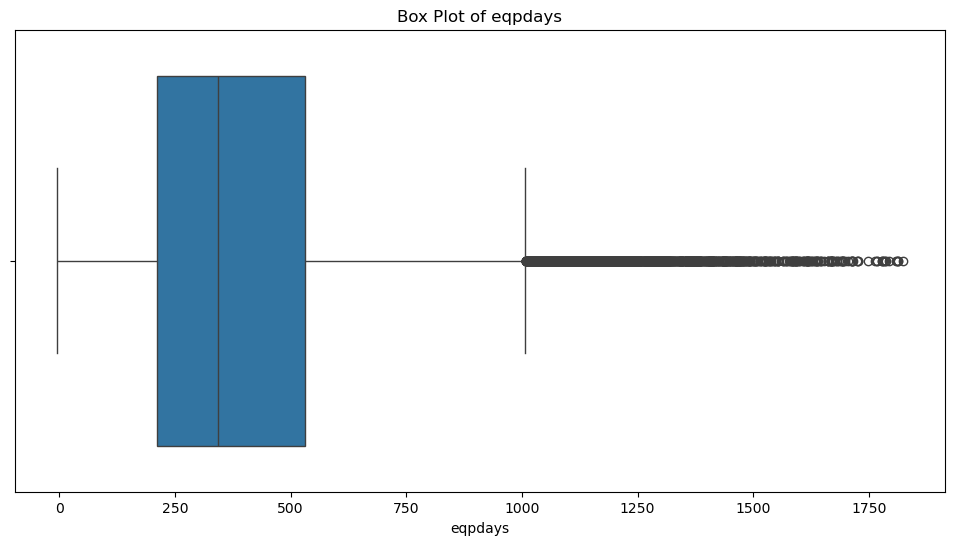

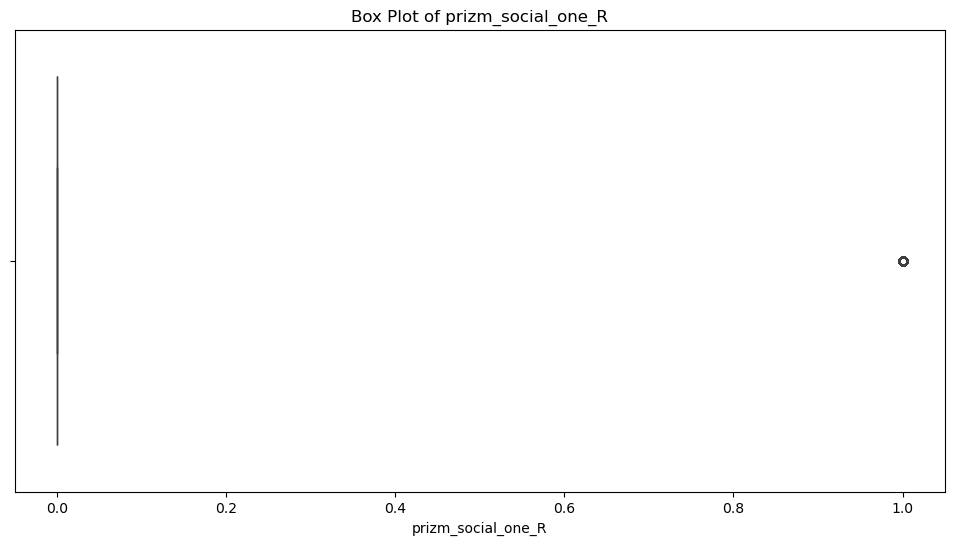

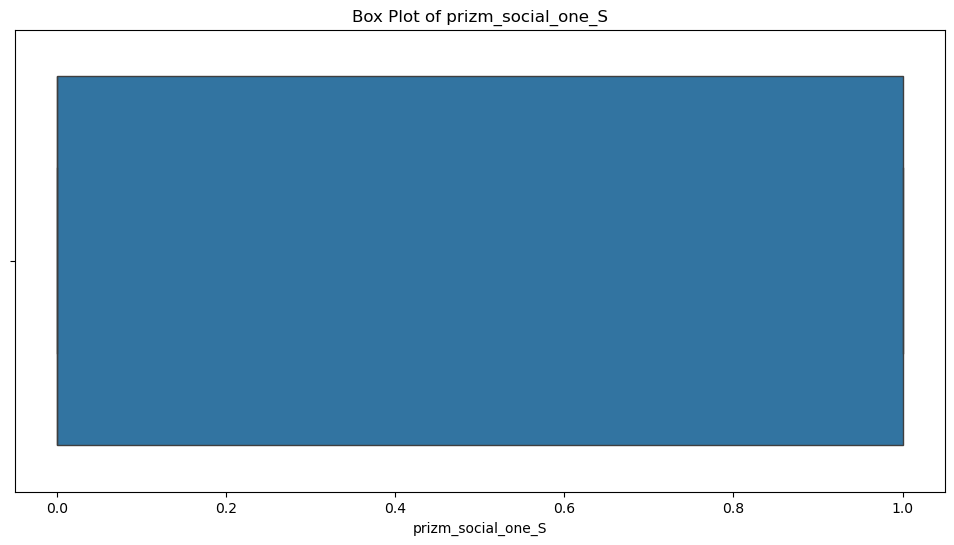

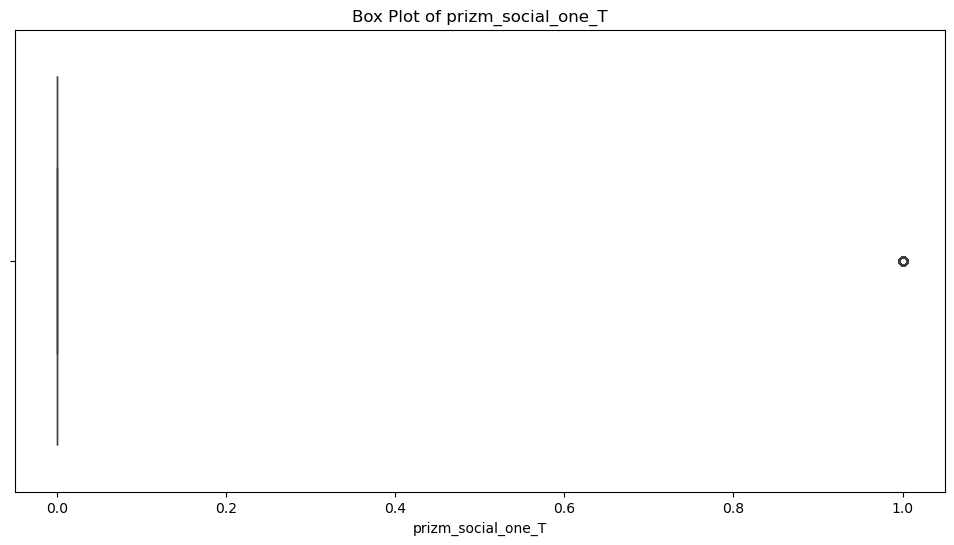

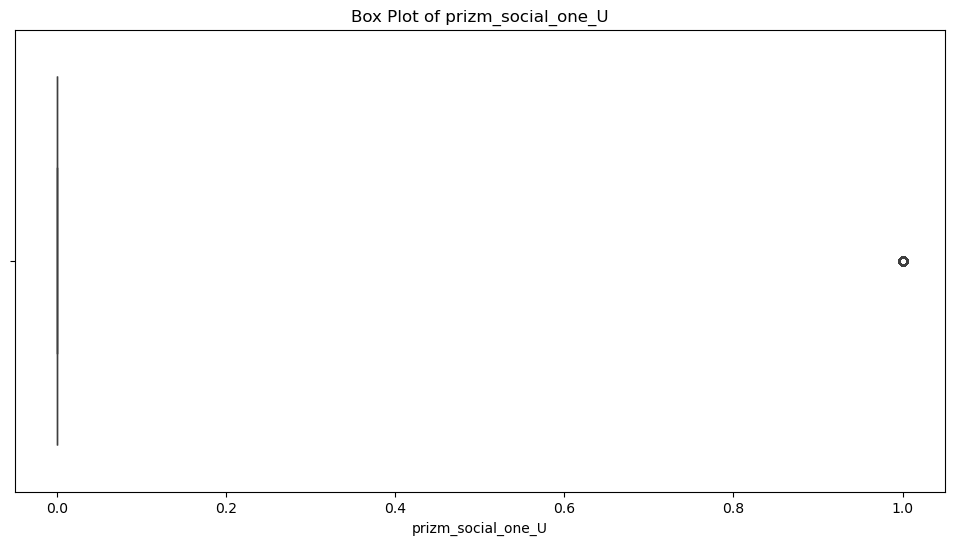

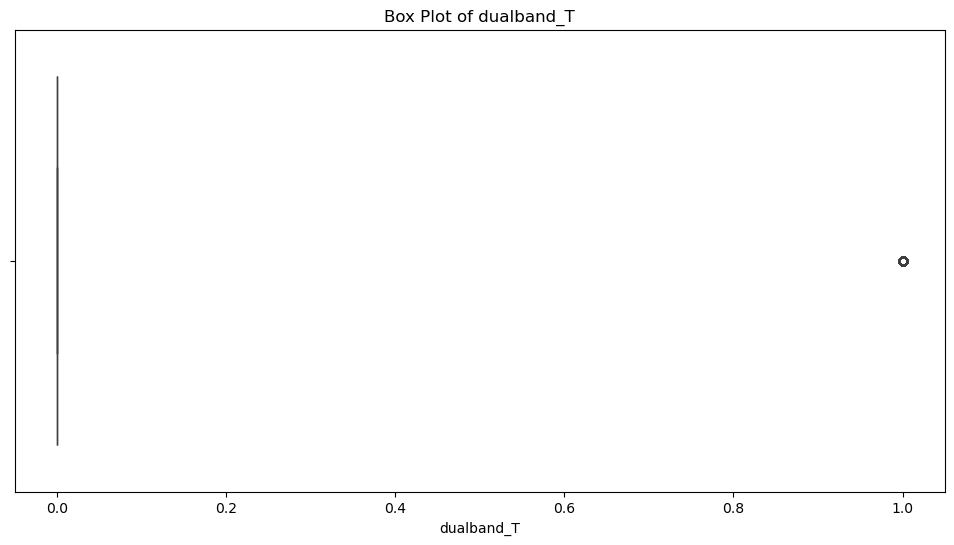

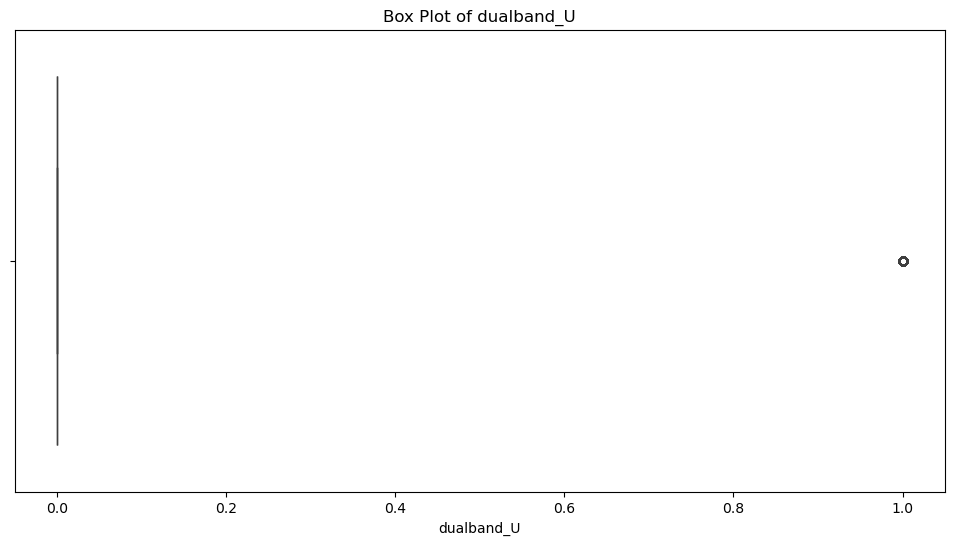

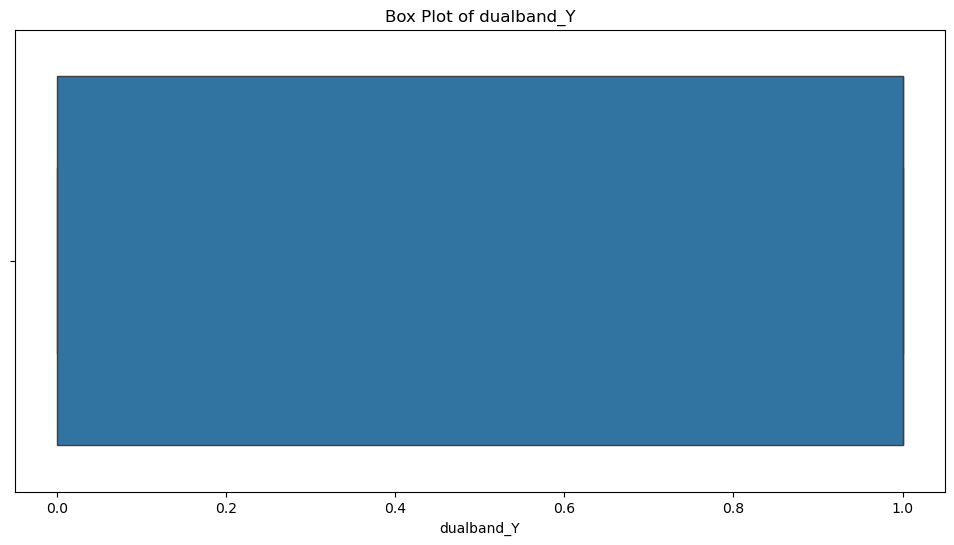

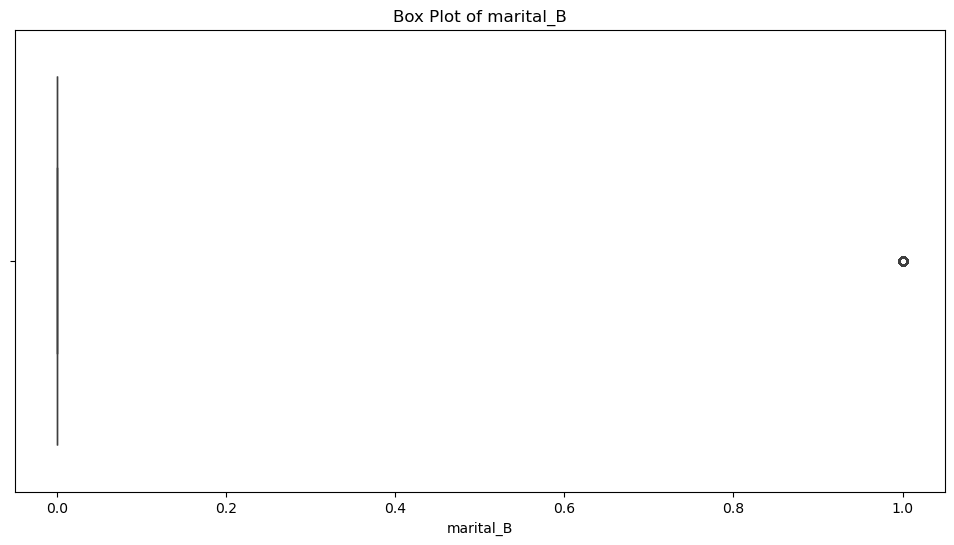

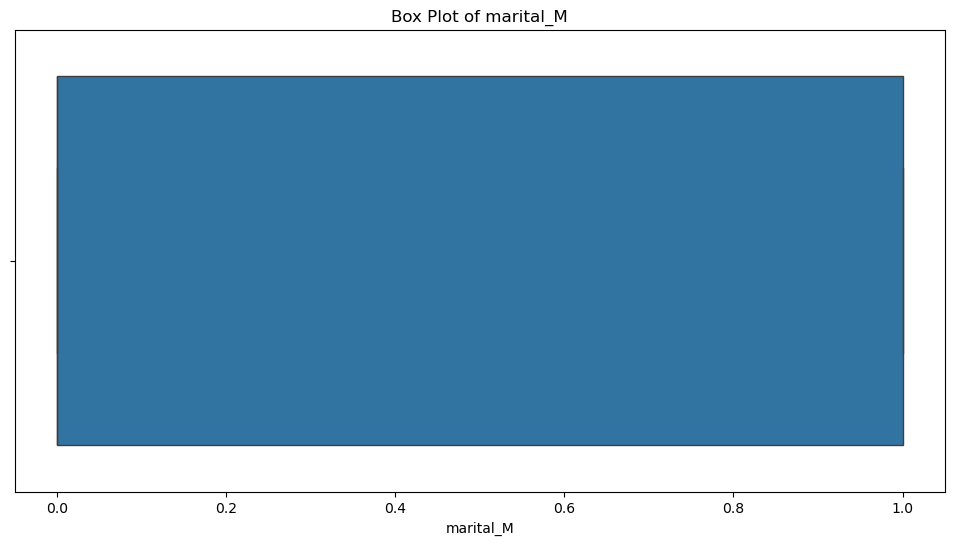

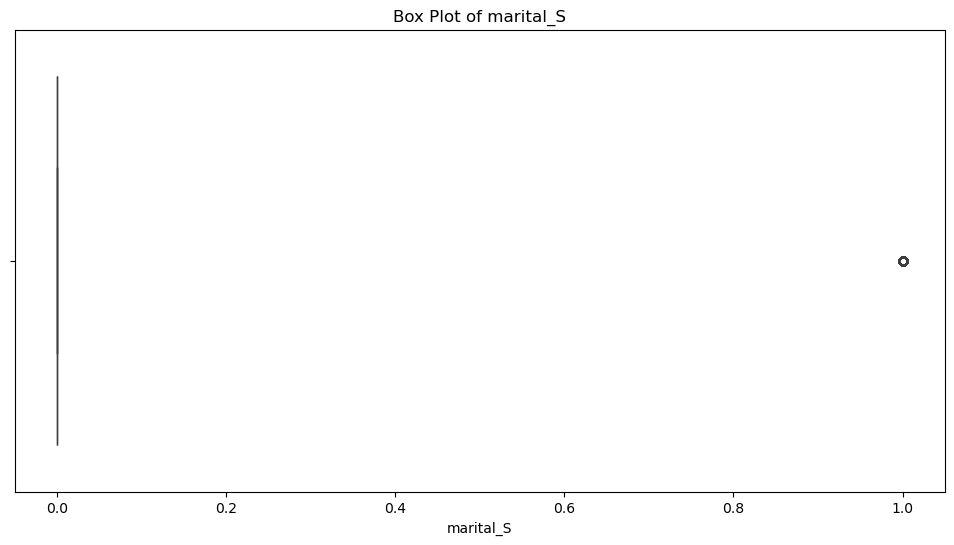

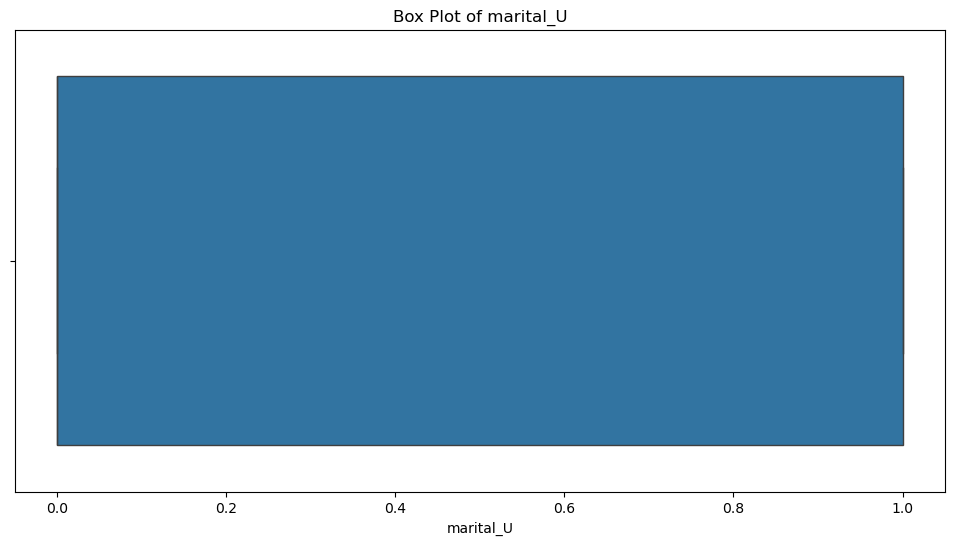

In [34]:
# Boxplots
for column in df.columns:   
    plt.figure(figsize=(12, 6))  
    sns.boxplot(x=df[column])     
    plt.title(f'Box Plot of {column}')  
    plt.xlabel(column)            
    plt.show() 

анализ ящиков показывает необходимость поработать с выбросами, что мы и сделаем ниже.

#### Посмотрим на корреляционную матрицу

In [35]:
# Расчет корреляционной матрицы 
corr = df.corr()

# Построение тепловой карты для корреляционной матрицы
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .format(precision=3)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_table_styles(magnify())

Как видно из матрицы, некоторые признаки имеют высокую положительную корреляцию — около 0,979, 0,995, 0,953 и т.д. Это вносит в модель проблему мультиколлинеарности. Чтобы решить эту проблему, мы можем обратиться к методам регуляризации.

## 2.3 Проанализируем важность признаков

### Проанализируем важность признаков методами Features selection

In [36]:
target_variable = 'churn'  # Replace with your actual target variable name
X = df.drop(columns=[target_variable])  # Features
y = df[target_variable]  # Target variable
feature_names = X.columns  # Имена признаков

Разобьем датасет на обучающиую и тестовую выборки

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Оценка признаков по дисперсии


In [38]:
X_train.head()

rev_Mean  mou_Mean  totmrc_Mean  da_Mean  ovrmou_Mean  ovrrev_Mean  \
75220  126.8550   2608.50        84.99   0.0000       204.75      51.1875   
48955  112.4950    557.50        49.99   1.2375       152.75      53.4925   
44966   22.9900      8.75        19.99   0.0000         0.00       0.0000   
13568  154.8800   1859.75       169.99   8.4150         0.00       0.0000   
92727   43.5175    354.50        49.99   0.2475         0.00       0.0000   

       vceovr_Mean  datovr_Mean  roam_Mean  change_mou  ...  \
75220      51.1875       0.0000      0.000      561.50  ...   
48955      53.2000       0.2925     17.775     -176.50  ...   
44966       0.0000       0.0000      0.000       -2.75  ...   
13568       0.0000       0.0000      0.000      248.25  ...   
92727       0.0000       0.0000      3.280        0.50  ...   

       prizm_social_one_S  prizm_social_one_T  prizm_social_one_U  dualband_T  \
75220                 0.0                 0.0                 1.0         0.0   
48955                 0.0                 0.0                 1.0         0.0   
44966                 0.0                 0.0                 0.0         0.0   
13568                 0.0                 1.0                 0.0         0.0   
92727                 0.0                 1.0                 0.0         0.0   

       dualband_U  dualband_Y  marital_B  marital_M  marital_S  marital_U  
75220         0.0         0.0        0.0        0.0        0.0        1.0  
48955         0.0         1.0        1.0        0.0        0.0        0.0  
44966         0.0         1.0        0.0        1.0        0.0        0.0  
13568         0.0         1.0        0.0        0.0        0.0        1.0  
92727         0.0         1.0        0.0        0.0        0.0        0.0  

[5 rows x 99 columns]

In [39]:
selector = VarianceThreshold(threshold=(0.1))
selector.fit(X_train)
constant_features = X_train.columns[~selector.get_support()]
print("Константные признаки: ", constant_features)
X_train_cleaned = X_train.loc[:, selector.get_support()]
X_test_cleaned = X_test.loc[:, selector.get_support()]  # Clean test set as well
print("оставшиеся признаки после удаления константных признаков: ", X_train_cleaned.columns)


Константные признаки:  Index(['rv', 'ownrent', 'infobase', 'forgntvl', 'kid0_2', 'kid3_5', 'kid6_10',
       'kid11_15', 'kid16_17', 'prizm_social_one_R', 'dualband_T',
       'dualband_U', 'marital_B'],
      dtype='object')
оставшиеся признаки после удаления константных признаков:  Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mea

удалим константные признаки

In [40]:
X_train_cleaned = X_train.loc[:, selector.get_support()]

# Optionally, display the cleaned DataFrame's columns
print("оставшиеся признаки после удаления константных признаков: ", X_train_cleaned.columns)

оставшиеся признаки после удаления константных признаков:  Index(['rev_Mean', 'mou_Mean', 'totmrc_Mean', 'da_Mean', 'ovrmou_Mean',
       'ovrrev_Mean', 'vceovr_Mean', 'datovr_Mean', 'roam_Mean', 'change_mou',
       'change_rev', 'drop_vce_Mean', 'drop_dat_Mean', 'blck_vce_Mean',
       'blck_dat_Mean', 'unan_vce_Mean', 'unan_dat_Mean', 'plcd_vce_Mean',
       'plcd_dat_Mean', 'recv_vce_Mean', 'recv_sms_Mean', 'comp_vce_Mean',
       'comp_dat_Mean', 'custcare_Mean', 'ccrndmou_Mean', 'cc_mou_Mean',
       'inonemin_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_cdat_Mean',
       'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean',
       'iwylis_vce_Mean', 'mouiwylisv_Mean', 'peak_vce_Mean', 'peak_dat_Mean',
       'mou_peav_Mean', 'mou_pead_Mean', 'opk_vce_Mean', 'opk_dat_Mean',
       'mou_opkv_Mean', 'mou_opkd_Mean', 'drop_blk_Mean', 'attempt_Mean',
       'complete_Mean', 'callfwdv_Mean', 'callwait_Mean', 'months', 'uniqsubs',
       'actvsubs', 'new_cell', 'asl_flag', 'totcalls

### Корреляционная фильтрация

In [41]:
# создадим функцию для расчета корреляции
def corr_feature_detect_and_clean(df, threshold=0.8):
    # Calculate the correlation matrix and identify correlated features
    corrmat = df.corr()
    corrmat = corrmat.abs().unstack()
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] 
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
    
    # Set to hold features to drop
    features_to_drop = set()

    # Collect features to drop based on correlation
    for feature in corrmat.feature1.unique():
        if feature not in features_to_drop:
            # Add all correlated features (except the feature itself) to drop list
            correlated_block = corrmat[corrmat.feature1 == feature]
            features_to_drop.update(correlated_block.feature2.tolist()) 
            features_to_drop.add(feature)  # also add the feature itself

    # Create a new DataFrame without the features to drop
    cleaned_df = df.drop(columns=features_to_drop, errors='ignore')

    return cleaned_df, features_to_drop


выведем коррелирующие пары и признаки

In [42]:
# Use the function with the new parameter name
corr = corr_feature_detect_and_clean(df=X_train, threshold=0.9)

# Print the correlated groups
for i in corr:
    print(i, '\n') 

       totmrc_Mean  da_Mean  datovr_Mean  roam_Mean  change_mou  change_rev  \
75220      84.9900   0.0000       0.0000      0.000      561.50     63.8850   
48955      49.9900   1.2375       0.2925     17.775     -176.50     -4.6850   
44966      19.9900   0.0000       0.0000      0.000       -2.75      0.0000   
13568     169.9900   8.4150       0.0000      0.000      248.25     -7.5600   
92727      49.9900   0.2475       0.0000      3.280        0.50      1.0525   
...            ...      ...          ...        ...         ...         ...   
6265       75.0000   1.2375       0.0000      1.410     -310.75    -23.7950   
54886      44.9900   0.0000       0.0000      0.000      -26.25      0.0000   
76820      44.9900   0.0000       0.0000      0.000      152.00      0.0000   
860        94.9900   0.0000       0.0000      0.000     -131.75     -4.9525   
15795      64.3475   0.9900       0.0000      0.000      -31.00    -12.7675   

       drop_vce_Mean  drop_dat_Mean  blck_vce_Mean 

почистим данные от признаков с корреляцией выше 0.9

In [43]:
cleaned_X_train, dropped_features = corr_feature_detect_and_clean(df=X_train_cleaned, threshold=0.9)
cleaned_X_test = X_test_cleaned.drop(columns=dropped_features, errors='ignore')  # Clean test set as well
print("удаленные признаки: ", dropped_features)
print("форма очищенного DataFrame: ", cleaned_X_train.shape)


удаленные признаки:  {'mou_cdat_Mean', 'avg3qty', 'mou_opkd_Mean', 'cc_mou_Mean', 'comp_dat_Mean', 'totmou', 'avg3mou', 'attempt_Mean', 'totcalls', 'avg3rev', 'complete_Mean', 'avg6qty', 'avg6mou', 'avgqty', 'totrev', 'plcd_dat_Mean', 'adjmou', 'ovrmou_Mean', 'peak_dat_Mean', 'ovrrev_Mean', 'recv_vce_Mean', 'vceovr_Mean', 'inonemin_Mean', 'adjqty', 'ccrndmou_Mean', 'rev_Mean', 'peak_vce_Mean', 'adjrev', 'opk_dat_Mean', 'mou_Mean', 'plcd_vce_Mean', 'comp_vce_Mean'}
форма очищенного DataFrame:  (80000, 54)


### Random Forest для определения важности признаков 

In [44]:
# Обучение модели
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_cleaned, y_train)

# Получение важности признаков
rf_importances = rf.feature_importances_

# Преобразование в DataFrame
importance_df = pd.DataFrame({
    'Feature': X_train_cleaned.columns,
    'Importance': rf_importances
})

# Сортировка по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Вывод важности признаков
print("важность признаков Random Forest:\n", importance_df)

важность признаков Random Forest:
           Feature  Importance
78        eqpdays    0.035612
9      change_mou    0.027530
48         months    0.027516
10     change_rev    0.022481
1        mou_Mean    0.021915
..            ...         ...
16  unan_dat_Mean    0.000864
12  drop_dat_Mean    0.000641
20  recv_sms_Mean    0.000371
14  blck_dat_Mean    0.000363
46  callfwdv_Mean    0.000189

[86 rows x 2 columns]


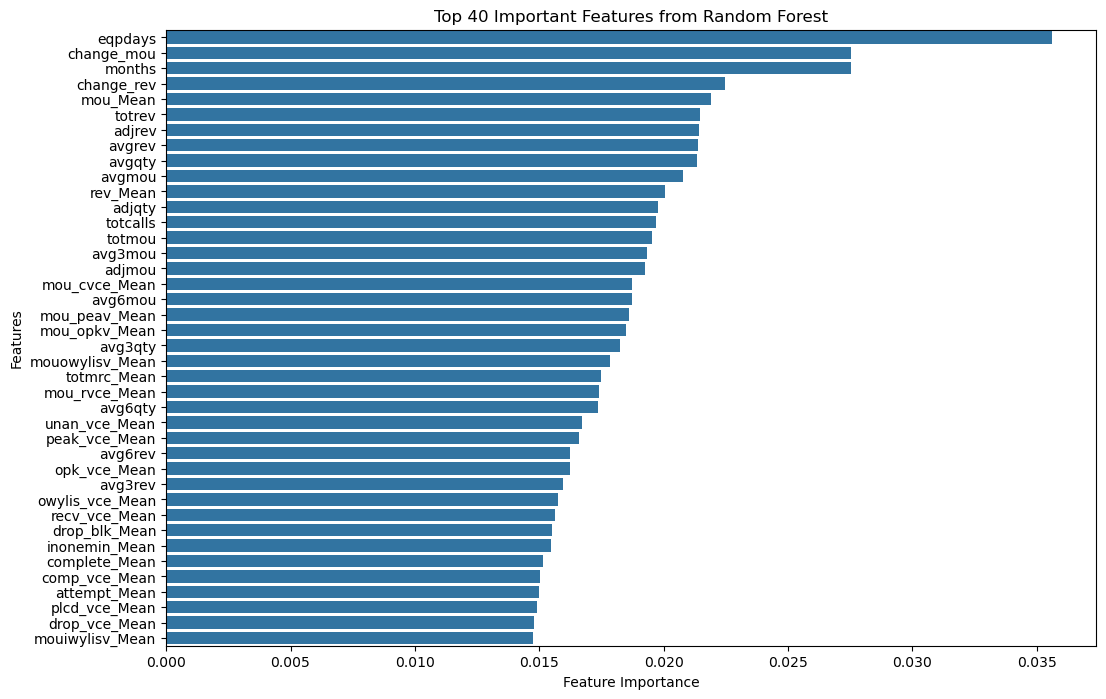

In [45]:
# Построение графика для 40 самых важных признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(40))  # Топ 40 признаков
plt.title('Top 40 Important Features from Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

#### Как видим наиболее важные признаки RandomForest: eqpdays (количество дней, прошедших с момента последней активности), change_mou (Изменения в количестве минут), months  (месяцы), mou_Mean (cредние значения по продолжительности разговоров) и др.

### Lasso для определения важности признаков

In [46]:
# Standardizing the data for Lasso
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(cleaned_X_train)
X_test_scaled = scaler.transform(cleaned_X_test)

# Fit Lasso Regression
lasso = Lasso(alpha=0.01)  # You can adjust the alpha parameter
lasso.fit(X_train_scaled, y_train)

# Get coefficients and create DataFrame
lasso_coef = pd.DataFrame({
    'Feature': cleaned_X_test.columns,
    'Coefficient': lasso.coef_
})

# Filter to get selected features
selected_features = lasso_coef[lasso_coef['Coefficient'] != 0]
print("Выбранные признакис использованием Lasso:\n", selected_features)

# Remove unnecessary features
selected_feature_names = selected_features['Feature'].values
X_cleaned = X[selected_feature_names]  

Выбранные признакис использованием Lasso:
         Feature  Coefficient
0   totmrc_Mean    -0.014448
4    change_mou    -0.004560
28       months    -0.005624
29     uniqsubs     0.007336
32     asl_flag    -0.016413
33       avgrev     0.006683
36   refurb_new     0.005751
37    hnd_price    -0.020402
41          lor    -0.010578
45     creditcd    -0.000706
46      eqpdays     0.036891
53    marital_U     0.008243


посмотрим на график

/tmp/ipykernel_184607/2343955688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.loc[:, 'Sign'] = np.where(selected_features['Coefficient'] > 0, 'Positive', 'Negative')


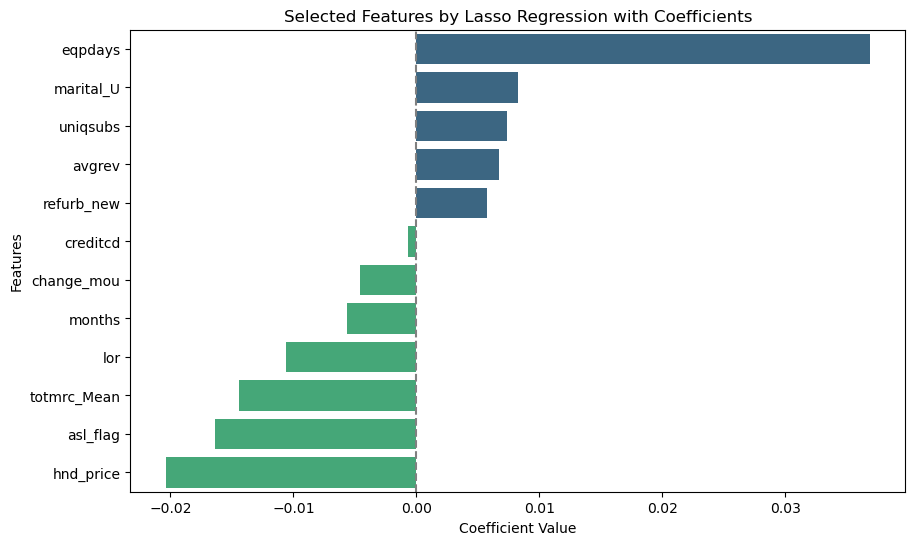

In [47]:
# Visualizing the Lasso selected features
plt.figure(figsize=(10, 6))

# Add a 'Sign' column using .loc
selected_features.loc[:, 'Sign'] = np.where(selected_features['Coefficient'] > 0, 'Positive', 'Negative')

# Create the bar plot with hue assignment
sns.barplot(data=selected_features.sort_values(by='Coefficient', ascending=False),
            x='Coefficient', y='Feature', hue='Sign', palette='viridis', legend=False)
            
plt.title('Selected Features by Lasso Regression with Coefficients')
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.axvline(0, color='grey', linestyle='--')  # Add a reference line at 0
plt.show()

#### Как видим наиболее важные признаки Lasso: eqpdays (количество дней, прошедших с момента последней активности), martial_U (семейное положение), uniqsubs, avgrev и др.

### SelectKBest для определения важности признаков

In [48]:
# k = 40  # Specify the number of top features you want to select
# kbest_selector = SelectKBest(score_func=f_classif, k=k)  # Using ANOVA F-test for classification
# X_train_kbest = kbest_selector.fit_transform(cleaned_X_train, y_train)
# X_test_kbest = kbest_selector.transform(cleaned_X_test)

# # Get the selected feature names
# mask = kbest_selector.get_support()  # Get boolean mask of selected features
# selected_features = cleaned_X_train.columns[kbest_selector.get_support()]

# selected_features_2 = pd.DataFrame({
#     'Feature': cleaned_X_train.columns[mask],
#     'Score': kbest_selector.scores_[mask]
# }).sort_values(by='Score', ascending=False)

# print(selected_features_2)

k = 40  # Укажите количество лучших признаков, которые хотите выбрать
kbest_selector = SelectKBest(score_func=f_classif, k=k)  # Используем ANOVA F-тест для классификации

# Применяем отбор признаков к обучающим данным
X_train_kbest = kbest_selector.fit_transform(cleaned_X_train, y_train)

# Применяем тот же отбор к тестовым данным
X_test_kbest = kbest_selector.transform(cleaned_X_test)

# Получаем маску выбранных признаков
mask = kbest_selector.get_support()  # Получаем булеву маску выбранных признаков

# Получаем названия выбранных признаков
selected_features = cleaned_X_train.columns[mask].tolist()  # Преобразуем в список
print("Selected Features:", selected_features)

# Создаем DataFrame с названиями признаков и их оценками
selected_features_2 = pd.DataFrame({
    'Feature': cleaned_X_train.columns[mask],
    'Score': kbest_selector.scores_[mask]
}).sort_values(by='Score', ascending=False)

print(selected_features_2)

Selected Features: ['totmrc_Mean', 'da_Mean', 'change_mou', 'change_rev', 'drop_vce_Mean', 'blck_vce_Mean', 'unan_vce_Mean', 'custcare_Mean', 'threeway_Mean', 'mou_cvce_Mean', 'mou_rvce_Mean', 'owylis_vce_Mean', 'mouowylisv_Mean', 'iwylis_vce_Mean', 'mouiwylisv_Mean', 'mou_peav_Mean', 'opk_vce_Mean', 'mou_opkv_Mean', 'drop_blk_Mean', 'callwait_Mean', 'months', 'uniqsubs', 'actvsubs', 'asl_flag', 'avgrev', 'avgmou', 'avg6rev', 'refurb_new', 'hnd_price', 'phones', 'models', 'lor', 'adults', 'creditcd', 'eqpdays', 'prizm_social_one_U', 'dualband_Y', 'marital_M', 'marital_S', 'marital_U']
               Feature        Score
34             eqpdays  1060.128681
28           hnd_price   849.973281
23            asl_flag   419.682878
0          totmrc_Mean   368.891780
9        mou_cvce_Mean   209.137456
16        opk_vce_Mean   198.006534
10       mou_rvce_Mean   194.697332
17       mou_opkv_Mean   191.897849
15       mou_peav_Mean   182.682770
30              models   151.842535
11     owyli

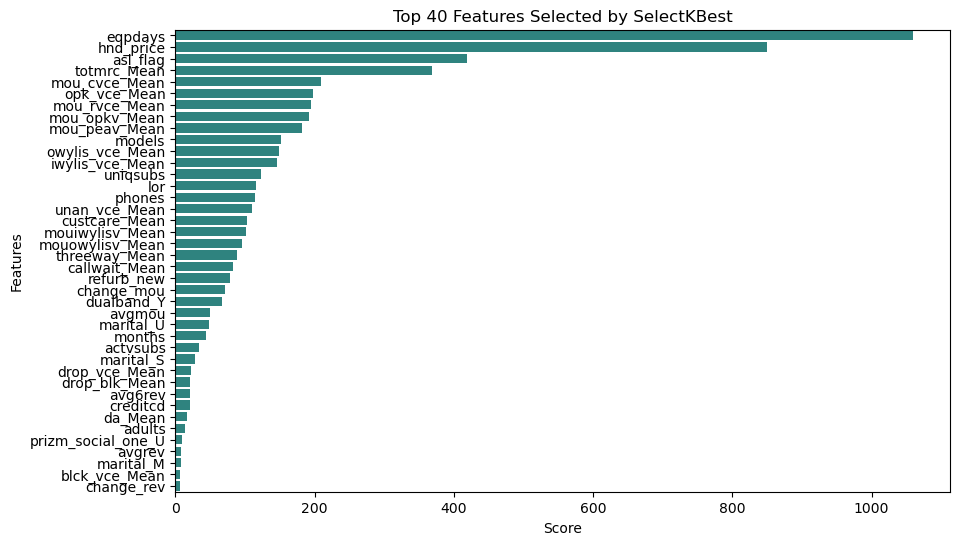

In [49]:
# Visualization of selected features
# Adding a hue column for visualization purposes
selected_features_2['Category'] = 'Selected'  # Assign a fixed category for all

# Visualization of selected features
plt.figure(figsize=(10, 6))
sns.barplot(data=selected_features_2, x='Score', y='Feature', hue='Category', palette='viridis', legend=False)
plt.title('Top 40 Features Selected by SelectKBest')
plt.xlabel('Score')
plt.ylabel('Features')
plt.axvline(0, color='grey', linestyle='--')  # Optional: Add a reference line at 0
plt.show()

#### Как видим наиболее важные признаки SelectKBest: eqpdays (количество дней, прошедших с момента последней активности), hnd_price (цена устройства), asl_flag (Признаки, связанные с флагом нового клиента), totmrc_Mean (Средние значения общим расходам) и др.

# 3. Построение модели классификации

Убеждаемся, что и для train, и для test выборки целевой переменной соотношения классов приблизительно одинаковое.

In [50]:
y_train.value_counts(normalize=True).sort_index()

churn
0    0.505212
1    0.494787
Name: proportion, dtype: float64

In [51]:
y_test.value_counts(normalize=True).sort_index()

churn
0    0.50105
1    0.49895
Name: proportion, dtype: float64

## 3.2 Построение логистической регрессии, случайного леса,  градиентного бустинга, метода опорных векторов,стекинга

### Проведем шкалирование

In [52]:
# Проведем шкалирование датасета

scaler = StandardScaler().set_output(transform="pandas")
X_train_scaled = scaler.fit_transform(X_train_kbest)
X_test_scaled = scaler.transform(X_test_kbest)


### LogisticRegression

In [53]:
log_reg = LogisticRegression(max_iter=1000, C=50, random_state=42)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=50, max_iter=1000, random_state=42)

In [54]:
y_pred_log_reg = log_reg.predict(X_test_scaled)

Точность (accuracy) на train данных 

In [55]:
accuracy_score(y_train, log_reg.predict(X_train_scaled))

0.5849875

Точность (accuracy) на test данных 

In [56]:
accuracy_score(y_test, y_pred_log_reg)

0.58045

Сводная таблица метрик 

In [57]:
print(classification_report(y_test, y_pred_log_reg), )

              precision    recall  f1-score   support

           0       0.58      0.58      0.58     10021
           1       0.58      0.58      0.58      9979

    accuracy                           0.58     20000
   macro avg       0.58      0.58      0.58     20000
weighted avg       0.58      0.58      0.58     20000



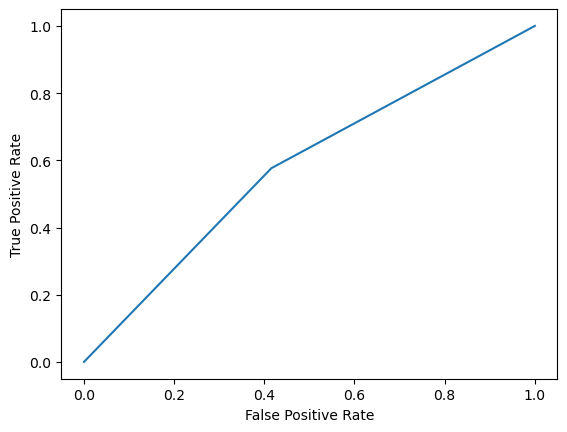

In [58]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_log_reg)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [59]:
auc = metrics.roc_auc_score(y_test, y_pred_log_reg)
print("AUC: %.3f" % auc)

AUC: 0.580


### RandomForestClassifier

In [60]:
rfc = RandomForestClassifier(n_estimators=500, max_depth=7, bootstrap=True, n_jobs=-1, random_state=42)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=7, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [61]:
y_pred_rfc = rfc.predict(X_test_scaled)

Точность (accuracy) на train данных 

In [62]:
accuracy_score(y_train, rfc.predict(X_train_scaled))

0.620925

точность (accuracy) на test данных

In [63]:
accuracy_score(y_test, y_pred_rfc)

0.60755

Сводная таблица метрик

In [64]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.63      0.53      0.58     10021
           1       0.59      0.68      0.64      9979

    accuracy                           0.61     20000
   macro avg       0.61      0.61      0.61     20000
weighted avg       0.61      0.61      0.61     20000



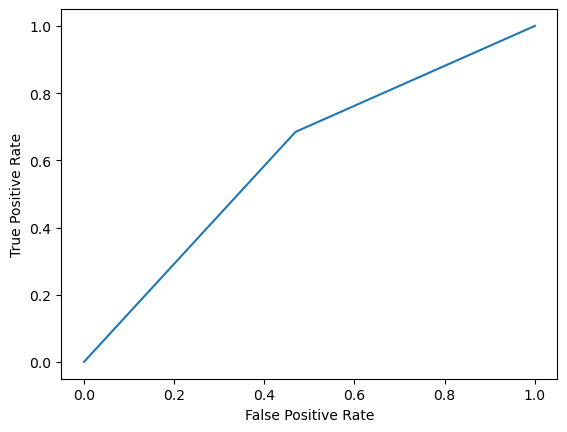

In [65]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_rfc)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [66]:
auc = metrics.roc_auc_score(y_test, y_pred_rfc)
print("AUC: %.3f" % auc)

AUC: 0.608


### GradientBoostingClassifier

In [67]:
gbc = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
gbc.fit(X_train_scaled, y_train)

GradientBoostingClassifier(max_depth=5, n_estimators=200, random_state=42)

In [68]:
y_pred_gbc = gbc.predict(X_test_scaled)

In [69]:
accuracy_score(y_test, gbc.predict(X_test_scaled))

0.63455

In [70]:
print(classification_report(y_test, y_pred_gbc))

              precision    recall  f1-score   support

           0       0.64      0.61      0.63     10021
           1       0.63      0.66      0.64      9979

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000



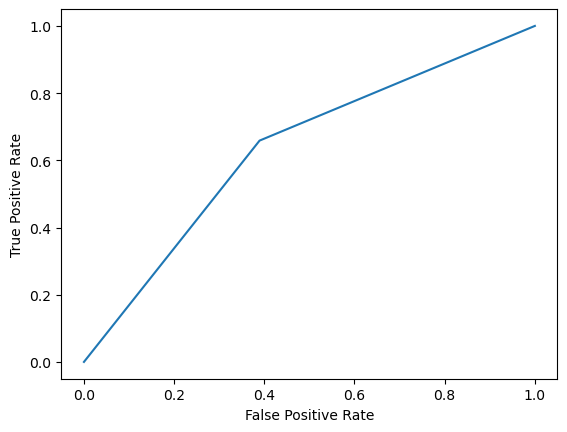

In [71]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_gbc)

# построение ROC кривой
plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [72]:
auc = metrics.roc_auc_score(y_test, y_pred_gbc)
print("AUC: %.3f" % auc)

AUC: 0.635


### Стекинг для RandomForestClassifier, GradientBoostingClassifier, LogisticRegression

In [73]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold

# Определение базовых моделей
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, bootstrap=True, n_jobs=-1, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)),
]

# Финальная модель
final_model = LogisticRegression(max_iter=2000)

# Создание StackingClassifier
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=final_model,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42))

In [74]:
# Кросс-валидация и подсчет метрик для StackingClassifier на обучающей выборке
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
y_train_pred = cross_val_predict(stacking_model, X_train, y_train, cv=cv)

In [75]:
# Вычисление метрик для тренировочной выборки
accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='weighted')
recall_train = recall_score(y_train, y_train_pred, average='weighted')
f1_train = f1_score(y_train, y_train_pred, average='weighted')
roc_auc_train = roc_auc_score(y_train, y_train_pred)

In [76]:
# Вывод метрик для тренировочной выборки
print("Метрики для StackingClassifier на тренировочной выборке:")
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print(f"ROC AUC: {roc_auc_train:.4f}")

Метрики для StackingClassifier на тренировочной выборке:
Accuracy: 0.6237
Precision: 0.6242
Recall: 0.6237
F1 Score: 0.6236
ROC AUC: 0.6239


In [77]:
# Обучение модели на полных данных
stacking_model.fit(X_train, y_train)

StackingClassifier(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=5, n_jobs=-1,
                                                       random_state=42)),
                               ('gb',
                                GradientBoostingClassifier(random_state=42))],
                   final_estimator=LogisticRegression(max_iter=2000))

In [78]:
# Оценка на тестовом наборе
y_test_pred = stacking_model.predict(X_test)

In [79]:
# Вычисление метрик для тестовой выборки
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='weighted')
recall_test = recall_score(y_test, y_test_pred, average='weighted')
f1_test = f1_score(y_test, y_test_pred, average='weighted')
roc_auc_test = roc_auc_score(y_test, y_test_pred)

In [80]:
# Вывод метрик для тестовой выборки
print("\nМетрики для StackingClassifier на тестовом наборе:")
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"ROC AUC: {roc_auc_test:.4f}")


Метрики для StackingClassifier на тестовом наборе:
Accuracy: 0.6316
Precision: 0.6319
Recall: 0.6316
F1 Score: 0.6314
ROC AUC: 0.6316


метрики при стекинге улучшились 

### Проведем кросс-валидацию для Random Forest и Gradient Boosting 

In [82]:
from sklearn.model_selection import cross_val_predict, StratifiedKFold
# Определение базовых моделей
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, bootstrap=True, n_jobs=-1, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)),
]

In [83]:
# Словарь для хранения метрик
metrics = {}

# Оценка каждой базовой модели и сбор метрик
for name, model in base_models:
    scores = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42), scoring='accuracy')
    metrics[name] = {
        'accuracy': np.mean(scores),
        # Для других метрик используем cross_val_predict
        'precision': precision_score(y_train, cross_val_predict(model, X_train, y_train, cv=3), average='weighted'),
        'recall': recall_score(y_train, cross_val_predict(model, X_train, y_train, cv=3), average='weighted'),
        'f1': f1_score(y_train, cross_val_predict(model, X_train, y_train, cv=3), average='weighted'),
        'roc_auc': roc_auc_score(y_train, cross_val_predict(model, X_train, y_train, cv=3))
    }

In [84]:
# Печать результатов
print("Метрики базовых моделей:")
for name, scores in metrics.items():
    print(f"{name}:")
    print(f"  Accuracy: {scores['accuracy']:.4f}")
    print(f"  Precision: {scores['precision']:.4f}")
    print(f"  Recall: {scores['recall']:.4f}")
    print(f"  F1 Score: {scores['f1']:.4f}")
    print(f"  ROC AUC: {scores['roc_auc']:.4f}\n")

Метрики базовых моделей:
rf:
  Accuracy: 0.5944
  Precision: 0.5962
  Recall: 0.5944
  F1 Score: 0.5933
  ROC AUC: 0.5950

gb:
  Accuracy: 0.6234
  Precision: 0.6231
  Recall: 0.6226
  F1 Score: 0.6224
  ROC AUC: 0.6228



выведем модель с наилучшими показателями

In [85]:
# Определение модели с наилучшими показателями
best_model = max(metrics.items(), key=lambda item: item[1]['f1'])  # или можно использовать любую другую метрику
print(f"Модель с наилучшим показателем по F1 Score: {best_model[0]} с F1 Score {best_model[1]['f1']:.4f}")

Модель с наилучшим показателем по F1 Score: gb с F1 Score 0.6224


Как видим GradientBoosting показывает лучшие показатели,чем  RandomForest. Т.е. по F1 score: 0.6224 к 0.5933.

## 4. Тонкая настройка модели

### 4.1 Grid Search для LogisticRegression

In [86]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
log_reg_new = LogisticRegression(random_state=42)
param_grid = {"penalty": ["l2", "l1"],
              'C': np.arange(10, 70, 10),
              "max_iter" : [1000],
              "solver": ["liblinear"]
              }

grid = GridSearchCV(log_reg_new, param_grid, cv = 5, n_jobs=-1, verbose = 3)

grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': array([10, 20, 30, 40, 50, 60]),
                         'max_iter': [1000], 'penalty': ['l2', 'l1'],
                         'solver': ['liblinear']},
             verbose=3)

In [87]:
y_pred_grid = grid.predict(X_test_scaled)

In [88]:
accuracy_score(y_train, log_reg.predict(X_train_scaled))

0.5849875

In [89]:
accuracy_score(y_test, y_pred_grid)

0.58065

In [90]:
print(classification_report(y_test, y_pred_grid))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58     10021
           1       0.58      0.58      0.58      9979

    accuracy                           0.58     20000
   macro avg       0.58      0.58      0.58     20000
weighted avg       0.58      0.58      0.58     20000



### 4.2 Grid Search для RandomForestClassifier

In [91]:
# Настройка параметров для Randomized Search
param_distributions = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],  # Исправлено: убрано 'auto'
}

In [92]:
# Обучение Random Forest с Randomized Search
rfc = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_distributions,
                                   n_iter=10, 
                                   scoring='accuracy', cv=3, n_jobs=2, verbose=2, random_state=42)  

# Обучение модели
random_search.fit(X_train_scaled, y_train)

[CV 3/5] END C=20, max_iter=1000, penalty=l1, solver=liblinear;, score=0.582 total time=  17.6s
[CV 2/5] END C=10, max_iter=1000, penalty=l2, solver=liblinear;, score=0.587 total time=   5.0s
[CV 4/5] END C=40, max_iter=1000, penalty=l2, solver=liblinear;, score=0.585 total time=  10.2s
[CV 1/5] END C=60, max_iter=1000, penalty=l1, solver=liblinear;, score=0.579 total time=   3.4s
[CV 5/5] END C=10, max_iter=1000, penalty=l2, solver=liblinear;, score=0.586 total time=   7.5s
[CV 2/5] END C=50, max_iter=1000, penalty=l2, solver=liblinear;, score=0.587 total time=   5.6s
[CV 2/5] END C=60, max_iter=1000, penalty=l2, solver=liblinear;, score=0.587 total time=   5.3s
[CV 2/5] END C=20, max_iter=1000, penalty=l2, solver=liblinear;, score=0.587 total time=   5.5s
[CV 1/5] END C=40, max_iter=1000, penalty=l1, solver=liblinear;, score=0.579 total time=   3.7s
[CV 4/5] END C=50, max_iter=1000, penalty=l2, solver=liblinear;, score=0.585 total time=   9.7s
[CV 1/5] END C=10, max_iter=1000, penalt

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_jobs=2,
                   param_distributions={'max_depth': [10, 20, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy', verbose=2)

In [93]:
# Получение лучших параметров
print("Лучшие параметры:", random_search.best_params_)

Лучшие параметры: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 30}


In [94]:
# Использование лучшей модели для предсказаний
best_rfc = random_search.best_estimator_
y_pred_rfc = best_rfc.predict(X_test_scaled)

In [95]:
# Рассчет точности
accuracy_train = accuracy_score(y_train, best_rfc.predict(X_train_scaled))
accuracy_test = accuracy_score(y_test, y_pred_rfc)


In [96]:
print(f"Train Accuracy: {accuracy_train:.3f}")
print(f"Test Accuracy: {accuracy_test:.3f}")

Train Accuracy: 0.986
Test Accuracy: 0.630


Здесь мы переобучились (Overfitting), так ка Train Accuracy: 0.986, а Test Accuracy: 0.630. Необходимо использовать кросс-валидацию для более надежной оценки производительности модели на различных подвыборках данных.

### 4.3 Сетка GridSearchCV для AdaBoostClassifier(DecisionTreeClassifier)

In [97]:
# Создание классификатора AdaBoost с использованием DecisionTreeClassifier
ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1, random_state=42),  
    algorithm='SAMME',  # Указываем использование алгоритма SAMME
    random_state=42
)

In [98]:
# Определение параметров для GridSearch
params = {
    'n_estimators': [500, 1000],
    'learning_rate': [0.01, 0.1, 0.5, 1, 10]
}

In [99]:
# Выполнение GridSearchCV
grid_ada = GridSearchCV(ada, params, cv=5, n_jobs=-1, verbose=3)
grid_ada.fit(X_train_scaled, y_train)

[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  39.5s
[CV] END max_depth=30, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  39.9s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  34.8s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=300; total time=  46.5s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  33.2s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  31.4s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  26.0s
[CV] END max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  25.7s
[CV] END max_depth=10, max_features=log2

GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          estimator=DecisionTreeClassifier(max_depth=1,
                                                                           random_state=42),
                                          random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5, 1, 10],
                         'n_estimators': [500, 1000]},
             verbose=3)

In [100]:
# Прогнозирование на тестовой выборке
y_pred = grid_ada.predict(X_test_scaled)

In [101]:
# Получение метрик
print("Лучшие параметры:", grid_ada.best_params_)
print("F1-мера:", f1_score(y_test, y_pred))
print("Отчет о классификации:\n", classification_report(y_test, y_pred))
print("Матрица ошибок:\n", confusion_matrix(y_test, y_pred))

Лучшие параметры: {'learning_rate': 1, 'n_estimators': 1000}
F1-мера: 0.6194077809085966
Отчет о классификации:
               precision    recall  f1-score   support

           0       0.62      0.60      0.61     10021
           1       0.61      0.63      0.62      9979

    accuracy                           0.62     20000
   macro avg       0.62      0.62      0.61     20000
weighted avg       0.62      0.62      0.61     20000

Матрица ошибок:
 [[6036 3985]
 [3714 6265]]


Метрики не очень.

### 4.4 Randomized Search 

In [102]:
# Определение моделей и их параметров для RandomizedSearchCV
models = {
    "RandomForest": RandomForestClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42, algorithm='SAMME'),  # Используем SAMME
    "GradientBoosting": GradientBoostingClassifier(random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42)
}

In [103]:
# Определение параметров для каждой модели
param_distributions = {
    "RandomForest": {
        'n_estimators': np.arange(50, 501, 50),
        'max_depth': [None] + list(np.arange(1, 11)),
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    "AdaBoost": {
        'n_estimators': [50, 100, 200, 500],
        'learning_rate': [0.01, 0.1, 0.5, 1, 2]
    },
    "GradientBoosting": {
        'n_estimators': [100, 200, 300, 500],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 5, 7, 9],
        'min_samples_split': [2, 5, 10]
    },
    "LogisticRegression": {
        'C': np.logspace(-4, 4, 20),
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga']
    }
}


In [104]:
# Выполнение RandomizedSearchCV для каждой модели
for model_name, model in models.items():
    print(f"Настройка гиперпараметров для {model_name}...")
    
    random_search = RandomizedSearchCV(
        model,
        param_distributions[model_name],
        n_iter=10,  # Уменьшено количество итераций до 10
        cv=5,
        n_jobs=-1,
        verbose=3,
        random_state=42
    )
    
    random_search.fit(X_train_scaled, y_train)
    
  # Прогнозирование на тестовой выборке
    y_pred = random_search.predict(X_test_scaled)  
 # Получение метрик
    print(f"Лучшие параметры для {model_name}:", random_search.best_params_)
    print(f"F1-мера для {model_name}:", f1_score(y_test, y_pred))
    print(f"Отчет о классификации для {model_name}:\n", classification_report(y_test, y_pred))
    print(f"Матрица ошибок для {model_name}:\n", confusion_matrix(y_test, y_pred))
    print("\n" + "="*50 + "\n")


Настройка гиперпараметров для RandomForest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры для RandomForest: {'n_estimators': 500, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None}
F1-мера для RandomForest: 0.6395785571435539
Отчет о классификации для RandomForest:
               precision    recall  f1-score   support

           0       0.64      0.60      0.62     10021
           1       0.62      0.66      0.64      9979

    accuracy                           0.63     20000
   macro avg       0.63      0.63      0.63     20000
weighted avg       0.63      0.63      0.63     20000

Матрица ошибок для RandomForest:
 [[6055 3966]
 [3423 6556]]


Настройка гиперпараметров для AdaBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры для AdaBoost: {'n_estimators': 500, 'learning_rate': 1}
F1-мера для AdaBoost: 0.6193465473777866
Отчет о классификации для AdaBoost:
               precision    recall  f1-s

Здесь GradientBoosting (f1-score: 0.64) демонстрирует лучшие результаты по сравнению с AdaBoost (f1-score: 0.61), LogisticRegression (f1-score: 0.58) 
                                                                                

### 4.5 Optuna

Создадим функцию для оптимизации гиперпараметров для моделей RandomForest", "GradientBoosting", "XGBoost"

In [105]:
# Определение функции для оптимизации гиперпараметров
def objective(trial):
    # Определение модели для оптимизации
    model_type = trial.suggest_categorical("model_type", ["RandomForest", "GradientBoosting", "XGBoost"])
    
    if model_type == "RandomForest":
        n_estimators = trial.suggest_int("n_estimators", 10, 100)
        max_depth = trial.suggest_int("max_depth", 1, 20)
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        
    elif model_type == "GradientBoosting":
        n_estimators = trial.suggest_int("n_estimators", 10, 100)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
        max_depth = trial.suggest_int("max_depth", 1, 20)
        model = GradientBoostingClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=42)
        
    else:  # XGBoost
        n_estimators = trial.suggest_int("n_estimators", 10, 100)
        learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3)
        max_depth = trial.suggest_int("max_depth", 1, 20)
        model = XGBClassifier(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, eval_metric='logloss', random_state=42)

    # Обучение модели
    try:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Вероятности для ROC AUC
        
        # Вычисление метрик качества
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)  # Для AUC необходимо использовать вероятности
        
        # Вывод метрик
        print(f"Model: {model_type}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
        
    except Exception as e:
        print(f"Ошибка при обучении модели: {e}")
        return 0.0  # Возвращаем 0, если произошла ошибка

    return accuracy

In [106]:
# Оптимизация гиперпараметров с помощью Optuna
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)  

# Вывод результатов
print("Лучшие гиперпараметры: ", study.best_params)
print("Лучшая точность: ", study.best_value)

[I 2024-12-23 17:26:15,216] A new study created in memory with name: no-name-d2bd3c63-02e4-427c-819b-fc07844e1661
[I 2024-12-23 17:26:17,779] Trial 0 finished with value: 0.62395 and parameters: {'model_type': 'XGBoost', 'n_estimators': 73, 'learning_rate': 0.1410081573758924, 'max_depth': 12}. Best is trial 0 with value: 0.62395.


Model: XGBoost, Accuracy: 0.6240, Precision: 0.6203, Recall: 0.6348, F1 Score: 0.6275, ROC AUC: 0.6711


[I 2024-12-23 17:26:48,685] Trial 1 finished with value: 0.6239 and parameters: {'model_type': 'GradientBoosting', 'n_estimators': 30, 'learning_rate': 0.1796075939995089, 'max_depth': 8}. Best is trial 0 with value: 0.62395.


Model: GradientBoosting, Accuracy: 0.6239, Precision: 0.6188, Recall: 0.6413, F1 Score: 0.6299, ROC AUC: 0.6744


[I 2024-12-23 17:26:58,506] Trial 2 finished with value: 0.61695 and parameters: {'model_type': 'RandomForest', 'n_estimators': 78, 'max_depth': 9}. Best is trial 0 with value: 0.62395.


Model: RandomForest, Accuracy: 0.6169, Precision: 0.6031, Recall: 0.6794, F1 Score: 0.6390, ROC AUC: 0.6697


[I 2024-12-23 17:26:59,012] Trial 3 finished with value: 0.62775 and parameters: {'model_type': 'XGBoost', 'n_estimators': 94, 'learning_rate': 0.151254144748276, 'max_depth': 3}. Best is trial 3 with value: 0.62775.


Model: XGBoost, Accuracy: 0.6278, Precision: 0.6200, Recall: 0.6562, F1 Score: 0.6376, ROC AUC: 0.6778


[I 2024-12-23 17:27:12,616] Trial 4 finished with value: 0.62395 and parameters: {'model_type': 'GradientBoosting', 'n_estimators': 15, 'learning_rate': 0.17841281259217454, 'max_depth': 7}. Best is trial 3 with value: 0.62775.


Model: GradientBoosting, Accuracy: 0.6240, Precision: 0.6153, Recall: 0.6574, F1 Score: 0.6356, ROC AUC: 0.6755


[I 2024-12-23 17:27:18,880] Trial 5 finished with value: 0.60955 and parameters: {'model_type': 'XGBoost', 'n_estimators': 60, 'learning_rate': 0.2551921792729189, 'max_depth': 19}. Best is trial 3 with value: 0.62775.
[I 2024-12-23 17:27:19,032] Trial 6 finished with value: 0.604 and parameters: {'model_type': 'XGBoost', 'n_estimators': 20, 'learning_rate': 0.10078611923413369, 'max_depth': 3}. Best is trial 3 with value: 0.62775.


Model: XGBoost, Accuracy: 0.6096, Precision: 0.6071, Recall: 0.6164, F1 Score: 0.6117, ROC AUC: 0.6557
Model: XGBoost, Accuracy: 0.6040, Precision: 0.5883, Recall: 0.6874, F1 Score: 0.6340, ROC AUC: 0.6504


[I 2024-12-23 17:27:26,935] Trial 7 finished with value: 0.62045 and parameters: {'model_type': 'RandomForest', 'n_estimators': 41, 'max_depth': 14}. Best is trial 3 with value: 0.62775.


Model: RandomForest, Accuracy: 0.6204, Precision: 0.6122, Recall: 0.6529, F1 Score: 0.6319, ROC AUC: 0.6721


[I 2024-12-23 17:27:32,084] Trial 8 finished with value: 0.61065 and parameters: {'model_type': 'XGBoost', 'n_estimators': 76, 'learning_rate': 0.17201019976553697, 'max_depth': 15}. Best is trial 3 with value: 0.62775.


Model: XGBoost, Accuracy: 0.6107, Precision: 0.6087, Recall: 0.6152, F1 Score: 0.6119, ROC AUC: 0.6616


[I 2024-12-23 17:27:50,232] Trial 9 finished with value: 0.62605 and parameters: {'model_type': 'RandomForest', 'n_estimators': 84, 'max_depth': 16}. Best is trial 3 with value: 0.62775.


Model: RandomForest, Accuracy: 0.6260, Precision: 0.6178, Recall: 0.6568, F1 Score: 0.6367, ROC AUC: 0.6758
Лучшие гиперпараметры:  {'model_type': 'XGBoost', 'n_estimators': 94, 'learning_rate': 0.151254144748276, 'max_depth': 3}
Лучшая точность:  0.62775


Как видим лучшие результаты ROC AUC: 0.6778 показывает XGBoost, по F1 Score: 0.6390 хорош RandomForest. Лучшая точность 0.62775 у  RandomForest. Но метрики по прежнему не очень(((

### 4.6 Применим методы баллансировки классов

Применим балансировку классов к моделям RandomForestClassifier, GradientBoostingClassifier, XGBoost

Создадим функцию для балансировки классов

In [107]:
# Функция для балансировки классов
def balance_classes(X, y):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X, y)
    return X_resampled, y_resampled


In [108]:
# Балансировка классов в обучающем наборе
X_train_balanced, y_train_balanced = balance_classes(X_train_scaled, y_train)

# Параметры для моделей
model_params = {
    "RandomForest": {
        "n_estimators": 100,
        "max_depth": 10
    },
    "GradientBoosting": {
        "n_estimators": 100,
        "learning_rate": 0.1,
        "max_depth": 3
    },
    "XGBoost": {
        "n_estimators": 100,
        "learning_rate": 0.1,
        "max_depth": 3
    }
}

# Словарь для хранения результатов
results = {}

In [109]:
# Обучение и оценка моделей
for model_type, params in model_params.items():
    if model_type == "RandomForest":
        model = RandomForestClassifier(n_estimators=params["n_estimators"], max_depth=params["max_depth"], random_state=42)
    elif model_type == "GradientBoosting":
        model = GradientBoostingClassifier(n_estimators=params["n_estimators"], learning_rate=params["learning_rate"], max_depth=params["max_depth"], random_state=42)
    elif model_type == "XGBoost":
        model = XGBClassifier(n_estimators=params["n_estimators"], learning_rate=params["learning_rate"], max_depth=params["max_depth"], eval_metric='logloss', random_state=42)

    # Обучение модели
    try:
        model.fit(X_train_balanced, y_train_balanced)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Вероятности для ROC AUC
        
        # Вычисление метрик качества
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred_proba)  # Для AUC необходимо использовать вероятности
        
        # Сохранение результатов
        results[model_type] = {
            "Accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1 Score": f1,
            "ROC AUC": roc_auc
        }
        
        # Вывод метрик
        print(f"Model: {model_type}, Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, ROC AUC: {roc_auc:.4f}")
        
    except Exception as e:
        print(f"Ошибка при обучении модели {model_type}: {e}")

Model: RandomForest, Accuracy: 0.6185, Precision: 0.6026, Recall: 0.6910, F1 Score: 0.6438, ROC AUC: 0.6720
Model: GradientBoosting, Accuracy: 0.6263, Precision: 0.6136, Recall: 0.6779, F1 Score: 0.6442, ROC AUC: 0.6750
Model: XGBoost, Accuracy: 0.6256, Precision: 0.6134, Recall: 0.6753, F1 Score: 0.6429, ROC AUC: 0.6740


In [110]:
# Вывод результатов
print("Результаты моделей:")
for model_type, metrics in results.items():
    print(f"{model_type}: {metrics}")

Результаты моделей:
RandomForest: {'Accuracy': 0.61845, 'Precision': 0.6026044397832547, 'Recall': 0.6909509970938972, 'F1 Score': 0.64376079548107, 'ROC AUC': 0.6720207836116557}
GradientBoosting: {'Accuracy': 0.6263, 'Precision': 0.6136054421768707, 'Recall': 0.6779236396432509, 'F1 Score': 0.6441630165682727, 'ROC AUC': 0.6749866766912442}
XGBoost: {'Accuracy': 0.6256, 'Precision': 0.6133612451078547, 'Recall': 0.6753181681531215, 'F1 Score': 0.6428503291042641, 'ROC AUC': 0.6739554271434337}


Немного улучшились показатели RandomForest, но модель GradientBoosting показывает наилучшие результаты с Accuracy: 0.6263 и ROC AUC: 0.6749866766912442

## 5. Интерпретация результатов

### 5.1 Определим важность признаков с использованием RandomForestClassifier

In [111]:
# Обучение модели
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Получение важности признаков
rf_importances = rf.feature_importances_

# Преобразование в DataFrame
importance_df = pd.DataFrame({
    'Feature': selected_features,  # Используем ваш список названий признаков
    'Importance': rf_importances
})

# Сортировка по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [112]:
# Вывод важности признаков
print("Важность признаков Random Forest:\n", importance_df)

Важность признаков Random Forest:
                Feature  Importance
34             eqpdays    0.060810
2           change_mou    0.052232
25              avgmou    0.047447
3           change_rev    0.046229
20              months    0.046161
24              avgrev    0.045884
9        mou_cvce_Mean    0.039320
15       mou_peav_Mean    0.038115
17       mou_opkv_Mean    0.037617
26             avg6rev    0.035712
10       mou_rvce_Mean    0.035692
16        opk_vce_Mean    0.035280
6        unan_vce_Mean    0.034898
0          totmrc_Mean    0.034881
12     mouowylisv_Mean    0.034666
11     owylis_vce_Mean    0.031574
18       drop_blk_Mean    0.029811
14     mouiwylisv_Mean    0.028305
4        drop_vce_Mean    0.028245
31                 lor    0.026050
5        blck_vce_Mean    0.024822
13     iwylis_vce_Mean    0.024125
28           hnd_price    0.022400
1              da_Mean    0.020882
7        custcare_Mean    0.018165
19       callwait_Mean    0.016549
32              adul

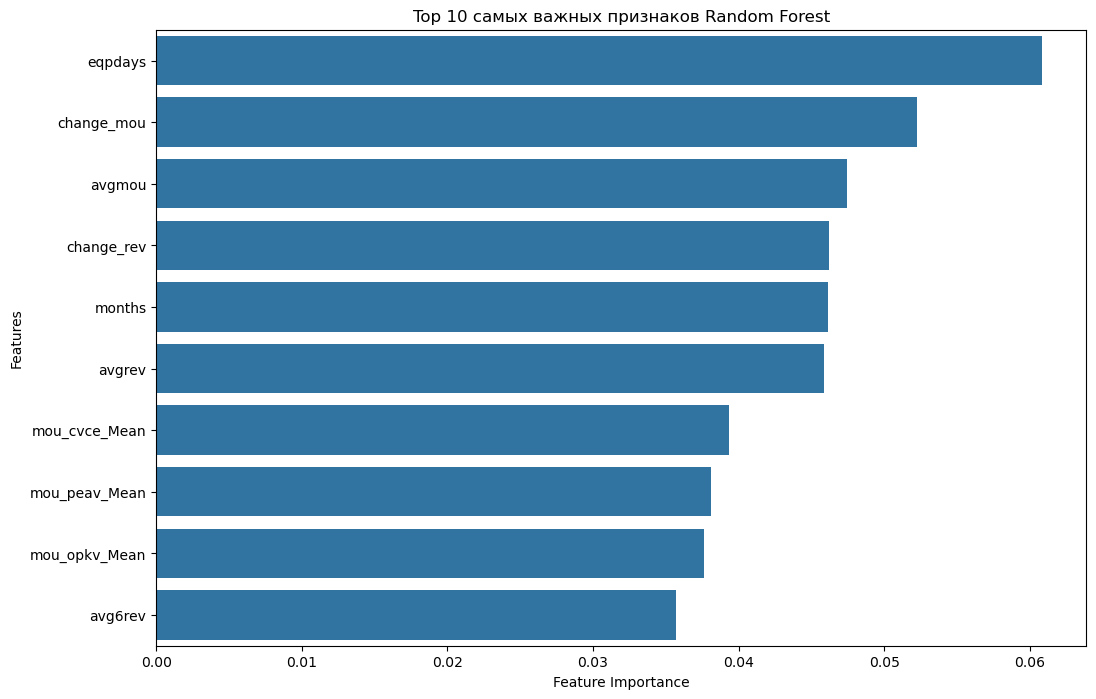

In [113]:
# Построение графика для 10 самых важных признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))  # Топ 10 признаков
plt.title('Top 10 самых важных признаков Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### 5.2 Определим важность признаков с использованием LogisticRegression

In [114]:
# Обучение модели логистической регрессии
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_balanced, y_train_balanced)

# Получение коэффициентов
log_reg_importances = log_reg.coef_[0]  # Для бинарной классификации

# Преобразование в DataFrame
importance_df_log_reg = pd.DataFrame({
    'Feature': selected_features,
    'Importance': log_reg_importances
})

# Сортировка по важности
importance_df_log_reg = importance_df_log_reg.sort_values(by='Importance', ascending=False)

In [115]:
# Вывод важности признаков
print("Важность признаков Логистической Регрессии:\n", importance_df_log_reg)

Важность признаков Логистической Регрессии:
                Feature  Importance
34             eqpdays    0.307450
21            uniqsubs    0.206391
3           change_rev    0.158270
25              avgmou    0.143233
26             avg6rev    0.110997
27          refurb_new    0.068227
29              phones    0.058994
24              avgrev    0.058875
4        drop_vce_Mean    0.050561
39           marital_U    0.049068
30              models    0.035084
18       drop_blk_Mean    0.030204
12     mouowylisv_Mean    0.027621
6        unan_vce_Mean    0.022243
5        blck_vce_Mean    0.010541
14     mouiwylisv_Mean    0.004214
32              adults    0.002402
37           marital_M   -0.003166
1              da_Mean   -0.005953
19       callwait_Mean   -0.006779
11     owylis_vce_Mean   -0.009558
38           marital_S   -0.010994
36          dualband_Y   -0.011260
35  prizm_social_one_U   -0.012995
10       mou_rvce_Mean   -0.013699
17       mou_opkv_Mean   -0.017253
7        c

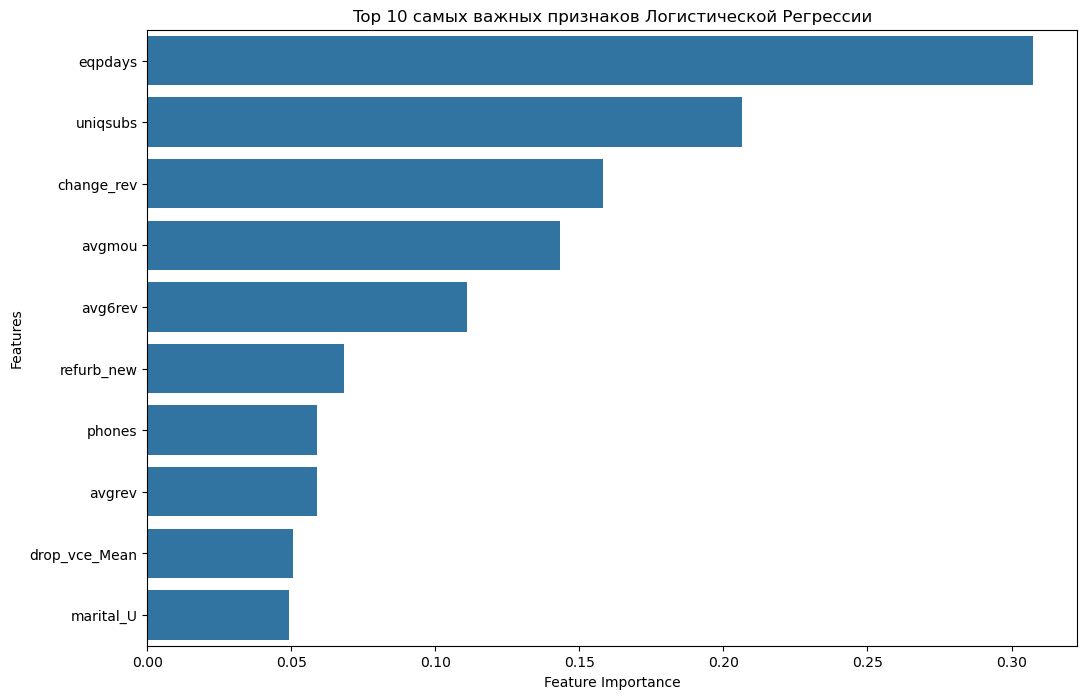

In [116]:
# Построение графика для 10 самых важных признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_log_reg.head(10))
plt.title('Top 10 самых важных признаков Логистической Регрессии')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### 5.3 Определим важность признаков с использованием GradientBoostingClassifier

Важность признаков Градиентного Бустинга:
                Feature  Importance
34             eqpdays    0.254700
20              months    0.202271
2           change_mou    0.094758
0          totmrc_Mean    0.060059
28           hnd_price    0.054108
9        mou_cvce_Mean    0.040006
24              avgrev    0.039071
21            uniqsubs    0.037322
25              avgmou    0.026563
3           change_rev    0.025648
31                 lor    0.023421
23            asl_flag    0.023319
4        drop_vce_Mean    0.014140
27          refurb_new    0.013601
13     iwylis_vce_Mean    0.012575
15       mou_peav_Mean    0.012069
22            actvsubs    0.007607
17       mou_opkv_Mean    0.007053
39           marital_U    0.006974
8        threeway_Mean    0.006813
7        custcare_Mean    0.006298
18       drop_blk_Mean    0.005837
26             avg6rev    0.003991
33            creditcd    0.003859
14     mouiwylisv_Mean    0.002813
16        opk_vce_Mean    0.002520
6        una

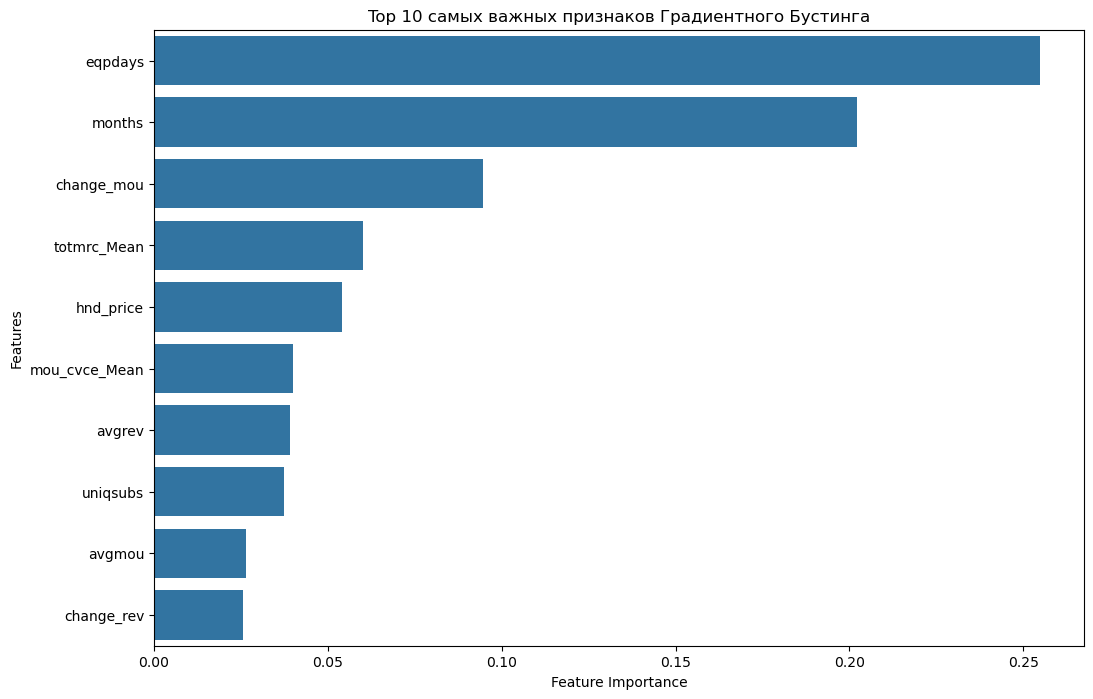

In [117]:
# Обучение модели градиентного бустинга
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_balanced, y_train_balanced)

# Получение важности признаков
gb_importances = gb_model.feature_importances_

# Преобразование в DataFrame
importance_df_gb = pd.DataFrame({
    'Feature': selected_features,
    'Importance': gb_importances
})

# Сортировка по важности
importance_df_gb = importance_df_gb.sort_values(by='Importance', ascending=False)

# Вывод важности признаков
print("Важность признаков Градиентного Бустинга:\n", importance_df_gb)

# Построение графика для 10 самых важных признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_gb.head(10))
plt.title('Top 10 самых важных признаков Градиентного Бустинга')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### 5.4 Определим важность признаков с использованием XGBoost

Важность признаков XGBoost:
                Feature  Importance
34             eqpdays    0.061649
20              months    0.054320
23            asl_flag    0.050262
27          refurb_new    0.044936
21            uniqsubs    0.039797
39           marital_U    0.038043
28           hnd_price    0.036033
2           change_mou    0.029252
0          totmrc_Mean    0.029153
9        mou_cvce_Mean    0.028487
36          dualband_Y    0.025866
33            creditcd    0.025825
24              avgrev    0.025263
3           change_rev    0.024288
31                 lor    0.022536
4        drop_vce_Mean    0.022502
17       mou_opkv_Mean    0.022376
15       mou_peav_Mean    0.022241
25              avgmou    0.021970
22            actvsubs    0.021605
7        custcare_Mean    0.019815
14     mouiwylisv_Mean    0.019773
13     iwylis_vce_Mean    0.019252
16        opk_vce_Mean    0.019237
10       mou_rvce_Mean    0.019187
29              phones    0.018941
8        threeway_Mean    

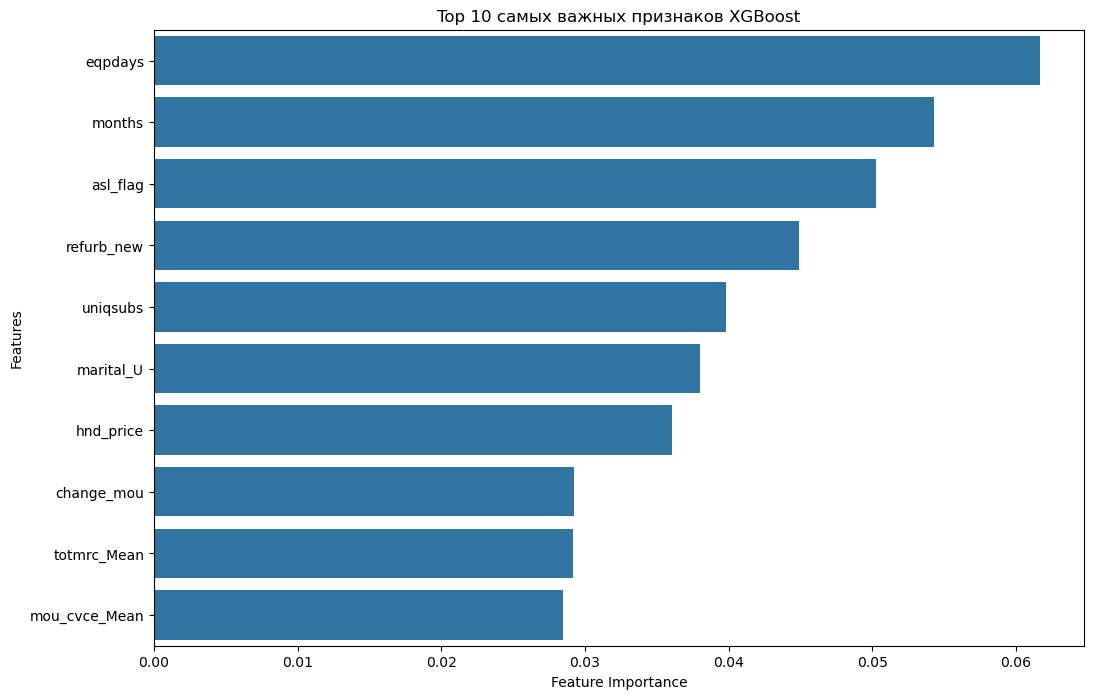

In [125]:
# Обучение модели XGBoost
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)  # Removed use_label_encoder
xgb_model.fit(X_train_balanced, y_train_balanced)

# Получение важности признаков
xgb_importances = xgb_model.feature_importances_

# Преобразование в DataFrame
importance_df_xgb = pd.DataFrame({
    'Feature': selected_features,
    'Importance': xgb_importances
})

# Сортировка по важности
importance_df_xgb = importance_df_xgb.sort_values(by='Importance', ascending=False)

# Вывод важности признаков
print("Важность признаков XGBoost:\n", importance_df_xgb)

# Построение графика для 10 самых важных признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_xgb.head(10))
plt.title('Top 10 самых важных признаков XGBoost')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### 5.5 Определим важность признаков с использованием DecisionTreeClassifier

Важность признаков Дерева Решений:
                Feature  Importance
34             eqpdays    0.076086
2           change_mou    0.060431
25              avgmou    0.054168
3           change_rev    0.053131
24              avgrev    0.051815
20              months    0.039614
9        mou_cvce_Mean    0.039044
6        unan_vce_Mean    0.038744
15       mou_peav_Mean    0.037383
17       mou_opkv_Mean    0.036186
10       mou_rvce_Mean    0.035841
12     mouowylisv_Mean    0.035486
26             avg6rev    0.033963
0          totmrc_Mean    0.033923
16        opk_vce_Mean    0.032727
11     owylis_vce_Mean    0.028372
18       drop_blk_Mean    0.027949
4        drop_vce_Mean    0.026555
14     mouiwylisv_Mean    0.025837
31                 lor    0.025001
5        blck_vce_Mean    0.023480
1              da_Mean    0.020356
13     iwylis_vce_Mean    0.019591
7        custcare_Mean    0.019406
28           hnd_price    0.018793
32              adults    0.015434
19       callwait_M

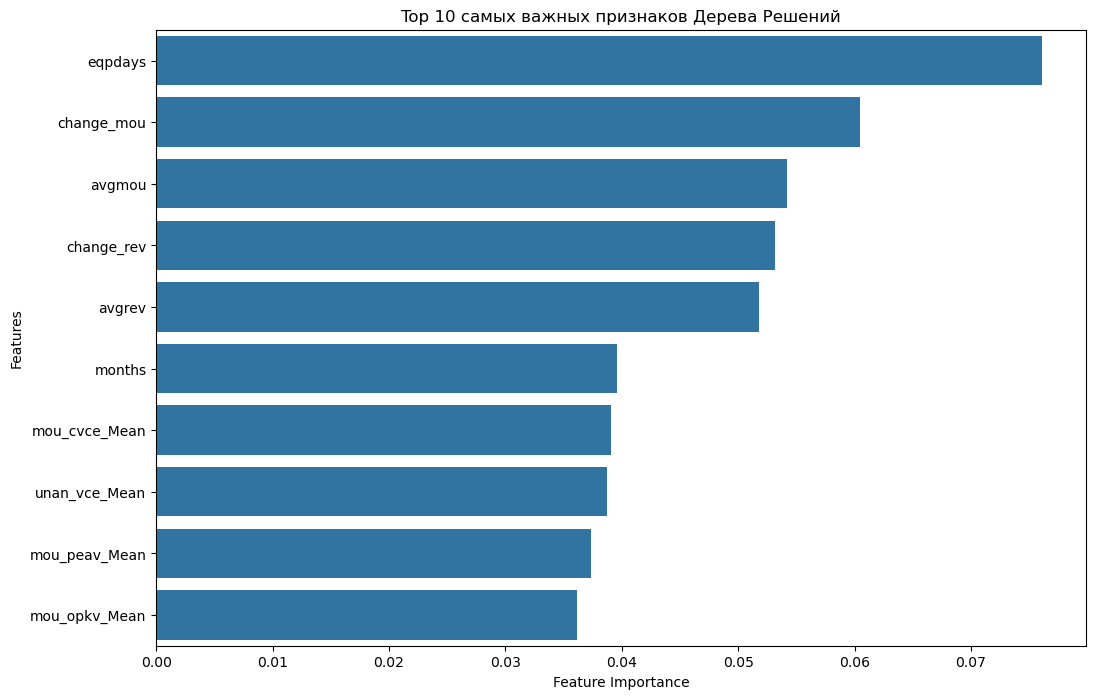

In [126]:
# Обучение модели дерева решений
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_balanced, y_train_balanced)

# Получение важности признаков
dt_importances = dt_model.feature_importances_

# Преобразование в DataFrame
importance_df_dt = pd.DataFrame({
    'Feature': selected_features,
    'Importance': dt_importances
})

# Сортировка по важности
importance_df_dt = importance_df_dt.sort_values(by='Importance', ascending=False)

# Вывод важности признаков
print("Важность признаков Дерева Решений:\n", importance_df_dt)

# Построение графика для 10 самых важных признаков
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df_dt.head(10))
plt.title('Top 10 самых важных признаков Дерева Решений')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

### Выводы:
1. При использовании модели RandomForestClassifier наиболее значимыми признаками по отношению к целевому признаку являются показатели:  eqpdays (Количество дней, прошедших с момента последней активности), change_mou (Изменения в количестве минут), avgmou, change_rev (Изменения в доходах, что может показать тенденции к увеличению или уменьшению использования услуг), months, avgrev, mou_cvce_Mean, mou_peav_Mean, mou_opkv_Mean, avg6rev.
   
2. При использовании модели LogisticRegression наиболее значимыми признаками по отношению к целевому признаку являются показатели:  eqpdays (Количество дней, прошедших с момента последней активности), uniqsubs, change_rev (Изменения в доходах), avgmou, avg6rev, refurb_new, phones (Признаки, связанные количеством телефонов), avgrev, drop_vce_Mean (Средние значения по потерям голосовых, что может указывать на неудовлетворенность клиентом услугами), marital_U (Семейное положение клиента).

3. При использовании модели GradientBoosting наиболее значимыми признаками по отношению к целевому признаку являются показатели: 
 eqpdays ((Количество дней, прошедших с момента последней активности)), months, change_mou (Изменения в количестве минут),  totmrc_Mean (Средние значения общим расходам), hnd_price (Признаки, связанные с ценой устройства), mou_cvce_Mean, avgrev, uniqsubs, avgmou, change_rev (Изменения в доходах).

4. При использовании модели XGBoost наиболее значимыми признаками по отношению к целевому признаку являются показатели: 
 eqpdays (Количество дней, прошедших с момента последней активности),   months, asl_flag (Признаки, связанные с флагом нового клиента.), refurb_new, uniqsubs, marital_U (Семейное положение клиента), hnd_price (Признаки, связанные с ценой устройства), change_mou (Изменения в количестве минут), totmrc_Mean (Средние значения общим расходам), mou_cvce_Mean.

5. При использовании модели DecisionTreeClassifier наиболее значимыми признаками по отношению к целевому признаку являются показатели:   eqpdays (Количество дней, прошедших с момента последней активности), change_mou (Изменения в количестве минут), avgmou, change_rev (Изменения в доходах), avgrev, months, mou_cvce_Mean, unan_vce_Mean, mou_peav_Mean,mou_opkv_Mean.
         
6. Наиболее часто встречающимися признаками являются: eqpdays (Количество дней, прошедших с момента последней активности), change_mou (Изменения в количестве минут), hnd_price (Признаки, связанные с ценой устройства), totmrc_Mean (Средние значения общим расходам), hange_rev (Изменения в доходах), drop_vce_Mean (Средние значения по потерям голосовых, что может указывать на неудовлетворенность клиентом услугами), marital_U (Семейное положение клиента).

7. Модель GradientBoosting показывает наилучшие результаты с Accuracy: 0.6263 и ROC AUC: 0.6749866766912442, однако результаты по прежнему далеки от идеальных, что предполагает необходимость дальнейшей работы с данными что в рамках отведенного времени не представляется возможным.

8. Значимость признака eqpdays "Количество дней, прошедших с момента последней активности" означает период, который прошел с момента, когда абонент последний раз использовал услуги связи или взаимодействовал с компанией. Однако показатели количества дней с момента последней активности даже для оставшихся клиентов очень высокие, что ставит под сомнение правильность перевода.
9. Проведя расчеты по признаку eqpdays прихожу к выводу, что  если количество дней, прошедших с момента последней активности превышает 20, то веротяность ухода клиента из компании составляет 48.74%
 